# Bird Classification

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [5]:
import tensorflow as tf
from tensorflow import keras

2023-12-24 20:45:33.120022: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [6]:
print(tf.__version__)

2.9.1


In [9]:
from tensorflow.keras.preprocessing.image import load_img

In [18]:
# unzip the folder
!unzip /home/jovyan/examples/examples/tensorflow/archive.zip

Archive:  /home/jovyan/examples/examples/tensorflow/archive.zip
  inflating: EfficientNetB0-525-(224 X 224)- 98.97.h5  
  inflating: birds.csv               
  inflating: test/ABBOTTS BABBLER/1.jpg  
  inflating: test/ABBOTTS BABBLER/2.jpg  
  inflating: test/ABBOTTS BABBLER/3.jpg  
  inflating: test/ABBOTTS BABBLER/4.jpg  
  inflating: test/ABBOTTS BABBLER/5.jpg  
  inflating: test/ABBOTTS BOOBY/1.jpg  
  inflating: test/ABBOTTS BOOBY/2.jpg  
  inflating: test/ABBOTTS BOOBY/3.jpg  
  inflating: test/ABBOTTS BOOBY/4.jpg  
  inflating: test/ABBOTTS BOOBY/5.jpg  
  inflating: test/ABYSSINIAN GROUND HORNBILL/1.jpg  
  inflating: test/ABYSSINIAN GROUND HORNBILL/2.jpg  
  inflating: test/ABYSSINIAN GROUND HORNBILL/3.jpg  
  inflating: test/ABYSSINIAN GROUND HORNBILL/4.jpg  
  inflating: test/ABYSSINIAN GROUND HORNBILL/5.jpg  
  inflating: test/AFRICAN CROWNED CRANE/1.jpg  
  inflating: test/AFRICAN CROWNED CRANE/2.jpg  
  inflating: test/AFRICAN CROWNED CRANE/3.jpg  
  inflating: test/AFRIC

  inflating: test/BEARDED BARBET/1.jpg  
  inflating: test/BEARDED BARBET/2.jpg  
  inflating: test/BEARDED BARBET/3.jpg  
  inflating: test/BEARDED BARBET/4.jpg  
  inflating: test/BEARDED BARBET/5.jpg  
  inflating: test/BEARDED BELLBIRD/1.jpg  
  inflating: test/BEARDED BELLBIRD/2.jpg  
  inflating: test/BEARDED BELLBIRD/3.jpg  
  inflating: test/BEARDED BELLBIRD/4.jpg  
  inflating: test/BEARDED BELLBIRD/5.jpg  
  inflating: test/BEARDED REEDLING/1.jpg  
  inflating: test/BEARDED REEDLING/2.jpg  
  inflating: test/BEARDED REEDLING/3.jpg  
  inflating: test/BEARDED REEDLING/4.jpg  
  inflating: test/BEARDED REEDLING/5.jpg  
  inflating: test/BELTED KINGFISHER/1.jpg  
  inflating: test/BELTED KINGFISHER/2.jpg  
  inflating: test/BELTED KINGFISHER/3.jpg  
  inflating: test/BELTED KINGFISHER/4.jpg  
  inflating: test/BELTED KINGFISHER/5.jpg  
  inflating: test/BIRD OF PARADISE/1.jpg  
  inflating: test/BIRD OF PARADISE/2.jpg  
  inflating: test/BIRD OF PARADISE/3.jpg  
  inflating: tes

  inflating: test/BROWN HEADED COWBIRD/1.jpg  
  inflating: test/BROWN HEADED COWBIRD/2.jpg  
  inflating: test/BROWN HEADED COWBIRD/3.jpg  
  inflating: test/BROWN HEADED COWBIRD/4.jpg  
  inflating: test/BROWN HEADED COWBIRD/5.jpg  
  inflating: test/BROWN NOODY/1.jpg  
  inflating: test/BROWN NOODY/2.jpg  
  inflating: test/BROWN NOODY/3.jpg  
  inflating: test/BROWN NOODY/4.jpg  
  inflating: test/BROWN NOODY/5.jpg  
  inflating: test/BROWN THRASHER/1.jpg  
  inflating: test/BROWN THRASHER/2.jpg  
  inflating: test/BROWN THRASHER/3.jpg  
  inflating: test/BROWN THRASHER/4.jpg  
  inflating: test/BROWN THRASHER/5.jpg  
  inflating: test/BUFFLEHEAD/1.jpg   
  inflating: test/BUFFLEHEAD/2.jpg   
  inflating: test/BUFFLEHEAD/3.jpg   
  inflating: test/BUFFLEHEAD/4.jpg   
  inflating: test/BUFFLEHEAD/5.jpg   
  inflating: test/BULWERS PHEASANT/1.jpg  
  inflating: test/BULWERS PHEASANT/2.jpg  
  inflating: test/BULWERS PHEASANT/3.jpg  
  inflating: test/BULWERS PHEASANT/4.jpg  
  inflat

  inflating: test/COLLARED CRESCENTCHEST/3.jpg  
  inflating: test/COLLARED CRESCENTCHEST/4.jpg  
  inflating: test/COLLARED CRESCENTCHEST/5.jpg  
  inflating: test/COMMON FIRECREST/1.jpg  
  inflating: test/COMMON FIRECREST/2.jpg  
  inflating: test/COMMON FIRECREST/3.jpg  
  inflating: test/COMMON FIRECREST/4.jpg  
  inflating: test/COMMON FIRECREST/5.jpg  
  inflating: test/COMMON GRACKLE/1.jpg  
  inflating: test/COMMON GRACKLE/2.jpg  
  inflating: test/COMMON GRACKLE/3.jpg  
  inflating: test/COMMON GRACKLE/4.jpg  
  inflating: test/COMMON GRACKLE/5.jpg  
  inflating: test/COMMON HOUSE MARTIN/1.jpg  
  inflating: test/COMMON HOUSE MARTIN/2.jpg  
  inflating: test/COMMON HOUSE MARTIN/3.jpg  
  inflating: test/COMMON HOUSE MARTIN/4.jpg  
  inflating: test/COMMON HOUSE MARTIN/5.jpg  
  inflating: test/COMMON IORA/1.jpg  
  inflating: test/COMMON IORA/2.jpg  
  inflating: test/COMMON IORA/3.jpg  
  inflating: test/COMMON IORA/4.jpg  
  inflating: test/COMMON IORA/5.jpg  
  inflating: 

  inflating: test/EASTERN GOLDEN WEAVER/4.jpg  
  inflating: test/EASTERN GOLDEN WEAVER/5.jpg  
  inflating: test/EASTERN MEADOWLARK/1.jpg  
  inflating: test/EASTERN MEADOWLARK/2.jpg  
  inflating: test/EASTERN MEADOWLARK/3.jpg  
  inflating: test/EASTERN MEADOWLARK/4.jpg  
  inflating: test/EASTERN MEADOWLARK/5.jpg  
  inflating: test/EASTERN ROSELLA/1.jpg  
  inflating: test/EASTERN ROSELLA/2.jpg  
  inflating: test/EASTERN ROSELLA/3.jpg  
  inflating: test/EASTERN ROSELLA/4.jpg  
  inflating: test/EASTERN ROSELLA/5.jpg  
  inflating: test/EASTERN TOWEE/1.jpg  
  inflating: test/EASTERN TOWEE/2.jpg  
  inflating: test/EASTERN TOWEE/3.jpg  
  inflating: test/EASTERN TOWEE/4.jpg  
  inflating: test/EASTERN TOWEE/5.jpg  
  inflating: test/EASTERN WIP POOR WILL/1.jpg  
  inflating: test/EASTERN WIP POOR WILL/2.jpg  
  inflating: test/EASTERN WIP POOR WILL/3.jpg  
  inflating: test/EASTERN WIP POOR WILL/4.jpg  
  inflating: test/EASTERN WIP POOR WILL/5.jpg  
  inflating: test/EASTERN YEL

  inflating: test/GOLDEN PIPIT/4.jpg  
  inflating: test/GOLDEN PIPIT/5.jpg  
  inflating: test/GOULDIAN FINCH/1.jpg  
  inflating: test/GOULDIAN FINCH/2.jpg  
  inflating: test/GOULDIAN FINCH/3.jpg  
  inflating: test/GOULDIAN FINCH/4.jpg  
  inflating: test/GOULDIAN FINCH/5.jpg  
  inflating: test/GRANDALA/1.jpg     
  inflating: test/GRANDALA/2.jpg     
  inflating: test/GRANDALA/3.jpg     
  inflating: test/GRANDALA/4.jpg     
  inflating: test/GRANDALA/5.jpg     
  inflating: test/GRAY CATBIRD/1.jpg  
  inflating: test/GRAY CATBIRD/2.jpg  
  inflating: test/GRAY CATBIRD/3.jpg  
  inflating: test/GRAY CATBIRD/4.jpg  
  inflating: test/GRAY CATBIRD/5.jpg  
  inflating: test/GRAY KINGBIRD/1.jpg  
  inflating: test/GRAY KINGBIRD/2.jpg  
  inflating: test/GRAY KINGBIRD/3.jpg  
  inflating: test/GRAY KINGBIRD/4.jpg  
  inflating: test/GRAY KINGBIRD/5.jpg  
  inflating: test/GRAY PARTRIDGE/1.jpg  
  inflating: test/GRAY PARTRIDGE/2.jpg  
  inflating: test/GRAY PARTRIDGE/3.jpg  
  inflati

  inflating: test/HOUSE FINCH/5.jpg  
  inflating: test/HOUSE SPARROW/1.jpg  
  inflating: test/HOUSE SPARROW/2.jpg  
  inflating: test/HOUSE SPARROW/3.jpg  
  inflating: test/HOUSE SPARROW/4.jpg  
  inflating: test/HOUSE SPARROW/5.jpg  
  inflating: test/HYACINTH MACAW/1.jpg  
  inflating: test/HYACINTH MACAW/2.jpg  
  inflating: test/HYACINTH MACAW/3.jpg  
  inflating: test/HYACINTH MACAW/4.jpg  
  inflating: test/HYACINTH MACAW/5.jpg  
  inflating: test/IBERIAN MAGPIE/1.jpg  
  inflating: test/IBERIAN MAGPIE/2.jpg  
  inflating: test/IBERIAN MAGPIE/3.jpg  
  inflating: test/IBERIAN MAGPIE/4.jpg  
  inflating: test/IBERIAN MAGPIE/5.jpg  
  inflating: test/IBISBILL/1.jpg     
  inflating: test/IBISBILL/2.jpg     
  inflating: test/IBISBILL/3.jpg     
  inflating: test/IBISBILL/4.jpg     
  inflating: test/IBISBILL/5.jpg     
  inflating: test/IMPERIAL SHAQ/1.jpg  
  inflating: test/IMPERIAL SHAQ/2.jpg  
  inflating: test/IMPERIAL SHAQ/3.jpg  
  inflating: test/IMPERIAL SHAQ/4.jpg  
  

  inflating: test/MALAGASY WHITE EYE/4.jpg  
  inflating: test/MALAGASY WHITE EYE/5.jpg  
  inflating: test/MALEO/1.jpg        
  inflating: test/MALEO/2.jpg        
  inflating: test/MALEO/3.jpg        
  inflating: test/MALEO/4.jpg        
  inflating: test/MALEO/5.jpg        
  inflating: test/MALLARD DUCK/1.jpg  
  inflating: test/MALLARD DUCK/2.jpg  
  inflating: test/MALLARD DUCK/3.jpg  
  inflating: test/MALLARD DUCK/4.jpg  
  inflating: test/MALLARD DUCK/5.jpg  
  inflating: test/MANDRIN DUCK/1.jpg  
  inflating: test/MANDRIN DUCK/2.jpg  
  inflating: test/MANDRIN DUCK/3.jpg  
  inflating: test/MANDRIN DUCK/4.jpg  
  inflating: test/MANDRIN DUCK/5.jpg  
  inflating: test/MANGROVE CUCKOO/1.jpg  
  inflating: test/MANGROVE CUCKOO/2.jpg  
  inflating: test/MANGROVE CUCKOO/3.jpg  
  inflating: test/MANGROVE CUCKOO/4.jpg  
  inflating: test/MANGROVE CUCKOO/5.jpg  
  inflating: test/MARABOU STORK/1.jpg  
  inflating: test/MARABOU STORK/2.jpg  
  inflating: test/MARABOU STORK/3.jpg  


  inflating: test/PEREGRINE FALCON/1.jpg  
  inflating: test/PEREGRINE FALCON/2.jpg  
  inflating: test/PEREGRINE FALCON/3.jpg  
  inflating: test/PEREGRINE FALCON/4.jpg  
  inflating: test/PEREGRINE FALCON/5.jpg  
  inflating: test/PHAINOPEPLA/1.jpg  
  inflating: test/PHAINOPEPLA/2.jpg  
  inflating: test/PHAINOPEPLA/3.jpg  
  inflating: test/PHAINOPEPLA/4.jpg  
  inflating: test/PHAINOPEPLA/5.jpg  
  inflating: test/PHILIPPINE EAGLE/1.jpg  
  inflating: test/PHILIPPINE EAGLE/2.jpg  
  inflating: test/PHILIPPINE EAGLE/3.jpg  
  inflating: test/PHILIPPINE EAGLE/4.jpg  
  inflating: test/PHILIPPINE EAGLE/5.jpg  
  inflating: test/PINK ROBIN/1.jpg   
  inflating: test/PINK ROBIN/2.jpg   
  inflating: test/PINK ROBIN/3.jpg   
  inflating: test/PINK ROBIN/4.jpg   
  inflating: test/PINK ROBIN/5.jpg   
  inflating: test/PLUSH CRESTED JAY/1.jpg  
  inflating: test/PLUSH CRESTED JAY/2.jpg  
  inflating: test/PLUSH CRESTED JAY/3.jpg  
  inflating: test/PLUSH CRESTED JAY/4.jpg  
  inflating: t

  inflating: test/RUDY KINGFISHER/4.jpg  
  inflating: test/RUDY KINGFISHER/5.jpg  
  inflating: test/RUFOUS KINGFISHER/1.jpg  
  inflating: test/RUFOUS KINGFISHER/2.jpg  
  inflating: test/RUFOUS KINGFISHER/3.jpg  
  inflating: test/RUFOUS KINGFISHER/4.jpg  
  inflating: test/RUFOUS KINGFISHER/5.jpg  
  inflating: test/RUFOUS TREPE/1.jpg  
  inflating: test/RUFOUS TREPE/2.jpg  
  inflating: test/RUFOUS TREPE/3.jpg  
  inflating: test/RUFOUS TREPE/4.jpg  
  inflating: test/RUFOUS TREPE/5.jpg  
  inflating: test/RUFUOS MOTMOT/1.jpg  
  inflating: test/RUFUOS MOTMOT/2.jpg  
  inflating: test/RUFUOS MOTMOT/3.jpg  
  inflating: test/RUFUOS MOTMOT/4.jpg  
  inflating: test/RUFUOS MOTMOT/5.jpg  
  inflating: test/SAMATRAN THRUSH/1.jpg  
  inflating: test/SAMATRAN THRUSH/2.jpg  
  inflating: test/SAMATRAN THRUSH/3.jpg  
  inflating: test/SAMATRAN THRUSH/4.jpg  
  inflating: test/SAMATRAN THRUSH/5.jpg  
  inflating: test/SAND MARTIN/1.jpg  
  inflating: test/SAND MARTIN/2.jpg  
  inflating: te

  inflating: test/TASMANIAN HEN/5.jpg  
  inflating: test/TAWNY FROGMOUTH/1.jpg  
  inflating: test/TAWNY FROGMOUTH/2.jpg  
  inflating: test/TAWNY FROGMOUTH/3.jpg  
  inflating: test/TAWNY FROGMOUTH/4.jpg  
  inflating: test/TAWNY FROGMOUTH/5.jpg  
  inflating: test/TEAL DUCK/1.jpg    
  inflating: test/TEAL DUCK/2.jpg    
  inflating: test/TEAL DUCK/3.jpg    
  inflating: test/TEAL DUCK/4.jpg    
  inflating: test/TEAL DUCK/5.jpg    
  inflating: test/TIT MOUSE/1.jpg    
  inflating: test/TIT MOUSE/2.jpg    
  inflating: test/TIT MOUSE/3.jpg    
  inflating: test/TIT MOUSE/4.jpg    
  inflating: test/TIT MOUSE/5.jpg    
  inflating: test/TOUCHAN/1.jpg      
  inflating: test/TOUCHAN/2.jpg      
  inflating: test/TOUCHAN/3.jpg      
  inflating: test/TOUCHAN/4.jpg      
  inflating: test/TOUCHAN/5.jpg      
  inflating: test/TOWNSENDS WARBLER/1.jpg  
  inflating: test/TOWNSENDS WARBLER/2.jpg  
  inflating: test/TOWNSENDS WARBLER/3.jpg  
  inflating: test/TOWNSENDS WARBLER/4.jpg  
  in

  inflating: test/YELLOW HEADED BLACKBIRD/5.jpg  
  inflating: test/ZEBRA DOVE/1.jpg   
  inflating: test/ZEBRA DOVE/2.jpg   
  inflating: test/ZEBRA DOVE/3.jpg   
  inflating: test/ZEBRA DOVE/4.jpg   
  inflating: test/ZEBRA DOVE/5.jpg   
  inflating: train/ABBOTTS BABBLER/001.jpg  
  inflating: train/ABBOTTS BABBLER/002.jpg  
  inflating: train/ABBOTTS BABBLER/003.jpg  
  inflating: train/ABBOTTS BABBLER/004.jpg  
  inflating: train/ABBOTTS BABBLER/005.jpg  
  inflating: train/ABBOTTS BABBLER/006.jpg  
  inflating: train/ABBOTTS BABBLER/007.jpg  
  inflating: train/ABBOTTS BABBLER/008.jpg  
  inflating: train/ABBOTTS BABBLER/009.jpg  
  inflating: train/ABBOTTS BABBLER/010.jpg  
  inflating: train/ABBOTTS BABBLER/011.jpg  
  inflating: train/ABBOTTS BABBLER/012.jpg  
  inflating: train/ABBOTTS BABBLER/013.jpg  
  inflating: train/ABBOTTS BABBLER/014.jpg  
  inflating: train/ABBOTTS BABBLER/015.jpg  
  inflating: train/ABBOTTS BABBLER/016.jpg  
  inflating: train/ABBOTTS BABBLER/017.j

  inflating: train/ABBOTTS BOOBY/093.jpg  
  inflating: train/ABBOTTS BOOBY/094.jpg  
  inflating: train/ABBOTTS BOOBY/095.jpg  
  inflating: train/ABBOTTS BOOBY/096.jpg  
  inflating: train/ABBOTTS BOOBY/097.jpg  
  inflating: train/ABBOTTS BOOBY/098.jpg  
  inflating: train/ABBOTTS BOOBY/099.jpg  
  inflating: train/ABBOTTS BOOBY/100.jpg  
  inflating: train/ABBOTTS BOOBY/101.jpg  
  inflating: train/ABBOTTS BOOBY/102.jpg  
  inflating: train/ABBOTTS BOOBY/103.jpg  
  inflating: train/ABBOTTS BOOBY/104.jpg  
  inflating: train/ABBOTTS BOOBY/105.jpg  
  inflating: train/ABBOTTS BOOBY/106.jpg  
  inflating: train/ABBOTTS BOOBY/107.jpg  
  inflating: train/ABBOTTS BOOBY/108.jpg  
  inflating: train/ABBOTTS BOOBY/109.jpg  
  inflating: train/ABBOTTS BOOBY/110.jpg  
  inflating: train/ABBOTTS BOOBY/111.jpg  
  inflating: train/ABBOTTS BOOBY/112.jpg  
  inflating: train/ABBOTTS BOOBY/113.jpg  
  inflating: train/ABBOTTS BOOBY/114.jpg  
  inflating: train/ABBOTTS BOOBY/115.jpg  
  inflating

  inflating: train/ABYSSINIAN GROUND HORNBILL/154.jpg  
  inflating: train/ABYSSINIAN GROUND HORNBILL/155.jpg  
  inflating: train/ABYSSINIAN GROUND HORNBILL/156.jpg  
  inflating: train/ABYSSINIAN GROUND HORNBILL/157.jpg  
  inflating: train/ABYSSINIAN GROUND HORNBILL/158.jpg  
  inflating: train/ABYSSINIAN GROUND HORNBILL/159.jpg  
  inflating: train/ABYSSINIAN GROUND HORNBILL/160.jpg  
  inflating: train/ABYSSINIAN GROUND HORNBILL/161.jpg  
  inflating: train/ABYSSINIAN GROUND HORNBILL/162.jpg  
  inflating: train/ABYSSINIAN GROUND HORNBILL/163.jpg  
  inflating: train/ABYSSINIAN GROUND HORNBILL/164.jpg  
  inflating: train/ABYSSINIAN GROUND HORNBILL/165.jpg  
  inflating: train/ABYSSINIAN GROUND HORNBILL/166.jpg  
  inflating: train/ABYSSINIAN GROUND HORNBILL/167.jpg  
  inflating: train/ABYSSINIAN GROUND HORNBILL/168.jpg  
  inflating: train/ABYSSINIAN GROUND HORNBILL/169.jpg  
  inflating: train/ABYSSINIAN GROUND HORNBILL/170.jpg  
  inflating: train/ABYSSINIAN GROUND HORNBILL/17

  inflating: train/AFRICAN EMERALD CUCKOO/051.jpg  
  inflating: train/AFRICAN EMERALD CUCKOO/052.jpg  
  inflating: train/AFRICAN EMERALD CUCKOO/053.jpg  
  inflating: train/AFRICAN EMERALD CUCKOO/054.jpg  
  inflating: train/AFRICAN EMERALD CUCKOO/055.jpg  
  inflating: train/AFRICAN EMERALD CUCKOO/056.jpg  
  inflating: train/AFRICAN EMERALD CUCKOO/057.jpg  
  inflating: train/AFRICAN EMERALD CUCKOO/058.jpg  
  inflating: train/AFRICAN EMERALD CUCKOO/059.jpg  
  inflating: train/AFRICAN EMERALD CUCKOO/060.jpg  
  inflating: train/AFRICAN EMERALD CUCKOO/061.jpg  
  inflating: train/AFRICAN EMERALD CUCKOO/062.jpg  
  inflating: train/AFRICAN EMERALD CUCKOO/063.jpg  
  inflating: train/AFRICAN EMERALD CUCKOO/064.jpg  
  inflating: train/AFRICAN EMERALD CUCKOO/065.jpg  
  inflating: train/AFRICAN EMERALD CUCKOO/066.jpg  
  inflating: train/AFRICAN EMERALD CUCKOO/067.jpg  
  inflating: train/AFRICAN EMERALD CUCKOO/068.jpg  
  inflating: train/AFRICAN EMERALD CUCKOO/069.jpg  
  inflating:

  inflating: train/AFRICAN OYSTER CATCHER/005.jpg  
  inflating: train/AFRICAN OYSTER CATCHER/006.jpg  
  inflating: train/AFRICAN OYSTER CATCHER/007.jpg  
  inflating: train/AFRICAN OYSTER CATCHER/008.jpg  
  inflating: train/AFRICAN OYSTER CATCHER/009.jpg  
  inflating: train/AFRICAN OYSTER CATCHER/010.jpg  
  inflating: train/AFRICAN OYSTER CATCHER/011.jpg  
  inflating: train/AFRICAN OYSTER CATCHER/012.jpg  
  inflating: train/AFRICAN OYSTER CATCHER/013.jpg  
  inflating: train/AFRICAN OYSTER CATCHER/014.jpg  
  inflating: train/AFRICAN OYSTER CATCHER/015.jpg  
  inflating: train/AFRICAN OYSTER CATCHER/016.jpg  
  inflating: train/AFRICAN OYSTER CATCHER/017.jpg  
  inflating: train/AFRICAN OYSTER CATCHER/018.jpg  
  inflating: train/AFRICAN OYSTER CATCHER/019.jpg  
  inflating: train/AFRICAN OYSTER CATCHER/020.jpg  
  inflating: train/AFRICAN OYSTER CATCHER/021.jpg  
  inflating: train/AFRICAN OYSTER CATCHER/022.jpg  
  inflating: train/AFRICAN OYSTER CATCHER/023.jpg  
  inflating:

  inflating: train/AFRICAN PIED HORNBILL/093.jpg  
  inflating: train/AFRICAN PIED HORNBILL/094.jpg  
  inflating: train/AFRICAN PIED HORNBILL/095.jpg  
  inflating: train/AFRICAN PIED HORNBILL/096.jpg  
  inflating: train/AFRICAN PIED HORNBILL/097.jpg  
  inflating: train/AFRICAN PIED HORNBILL/098.jpg  
  inflating: train/AFRICAN PIED HORNBILL/099.jpg  
  inflating: train/AFRICAN PIED HORNBILL/100.jpg  
  inflating: train/AFRICAN PIED HORNBILL/101.jpg  
  inflating: train/AFRICAN PIED HORNBILL/102.jpg  
  inflating: train/AFRICAN PIED HORNBILL/103.jpg  
  inflating: train/AFRICAN PIED HORNBILL/104.jpg  
  inflating: train/AFRICAN PIED HORNBILL/105.jpg  
  inflating: train/AFRICAN PIED HORNBILL/106.jpg  
  inflating: train/AFRICAN PIED HORNBILL/107.jpg  
  inflating: train/AFRICAN PIED HORNBILL/108.jpg  
  inflating: train/AFRICAN PIED HORNBILL/109.jpg  
  inflating: train/AFRICAN PIED HORNBILL/110.jpg  
  inflating: train/AFRICAN PIED HORNBILL/111.jpg  
  inflating: train/AFRICAN PIED

  inflating: train/AFRICAN PYGMY GOOSE/168.jpg  
  inflating: train/AFRICAN PYGMY GOOSE/169.jpg  
  inflating: train/AFRICAN PYGMY GOOSE/170.jpg  
  inflating: train/AFRICAN PYGMY GOOSE/171.jpg  
  inflating: train/AFRICAN PYGMY GOOSE/172.jpg  
  inflating: train/AFRICAN PYGMY GOOSE/173.jpg  
  inflating: train/AFRICAN PYGMY GOOSE/174.jpg  
  inflating: train/AFRICAN PYGMY GOOSE/175.jpg  
  inflating: train/AFRICAN PYGMY GOOSE/176.jpg  
  inflating: train/AFRICAN PYGMY GOOSE/177.jpg  
  inflating: train/AFRICAN PYGMY GOOSE/178.jpg  
  inflating: train/AFRICAN PYGMY GOOSE/179.jpg  
  inflating: train/ALBATROSS/001.jpg  
  inflating: train/ALBATROSS/002.jpg  
  inflating: train/ALBATROSS/003.jpg  
  inflating: train/ALBATROSS/004.jpg  
  inflating: train/ALBATROSS/005.jpg  
  inflating: train/ALBATROSS/006.jpg  
  inflating: train/ALBATROSS/007.jpg  
  inflating: train/ALBATROSS/008.jpg  
  inflating: train/ALBATROSS/009.jpg  
  inflating: train/ALBATROSS/010.jpg  
  inflating: train/ALB

  inflating: train/ALBERTS TOWHEE/110.jpg  
  inflating: train/ALBERTS TOWHEE/111.jpg  
  inflating: train/ALBERTS TOWHEE/112.jpg  
  inflating: train/ALBERTS TOWHEE/113.jpg  
  inflating: train/ALBERTS TOWHEE/114.jpg  
  inflating: train/ALBERTS TOWHEE/115.jpg  
  inflating: train/ALBERTS TOWHEE/116.jpg  
  inflating: train/ALBERTS TOWHEE/117.jpg  
  inflating: train/ALBERTS TOWHEE/118.jpg  
  inflating: train/ALBERTS TOWHEE/119.jpg  
  inflating: train/ALBERTS TOWHEE/120.jpg  
  inflating: train/ALBERTS TOWHEE/121.jpg  
  inflating: train/ALBERTS TOWHEE/122.jpg  
  inflating: train/ALBERTS TOWHEE/123.jpg  
  inflating: train/ALBERTS TOWHEE/124.jpg  
  inflating: train/ALBERTS TOWHEE/125.jpg  
  inflating: train/ALBERTS TOWHEE/126.jpg  
  inflating: train/ALBERTS TOWHEE/127.jpg  
  inflating: train/ALBERTS TOWHEE/128.jpg  
  inflating: train/ALBERTS TOWHEE/129.jpg  
  inflating: train/ALBERTS TOWHEE/130.jpg  
  inflating: train/ALBERTS TOWHEE/131.jpg  
  inflating: train/ALBERTS TOWHE

  inflating: train/ALPINE CHOUGH/046.jpg  
  inflating: train/ALPINE CHOUGH/047.jpg  
  inflating: train/ALPINE CHOUGH/048.jpg  
  inflating: train/ALPINE CHOUGH/049.jpg  
  inflating: train/ALPINE CHOUGH/050.jpg  
  inflating: train/ALPINE CHOUGH/051.jpg  
  inflating: train/ALPINE CHOUGH/052.jpg  
  inflating: train/ALPINE CHOUGH/053.jpg  
  inflating: train/ALPINE CHOUGH/054.jpg  
  inflating: train/ALPINE CHOUGH/055.jpg  
  inflating: train/ALPINE CHOUGH/056.jpg  
  inflating: train/ALPINE CHOUGH/057.jpg  
  inflating: train/ALPINE CHOUGH/058.jpg  
  inflating: train/ALPINE CHOUGH/059.jpg  
  inflating: train/ALPINE CHOUGH/060.jpg  
  inflating: train/ALPINE CHOUGH/061.jpg  
  inflating: train/ALPINE CHOUGH/062.jpg  
  inflating: train/ALPINE CHOUGH/063.jpg  
  inflating: train/ALPINE CHOUGH/064.jpg  
  inflating: train/ALPINE CHOUGH/065.jpg  
  inflating: train/ALPINE CHOUGH/066.jpg  
  inflating: train/ALPINE CHOUGH/067.jpg  
  inflating: train/ALPINE CHOUGH/068.jpg  
  inflating

  inflating: train/AMERICAN AVOCET/019.jpg  
  inflating: train/AMERICAN AVOCET/020.jpg  
  inflating: train/AMERICAN AVOCET/021.jpg  
  inflating: train/AMERICAN AVOCET/022.jpg  
  inflating: train/AMERICAN AVOCET/023.jpg  
  inflating: train/AMERICAN AVOCET/024.jpg  
  inflating: train/AMERICAN AVOCET/025.jpg  
  inflating: train/AMERICAN AVOCET/026.jpg  
  inflating: train/AMERICAN AVOCET/027.jpg  
  inflating: train/AMERICAN AVOCET/028.jpg  
  inflating: train/AMERICAN AVOCET/029.jpg  
  inflating: train/AMERICAN AVOCET/030.jpg  
  inflating: train/AMERICAN AVOCET/031.jpg  
  inflating: train/AMERICAN AVOCET/032.jpg  
  inflating: train/AMERICAN AVOCET/033.jpg  
  inflating: train/AMERICAN AVOCET/034.jpg  
  inflating: train/AMERICAN AVOCET/035.jpg  
  inflating: train/AMERICAN AVOCET/036.jpg  
  inflating: train/AMERICAN AVOCET/037.jpg  
  inflating: train/AMERICAN AVOCET/038.jpg  
  inflating: train/AMERICAN AVOCET/039.jpg  
  inflating: train/AMERICAN AVOCET/040.jpg  
  inflatin

  inflating: train/AMERICAN BITTERN/087.jpg  
  inflating: train/AMERICAN BITTERN/088.jpg  
  inflating: train/AMERICAN BITTERN/089.jpg  
  inflating: train/AMERICAN BITTERN/090.jpg  
  inflating: train/AMERICAN BITTERN/091.jpg  
  inflating: train/AMERICAN BITTERN/092.jpg  
  inflating: train/AMERICAN BITTERN/093.jpg  
  inflating: train/AMERICAN BITTERN/094.jpg  
  inflating: train/AMERICAN BITTERN/095.jpg  
  inflating: train/AMERICAN BITTERN/096.jpg  
  inflating: train/AMERICAN BITTERN/097.jpg  
  inflating: train/AMERICAN BITTERN/098.jpg  
  inflating: train/AMERICAN BITTERN/099.jpg  
  inflating: train/AMERICAN BITTERN/100.jpg  
  inflating: train/AMERICAN BITTERN/101.jpg  
  inflating: train/AMERICAN BITTERN/102.jpg  
  inflating: train/AMERICAN BITTERN/103.jpg  
  inflating: train/AMERICAN BITTERN/104.jpg  
  inflating: train/AMERICAN BITTERN/105.jpg  
  inflating: train/AMERICAN BITTERN/106.jpg  
  inflating: train/AMERICAN BITTERN/107.jpg  
  inflating: train/AMERICAN BITTER

  inflating: train/AMERICAN COOT/133.jpg  
  inflating: train/AMERICAN COOT/134.jpg  
  inflating: train/AMERICAN COOT/135.jpg  
  inflating: train/AMERICAN COOT/136.jpg  
  inflating: train/AMERICAN COOT/137.jpg  
  inflating: train/AMERICAN COOT/138.jpg  
  inflating: train/AMERICAN COOT/139.jpg  
  inflating: train/AMERICAN COOT/140.jpg  
  inflating: train/AMERICAN COOT/141.jpg  
  inflating: train/AMERICAN COOT/142.jpg  
  inflating: train/AMERICAN COOT/143.jpg  
  inflating: train/AMERICAN COOT/144.jpg  
  inflating: train/AMERICAN COOT/145.jpg  
  inflating: train/AMERICAN COOT/146.jpg  
  inflating: train/AMERICAN COOT/147.jpg  
  inflating: train/AMERICAN COOT/148.jpg  
  inflating: train/AMERICAN COOT/149.jpg  
  inflating: train/AMERICAN COOT/150.jpg  
  inflating: train/AMERICAN COOT/151.jpg  
  inflating: train/AMERICAN COOT/152.jpg  
  inflating: train/AMERICAN COOT/153.jpg  
  inflating: train/AMERICAN COOT/154.jpg  
  inflating: train/AMERICAN COOT/155.jpg  
  inflating

  inflating: train/AMERICAN DIPPER/94.jpg  
  inflating: train/AMERICAN DIPPER/95.jpg  
  inflating: train/AMERICAN DIPPER/96.jpg  
  inflating: train/AMERICAN DIPPER/97.jpg  
  inflating: train/AMERICAN DIPPER/98.jpg  
  inflating: train/AMERICAN DIPPER/99.jpg  
  inflating: train/AMERICAN FLAMINGO/001.jpg  
  inflating: train/AMERICAN FLAMINGO/002.jpg  
  inflating: train/AMERICAN FLAMINGO/003.jpg  
  inflating: train/AMERICAN FLAMINGO/004.jpg  
  inflating: train/AMERICAN FLAMINGO/005.jpg  
  inflating: train/AMERICAN FLAMINGO/006.jpg  
  inflating: train/AMERICAN FLAMINGO/007.jpg  
  inflating: train/AMERICAN FLAMINGO/008.jpg  
  inflating: train/AMERICAN FLAMINGO/009.jpg  
  inflating: train/AMERICAN FLAMINGO/010.jpg  
  inflating: train/AMERICAN FLAMINGO/011.jpg  
  inflating: train/AMERICAN FLAMINGO/012.jpg  
  inflating: train/AMERICAN FLAMINGO/013.jpg  
  inflating: train/AMERICAN FLAMINGO/014.jpg  
  inflating: train/AMERICAN FLAMINGO/015.jpg  
  inflating: train/AMERICAN FLA

  inflating: train/AMERICAN GOLDFINCH/062.jpg  
  inflating: train/AMERICAN GOLDFINCH/063.jpg  
  inflating: train/AMERICAN GOLDFINCH/064.jpg  
  inflating: train/AMERICAN GOLDFINCH/065.jpg  
  inflating: train/AMERICAN GOLDFINCH/066.jpg  
  inflating: train/AMERICAN GOLDFINCH/067.jpg  
  inflating: train/AMERICAN GOLDFINCH/068.jpg  
  inflating: train/AMERICAN GOLDFINCH/069.jpg  
  inflating: train/AMERICAN GOLDFINCH/070.jpg  
  inflating: train/AMERICAN GOLDFINCH/071.jpg  
  inflating: train/AMERICAN GOLDFINCH/072.jpg  
  inflating: train/AMERICAN GOLDFINCH/073.jpg  
  inflating: train/AMERICAN GOLDFINCH/074.jpg  
  inflating: train/AMERICAN GOLDFINCH/075.jpg  
  inflating: train/AMERICAN GOLDFINCH/076.jpg  
  inflating: train/AMERICAN GOLDFINCH/077.jpg  
  inflating: train/AMERICAN GOLDFINCH/078.jpg  
  inflating: train/AMERICAN GOLDFINCH/079.jpg  
  inflating: train/AMERICAN GOLDFINCH/080.jpg  
  inflating: train/AMERICAN GOLDFINCH/081.jpg  
  inflating: train/AMERICAN GOLDFINCH/08

  inflating: train/AMERICAN PIPIT/020.jpg  
  inflating: train/AMERICAN PIPIT/021.jpg  
  inflating: train/AMERICAN PIPIT/022.jpg  
  inflating: train/AMERICAN PIPIT/023.jpg  
  inflating: train/AMERICAN PIPIT/024.jpg  
  inflating: train/AMERICAN PIPIT/025.jpg  
  inflating: train/AMERICAN PIPIT/026.jpg  
  inflating: train/AMERICAN PIPIT/027.jpg  
  inflating: train/AMERICAN PIPIT/028.jpg  
  inflating: train/AMERICAN PIPIT/029.jpg  
  inflating: train/AMERICAN PIPIT/030.jpg  
  inflating: train/AMERICAN PIPIT/031.jpg  
  inflating: train/AMERICAN PIPIT/032.jpg  
  inflating: train/AMERICAN PIPIT/033.jpg  
  inflating: train/AMERICAN PIPIT/034.jpg  
  inflating: train/AMERICAN PIPIT/035.jpg  
  inflating: train/AMERICAN PIPIT/036.jpg  
  inflating: train/AMERICAN PIPIT/037.jpg  
  inflating: train/AMERICAN PIPIT/038.jpg  
  inflating: train/AMERICAN PIPIT/039.jpg  
  inflating: train/AMERICAN PIPIT/040.jpg  
  inflating: train/AMERICAN PIPIT/041.jpg  
  inflating: train/AMERICAN PIPI

  inflating: train/AMERICAN REDSTART/088.jpg  
  inflating: train/AMERICAN REDSTART/089.jpg  
  inflating: train/AMERICAN REDSTART/090.jpg  
  inflating: train/AMERICAN REDSTART/091.jpg  
  inflating: train/AMERICAN REDSTART/092.jpg  
  inflating: train/AMERICAN REDSTART/093.jpg  
  inflating: train/AMERICAN REDSTART/094.jpg  
  inflating: train/AMERICAN REDSTART/095.jpg  
  inflating: train/AMERICAN REDSTART/096.jpg  
  inflating: train/AMERICAN REDSTART/097.jpg  
  inflating: train/AMERICAN REDSTART/098.jpg  
  inflating: train/AMERICAN REDSTART/099.jpg  
  inflating: train/AMERICAN REDSTART/100.jpg  
  inflating: train/AMERICAN REDSTART/101.jpg  
  inflating: train/AMERICAN REDSTART/102.jpg  
  inflating: train/AMERICAN REDSTART/103.jpg  
  inflating: train/AMERICAN REDSTART/104.jpg  
  inflating: train/AMERICAN REDSTART/105.jpg  
  inflating: train/AMERICAN REDSTART/106.jpg  
  inflating: train/AMERICAN REDSTART/107.jpg  
  inflating: train/AMERICAN REDSTART/108.jpg  
  inflating: 

  inflating: train/AMERICAN WIGEON/045.jpg  
  inflating: train/AMERICAN WIGEON/046.jpg  
  inflating: train/AMERICAN WIGEON/047.jpg  
  inflating: train/AMERICAN WIGEON/048.jpg  
  inflating: train/AMERICAN WIGEON/049.jpg  
  inflating: train/AMERICAN WIGEON/050.jpg  
  inflating: train/AMERICAN WIGEON/051.jpg  
  inflating: train/AMERICAN WIGEON/052.jpg  
  inflating: train/AMERICAN WIGEON/053.jpg  
  inflating: train/AMERICAN WIGEON/054.jpg  
  inflating: train/AMERICAN WIGEON/055.jpg  
  inflating: train/AMERICAN WIGEON/056.jpg  
  inflating: train/AMERICAN WIGEON/057.jpg  
  inflating: train/AMERICAN WIGEON/058.jpg  
  inflating: train/AMERICAN WIGEON/059.jpg  
  inflating: train/AMERICAN WIGEON/060.jpg  
  inflating: train/AMERICAN WIGEON/061.jpg  
  inflating: train/AMERICAN WIGEON/062.jpg  
  inflating: train/AMERICAN WIGEON/063.jpg  
  inflating: train/AMERICAN WIGEON/064.jpg  
  inflating: train/AMERICAN WIGEON/065.jpg  
  inflating: train/AMERICAN WIGEON/066.jpg  
  inflatin

  inflating: train/ANDEAN GOOSE/014.jpg  
  inflating: train/ANDEAN GOOSE/015.jpg  
  inflating: train/ANDEAN GOOSE/016.jpg  
  inflating: train/ANDEAN GOOSE/017.jpg  
  inflating: train/ANDEAN GOOSE/018.jpg  
  inflating: train/ANDEAN GOOSE/019.jpg  
  inflating: train/ANDEAN GOOSE/020.jpg  
  inflating: train/ANDEAN GOOSE/021.jpg  
  inflating: train/ANDEAN GOOSE/022.jpg  
  inflating: train/ANDEAN GOOSE/023.jpg  
  inflating: train/ANDEAN GOOSE/024.jpg  
  inflating: train/ANDEAN GOOSE/025.jpg  
  inflating: train/ANDEAN GOOSE/026.jpg  
  inflating: train/ANDEAN GOOSE/027.jpg  
  inflating: train/ANDEAN GOOSE/028.jpg  
  inflating: train/ANDEAN GOOSE/029.jpg  
  inflating: train/ANDEAN GOOSE/030.jpg  
  inflating: train/ANDEAN GOOSE/031.jpg  
  inflating: train/ANDEAN GOOSE/032.jpg  
  inflating: train/ANDEAN GOOSE/033.jpg  
  inflating: train/ANDEAN GOOSE/034.jpg  
  inflating: train/ANDEAN GOOSE/035.jpg  
  inflating: train/ANDEAN GOOSE/036.jpg  
  inflating: train/ANDEAN GOOSE/03

  inflating: train/ANDEAN LAPWING/136.jpg  
  inflating: train/ANDEAN LAPWING/137.jpg  
  inflating: train/ANDEAN LAPWING/138.jpg  
  inflating: train/ANDEAN LAPWING/139.jpg  
  inflating: train/ANDEAN LAPWING/140.jpg  
  inflating: train/ANDEAN LAPWING/141.jpg  
  inflating: train/ANDEAN LAPWING/142.jpg  
  inflating: train/ANDEAN LAPWING/143.jpg  
  inflating: train/ANDEAN LAPWING/144.jpg  
  inflating: train/ANDEAN SISKIN/001.jpg  
  inflating: train/ANDEAN SISKIN/002.jpg  
  inflating: train/ANDEAN SISKIN/003.jpg  
  inflating: train/ANDEAN SISKIN/004.jpg  
  inflating: train/ANDEAN SISKIN/005.jpg  
  inflating: train/ANDEAN SISKIN/006.jpg  
  inflating: train/ANDEAN SISKIN/007.jpg  
  inflating: train/ANDEAN SISKIN/008.jpg  
  inflating: train/ANDEAN SISKIN/009.jpg  
  inflating: train/ANDEAN SISKIN/010.jpg  
  inflating: train/ANDEAN SISKIN/011.jpg  
  inflating: train/ANDEAN SISKIN/012.jpg  
  inflating: train/ANDEAN SISKIN/013.jpg  
  inflating: train/ANDEAN SISKIN/014.jpg  
  

  inflating: train/ANHINGA/085.jpg   
  inflating: train/ANHINGA/086.jpg   
  inflating: train/ANHINGA/087.jpg   
  inflating: train/ANHINGA/088.jpg   
  inflating: train/ANHINGA/089.jpg   
  inflating: train/ANHINGA/090.jpg   
  inflating: train/ANHINGA/091.jpg   
  inflating: train/ANHINGA/092.jpg   
  inflating: train/ANHINGA/093.jpg   
  inflating: train/ANHINGA/094.jpg   
  inflating: train/ANHINGA/095.jpg   
  inflating: train/ANHINGA/096.jpg   
  inflating: train/ANHINGA/097.jpg   
  inflating: train/ANHINGA/098.jpg   
  inflating: train/ANHINGA/099.jpg   
  inflating: train/ANHINGA/100.jpg   
  inflating: train/ANHINGA/101.jpg   
  inflating: train/ANHINGA/102.jpg   
  inflating: train/ANHINGA/103.jpg   
  inflating: train/ANHINGA/104.jpg   
  inflating: train/ANHINGA/105.jpg   
  inflating: train/ANHINGA/106.jpg   
  inflating: train/ANHINGA/107.jpg   
  inflating: train/ANHINGA/108.jpg   
  inflating: train/ANHINGA/109.jpg   
  inflating: train/ANHINGA/110.jpg   
  inflating:

  inflating: train/ANNAS HUMMINGBIRD/028.jpg  
  inflating: train/ANNAS HUMMINGBIRD/029.jpg  
  inflating: train/ANNAS HUMMINGBIRD/030.jpg  
  inflating: train/ANNAS HUMMINGBIRD/031.jpg  
  inflating: train/ANNAS HUMMINGBIRD/032.jpg  
  inflating: train/ANNAS HUMMINGBIRD/033.jpg  
  inflating: train/ANNAS HUMMINGBIRD/034.jpg  
  inflating: train/ANNAS HUMMINGBIRD/035.jpg  
  inflating: train/ANNAS HUMMINGBIRD/036.jpg  
  inflating: train/ANNAS HUMMINGBIRD/037.jpg  
  inflating: train/ANNAS HUMMINGBIRD/038.jpg  
  inflating: train/ANNAS HUMMINGBIRD/039.jpg  
  inflating: train/ANNAS HUMMINGBIRD/040.jpg  
  inflating: train/ANNAS HUMMINGBIRD/041.jpg  
  inflating: train/ANNAS HUMMINGBIRD/042.jpg  
  inflating: train/ANNAS HUMMINGBIRD/043.jpg  
  inflating: train/ANNAS HUMMINGBIRD/044.jpg  
  inflating: train/ANNAS HUMMINGBIRD/045.jpg  
  inflating: train/ANNAS HUMMINGBIRD/046.jpg  
  inflating: train/ANNAS HUMMINGBIRD/047.jpg  
  inflating: train/ANNAS HUMMINGBIRD/048.jpg  
  inflating: 

  inflating: train/ANTBIRD/143.jpg   
  inflating: train/ANTBIRD/144.jpg   
  inflating: train/ANTBIRD/145.jpg   
  inflating: train/ANTBIRD/146.jpg   
  inflating: train/ANTBIRD/147.jpg   
  inflating: train/ANTBIRD/148.jpg   
  inflating: train/ANTBIRD/149.jpg   
  inflating: train/ANTBIRD/150.jpg   
  inflating: train/ANTILLEAN EUPHONIA/001.jpg  
  inflating: train/ANTILLEAN EUPHONIA/002.jpg  
  inflating: train/ANTILLEAN EUPHONIA/003.jpg  
  inflating: train/ANTILLEAN EUPHONIA/004.jpg  
  inflating: train/ANTILLEAN EUPHONIA/005.jpg  
  inflating: train/ANTILLEAN EUPHONIA/006.jpg  
  inflating: train/ANTILLEAN EUPHONIA/007.jpg  
  inflating: train/ANTILLEAN EUPHONIA/008.jpg  
  inflating: train/ANTILLEAN EUPHONIA/009.jpg  
  inflating: train/ANTILLEAN EUPHONIA/010.jpg  
  inflating: train/ANTILLEAN EUPHONIA/011.jpg  
  inflating: train/ANTILLEAN EUPHONIA/012.jpg  
  inflating: train/ANTILLEAN EUPHONIA/013.jpg  
  inflating: train/ANTILLEAN EUPHONIA/014.jpg  
  inflating: train/ANTIL

  inflating: train/APAPANE/109.jpg   
  inflating: train/APAPANE/110.jpg   
  inflating: train/APAPANE/111.jpg   
  inflating: train/APAPANE/112.jpg   
  inflating: train/APAPANE/113.jpg   
  inflating: train/APAPANE/114.jpg   
  inflating: train/APAPANE/115.jpg   
  inflating: train/APAPANE/116.jpg   
  inflating: train/APAPANE/117.jpg   
  inflating: train/APAPANE/118.jpg   
  inflating: train/APAPANE/119.jpg   
  inflating: train/APAPANE/120.jpg   
  inflating: train/APAPANE/121.jpg   
  inflating: train/APAPANE/122.jpg   
  inflating: train/APAPANE/123.jpg   
  inflating: train/APAPANE/124.jpg   
  inflating: train/APAPANE/125.jpg   
  inflating: train/APAPANE/126.jpg   
  inflating: train/APAPANE/127.jpg   
  inflating: train/APAPANE/128.jpg   
  inflating: train/APAPANE/129.jpg   
  inflating: train/APAPANE/130.jpg   
  inflating: train/APAPANE/131.jpg   
  inflating: train/APAPANE/132.jpg   
  inflating: train/APAPANE/133.jpg   
  inflating: train/APAPANE/134.jpg   
  inflating:

  inflating: train/ARARIPE MANAKIN/026.jpg  
  inflating: train/ARARIPE MANAKIN/027.jpg  
  inflating: train/ARARIPE MANAKIN/028.jpg  
  inflating: train/ARARIPE MANAKIN/029.jpg  
  inflating: train/ARARIPE MANAKIN/030.jpg  
  inflating: train/ARARIPE MANAKIN/031.jpg  
  inflating: train/ARARIPE MANAKIN/032.jpg  
  inflating: train/ARARIPE MANAKIN/033.jpg  
  inflating: train/ARARIPE MANAKIN/034.jpg  
  inflating: train/ARARIPE MANAKIN/035.jpg  
  inflating: train/ARARIPE MANAKIN/036.jpg  
  inflating: train/ARARIPE MANAKIN/037.jpg  
  inflating: train/ARARIPE MANAKIN/038.jpg  
  inflating: train/ARARIPE MANAKIN/039.jpg  
  inflating: train/ARARIPE MANAKIN/040.jpg  
  inflating: train/ARARIPE MANAKIN/041.jpg  
  inflating: train/ARARIPE MANAKIN/042.jpg  
  inflating: train/ARARIPE MANAKIN/043.jpg  
  inflating: train/ARARIPE MANAKIN/044.jpg  
  inflating: train/ARARIPE MANAKIN/045.jpg  
  inflating: train/ARARIPE MANAKIN/046.jpg  
  inflating: train/ARARIPE MANAKIN/047.jpg  
  inflatin

  inflating: train/ASHY STORM PETREL/172.jpg  
  inflating: train/ASHY STORM PETREL/173.jpg  
  inflating: train/ASHY STORM PETREL/174.jpg  
  inflating: train/ASHY STORM PETREL/175.jpg  
  inflating: train/ASHY STORM PETREL/176.jpg  
  inflating: train/ASHY STORM PETREL/177.jpg  
  inflating: train/ASHY STORM PETREL/178.jpg  
  inflating: train/ASHY STORM PETREL/179.jpg  
  inflating: train/ASHY STORM PETREL/180.jpg  
  inflating: train/ASHY STORM PETREL/181.jpg  
  inflating: train/ASHY STORM PETREL/182.jpg  
  inflating: train/ASHY STORM PETREL/183.jpg  
  inflating: train/ASHY STORM PETREL/184.jpg  
  inflating: train/ASHY STORM PETREL/185.jpg  
  inflating: train/ASHY STORM PETREL/186.jpg  
  inflating: train/ASHY STORM PETREL/187.jpg  
  inflating: train/ASHY STORM PETREL/188.jpg  
  inflating: train/ASHY THRUSHBIRD/001.jpg  
  inflating: train/ASHY THRUSHBIRD/002.jpg  
  inflating: train/ASHY THRUSHBIRD/003.jpg  
  inflating: train/ASHY THRUSHBIRD/004.jpg  
  inflating: train/AS

  inflating: train/ASIAN CRESTED IBIS/070.jpg  
  inflating: train/ASIAN CRESTED IBIS/071.jpg  
  inflating: train/ASIAN CRESTED IBIS/072.jpg  
  inflating: train/ASIAN CRESTED IBIS/073.jpg  
  inflating: train/ASIAN CRESTED IBIS/074.jpg  
  inflating: train/ASIAN CRESTED IBIS/075.jpg  
  inflating: train/ASIAN CRESTED IBIS/076.jpg  
  inflating: train/ASIAN CRESTED IBIS/077.jpg  
  inflating: train/ASIAN CRESTED IBIS/078.jpg  
  inflating: train/ASIAN CRESTED IBIS/079.jpg  
  inflating: train/ASIAN CRESTED IBIS/080.jpg  
  inflating: train/ASIAN CRESTED IBIS/081.jpg  
  inflating: train/ASIAN CRESTED IBIS/082.jpg  
  inflating: train/ASIAN CRESTED IBIS/083.jpg  
  inflating: train/ASIAN CRESTED IBIS/084.jpg  
  inflating: train/ASIAN CRESTED IBIS/085.jpg  
  inflating: train/ASIAN CRESTED IBIS/086.jpg  
  inflating: train/ASIAN CRESTED IBIS/087.jpg  
  inflating: train/ASIAN CRESTED IBIS/088.jpg  
  inflating: train/ASIAN CRESTED IBIS/089.jpg  
  inflating: train/ASIAN CRESTED IBIS/09

  inflating: train/ASIAN GREEN BEE EATER/128.jpg  
  inflating: train/ASIAN GREEN BEE EATER/129.jpg  
  inflating: train/ASIAN GREEN BEE EATER/13.jpg  
  inflating: train/ASIAN GREEN BEE EATER/130.jpg  
  inflating: train/ASIAN GREEN BEE EATER/131.jpg  
  inflating: train/ASIAN GREEN BEE EATER/132.jpg  
  inflating: train/ASIAN GREEN BEE EATER/133.jpg  
  inflating: train/ASIAN GREEN BEE EATER/134.jpg  
  inflating: train/ASIAN GREEN BEE EATER/135.jpg  
  inflating: train/ASIAN GREEN BEE EATER/136.jpg  
  inflating: train/ASIAN GREEN BEE EATER/137.jpg  
  inflating: train/ASIAN GREEN BEE EATER/138.jpg  
  inflating: train/ASIAN GREEN BEE EATER/139.jpg  
  inflating: train/ASIAN GREEN BEE EATER/14.jpg  
  inflating: train/ASIAN GREEN BEE EATER/140.jpg  
  inflating: train/ASIAN GREEN BEE EATER/141.jpg  
  inflating: train/ASIAN GREEN BEE EATER/142.jpg  
  inflating: train/ASIAN GREEN BEE EATER/143.jpg  
  inflating: train/ASIAN GREEN BEE EATER/144.jpg  
  inflating: train/ASIAN GREEN BE

  inflating: train/ASIAN OPENBILL STORK/069.jpg  
  inflating: train/ASIAN OPENBILL STORK/070.jpg  
  inflating: train/ASIAN OPENBILL STORK/071.jpg  
  inflating: train/ASIAN OPENBILL STORK/072.jpg  
  inflating: train/ASIAN OPENBILL STORK/073.jpg  
  inflating: train/ASIAN OPENBILL STORK/074.jpg  
  inflating: train/ASIAN OPENBILL STORK/075.jpg  
  inflating: train/ASIAN OPENBILL STORK/076.jpg  
  inflating: train/ASIAN OPENBILL STORK/077.jpg  
  inflating: train/ASIAN OPENBILL STORK/078.jpg  
  inflating: train/ASIAN OPENBILL STORK/079.jpg  
  inflating: train/ASIAN OPENBILL STORK/080.jpg  
  inflating: train/ASIAN OPENBILL STORK/081.jpg  
  inflating: train/ASIAN OPENBILL STORK/082.jpg  
  inflating: train/ASIAN OPENBILL STORK/083.jpg  
  inflating: train/ASIAN OPENBILL STORK/084.jpg  
  inflating: train/ASIAN OPENBILL STORK/085.jpg  
  inflating: train/ASIAN OPENBILL STORK/086.jpg  
  inflating: train/ASIAN OPENBILL STORK/087.jpg  
  inflating: train/ASIAN OPENBILL STORK/088.jpg  


  inflating: train/AUCKLAND SHAQ/110.jpg  
  inflating: train/AUCKLAND SHAQ/111.jpg  
  inflating: train/AUCKLAND SHAQ/112.jpg  
  inflating: train/AUCKLAND SHAQ/113.jpg  
  inflating: train/AUCKLAND SHAQ/114.jpg  
  inflating: train/AUCKLAND SHAQ/115.jpg  
  inflating: train/AUCKLAND SHAQ/116.jpg  
  inflating: train/AUCKLAND SHAQ/117.jpg  
  inflating: train/AUCKLAND SHAQ/118.jpg  
  inflating: train/AUCKLAND SHAQ/119.jpg  
  inflating: train/AUCKLAND SHAQ/120.jpg  
  inflating: train/AUCKLAND SHAQ/121.jpg  
  inflating: train/AUCKLAND SHAQ/122.jpg  
  inflating: train/AUCKLAND SHAQ/123.jpg  
  inflating: train/AUCKLAND SHAQ/124.jpg  
  inflating: train/AUCKLAND SHAQ/125.jpg  
  inflating: train/AUCKLAND SHAQ/126.jpg  
  inflating: train/AUCKLAND SHAQ/127.jpg  
  inflating: train/AUCKLAND SHAQ/128.jpg  
  inflating: train/AUCKLAND SHAQ/129.jpg  
  inflating: train/AUCKLAND SHAQ/130.jpg  
  inflating: train/AUCKLAND SHAQ/131.jpg  
  inflating: train/AUCKLAND SHAQ/132.jpg  
  inflating

  inflating: train/AUSTRALASIAN FIGBIRD/010.jpg  
  inflating: train/AUSTRALASIAN FIGBIRD/011.jpg  
  inflating: train/AUSTRALASIAN FIGBIRD/012.jpg  
  inflating: train/AUSTRALASIAN FIGBIRD/013.jpg  
  inflating: train/AUSTRALASIAN FIGBIRD/014.jpg  
  inflating: train/AUSTRALASIAN FIGBIRD/015.jpg  
  inflating: train/AUSTRALASIAN FIGBIRD/016.jpg  
  inflating: train/AUSTRALASIAN FIGBIRD/017.jpg  
  inflating: train/AUSTRALASIAN FIGBIRD/018.jpg  
  inflating: train/AUSTRALASIAN FIGBIRD/019.jpg  
  inflating: train/AUSTRALASIAN FIGBIRD/020.jpg  
  inflating: train/AUSTRALASIAN FIGBIRD/021.jpg  
  inflating: train/AUSTRALASIAN FIGBIRD/022.jpg  
  inflating: train/AUSTRALASIAN FIGBIRD/023.jpg  
  inflating: train/AUSTRALASIAN FIGBIRD/024.jpg  
  inflating: train/AUSTRALASIAN FIGBIRD/025.jpg  
  inflating: train/AUSTRALASIAN FIGBIRD/026.jpg  
  inflating: train/AUSTRALASIAN FIGBIRD/027.jpg  
  inflating: train/AUSTRALASIAN FIGBIRD/028.jpg  
  inflating: train/AUSTRALASIAN FIGBIRD/029.jpg  


  inflating: train/AVADAVAT/029.jpg  
  inflating: train/AVADAVAT/030.jpg  
  inflating: train/AVADAVAT/031.jpg  
  inflating: train/AVADAVAT/032.jpg  
  inflating: train/AVADAVAT/033.jpg  
  inflating: train/AVADAVAT/034.jpg  
  inflating: train/AVADAVAT/035.jpg  
  inflating: train/AVADAVAT/036.jpg  
  inflating: train/AVADAVAT/037.jpg  
  inflating: train/AVADAVAT/038.jpg  
  inflating: train/AVADAVAT/039.jpg  
  inflating: train/AVADAVAT/040.jpg  
  inflating: train/AVADAVAT/041.jpg  
  inflating: train/AVADAVAT/042.jpg  
  inflating: train/AVADAVAT/043.jpg  
  inflating: train/AVADAVAT/044.jpg  
  inflating: train/AVADAVAT/045.jpg  
  inflating: train/AVADAVAT/046.jpg  
  inflating: train/AVADAVAT/047.jpg  
  inflating: train/AVADAVAT/048.jpg  
  inflating: train/AVADAVAT/049.jpg  
  inflating: train/AVADAVAT/050.jpg  
  inflating: train/AVADAVAT/051.jpg  
  inflating: train/AVADAVAT/052.jpg  
  inflating: train/AVADAVAT/053.jpg  
  inflating: train/AVADAVAT/054.jpg  
  inflating:

  inflating: train/AZARAS SPINETAIL/102.jpg  
  inflating: train/AZARAS SPINETAIL/103.jpg  
  inflating: train/AZARAS SPINETAIL/104.jpg  
  inflating: train/AZARAS SPINETAIL/105.jpg  
  inflating: train/AZARAS SPINETAIL/106.jpg  
  inflating: train/AZARAS SPINETAIL/107.jpg  
  inflating: train/AZARAS SPINETAIL/108.jpg  
  inflating: train/AZARAS SPINETAIL/109.jpg  
  inflating: train/AZARAS SPINETAIL/110.jpg  
  inflating: train/AZARAS SPINETAIL/111.jpg  
  inflating: train/AZARAS SPINETAIL/112.jpg  
  inflating: train/AZARAS SPINETAIL/113.jpg  
  inflating: train/AZARAS SPINETAIL/114.jpg  
  inflating: train/AZARAS SPINETAIL/115.jpg  
  inflating: train/AZARAS SPINETAIL/116.jpg  
  inflating: train/AZARAS SPINETAIL/117.jpg  
  inflating: train/AZARAS SPINETAIL/118.jpg  
  inflating: train/AZARAS SPINETAIL/119.jpg  
  inflating: train/AZARAS SPINETAIL/120.jpg  
  inflating: train/AZARAS SPINETAIL/121.jpg  
  inflating: train/AZARAS SPINETAIL/122.jpg  
  inflating: train/AZARAS SPINETAI

  inflating: train/AZURE JAY/037.jpg  
  inflating: train/AZURE JAY/038.jpg  
  inflating: train/AZURE JAY/039.jpg  
  inflating: train/AZURE JAY/040.jpg  
  inflating: train/AZURE JAY/041.jpg  
  inflating: train/AZURE JAY/042.jpg  
  inflating: train/AZURE JAY/043.jpg  
  inflating: train/AZURE JAY/044.jpg  
  inflating: train/AZURE JAY/045.jpg  
  inflating: train/AZURE JAY/046.jpg  
  inflating: train/AZURE JAY/047.jpg  
  inflating: train/AZURE JAY/048.jpg  
  inflating: train/AZURE JAY/049.jpg  
  inflating: train/AZURE JAY/050.jpg  
  inflating: train/AZURE JAY/051.jpg  
  inflating: train/AZURE JAY/052.jpg  
  inflating: train/AZURE JAY/053.jpg  
  inflating: train/AZURE JAY/054.jpg  
  inflating: train/AZURE JAY/055.jpg  
  inflating: train/AZURE JAY/056.jpg  
  inflating: train/AZURE JAY/057.jpg  
  inflating: train/AZURE JAY/058.jpg  
  inflating: train/AZURE JAY/059.jpg  
  inflating: train/AZURE JAY/060.jpg  
  inflating: train/AZURE JAY/061.jpg  
  inflating: train/AZURE 

  inflating: train/AZURE TIT/010.jpg  
  inflating: train/AZURE TIT/011.jpg  
  inflating: train/AZURE TIT/012.jpg  
  inflating: train/AZURE TIT/013.jpg  
  inflating: train/AZURE TIT/014.jpg  
  inflating: train/AZURE TIT/015.jpg  
  inflating: train/AZURE TIT/016.jpg  
  inflating: train/AZURE TIT/017.jpg  
  inflating: train/AZURE TIT/018.jpg  
  inflating: train/AZURE TIT/019.jpg  
  inflating: train/AZURE TIT/020.jpg  
  inflating: train/AZURE TIT/021.jpg  
  inflating: train/AZURE TIT/022.jpg  
  inflating: train/AZURE TIT/023.jpg  
  inflating: train/AZURE TIT/024.jpg  
  inflating: train/AZURE TIT/025.jpg  
  inflating: train/AZURE TIT/026.jpg  
  inflating: train/AZURE TIT/027.jpg  
  inflating: train/AZURE TIT/028.jpg  
  inflating: train/AZURE TIT/029.jpg  
  inflating: train/AZURE TIT/030.jpg  
  inflating: train/AZURE TIT/031.jpg  
  inflating: train/AZURE TIT/032.jpg  
  inflating: train/AZURE TIT/033.jpg  
  inflating: train/AZURE TIT/034.jpg  
  inflating: train/AZURE 

  inflating: train/BAIKAL TEAL/099.jpg  
  inflating: train/BAIKAL TEAL/100.jpg  
  inflating: train/BAIKAL TEAL/101.jpg  
  inflating: train/BAIKAL TEAL/102.jpg  
  inflating: train/BAIKAL TEAL/103.jpg  
  inflating: train/BAIKAL TEAL/104.jpg  
  inflating: train/BAIKAL TEAL/105.jpg  
  inflating: train/BAIKAL TEAL/106.jpg  
  inflating: train/BAIKAL TEAL/107.jpg  
  inflating: train/BAIKAL TEAL/108.jpg  
  inflating: train/BAIKAL TEAL/109.jpg  
  inflating: train/BAIKAL TEAL/110.jpg  
  inflating: train/BAIKAL TEAL/111.jpg  
  inflating: train/BAIKAL TEAL/112.jpg  
  inflating: train/BAIKAL TEAL/113.jpg  
  inflating: train/BAIKAL TEAL/114.jpg  
  inflating: train/BAIKAL TEAL/115.jpg  
  inflating: train/BAIKAL TEAL/116.jpg  
  inflating: train/BAIKAL TEAL/117.jpg  
  inflating: train/BAIKAL TEAL/118.jpg  
  inflating: train/BAIKAL TEAL/119.jpg  
  inflating: train/BAIKAL TEAL/120.jpg  
  inflating: train/BAIKAL TEAL/121.jpg  
  inflating: train/BAIKAL TEAL/122.jpg  
  inflating: tra

  inflating: train/BALD IBIS/037.jpg  
  inflating: train/BALD IBIS/038.jpg  
  inflating: train/BALD IBIS/039.jpg  
  inflating: train/BALD IBIS/040.jpg  
  inflating: train/BALD IBIS/041.jpg  
  inflating: train/BALD IBIS/042.jpg  
  inflating: train/BALD IBIS/043.jpg  
  inflating: train/BALD IBIS/044.jpg  
  inflating: train/BALD IBIS/045.jpg  
  inflating: train/BALD IBIS/046.jpg  
  inflating: train/BALD IBIS/047.jpg  
  inflating: train/BALD IBIS/048.jpg  
  inflating: train/BALD IBIS/049.jpg  
  inflating: train/BALD IBIS/050.jpg  
  inflating: train/BALD IBIS/051.jpg  
  inflating: train/BALD IBIS/052.jpg  
  inflating: train/BALD IBIS/053.jpg  
  inflating: train/BALD IBIS/054.jpg  
  inflating: train/BALD IBIS/055.jpg  
  inflating: train/BALD IBIS/056.jpg  
  inflating: train/BALD IBIS/057.jpg  
  inflating: train/BALD IBIS/058.jpg  
  inflating: train/BALD IBIS/059.jpg  
  inflating: train/BALD IBIS/060.jpg  
  inflating: train/BALD IBIS/061.jpg  
  inflating: train/BALD I

  inflating: train/BALI STARLING/129.jpg  
  inflating: train/BALI STARLING/130.jpg  
  inflating: train/BALI STARLING/131.jpg  
  inflating: train/BALI STARLING/132.jpg  
  inflating: train/BALTIMORE ORIOLE/001.jpg  
  inflating: train/BALTIMORE ORIOLE/002.jpg  
  inflating: train/BALTIMORE ORIOLE/003.jpg  
  inflating: train/BALTIMORE ORIOLE/004.jpg  
  inflating: train/BALTIMORE ORIOLE/005.jpg  
  inflating: train/BALTIMORE ORIOLE/006.jpg  
  inflating: train/BALTIMORE ORIOLE/007.jpg  
  inflating: train/BALTIMORE ORIOLE/008.jpg  
  inflating: train/BALTIMORE ORIOLE/009.jpg  
  inflating: train/BALTIMORE ORIOLE/010.jpg  
  inflating: train/BALTIMORE ORIOLE/011.jpg  
  inflating: train/BALTIMORE ORIOLE/012.jpg  
  inflating: train/BALTIMORE ORIOLE/013.jpg  
  inflating: train/BALTIMORE ORIOLE/014.jpg  
  inflating: train/BALTIMORE ORIOLE/015.jpg  
  inflating: train/BALTIMORE ORIOLE/016.jpg  
  inflating: train/BALTIMORE ORIOLE/017.jpg  
  inflating: train/BALTIMORE ORIOLE/018.jpg  


  inflating: train/BANANAQUIT/127.jpg  
  inflating: train/BANANAQUIT/128.jpg  
  inflating: train/BANANAQUIT/129.jpg  
  inflating: train/BANANAQUIT/130.jpg  
  inflating: train/BANANAQUIT/131.jpg  
  inflating: train/BANANAQUIT/132.jpg  
  inflating: train/BANANAQUIT/133.jpg  
  inflating: train/BANANAQUIT/134.jpg  
  inflating: train/BANANAQUIT/135.jpg  
  inflating: train/BANANAQUIT/136.jpg  
  inflating: train/BANANAQUIT/137.jpg  
  inflating: train/BANANAQUIT/138.jpg  
  inflating: train/BANANAQUIT/139.jpg  
  inflating: train/BANANAQUIT/140.jpg  
  inflating: train/BANANAQUIT/141.jpg  
  inflating: train/BANANAQUIT/142.jpg  
  inflating: train/BANANAQUIT/143.jpg  
  inflating: train/BANANAQUIT/144.jpg  
  inflating: train/BANANAQUIT/145.jpg  
  inflating: train/BANANAQUIT/146.jpg  
  inflating: train/BANANAQUIT/147.jpg  
  inflating: train/BANANAQUIT/148.jpg  
  inflating: train/BANANAQUIT/149.jpg  
  inflating: train/BANANAQUIT/150.jpg  
  inflating: train/BANANAQUIT/151.jpg  


  inflating: train/BANDED BROADBILL/010.jpg  
  inflating: train/BANDED BROADBILL/011.jpg  
  inflating: train/BANDED BROADBILL/012.jpg  
  inflating: train/BANDED BROADBILL/013.jpg  
  inflating: train/BANDED BROADBILL/014.jpg  
  inflating: train/BANDED BROADBILL/015.jpg  
  inflating: train/BANDED BROADBILL/016.jpg  
  inflating: train/BANDED BROADBILL/017.jpg  
  inflating: train/BANDED BROADBILL/018.jpg  
  inflating: train/BANDED BROADBILL/019.jpg  
  inflating: train/BANDED BROADBILL/020.jpg  
  inflating: train/BANDED BROADBILL/021.jpg  
  inflating: train/BANDED BROADBILL/022.jpg  
  inflating: train/BANDED BROADBILL/023.jpg  
  inflating: train/BANDED BROADBILL/024.jpg  
  inflating: train/BANDED BROADBILL/025.jpg  
  inflating: train/BANDED BROADBILL/026.jpg  
  inflating: train/BANDED BROADBILL/027.jpg  
  inflating: train/BANDED BROADBILL/028.jpg  
  inflating: train/BANDED BROADBILL/029.jpg  
  inflating: train/BANDED BROADBILL/030.jpg  
  inflating: train/BANDED BROADBIL

  inflating: train/BANDED PITA/047.jpg  
  inflating: train/BANDED PITA/048.jpg  
  inflating: train/BANDED PITA/049.jpg  
  inflating: train/BANDED PITA/050.jpg  
  inflating: train/BANDED PITA/051.jpg  
  inflating: train/BANDED PITA/052.jpg  
  inflating: train/BANDED PITA/053.jpg  
  inflating: train/BANDED PITA/054.jpg  
  inflating: train/BANDED PITA/055.jpg  
  inflating: train/BANDED PITA/056.jpg  
  inflating: train/BANDED PITA/057.jpg  
  inflating: train/BANDED PITA/058.jpg  
  inflating: train/BANDED PITA/059.jpg  
  inflating: train/BANDED PITA/060.jpg  
  inflating: train/BANDED PITA/061.jpg  
  inflating: train/BANDED PITA/062.jpg  
  inflating: train/BANDED PITA/063.jpg  
  inflating: train/BANDED PITA/064.jpg  
  inflating: train/BANDED PITA/065.jpg  
  inflating: train/BANDED PITA/066.jpg  
  inflating: train/BANDED PITA/067.jpg  
  inflating: train/BANDED PITA/068.jpg  
  inflating: train/BANDED PITA/069.jpg  
  inflating: train/BANDED PITA/070.jpg  
  inflating: tra

  inflating: train/BANDED STILT/126.jpg  
  inflating: train/BANDED STILT/127.jpg  
  inflating: train/BANDED STILT/128.jpg  
  inflating: train/BANDED STILT/129.jpg  
  inflating: train/BANDED STILT/130.jpg  
  inflating: train/BANDED STILT/131.jpg  
  inflating: train/BANDED STILT/132.jpg  
  inflating: train/BANDED STILT/133.jpg  
  inflating: train/BANDED STILT/134.jpg  
  inflating: train/BANDED STILT/135.jpg  
  inflating: train/BANDED STILT/136.jpg  
  inflating: train/BANDED STILT/137.jpg  
  inflating: train/BANDED STILT/138.jpg  
  inflating: train/BANDED STILT/139.jpg  
  inflating: train/BANDED STILT/140.jpg  
  inflating: train/BANDED STILT/141.jpg  
  inflating: train/BANDED STILT/142.jpg  
  inflating: train/BANDED STILT/143.jpg  
  inflating: train/BANDED STILT/144.jpg  
  inflating: train/BANDED STILT/145.jpg  
  inflating: train/BANDED STILT/146.jpg  
  inflating: train/BANDED STILT/147.jpg  
  inflating: train/BANDED STILT/148.jpg  
  inflating: train/BANDED STILT/14

  inflating: train/BARN OWL/038.jpg  
  inflating: train/BARN OWL/039.jpg  
  inflating: train/BARN OWL/040.jpg  
  inflating: train/BARN OWL/041.jpg  
  inflating: train/BARN OWL/042.jpg  
  inflating: train/BARN OWL/043.jpg  
  inflating: train/BARN OWL/044.jpg  
  inflating: train/BARN OWL/045.jpg  
  inflating: train/BARN OWL/046.jpg  
  inflating: train/BARN OWL/047.jpg  
  inflating: train/BARN OWL/048.jpg  
  inflating: train/BARN OWL/049.jpg  
  inflating: train/BARN OWL/050.jpg  
  inflating: train/BARN OWL/051.jpg  
  inflating: train/BARN OWL/052.jpg  
  inflating: train/BARN OWL/053.jpg  
  inflating: train/BARN OWL/054.jpg  
  inflating: train/BARN OWL/055.jpg  
  inflating: train/BARN OWL/056.jpg  
  inflating: train/BARN OWL/057.jpg  
  inflating: train/BARN OWL/058.jpg  
  inflating: train/BARN OWL/059.jpg  
  inflating: train/BARN OWL/060.jpg  
  inflating: train/BARN OWL/061.jpg  
  inflating: train/BARN OWL/062.jpg  
  inflating: train/BARN OWL/063.jpg  
  inflating:

  inflating: train/BARN SWALLOW/117.jpg  
  inflating: train/BARN SWALLOW/118.jpg  
  inflating: train/BARN SWALLOW/119.jpg  
  inflating: train/BARN SWALLOW/120.jpg  
  inflating: train/BARN SWALLOW/121.jpg  
  inflating: train/BARN SWALLOW/122.jpg  
  inflating: train/BARN SWALLOW/123.jpg  
  inflating: train/BARN SWALLOW/124.jpg  
  inflating: train/BARN SWALLOW/125.jpg  
  inflating: train/BARN SWALLOW/126.jpg  
  inflating: train/BARN SWALLOW/127.jpg  
  inflating: train/BARN SWALLOW/128.jpg  
  inflating: train/BARN SWALLOW/129.jpg  
  inflating: train/BARN SWALLOW/130.jpg  
  inflating: train/BARN SWALLOW/131.jpg  
  inflating: train/BARN SWALLOW/132.jpg  
  inflating: train/BARRED PUFFBIRD/001.jpg  
  inflating: train/BARRED PUFFBIRD/002.jpg  
  inflating: train/BARRED PUFFBIRD/003.jpg  
  inflating: train/BARRED PUFFBIRD/004.jpg  
  inflating: train/BARRED PUFFBIRD/005.jpg  
  inflating: train/BARRED PUFFBIRD/006.jpg  
  inflating: train/BARRED PUFFBIRD/007.jpg  
  inflating: 

  inflating: train/BARROWS GOLDENEYE/072.jpg  
  inflating: train/BARROWS GOLDENEYE/073.jpg  
  inflating: train/BARROWS GOLDENEYE/074.jpg  
  inflating: train/BARROWS GOLDENEYE/075.jpg  
  inflating: train/BARROWS GOLDENEYE/076.jpg  
  inflating: train/BARROWS GOLDENEYE/077.jpg  
  inflating: train/BARROWS GOLDENEYE/078.jpg  
  inflating: train/BARROWS GOLDENEYE/079.jpg  
  inflating: train/BARROWS GOLDENEYE/080.jpg  
  inflating: train/BARROWS GOLDENEYE/081.jpg  
  inflating: train/BARROWS GOLDENEYE/082.jpg  
  inflating: train/BARROWS GOLDENEYE/083.jpg  
  inflating: train/BARROWS GOLDENEYE/084.jpg  
  inflating: train/BARROWS GOLDENEYE/085.jpg  
  inflating: train/BARROWS GOLDENEYE/086.jpg  
  inflating: train/BARROWS GOLDENEYE/087.jpg  
  inflating: train/BARROWS GOLDENEYE/088.jpg  
  inflating: train/BARROWS GOLDENEYE/089.jpg  
  inflating: train/BARROWS GOLDENEYE/090.jpg  
  inflating: train/BARROWS GOLDENEYE/091.jpg  
  inflating: train/BARROWS GOLDENEYE/092.jpg  
  inflating: 

  inflating: train/BEARDED BARBET/041.jpg  
  inflating: train/BEARDED BARBET/042.jpg  
  inflating: train/BEARDED BARBET/043.jpg  
  inflating: train/BEARDED BARBET/044.jpg  
  inflating: train/BEARDED BARBET/045.jpg  
  inflating: train/BEARDED BARBET/046.jpg  
  inflating: train/BEARDED BARBET/047.jpg  
  inflating: train/BEARDED BARBET/048.jpg  
  inflating: train/BEARDED BARBET/049.jpg  
  inflating: train/BEARDED BARBET/050.jpg  
  inflating: train/BEARDED BARBET/051.jpg  
  inflating: train/BEARDED BARBET/052.jpg  
  inflating: train/BEARDED BARBET/053.jpg  
  inflating: train/BEARDED BARBET/054.jpg  
  inflating: train/BEARDED BARBET/055.jpg  
  inflating: train/BEARDED BARBET/056.jpg  
  inflating: train/BEARDED BARBET/057.jpg  
  inflating: train/BEARDED BARBET/058.jpg  
  inflating: train/BEARDED BARBET/059.jpg  
  inflating: train/BEARDED BARBET/060.jpg  
  inflating: train/BEARDED BARBET/061.jpg  
  inflating: train/BEARDED BARBET/062.jpg  
  inflating: train/BEARDED BARBE

  inflating: train/BEARDED BELLBIRD/111.jpg  
  inflating: train/BEARDED BELLBIRD/112.jpg  
  inflating: train/BEARDED BELLBIRD/113.jpg  
  inflating: train/BEARDED BELLBIRD/114.jpg  
  inflating: train/BEARDED BELLBIRD/115.jpg  
  inflating: train/BEARDED BELLBIRD/116.jpg  
  inflating: train/BEARDED BELLBIRD/117.jpg  
  inflating: train/BEARDED BELLBIRD/118.jpg  
  inflating: train/BEARDED BELLBIRD/119.jpg  
  inflating: train/BEARDED BELLBIRD/120.jpg  
  inflating: train/BEARDED BELLBIRD/121.jpg  
  inflating: train/BEARDED BELLBIRD/122.jpg  
  inflating: train/BEARDED BELLBIRD/123.jpg  
  inflating: train/BEARDED BELLBIRD/124.jpg  
  inflating: train/BEARDED BELLBIRD/125.jpg  
  inflating: train/BEARDED BELLBIRD/126.jpg  
  inflating: train/BEARDED BELLBIRD/127.jpg  
  inflating: train/BEARDED BELLBIRD/128.jpg  
  inflating: train/BEARDED BELLBIRD/129.jpg  
  inflating: train/BEARDED BELLBIRD/130.jpg  
  inflating: train/BEARDED BELLBIRD/131.jpg  
  inflating: train/BEARDED BELLBIR

  inflating: train/BELTED KINGFISHER/088.jpg  
  inflating: train/BELTED KINGFISHER/089.jpg  
  inflating: train/BELTED KINGFISHER/090.jpg  
  inflating: train/BELTED KINGFISHER/091.jpg  
  inflating: train/BELTED KINGFISHER/092.jpg  
  inflating: train/BELTED KINGFISHER/093.jpg  
  inflating: train/BELTED KINGFISHER/094.jpg  
  inflating: train/BELTED KINGFISHER/095.jpg  
  inflating: train/BELTED KINGFISHER/096.jpg  
  inflating: train/BELTED KINGFISHER/097.jpg  
  inflating: train/BELTED KINGFISHER/098.jpg  
  inflating: train/BELTED KINGFISHER/099.jpg  
  inflating: train/BELTED KINGFISHER/100.jpg  
  inflating: train/BELTED KINGFISHER/101.jpg  
  inflating: train/BELTED KINGFISHER/102.jpg  
  inflating: train/BELTED KINGFISHER/103.jpg  
  inflating: train/BELTED KINGFISHER/104.jpg  
  inflating: train/BELTED KINGFISHER/105.jpg  
  inflating: train/BELTED KINGFISHER/106.jpg  
  inflating: train/BELTED KINGFISHER/107.jpg  
  inflating: train/BELTED KINGFISHER/108.jpg  
  inflating: 

  inflating: train/BLACK AND YELLOW BROADBILL/028.jpg  
  inflating: train/BLACK AND YELLOW BROADBILL/029.jpg  
  inflating: train/BLACK AND YELLOW BROADBILL/030.jpg  
  inflating: train/BLACK AND YELLOW BROADBILL/031.jpg  
  inflating: train/BLACK AND YELLOW BROADBILL/032.jpg  
  inflating: train/BLACK AND YELLOW BROADBILL/033.jpg  
  inflating: train/BLACK AND YELLOW BROADBILL/034.jpg  
  inflating: train/BLACK AND YELLOW BROADBILL/035.jpg  
  inflating: train/BLACK AND YELLOW BROADBILL/036.jpg  
  inflating: train/BLACK AND YELLOW BROADBILL/037.jpg  
  inflating: train/BLACK AND YELLOW BROADBILL/038.jpg  
  inflating: train/BLACK AND YELLOW BROADBILL/039.jpg  
  inflating: train/BLACK AND YELLOW BROADBILL/040.jpg  
  inflating: train/BLACK AND YELLOW BROADBILL/041.jpg  
  inflating: train/BLACK AND YELLOW BROADBILL/042.jpg  
  inflating: train/BLACK AND YELLOW BROADBILL/043.jpg  
  inflating: train/BLACK AND YELLOW BROADBILL/044.jpg  
  inflating: train/BLACK AND YELLOW BROADBILL/04

  inflating: train/BLACK BAZA/132.jpg  
  inflating: train/BLACK BAZA/133.jpg  
  inflating: train/BLACK BAZA/134.jpg  
  inflating: train/BLACK BAZA/135.jpg  
  inflating: train/BLACK BAZA/136.jpg  
  inflating: train/BLACK BAZA/137.jpg  
  inflating: train/BLACK BAZA/138.jpg  
  inflating: train/BLACK BAZA/139.jpg  
  inflating: train/BLACK BAZA/140.jpg  
  inflating: train/BLACK BAZA/141.jpg  
  inflating: train/BLACK BAZA/142.jpg  
  inflating: train/BLACK BAZA/143.jpg  
  inflating: train/BLACK BAZA/144.jpg  
  inflating: train/BLACK BAZA/145.jpg  
  inflating: train/BLACK BAZA/146.jpg  
  inflating: train/BLACK BAZA/147.jpg  
  inflating: train/BLACK BAZA/148.jpg  
  inflating: train/BLACK BAZA/149.jpg  
  inflating: train/BLACK BAZA/150.jpg  
  inflating: train/BLACK BAZA/151.jpg  
  inflating: train/BLACK BAZA/152.jpg  
  inflating: train/BLACK BAZA/153.jpg  
  inflating: train/BLACK BAZA/154.jpg  
  inflating: train/BLACK BAZA/155.jpg  
  inflating: train/BLACK BAZA/156.jpg  


  inflating: train/BLACK COCKATO/044.jpg  
  inflating: train/BLACK COCKATO/045.jpg  
  inflating: train/BLACK COCKATO/046.jpg  
  inflating: train/BLACK COCKATO/047.jpg  
  inflating: train/BLACK COCKATO/048.jpg  
  inflating: train/BLACK COCKATO/049.jpg  
  inflating: train/BLACK COCKATO/050.jpg  
  inflating: train/BLACK COCKATO/051.jpg  
  inflating: train/BLACK COCKATO/052.jpg  
  inflating: train/BLACK COCKATO/053.jpg  
  inflating: train/BLACK COCKATO/054.jpg  
  inflating: train/BLACK COCKATO/055.jpg  
  inflating: train/BLACK COCKATO/056.jpg  
  inflating: train/BLACK COCKATO/057.jpg  
  inflating: train/BLACK COCKATO/058.jpg  
  inflating: train/BLACK COCKATO/059.jpg  
  inflating: train/BLACK COCKATO/060.jpg  
  inflating: train/BLACK COCKATO/061.jpg  
  inflating: train/BLACK COCKATO/062.jpg  
  inflating: train/BLACK COCKATO/063.jpg  
  inflating: train/BLACK COCKATO/064.jpg  
  inflating: train/BLACK COCKATO/065.jpg  
  inflating: train/BLACK COCKATO/066.jpg  
  inflating

  inflating: train/BLACK FRANCOLIN/007.jpg  
  inflating: train/BLACK FRANCOLIN/008.jpg  
  inflating: train/BLACK FRANCOLIN/009.jpg  
  inflating: train/BLACK FRANCOLIN/010.jpg  
  inflating: train/BLACK FRANCOLIN/011.jpg  
  inflating: train/BLACK FRANCOLIN/012.jpg  
  inflating: train/BLACK FRANCOLIN/013.jpg  
  inflating: train/BLACK FRANCOLIN/014.jpg  
  inflating: train/BLACK FRANCOLIN/015.jpg  
  inflating: train/BLACK FRANCOLIN/016.jpg  
  inflating: train/BLACK FRANCOLIN/017.jpg  
  inflating: train/BLACK FRANCOLIN/018.jpg  
  inflating: train/BLACK FRANCOLIN/019.jpg  
  inflating: train/BLACK FRANCOLIN/020.jpg  
  inflating: train/BLACK FRANCOLIN/021.jpg  
  inflating: train/BLACK FRANCOLIN/022.jpg  
  inflating: train/BLACK FRANCOLIN/023.jpg  
  inflating: train/BLACK FRANCOLIN/024.jpg  
  inflating: train/BLACK FRANCOLIN/025.jpg  
  inflating: train/BLACK FRANCOLIN/026.jpg  
  inflating: train/BLACK FRANCOLIN/027.jpg  
  inflating: train/BLACK FRANCOLIN/028.jpg  
  inflatin

  inflating: train/BLACK HEADED CAIQUE/078.jpg  
  inflating: train/BLACK HEADED CAIQUE/079.jpg  
  inflating: train/BLACK HEADED CAIQUE/080.jpg  
  inflating: train/BLACK HEADED CAIQUE/081.jpg  
  inflating: train/BLACK HEADED CAIQUE/082.jpg  
  inflating: train/BLACK HEADED CAIQUE/083.jpg  
  inflating: train/BLACK HEADED CAIQUE/084.jpg  
  inflating: train/BLACK HEADED CAIQUE/085.jpg  
  inflating: train/BLACK HEADED CAIQUE/086.jpg  
  inflating: train/BLACK HEADED CAIQUE/087.jpg  
  inflating: train/BLACK HEADED CAIQUE/088.jpg  
  inflating: train/BLACK HEADED CAIQUE/089.jpg  
  inflating: train/BLACK HEADED CAIQUE/090.jpg  
  inflating: train/BLACK HEADED CAIQUE/091.jpg  
  inflating: train/BLACK HEADED CAIQUE/092.jpg  
  inflating: train/BLACK HEADED CAIQUE/093.jpg  
  inflating: train/BLACK HEADED CAIQUE/094.jpg  
  inflating: train/BLACK HEADED CAIQUE/095.jpg  
  inflating: train/BLACK HEADED CAIQUE/096.jpg  
  inflating: train/BLACK HEADED CAIQUE/097.jpg  
  inflating: train/B

  inflating: train/BLACK NECKED STILT/168.jpg  
  inflating: train/BLACK NECKED STILT/169.jpg  
  inflating: train/BLACK NECKED STILT/170.jpg  
  inflating: train/BLACK NECKED STILT/171.jpg  
  inflating: train/BLACK NECKED STILT/172.jpg  
  inflating: train/BLACK NECKED STILT/173.jpg  
  inflating: train/BLACK SKIMMER/001.jpg  
  inflating: train/BLACK SKIMMER/002.jpg  
  inflating: train/BLACK SKIMMER/003.jpg  
  inflating: train/BLACK SKIMMER/004.jpg  
  inflating: train/BLACK SKIMMER/005.jpg  
  inflating: train/BLACK SKIMMER/006.jpg  
  inflating: train/BLACK SKIMMER/007.jpg  
  inflating: train/BLACK SKIMMER/008.jpg  
  inflating: train/BLACK SKIMMER/009.jpg  
  inflating: train/BLACK SKIMMER/010.jpg  
  inflating: train/BLACK SKIMMER/011.jpg  
  inflating: train/BLACK SKIMMER/012.jpg  
  inflating: train/BLACK SKIMMER/013.jpg  
  inflating: train/BLACK SKIMMER/014.jpg  
  inflating: train/BLACK SKIMMER/015.jpg  
  inflating: train/BLACK SKIMMER/016.jpg  
  inflating: train/BLACK

  inflating: train/BLACK SWAN/097.jpg  
  inflating: train/BLACK SWAN/098.jpg  
  inflating: train/BLACK SWAN/099.jpg  
  inflating: train/BLACK SWAN/100.jpg  
  inflating: train/BLACK SWAN/101.jpg  
  inflating: train/BLACK SWAN/102.jpg  
  inflating: train/BLACK SWAN/103.jpg  
  inflating: train/BLACK SWAN/104.jpg  
  inflating: train/BLACK SWAN/105.jpg  
  inflating: train/BLACK SWAN/106.jpg  
  inflating: train/BLACK SWAN/107.jpg  
  inflating: train/BLACK SWAN/108.jpg  
  inflating: train/BLACK SWAN/109.jpg  
  inflating: train/BLACK SWAN/110.jpg  
  inflating: train/BLACK SWAN/111.jpg  
  inflating: train/BLACK SWAN/112.jpg  
  inflating: train/BLACK SWAN/113.jpg  
  inflating: train/BLACK SWAN/114.jpg  
  inflating: train/BLACK SWAN/115.jpg  
  inflating: train/BLACK SWAN/116.jpg  
  inflating: train/BLACK SWAN/117.jpg  
  inflating: train/BLACK SWAN/118.jpg  
  inflating: train/BLACK SWAN/119.jpg  
  inflating: train/BLACK SWAN/120.jpg  
  inflating: train/BLACK SWAN/121.jpg  


  inflating: train/BLACK TAIL CRAKE/140.jpg  
  inflating: train/BLACK TAIL CRAKE/141.jpg  
  inflating: train/BLACK TAIL CRAKE/142.jpg  
  inflating: train/BLACK TAIL CRAKE/143.jpg  
  inflating: train/BLACK TAIL CRAKE/144.jpg  
  inflating: train/BLACK TAIL CRAKE/145.jpg  
  inflating: train/BLACK TAIL CRAKE/146.jpg  
  inflating: train/BLACK TAIL CRAKE/147.jpg  
  inflating: train/BLACK TAIL CRAKE/148.jpg  
  inflating: train/BLACK TAIL CRAKE/149.jpg  
  inflating: train/BLACK TAIL CRAKE/150.jpg  
  inflating: train/BLACK TAIL CRAKE/151.jpg  
  inflating: train/BLACK TAIL CRAKE/152.jpg  
  inflating: train/BLACK TAIL CRAKE/153.jpg  
  inflating: train/BLACK TAIL CRAKE/154.jpg  
  inflating: train/BLACK TAIL CRAKE/155.jpg  
  inflating: train/BLACK TAIL CRAKE/156.jpg  
  inflating: train/BLACK TAIL CRAKE/157.jpg  
  inflating: train/BLACK TAIL CRAKE/158.jpg  
  inflating: train/BLACK TAIL CRAKE/159.jpg  
  inflating: train/BLACK TAIL CRAKE/160.jpg  
  inflating: train/BLACK TAIL CRAK

  inflating: train/BLACK THROATED HUET/039.jpg  
  inflating: train/BLACK THROATED HUET/040.jpg  
  inflating: train/BLACK THROATED HUET/041.jpg  
  inflating: train/BLACK THROATED HUET/042.jpg  
  inflating: train/BLACK THROATED HUET/043.jpg  
  inflating: train/BLACK THROATED HUET/044.jpg  
  inflating: train/BLACK THROATED HUET/045.jpg  
  inflating: train/BLACK THROATED HUET/046.jpg  
  inflating: train/BLACK THROATED HUET/047.jpg  
  inflating: train/BLACK THROATED HUET/048.jpg  
  inflating: train/BLACK THROATED HUET/049.jpg  
  inflating: train/BLACK THROATED HUET/050.jpg  
  inflating: train/BLACK THROATED HUET/051.jpg  
  inflating: train/BLACK THROATED HUET/052.jpg  
  inflating: train/BLACK THROATED HUET/053.jpg  
  inflating: train/BLACK THROATED HUET/054.jpg  
  inflating: train/BLACK THROATED HUET/055.jpg  
  inflating: train/BLACK THROATED HUET/056.jpg  
  inflating: train/BLACK THROATED HUET/057.jpg  
  inflating: train/BLACK THROATED HUET/058.jpg  
  inflating: train/B

  inflating: train/BLACK VENTED SHEARWATER/001.jpg  
  inflating: train/BLACK VENTED SHEARWATER/002.jpg  
  inflating: train/BLACK VENTED SHEARWATER/003.jpg  
  inflating: train/BLACK VENTED SHEARWATER/004.jpg  
  inflating: train/BLACK VENTED SHEARWATER/005.jpg  
  inflating: train/BLACK VENTED SHEARWATER/006.jpg  
  inflating: train/BLACK VENTED SHEARWATER/007.jpg  
  inflating: train/BLACK VENTED SHEARWATER/008.jpg  
  inflating: train/BLACK VENTED SHEARWATER/009.jpg  
  inflating: train/BLACK VENTED SHEARWATER/010.jpg  
  inflating: train/BLACK VENTED SHEARWATER/011.jpg  
  inflating: train/BLACK VENTED SHEARWATER/012.jpg  
  inflating: train/BLACK VENTED SHEARWATER/013.jpg  
  inflating: train/BLACK VENTED SHEARWATER/014.jpg  
  inflating: train/BLACK VENTED SHEARWATER/015.jpg  
  inflating: train/BLACK VENTED SHEARWATER/016.jpg  
  inflating: train/BLACK VENTED SHEARWATER/017.jpg  
  inflating: train/BLACK VENTED SHEARWATER/018.jpg  
  inflating: train/BLACK VENTED SHEARWATER/019

  inflating: train/BLACK-CAPPED CHICKADEE/021.jpg  
  inflating: train/BLACK-CAPPED CHICKADEE/022.jpg  
  inflating: train/BLACK-CAPPED CHICKADEE/023.jpg  
  inflating: train/BLACK-CAPPED CHICKADEE/024.jpg  
  inflating: train/BLACK-CAPPED CHICKADEE/025.jpg  
  inflating: train/BLACK-CAPPED CHICKADEE/026.jpg  
  inflating: train/BLACK-CAPPED CHICKADEE/027.jpg  
  inflating: train/BLACK-CAPPED CHICKADEE/028.jpg  
  inflating: train/BLACK-CAPPED CHICKADEE/029.jpg  
  inflating: train/BLACK-CAPPED CHICKADEE/030.jpg  
  inflating: train/BLACK-CAPPED CHICKADEE/031.jpg  
  inflating: train/BLACK-CAPPED CHICKADEE/032.jpg  
  inflating: train/BLACK-CAPPED CHICKADEE/033.jpg  
  inflating: train/BLACK-CAPPED CHICKADEE/034.jpg  
  inflating: train/BLACK-CAPPED CHICKADEE/035.jpg  
  inflating: train/BLACK-CAPPED CHICKADEE/036.jpg  
  inflating: train/BLACK-CAPPED CHICKADEE/037.jpg  
  inflating: train/BLACK-CAPPED CHICKADEE/038.jpg  
  inflating: train/BLACK-CAPPED CHICKADEE/039.jpg  
  inflating:

  inflating: train/BLACK-THROATED SPARROW/008.jpg  
  inflating: train/BLACK-THROATED SPARROW/009.jpg  
  inflating: train/BLACK-THROATED SPARROW/010.jpg  
  inflating: train/BLACK-THROATED SPARROW/011.jpg  
  inflating: train/BLACK-THROATED SPARROW/012.jpg  
  inflating: train/BLACK-THROATED SPARROW/013.jpg  
  inflating: train/BLACK-THROATED SPARROW/014.jpg  
  inflating: train/BLACK-THROATED SPARROW/015.jpg  
  inflating: train/BLACK-THROATED SPARROW/016.jpg  
  inflating: train/BLACK-THROATED SPARROW/017.jpg  
  inflating: train/BLACK-THROATED SPARROW/018.jpg  
  inflating: train/BLACK-THROATED SPARROW/019.jpg  
  inflating: train/BLACK-THROATED SPARROW/020.jpg  
  inflating: train/BLACK-THROATED SPARROW/021.jpg  
  inflating: train/BLACK-THROATED SPARROW/022.jpg  
  inflating: train/BLACK-THROATED SPARROW/023.jpg  
  inflating: train/BLACK-THROATED SPARROW/024.jpg  
  inflating: train/BLACK-THROATED SPARROW/025.jpg  
  inflating: train/BLACK-THROATED SPARROW/026.jpg  
  inflating:

  inflating: train/BLACKBURNIAM WARBLER/092.jpg  
  inflating: train/BLACKBURNIAM WARBLER/093.jpg  
  inflating: train/BLACKBURNIAM WARBLER/094.jpg  
  inflating: train/BLACKBURNIAM WARBLER/095.jpg  
  inflating: train/BLACKBURNIAM WARBLER/096.jpg  
  inflating: train/BLACKBURNIAM WARBLER/097.jpg  
  inflating: train/BLACKBURNIAM WARBLER/098.jpg  
  inflating: train/BLACKBURNIAM WARBLER/099.jpg  
  inflating: train/BLACKBURNIAM WARBLER/100.jpg  
  inflating: train/BLACKBURNIAM WARBLER/101.jpg  
  inflating: train/BLACKBURNIAM WARBLER/102.jpg  
  inflating: train/BLACKBURNIAM WARBLER/103.jpg  
  inflating: train/BLACKBURNIAM WARBLER/104.jpg  
  inflating: train/BLACKBURNIAM WARBLER/105.jpg  
  inflating: train/BLACKBURNIAM WARBLER/106.jpg  
  inflating: train/BLACKBURNIAM WARBLER/107.jpg  
  inflating: train/BLACKBURNIAM WARBLER/108.jpg  
  inflating: train/BLACKBURNIAM WARBLER/109.jpg  
  inflating: train/BLACKBURNIAM WARBLER/110.jpg  
  inflating: train/BLACKBURNIAM WARBLER/111.jpg  


  inflating: train/BLOOD PHEASANT/022.jpg  
  inflating: train/BLOOD PHEASANT/023.jpg  
  inflating: train/BLOOD PHEASANT/024.jpg  
  inflating: train/BLOOD PHEASANT/025.jpg  
  inflating: train/BLOOD PHEASANT/026.jpg  
  inflating: train/BLOOD PHEASANT/027.jpg  
  inflating: train/BLOOD PHEASANT/028.jpg  
  inflating: train/BLOOD PHEASANT/029.jpg  
  inflating: train/BLOOD PHEASANT/030.jpg  
  inflating: train/BLOOD PHEASANT/031.jpg  
  inflating: train/BLOOD PHEASANT/032.jpg  
  inflating: train/BLOOD PHEASANT/033.jpg  
  inflating: train/BLOOD PHEASANT/034.jpg  
  inflating: train/BLOOD PHEASANT/035.jpg  
  inflating: train/BLOOD PHEASANT/036.jpg  
  inflating: train/BLOOD PHEASANT/037.jpg  
  inflating: train/BLOOD PHEASANT/038.jpg  
  inflating: train/BLOOD PHEASANT/039.jpg  
  inflating: train/BLOOD PHEASANT/040.jpg  
  inflating: train/BLOOD PHEASANT/041.jpg  
  inflating: train/BLOOD PHEASANT/042.jpg  
  inflating: train/BLOOD PHEASANT/043.jpg  
  inflating: train/BLOOD PHEASAN

  inflating: train/BLUE COAU/071.jpg  
  inflating: train/BLUE COAU/072.jpg  
  inflating: train/BLUE COAU/073.jpg  
  inflating: train/BLUE COAU/074.jpg  
  inflating: train/BLUE COAU/075.jpg  
  inflating: train/BLUE COAU/076.jpg  
  inflating: train/BLUE COAU/077.jpg  
  inflating: train/BLUE COAU/078.jpg  
  inflating: train/BLUE COAU/079.jpg  
  inflating: train/BLUE COAU/080.jpg  
  inflating: train/BLUE COAU/081.jpg  
  inflating: train/BLUE COAU/082.jpg  
  inflating: train/BLUE COAU/083.jpg  
  inflating: train/BLUE COAU/084.jpg  
  inflating: train/BLUE COAU/085.jpg  
  inflating: train/BLUE COAU/086.jpg  
  inflating: train/BLUE COAU/087.jpg  
  inflating: train/BLUE COAU/088.jpg  
  inflating: train/BLUE COAU/089.jpg  
  inflating: train/BLUE COAU/090.jpg  
  inflating: train/BLUE COAU/091.jpg  
  inflating: train/BLUE COAU/092.jpg  
  inflating: train/BLUE COAU/093.jpg  
  inflating: train/BLUE COAU/094.jpg  
  inflating: train/BLUE COAU/095.jpg  
  inflating: train/BLUE C

  inflating: train/BLUE DACNIS/124.jpg  
  inflating: train/BLUE DACNIS/125.jpg  
  inflating: train/BLUE DACNIS/126.jpg  
  inflating: train/BLUE DACNIS/127.jpg  
  inflating: train/BLUE DACNIS/128.jpg  
  inflating: train/BLUE DACNIS/129.jpg  
  inflating: train/BLUE DACNIS/130.jpg  
  inflating: train/BLUE DACNIS/131.jpg  
  inflating: train/BLUE DACNIS/132.jpg  
  inflating: train/BLUE DACNIS/133.jpg  
  inflating: train/BLUE DACNIS/134.jpg  
  inflating: train/BLUE DACNIS/135.jpg  
  inflating: train/BLUE DACNIS/136.jpg  
  inflating: train/BLUE DACNIS/137.jpg  
  inflating: train/BLUE DACNIS/138.jpg  
  inflating: train/BLUE DACNIS/139.jpg  
  inflating: train/BLUE DACNIS/140.jpg  
  inflating: train/BLUE DACNIS/141.jpg  
  inflating: train/BLUE DACNIS/142.jpg  
  inflating: train/BLUE DACNIS/143.jpg  
  inflating: train/BLUE DACNIS/144.jpg  
  inflating: train/BLUE DACNIS/145.jpg  
  inflating: train/BLUE DACNIS/146.jpg  
  inflating: train/BLUE DACNIS/147.jpg  
  inflating: tra

  inflating: train/BLUE GROSBEAK/019.jpg  
  inflating: train/BLUE GROSBEAK/020.jpg  
  inflating: train/BLUE GROSBEAK/021.jpg  
  inflating: train/BLUE GROSBEAK/022.jpg  
  inflating: train/BLUE GROSBEAK/023.jpg  
  inflating: train/BLUE GROSBEAK/024.jpg  
  inflating: train/BLUE GROSBEAK/025.jpg  
  inflating: train/BLUE GROSBEAK/026.jpg  
  inflating: train/BLUE GROSBEAK/027.jpg  
  inflating: train/BLUE GROSBEAK/028.jpg  
  inflating: train/BLUE GROSBEAK/029.jpg  
  inflating: train/BLUE GROSBEAK/030.jpg  
  inflating: train/BLUE GROSBEAK/031.jpg  
  inflating: train/BLUE GROSBEAK/032.jpg  
  inflating: train/BLUE GROSBEAK/033.jpg  
  inflating: train/BLUE GROSBEAK/034.jpg  
  inflating: train/BLUE GROSBEAK/035.jpg  
  inflating: train/BLUE GROSBEAK/036.jpg  
  inflating: train/BLUE GROSBEAK/037.jpg  
  inflating: train/BLUE GROSBEAK/038.jpg  
  inflating: train/BLUE GROSBEAK/039.jpg  
  inflating: train/BLUE GROSBEAK/040.jpg  
  inflating: train/BLUE GROSBEAK/041.jpg  
  inflating

  inflating: train/BLUE GROUSE/062.jpg  
  inflating: train/BLUE GROUSE/063.jpg  
  inflating: train/BLUE GROUSE/064.jpg  
  inflating: train/BLUE GROUSE/065.jpg  
  inflating: train/BLUE GROUSE/066.jpg  
  inflating: train/BLUE GROUSE/067.jpg  
  inflating: train/BLUE GROUSE/068.jpg  
  inflating: train/BLUE GROUSE/069.jpg  
  inflating: train/BLUE GROUSE/070.jpg  
  inflating: train/BLUE GROUSE/071.jpg  
  inflating: train/BLUE GROUSE/072.jpg  
  inflating: train/BLUE GROUSE/073.jpg  
  inflating: train/BLUE GROUSE/074.jpg  
  inflating: train/BLUE GROUSE/075.jpg  
  inflating: train/BLUE GROUSE/076.jpg  
  inflating: train/BLUE GROUSE/077.jpg  
  inflating: train/BLUE GROUSE/078.jpg  
  inflating: train/BLUE GROUSE/079.jpg  
  inflating: train/BLUE GROUSE/080.jpg  
  inflating: train/BLUE GROUSE/081.jpg  
  inflating: train/BLUE GROUSE/082.jpg  
  inflating: train/BLUE GROUSE/083.jpg  
  inflating: train/BLUE GROUSE/084.jpg  
  inflating: train/BLUE GROUSE/085.jpg  
  inflating: tra

  inflating: train/BLUE HERON/091.jpg  
  inflating: train/BLUE HERON/092.jpg  
  inflating: train/BLUE HERON/093.jpg  
  inflating: train/BLUE HERON/094.jpg  
  inflating: train/BLUE HERON/095.jpg  
  inflating: train/BLUE HERON/096.jpg  
  inflating: train/BLUE HERON/097.jpg  
  inflating: train/BLUE HERON/098.jpg  
  inflating: train/BLUE HERON/099.jpg  
  inflating: train/BLUE HERON/100.jpg  
  inflating: train/BLUE HERON/101.jpg  
  inflating: train/BLUE HERON/102.jpg  
  inflating: train/BLUE HERON/103.jpg  
  inflating: train/BLUE HERON/104.jpg  
  inflating: train/BLUE HERON/105.jpg  
  inflating: train/BLUE HERON/106.jpg  
  inflating: train/BLUE HERON/107.jpg  
  inflating: train/BLUE HERON/108.jpg  
  inflating: train/BLUE HERON/109.jpg  
  inflating: train/BLUE HERON/110.jpg  
  inflating: train/BLUE HERON/111.jpg  
  inflating: train/BLUE HERON/112.jpg  
  inflating: train/BLUE HERON/113.jpg  
  inflating: train/BLUE HERON/114.jpg  
  inflating: train/BLUE HERON/115.jpg  


  inflating: train/BLUE MALKOHA/125.jpg  
  inflating: train/BLUE MALKOHA/126.jpg  
  inflating: train/BLUE MALKOHA/127.jpg  
  inflating: train/BLUE MALKOHA/128.jpg  
  inflating: train/BLUE MALKOHA/129.jpg  
  inflating: train/BLUE MALKOHA/130.jpg  
  inflating: train/BLUE MALKOHA/131.jpg  
  inflating: train/BLUE MALKOHA/132.jpg  
  inflating: train/BLUE MALKOHA/133.jpg  
  inflating: train/BLUE MALKOHA/134.jpg  
  inflating: train/BLUE MALKOHA/135.jpg  
  inflating: train/BLUE MALKOHA/136.jpg  
  inflating: train/BLUE MALKOHA/137.jpg  
  inflating: train/BLUE MALKOHA/138.jpg  
  inflating: train/BLUE MALKOHA/139.jpg  
  inflating: train/BLUE MALKOHA/140.jpg  
  inflating: train/BLUE MALKOHA/141.jpg  
  inflating: train/BLUE MALKOHA/142.jpg  
  inflating: train/BLUE MALKOHA/143.jpg  
  inflating: train/BLUE MALKOHA/144.jpg  
  inflating: train/BLUE MALKOHA/145.jpg  
  inflating: train/BLUE MALKOHA/146.jpg  
  inflating: train/BLUE MALKOHA/147.jpg  
  inflating: train/BLUE MALKOHA/14

  inflating: train/BLUE THROATED PIPING GUAN/65.jpg  
  inflating: train/BLUE THROATED PIPING GUAN/66.jpg  
  inflating: train/BLUE THROATED PIPING GUAN/67.jpg  
  inflating: train/BLUE THROATED PIPING GUAN/68.jpg  
  inflating: train/BLUE THROATED PIPING GUAN/69.jpg  
  inflating: train/BLUE THROATED PIPING GUAN/7.jpg  
  inflating: train/BLUE THROATED PIPING GUAN/70.jpg  
  inflating: train/BLUE THROATED PIPING GUAN/71.jpg  
  inflating: train/BLUE THROATED PIPING GUAN/72.jpg  
  inflating: train/BLUE THROATED PIPING GUAN/73.jpg  
  inflating: train/BLUE THROATED PIPING GUAN/74.jpg  
  inflating: train/BLUE THROATED PIPING GUAN/75.jpg  
  inflating: train/BLUE THROATED PIPING GUAN/76.jpg  
  inflating: train/BLUE THROATED PIPING GUAN/77.jpg  
  inflating: train/BLUE THROATED PIPING GUAN/78.jpg  
  inflating: train/BLUE THROATED PIPING GUAN/79.jpg  
  inflating: train/BLUE THROATED PIPING GUAN/8.jpg  
  inflating: train/BLUE THROATED PIPING GUAN/80.jpg  
  inflating: train/BLUE THROAT

  inflating: train/BOBOLINK/036.jpg  
  inflating: train/BOBOLINK/037.jpg  
  inflating: train/BOBOLINK/038.jpg  
  inflating: train/BOBOLINK/039.jpg  
  inflating: train/BOBOLINK/040.jpg  
  inflating: train/BOBOLINK/041.jpg  
  inflating: train/BOBOLINK/042.jpg  
  inflating: train/BOBOLINK/043.jpg  
  inflating: train/BOBOLINK/044.jpg  
  inflating: train/BOBOLINK/045.jpg  
  inflating: train/BOBOLINK/046.jpg  
  inflating: train/BOBOLINK/047.jpg  
  inflating: train/BOBOLINK/048.jpg  
  inflating: train/BOBOLINK/049.jpg  
  inflating: train/BOBOLINK/050.jpg  
  inflating: train/BOBOLINK/051.jpg  
  inflating: train/BOBOLINK/052.jpg  
  inflating: train/BOBOLINK/053.jpg  
  inflating: train/BOBOLINK/054.jpg  
  inflating: train/BOBOLINK/055.jpg  
  inflating: train/BOBOLINK/056.jpg  
  inflating: train/BOBOLINK/057.jpg  
  inflating: train/BOBOLINK/058.jpg  
  inflating: train/BOBOLINK/059.jpg  
  inflating: train/BOBOLINK/060.jpg  
  inflating: train/BOBOLINK/061.jpg  
  inflating:

  inflating: train/BORNEAN BRISTLEHEAD/124.jpg  
  inflating: train/BORNEAN BRISTLEHEAD/125.jpg  
  inflating: train/BORNEAN BRISTLEHEAD/126.jpg  
  inflating: train/BORNEAN BRISTLEHEAD/127.jpg  
  inflating: train/BORNEAN BRISTLEHEAD/128.jpg  
  inflating: train/BORNEAN BRISTLEHEAD/129.jpg  
  inflating: train/BORNEAN BRISTLEHEAD/130.jpg  
  inflating: train/BORNEAN BRISTLEHEAD/131.jpg  
  inflating: train/BORNEAN BRISTLEHEAD/132.jpg  
  inflating: train/BORNEAN BRISTLEHEAD/133.jpg  
  inflating: train/BORNEAN BRISTLEHEAD/134.jpg  
  inflating: train/BORNEAN BRISTLEHEAD/135.jpg  
  inflating: train/BORNEAN BRISTLEHEAD/136.jpg  
  inflating: train/BORNEAN BRISTLEHEAD/137.jpg  
  inflating: train/BORNEAN BRISTLEHEAD/138.jpg  
  inflating: train/BORNEAN BRISTLEHEAD/139.jpg  
  inflating: train/BORNEAN BRISTLEHEAD/140.jpg  
  inflating: train/BORNEAN BRISTLEHEAD/141.jpg  
  inflating: train/BORNEAN BRISTLEHEAD/142.jpg  
  inflating: train/BORNEAN BRISTLEHEAD/143.jpg  
  inflating: train/B

  inflating: train/BORNEAN PHEASANT/032.jpg  
  inflating: train/BORNEAN PHEASANT/033.jpg  
  inflating: train/BORNEAN PHEASANT/034.jpg  
  inflating: train/BORNEAN PHEASANT/035.jpg  
  inflating: train/BORNEAN PHEASANT/036.jpg  
  inflating: train/BORNEAN PHEASANT/037.jpg  
  inflating: train/BORNEAN PHEASANT/038.jpg  
  inflating: train/BORNEAN PHEASANT/039.jpg  
  inflating: train/BORNEAN PHEASANT/040.jpg  
  inflating: train/BORNEAN PHEASANT/041.jpg  
  inflating: train/BORNEAN PHEASANT/042.jpg  
  inflating: train/BORNEAN PHEASANT/043.jpg  
  inflating: train/BORNEAN PHEASANT/044.jpg  
  inflating: train/BORNEAN PHEASANT/045.jpg  
  inflating: train/BORNEAN PHEASANT/046.jpg  
  inflating: train/BORNEAN PHEASANT/047.jpg  
  inflating: train/BORNEAN PHEASANT/048.jpg  
  inflating: train/BORNEAN PHEASANT/049.jpg  
  inflating: train/BORNEAN PHEASANT/050.jpg  
  inflating: train/BORNEAN PHEASANT/051.jpg  
  inflating: train/BORNEAN PHEASANT/052.jpg  
  inflating: train/BORNEAN PHEASAN

  inflating: train/BREWERS BLACKBIRD/152.jpg  
  inflating: train/BREWERS BLACKBIRD/153.jpg  
  inflating: train/BREWERS BLACKBIRD/154.jpg  
  inflating: train/BREWERS BLACKBIRD/155.jpg  
  inflating: train/BREWERS BLACKBIRD/156.jpg  
  inflating: train/BREWERS BLACKBIRD/157.jpg  
  inflating: train/BREWERS BLACKBIRD/158.jpg  
  inflating: train/BREWERS BLACKBIRD/159.jpg  
  inflating: train/BREWERS BLACKBIRD/160.jpg  
  inflating: train/BREWERS BLACKBIRD/161.jpg  
  inflating: train/BREWERS BLACKBIRD/162.jpg  
  inflating: train/BREWERS BLACKBIRD/163.jpg  
  inflating: train/BREWERS BLACKBIRD/164.jpg  
  inflating: train/BREWERS BLACKBIRD/165.jpg  
  inflating: train/BREWERS BLACKBIRD/166.jpg  
  inflating: train/BREWERS BLACKBIRD/167.jpg  
  inflating: train/BREWERS BLACKBIRD/168.jpg  
  inflating: train/BREWERS BLACKBIRD/169.jpg  
  inflating: train/BREWERS BLACKBIRD/170.jpg  
  inflating: train/BREWERS BLACKBIRD/171.jpg  
  inflating: train/BREWERS BLACKBIRD/172.jpg  
  inflating: 

  inflating: train/BROWN HEADED COWBIRD/018.jpg  
  inflating: train/BROWN HEADED COWBIRD/019.jpg  
  inflating: train/BROWN HEADED COWBIRD/020.jpg  
  inflating: train/BROWN HEADED COWBIRD/021.jpg  
  inflating: train/BROWN HEADED COWBIRD/022.jpg  
  inflating: train/BROWN HEADED COWBIRD/023.jpg  
  inflating: train/BROWN HEADED COWBIRD/024.jpg  
  inflating: train/BROWN HEADED COWBIRD/025.jpg  
  inflating: train/BROWN HEADED COWBIRD/026.jpg  
  inflating: train/BROWN HEADED COWBIRD/027.jpg  
  inflating: train/BROWN HEADED COWBIRD/028.jpg  
  inflating: train/BROWN HEADED COWBIRD/029.jpg  
  inflating: train/BROWN HEADED COWBIRD/030.jpg  
  inflating: train/BROWN HEADED COWBIRD/031.jpg  
  inflating: train/BROWN HEADED COWBIRD/032.jpg  
  inflating: train/BROWN HEADED COWBIRD/033.jpg  
  inflating: train/BROWN HEADED COWBIRD/034.jpg  
  inflating: train/BROWN HEADED COWBIRD/035.jpg  
  inflating: train/BROWN HEADED COWBIRD/036.jpg  
  inflating: train/BROWN HEADED COWBIRD/037.jpg  


  inflating: train/BROWN NOODY/082.jpg  
  inflating: train/BROWN NOODY/083.jpg  
  inflating: train/BROWN NOODY/084.jpg  
  inflating: train/BROWN NOODY/085.jpg  
  inflating: train/BROWN NOODY/086.jpg  
  inflating: train/BROWN NOODY/087.jpg  
  inflating: train/BROWN NOODY/088.jpg  
  inflating: train/BROWN NOODY/089.jpg  
  inflating: train/BROWN NOODY/090.jpg  
  inflating: train/BROWN NOODY/091.jpg  
  inflating: train/BROWN NOODY/092.jpg  
  inflating: train/BROWN NOODY/093.jpg  
  inflating: train/BROWN NOODY/094.jpg  
  inflating: train/BROWN NOODY/095.jpg  
  inflating: train/BROWN NOODY/096.jpg  
  inflating: train/BROWN NOODY/097.jpg  
  inflating: train/BROWN NOODY/098.jpg  
  inflating: train/BROWN NOODY/099.jpg  
  inflating: train/BROWN NOODY/100.jpg  
  inflating: train/BROWN NOODY/101.jpg  
  inflating: train/BROWN NOODY/102.jpg  
  inflating: train/BROWN NOODY/103.jpg  
  inflating: train/BROWN NOODY/104.jpg  
  inflating: train/BROWN NOODY/105.jpg  
  inflating: tra

  inflating: train/BROWN THRASHER/148.jpg  
  inflating: train/BROWN THRASHER/149.jpg  
  inflating: train/BROWN THRASHER/150.jpg  
  inflating: train/BROWN THRASHER/151.jpg  
  inflating: train/BROWN THRASHER/152.jpg  
  inflating: train/BROWN THRASHER/153.jpg  
  inflating: train/BROWN THRASHER/154.jpg  
  inflating: train/BROWN THRASHER/155.jpg  
  inflating: train/BROWN THRASHER/156.jpg  
  inflating: train/BROWN THRASHER/157.jpg  
  inflating: train/BROWN THRASHER/158.jpg  
  inflating: train/BROWN THRASHER/159.jpg  
  inflating: train/BROWN THRASHER/160.jpg  
  inflating: train/BROWN THRASHER/161.jpg  
  inflating: train/BROWN THRASHER/162.jpg  
  inflating: train/BROWN THRASHER/163.jpg  
  inflating: train/BUFFLEHEAD/001.jpg  
  inflating: train/BUFFLEHEAD/002.jpg  
  inflating: train/BUFFLEHEAD/003.jpg  
  inflating: train/BUFFLEHEAD/004.jpg  
  inflating: train/BUFFLEHEAD/005.jpg  
  inflating: train/BUFFLEHEAD/006.jpg  
  inflating: train/BUFFLEHEAD/007.jpg  
  inflating: tra

  inflating: train/BULWERS PHEASANT/072.jpg  
  inflating: train/BULWERS PHEASANT/073.jpg  
  inflating: train/BULWERS PHEASANT/074.jpg  
  inflating: train/BULWERS PHEASANT/075.jpg  
  inflating: train/BULWERS PHEASANT/076.jpg  
  inflating: train/BULWERS PHEASANT/077.jpg  
  inflating: train/BULWERS PHEASANT/078.jpg  
  inflating: train/BULWERS PHEASANT/079.jpg  
  inflating: train/BULWERS PHEASANT/080.jpg  
  inflating: train/BULWERS PHEASANT/081.jpg  
  inflating: train/BULWERS PHEASANT/082.jpg  
  inflating: train/BULWERS PHEASANT/083.jpg  
  inflating: train/BULWERS PHEASANT/084.jpg  
  inflating: train/BULWERS PHEASANT/085.jpg  
  inflating: train/BULWERS PHEASANT/086.jpg  
  inflating: train/BULWERS PHEASANT/087.jpg  
  inflating: train/BULWERS PHEASANT/088.jpg  
  inflating: train/BULWERS PHEASANT/089.jpg  
  inflating: train/BULWERS PHEASANT/090.jpg  
  inflating: train/BULWERS PHEASANT/091.jpg  
  inflating: train/BULWERS PHEASANT/092.jpg  
  inflating: train/BULWERS PHEASAN

  inflating: train/BURCHELLS COURSER/138.jpg  
  inflating: train/BURCHELLS COURSER/139.jpg  
  inflating: train/BURCHELLS COURSER/140.jpg  
  inflating: train/BURCHELLS COURSER/141.jpg  
  inflating: train/BURCHELLS COURSER/142.jpg  
  inflating: train/BURCHELLS COURSER/143.jpg  
  inflating: train/BUSH TURKEY/001.jpg  
  inflating: train/BUSH TURKEY/002.jpg  
  inflating: train/BUSH TURKEY/003.jpg  
  inflating: train/BUSH TURKEY/004.jpg  
  inflating: train/BUSH TURKEY/005.jpg  
  inflating: train/BUSH TURKEY/006.jpg  
  inflating: train/BUSH TURKEY/007.jpg  
  inflating: train/BUSH TURKEY/008.jpg  
  inflating: train/BUSH TURKEY/009.jpg  
  inflating: train/BUSH TURKEY/010.jpg  
  inflating: train/BUSH TURKEY/011.jpg  
  inflating: train/BUSH TURKEY/012.jpg  
  inflating: train/BUSH TURKEY/013.jpg  
  inflating: train/BUSH TURKEY/014.jpg  
  inflating: train/BUSH TURKEY/015.jpg  
  inflating: train/BUSH TURKEY/016.jpg  
  inflating: train/BUSH TURKEY/017.jpg  
  inflating: train/BU

  inflating: train/CAATINGA CACHOLOTE/038.jpg  
  inflating: train/CAATINGA CACHOLOTE/039.jpg  
  inflating: train/CAATINGA CACHOLOTE/040.jpg  
  inflating: train/CAATINGA CACHOLOTE/041.jpg  
  inflating: train/CAATINGA CACHOLOTE/042.jpg  
  inflating: train/CAATINGA CACHOLOTE/043.jpg  
  inflating: train/CAATINGA CACHOLOTE/044.jpg  
  inflating: train/CAATINGA CACHOLOTE/045.jpg  
  inflating: train/CAATINGA CACHOLOTE/046.jpg  
  inflating: train/CAATINGA CACHOLOTE/047.jpg  
  inflating: train/CAATINGA CACHOLOTE/048.jpg  
  inflating: train/CAATINGA CACHOLOTE/049.jpg  
  inflating: train/CAATINGA CACHOLOTE/050.jpg  
  inflating: train/CAATINGA CACHOLOTE/051.jpg  
  inflating: train/CAATINGA CACHOLOTE/052.jpg  
  inflating: train/CAATINGA CACHOLOTE/053.jpg  
  inflating: train/CAATINGA CACHOLOTE/054.jpg  
  inflating: train/CAATINGA CACHOLOTE/055.jpg  
  inflating: train/CAATINGA CACHOLOTE/056.jpg  
  inflating: train/CAATINGA CACHOLOTE/057.jpg  
  inflating: train/CAATINGA CACHOLOTE/05

  inflating: train/CABOTS TRAGOPAN/093.jpg  
  inflating: train/CABOTS TRAGOPAN/094.jpg  
  inflating: train/CABOTS TRAGOPAN/095.jpg  
  inflating: train/CABOTS TRAGOPAN/096.jpg  
  inflating: train/CABOTS TRAGOPAN/097.jpg  
  inflating: train/CABOTS TRAGOPAN/098.jpg  
  inflating: train/CABOTS TRAGOPAN/099.jpg  
  inflating: train/CABOTS TRAGOPAN/100.jpg  
  inflating: train/CABOTS TRAGOPAN/101.jpg  
  inflating: train/CABOTS TRAGOPAN/102.jpg  
  inflating: train/CABOTS TRAGOPAN/103.jpg  
  inflating: train/CABOTS TRAGOPAN/104.jpg  
  inflating: train/CABOTS TRAGOPAN/105.jpg  
  inflating: train/CABOTS TRAGOPAN/106.jpg  
  inflating: train/CABOTS TRAGOPAN/107.jpg  
  inflating: train/CABOTS TRAGOPAN/108.jpg  
  inflating: train/CABOTS TRAGOPAN/109.jpg  
  inflating: train/CABOTS TRAGOPAN/110.jpg  
  inflating: train/CABOTS TRAGOPAN/111.jpg  
  inflating: train/CABOTS TRAGOPAN/112.jpg  
  inflating: train/CABOTS TRAGOPAN/113.jpg  
  inflating: train/CABOTS TRAGOPAN/114.jpg  
  inflatin

  inflating: train/CACTUS WREN/135.jpg  
  inflating: train/CACTUS WREN/136.jpg  
  inflating: train/CACTUS WREN/137.jpg  
  inflating: train/CACTUS WREN/138.jpg  
  inflating: train/CACTUS WREN/139.jpg  
  inflating: train/CACTUS WREN/140.jpg  
  inflating: train/CACTUS WREN/141.jpg  
  inflating: train/CACTUS WREN/142.jpg  
  inflating: train/CACTUS WREN/143.jpg  
  inflating: train/CACTUS WREN/144.jpg  
  inflating: train/CACTUS WREN/145.jpg  
  inflating: train/CACTUS WREN/146.jpg  
  inflating: train/CACTUS WREN/147.jpg  
  inflating: train/CACTUS WREN/148.jpg  
  inflating: train/CACTUS WREN/149.jpg  
  inflating: train/CACTUS WREN/150.jpg  
  inflating: train/CACTUS WREN/151.jpg  
  inflating: train/CACTUS WREN/152.jpg  
  inflating: train/CACTUS WREN/153.jpg  
  inflating: train/CACTUS WREN/154.jpg  
  inflating: train/CACTUS WREN/155.jpg  
  inflating: train/CACTUS WREN/156.jpg  
  inflating: train/CACTUS WREN/157.jpg  
  inflating: train/CACTUS WREN/158.jpg  
  inflating: tra

  inflating: train/CALIFORNIA GULL/078.jpg  
  inflating: train/CALIFORNIA GULL/079.jpg  
  inflating: train/CALIFORNIA GULL/080.jpg  
  inflating: train/CALIFORNIA GULL/081.jpg  
  inflating: train/CALIFORNIA GULL/082.jpg  
  inflating: train/CALIFORNIA GULL/083.jpg  
  inflating: train/CALIFORNIA GULL/084.jpg  
  inflating: train/CALIFORNIA GULL/085.jpg  
  inflating: train/CALIFORNIA GULL/086.jpg  
  inflating: train/CALIFORNIA GULL/087.jpg  
  inflating: train/CALIFORNIA GULL/088.jpg  
  inflating: train/CALIFORNIA GULL/089.jpg  
  inflating: train/CALIFORNIA GULL/090.jpg  
  inflating: train/CALIFORNIA GULL/091.jpg  
  inflating: train/CALIFORNIA GULL/092.jpg  
  inflating: train/CALIFORNIA GULL/093.jpg  
  inflating: train/CALIFORNIA GULL/094.jpg  
  inflating: train/CALIFORNIA GULL/095.jpg  
  inflating: train/CALIFORNIA GULL/096.jpg  
  inflating: train/CALIFORNIA GULL/097.jpg  
  inflating: train/CALIFORNIA GULL/098.jpg  
  inflating: train/CALIFORNIA GULL/099.jpg  
  inflatin

  inflating: train/CALIFORNIA QUAIL/149.jpg  
  inflating: train/CALIFORNIA QUAIL/150.jpg  
  inflating: train/CALIFORNIA QUAIL/151.jpg  
  inflating: train/CALIFORNIA QUAIL/152.jpg  
  inflating: train/CALIFORNIA QUAIL/153.jpg  
  inflating: train/CALIFORNIA QUAIL/154.jpg  
  inflating: train/CALIFORNIA QUAIL/155.jpg  
  inflating: train/CALIFORNIA QUAIL/156.jpg  
  inflating: train/CALIFORNIA QUAIL/157.jpg  
  inflating: train/CALIFORNIA QUAIL/158.jpg  
  inflating: train/CALIFORNIA QUAIL/159.jpg  
  inflating: train/CALIFORNIA QUAIL/160.jpg  
  inflating: train/CALIFORNIA QUAIL/161.jpg  
  inflating: train/CAMPO FLICKER/001.jpg  
  inflating: train/CAMPO FLICKER/002.jpg  
  inflating: train/CAMPO FLICKER/003.jpg  
  inflating: train/CAMPO FLICKER/004.jpg  
  inflating: train/CAMPO FLICKER/005.jpg  
  inflating: train/CAMPO FLICKER/006.jpg  
  inflating: train/CAMPO FLICKER/007.jpg  
  inflating: train/CAMPO FLICKER/008.jpg  
  inflating: train/CAMPO FLICKER/009.jpg  
  inflating: tr

  inflating: train/CANARY/001.jpg    
  inflating: train/CANARY/002.jpg    
  inflating: train/CANARY/003.jpg    
  inflating: train/CANARY/004.jpg    
  inflating: train/CANARY/005.jpg    
  inflating: train/CANARY/006.jpg    
  inflating: train/CANARY/007.jpg    
  inflating: train/CANARY/008.jpg    
  inflating: train/CANARY/009.jpg    
  inflating: train/CANARY/010.jpg    
  inflating: train/CANARY/011.jpg    
  inflating: train/CANARY/012.jpg    
  inflating: train/CANARY/013.jpg    
  inflating: train/CANARY/014.jpg    
  inflating: train/CANARY/015.jpg    
  inflating: train/CANARY/016.jpg    
  inflating: train/CANARY/017.jpg    
  inflating: train/CANARY/018.jpg    
  inflating: train/CANARY/019.jpg    
  inflating: train/CANARY/020.jpg    
  inflating: train/CANARY/021.jpg    
  inflating: train/CANARY/022.jpg    
  inflating: train/CANARY/023.jpg    
  inflating: train/CANARY/024.jpg    
  inflating: train/CANARY/025.jpg    
  inflating: train/CANARY/026.jpg    
  inflating:

  inflating: train/CANVASBACK/091.jpg  
  inflating: train/CANVASBACK/092.jpg  
  inflating: train/CANVASBACK/093.jpg  
  inflating: train/CANVASBACK/094.jpg  
  inflating: train/CANVASBACK/095.jpg  
  inflating: train/CANVASBACK/096.jpg  
  inflating: train/CANVASBACK/097.jpg  
  inflating: train/CANVASBACK/098.jpg  
  inflating: train/CANVASBACK/099.jpg  
  inflating: train/CANVASBACK/100.jpg  
  inflating: train/CANVASBACK/101.jpg  
  inflating: train/CANVASBACK/102.jpg  
  inflating: train/CANVASBACK/103.jpg  
  inflating: train/CANVASBACK/104.jpg  
  inflating: train/CANVASBACK/105.jpg  
  inflating: train/CANVASBACK/106.jpg  
  inflating: train/CANVASBACK/107.jpg  
  inflating: train/CANVASBACK/108.jpg  
  inflating: train/CANVASBACK/109.jpg  
  inflating: train/CANVASBACK/110.jpg  
  inflating: train/CANVASBACK/111.jpg  
  inflating: train/CANVASBACK/112.jpg  
  inflating: train/CANVASBACK/113.jpg  
  inflating: train/CANVASBACK/114.jpg  
  inflating: train/CANVASBACK/115.jpg  


  inflating: train/CAPE GLOSSY STARLING/148.jpg  
  inflating: train/CAPE GLOSSY STARLING/149.jpg  
  inflating: train/CAPE GLOSSY STARLING/150.jpg  
  inflating: train/CAPE GLOSSY STARLING/151.jpg  
  inflating: train/CAPE GLOSSY STARLING/152.jpg  
  inflating: train/CAPE GLOSSY STARLING/153.jpg  
  inflating: train/CAPE GLOSSY STARLING/154.jpg  
  inflating: train/CAPE LONGCLAW/001.jpg  
  inflating: train/CAPE LONGCLAW/002.jpg  
  inflating: train/CAPE LONGCLAW/003.jpg  
  inflating: train/CAPE LONGCLAW/004.jpg  
  inflating: train/CAPE LONGCLAW/005.jpg  
  inflating: train/CAPE LONGCLAW/006.jpg  
  inflating: train/CAPE LONGCLAW/007.jpg  
  inflating: train/CAPE LONGCLAW/008.jpg  
  inflating: train/CAPE LONGCLAW/009.jpg  
  inflating: train/CAPE LONGCLAW/010.jpg  
  inflating: train/CAPE LONGCLAW/011.jpg  
  inflating: train/CAPE LONGCLAW/012.jpg  
  inflating: train/CAPE LONGCLAW/013.jpg  
  inflating: train/CAPE LONGCLAW/014.jpg  
  inflating: train/CAPE LONGCLAW/015.jpg  
  inf

  inflating: train/CAPE MAY WARBLER/079.jpg  
  inflating: train/CAPE MAY WARBLER/080.jpg  
  inflating: train/CAPE MAY WARBLER/081.jpg  
  inflating: train/CAPE MAY WARBLER/082.jpg  
  inflating: train/CAPE MAY WARBLER/083.jpg  
  inflating: train/CAPE MAY WARBLER/084.jpg  
  inflating: train/CAPE MAY WARBLER/085.jpg  
  inflating: train/CAPE MAY WARBLER/086.jpg  
  inflating: train/CAPE MAY WARBLER/087.jpg  
  inflating: train/CAPE MAY WARBLER/088.jpg  
  inflating: train/CAPE MAY WARBLER/089.jpg  
  inflating: train/CAPE MAY WARBLER/090.jpg  
  inflating: train/CAPE MAY WARBLER/091.jpg  
  inflating: train/CAPE MAY WARBLER/092.jpg  
  inflating: train/CAPE MAY WARBLER/093.jpg  
  inflating: train/CAPE MAY WARBLER/094.jpg  
  inflating: train/CAPE MAY WARBLER/095.jpg  
  inflating: train/CAPE MAY WARBLER/096.jpg  
  inflating: train/CAPE MAY WARBLER/097.jpg  
  inflating: train/CAPE MAY WARBLER/098.jpg  
  inflating: train/CAPE MAY WARBLER/099.jpg  
  inflating: train/CAPE MAY WARBLE

  inflating: train/CAPPED HERON/025.jpg  
  inflating: train/CAPPED HERON/026.jpg  
  inflating: train/CAPPED HERON/027.jpg  
  inflating: train/CAPPED HERON/028.jpg  
  inflating: train/CAPPED HERON/029.jpg  
  inflating: train/CAPPED HERON/030.jpg  
  inflating: train/CAPPED HERON/031.jpg  
  inflating: train/CAPPED HERON/032.jpg  
  inflating: train/CAPPED HERON/033.jpg  
  inflating: train/CAPPED HERON/034.jpg  
  inflating: train/CAPPED HERON/035.jpg  
  inflating: train/CAPPED HERON/036.jpg  
  inflating: train/CAPPED HERON/037.jpg  
  inflating: train/CAPPED HERON/038.jpg  
  inflating: train/CAPPED HERON/039.jpg  
  inflating: train/CAPPED HERON/040.jpg  
  inflating: train/CAPPED HERON/041.jpg  
  inflating: train/CAPPED HERON/042.jpg  
  inflating: train/CAPPED HERON/043.jpg  
  inflating: train/CAPPED HERON/044.jpg  
  inflating: train/CAPPED HERON/045.jpg  
  inflating: train/CAPPED HERON/046.jpg  
  inflating: train/CAPPED HERON/047.jpg  
  inflating: train/CAPPED HERON/04

  inflating: train/CAPUCHINBIRD/113.jpg  
  inflating: train/CAPUCHINBIRD/114.jpg  
  inflating: train/CAPUCHINBIRD/115.jpg  
  inflating: train/CAPUCHINBIRD/116.jpg  
  inflating: train/CAPUCHINBIRD/117.jpg  
  inflating: train/CAPUCHINBIRD/118.jpg  
  inflating: train/CAPUCHINBIRD/119.jpg  
  inflating: train/CAPUCHINBIRD/120.jpg  
  inflating: train/CAPUCHINBIRD/121.jpg  
  inflating: train/CAPUCHINBIRD/122.jpg  
  inflating: train/CAPUCHINBIRD/123.jpg  
  inflating: train/CAPUCHINBIRD/124.jpg  
  inflating: train/CAPUCHINBIRD/125.jpg  
  inflating: train/CAPUCHINBIRD/126.jpg  
  inflating: train/CAPUCHINBIRD/127.jpg  
  inflating: train/CAPUCHINBIRD/128.jpg  
  inflating: train/CAPUCHINBIRD/129.jpg  
  inflating: train/CAPUCHINBIRD/130.jpg  
  inflating: train/CAPUCHINBIRD/131.jpg  
  inflating: train/CAPUCHINBIRD/132.jpg  
  inflating: train/CAPUCHINBIRD/133.jpg  
  inflating: train/CARMINE BEE-EATER/001.jpg  
  inflating: train/CARMINE BEE-EATER/002.jpg  
  inflating: train/CARMI

  inflating: train/CASPIAN TERN/108.jpg  
  inflating: train/CASPIAN TERN/109.jpg  
  inflating: train/CASPIAN TERN/110.jpg  
  inflating: train/CASPIAN TERN/111.jpg  
  inflating: train/CASPIAN TERN/112.jpg  
  inflating: train/CASPIAN TERN/113.jpg  
  inflating: train/CASPIAN TERN/114.jpg  
  inflating: train/CASPIAN TERN/115.jpg  
  inflating: train/CASPIAN TERN/116.jpg  
  inflating: train/CASPIAN TERN/117.jpg  
  inflating: train/CASPIAN TERN/118.jpg  
  inflating: train/CASPIAN TERN/119.jpg  
  inflating: train/CASPIAN TERN/120.jpg  
  inflating: train/CASPIAN TERN/121.jpg  
  inflating: train/CASPIAN TERN/122.jpg  
  inflating: train/CASPIAN TERN/123.jpg  
  inflating: train/CASPIAN TERN/124.jpg  
  inflating: train/CASPIAN TERN/125.jpg  
  inflating: train/CASPIAN TERN/126.jpg  
  inflating: train/CASPIAN TERN/127.jpg  
  inflating: train/CASPIAN TERN/128.jpg  
  inflating: train/CASPIAN TERN/129.jpg  
  inflating: train/CASPIAN TERN/130.jpg  
  inflating: train/CASPIAN TERN/13

  inflating: train/CASSOWARY/114.jpg  
  inflating: train/CASSOWARY/115.jpg  
  inflating: train/CASSOWARY/116.jpg  
  inflating: train/CASSOWARY/117.jpg  
  inflating: train/CASSOWARY/118.jpg  
  inflating: train/CASSOWARY/119.jpg  
  inflating: train/CASSOWARY/120.jpg  
  inflating: train/CASSOWARY/121.jpg  
  inflating: train/CASSOWARY/122.jpg  
  inflating: train/CASSOWARY/123.jpg  
  inflating: train/CASSOWARY/124.jpg  
  inflating: train/CASSOWARY/125.jpg  
  inflating: train/CASSOWARY/126.jpg  
  inflating: train/CASSOWARY/127.jpg  
  inflating: train/CASSOWARY/128.jpg  
  inflating: train/CASSOWARY/129.jpg  
  inflating: train/CASSOWARY/130.jpg  
  inflating: train/CASSOWARY/131.jpg  
  inflating: train/CASSOWARY/132.jpg  
  inflating: train/CASSOWARY/133.jpg  
  inflating: train/CASSOWARY/134.jpg  
  inflating: train/CASSOWARY/135.jpg  
  inflating: train/CASSOWARY/136.jpg  
  inflating: train/CASSOWARY/137.jpg  
  inflating: train/CASSOWARY/138.jpg  
  inflating: train/CASSOW

  inflating: train/CEDAR WAXWING/174.jpg  
  inflating: train/CEDAR WAXWING/175.jpg  
  inflating: train/CEDAR WAXWING/176.jpg  
  inflating: train/CEDAR WAXWING/177.jpg  
  inflating: train/CEDAR WAXWING/178.jpg  
  inflating: train/CEDAR WAXWING/179.jpg  
  inflating: train/CEDAR WAXWING/180.jpg  
  inflating: train/CERULEAN WARBLER/001.jpg  
  inflating: train/CERULEAN WARBLER/002.jpg  
  inflating: train/CERULEAN WARBLER/003.jpg  
  inflating: train/CERULEAN WARBLER/004.jpg  
  inflating: train/CERULEAN WARBLER/005.jpg  
  inflating: train/CERULEAN WARBLER/006.jpg  
  inflating: train/CERULEAN WARBLER/007.jpg  
  inflating: train/CERULEAN WARBLER/008.jpg  
  inflating: train/CERULEAN WARBLER/009.jpg  
  inflating: train/CERULEAN WARBLER/010.jpg  
  inflating: train/CERULEAN WARBLER/011.jpg  
  inflating: train/CERULEAN WARBLER/012.jpg  
  inflating: train/CERULEAN WARBLER/013.jpg  
  inflating: train/CERULEAN WARBLER/014.jpg  
  inflating: train/CERULEAN WARBLER/015.jpg  
  inflati

  inflating: train/CHARA DE COLLAR/057.jpg  
  inflating: train/CHARA DE COLLAR/058.jpg  
  inflating: train/CHARA DE COLLAR/059.jpg  
  inflating: train/CHARA DE COLLAR/060.jpg  
  inflating: train/CHARA DE COLLAR/061.jpg  
  inflating: train/CHARA DE COLLAR/062.jpg  
  inflating: train/CHARA DE COLLAR/063.jpg  
  inflating: train/CHARA DE COLLAR/064.jpg  
  inflating: train/CHARA DE COLLAR/065.jpg  
  inflating: train/CHARA DE COLLAR/066.jpg  
  inflating: train/CHARA DE COLLAR/067.jpg  
  inflating: train/CHARA DE COLLAR/068.jpg  
  inflating: train/CHARA DE COLLAR/069.jpg  
  inflating: train/CHARA DE COLLAR/070.jpg  
  inflating: train/CHARA DE COLLAR/071.jpg  
  inflating: train/CHARA DE COLLAR/072.jpg  
  inflating: train/CHARA DE COLLAR/073.jpg  
  inflating: train/CHARA DE COLLAR/074.jpg  
  inflating: train/CHARA DE COLLAR/075.jpg  
  inflating: train/CHARA DE COLLAR/076.jpg  
  inflating: train/CHARA DE COLLAR/077.jpg  
  inflating: train/CHARA DE COLLAR/078.jpg  
  inflatin

  inflating: train/CHESTNET BELLIED EUPHONIA/010.jpg  
  inflating: train/CHESTNET BELLIED EUPHONIA/011.jpg  
  inflating: train/CHESTNET BELLIED EUPHONIA/012.jpg  
  inflating: train/CHESTNET BELLIED EUPHONIA/013.jpg  
  inflating: train/CHESTNET BELLIED EUPHONIA/014.jpg  
  inflating: train/CHESTNET BELLIED EUPHONIA/015.jpg  
  inflating: train/CHESTNET BELLIED EUPHONIA/016.jpg  
  inflating: train/CHESTNET BELLIED EUPHONIA/017.jpg  
  inflating: train/CHESTNET BELLIED EUPHONIA/018.jpg  
  inflating: train/CHESTNET BELLIED EUPHONIA/019.jpg  
  inflating: train/CHESTNET BELLIED EUPHONIA/020.jpg  
  inflating: train/CHESTNET BELLIED EUPHONIA/021.jpg  
  inflating: train/CHESTNET BELLIED EUPHONIA/022.jpg  
  inflating: train/CHESTNET BELLIED EUPHONIA/023.jpg  
  inflating: train/CHESTNET BELLIED EUPHONIA/024.jpg  
  inflating: train/CHESTNET BELLIED EUPHONIA/025.jpg  
  inflating: train/CHESTNET BELLIED EUPHONIA/026.jpg  
  inflating: train/CHESTNET BELLIED EUPHONIA/027.jpg  
  inflatin

  inflating: train/CHESTNUT WINGED CUCKOO/104.jpg  
  inflating: train/CHESTNUT WINGED CUCKOO/105.jpg  
  inflating: train/CHESTNUT WINGED CUCKOO/106.jpg  
  inflating: train/CHESTNUT WINGED CUCKOO/107.jpg  
  inflating: train/CHESTNUT WINGED CUCKOO/108.jpg  
  inflating: train/CHESTNUT WINGED CUCKOO/109.jpg  
  inflating: train/CHESTNUT WINGED CUCKOO/110.jpg  
  inflating: train/CHESTNUT WINGED CUCKOO/111.jpg  
  inflating: train/CHESTNUT WINGED CUCKOO/112.jpg  
  inflating: train/CHESTNUT WINGED CUCKOO/113.jpg  
  inflating: train/CHESTNUT WINGED CUCKOO/114.jpg  
  inflating: train/CHESTNUT WINGED CUCKOO/115.jpg  
  inflating: train/CHESTNUT WINGED CUCKOO/116.jpg  
  inflating: train/CHESTNUT WINGED CUCKOO/117.jpg  
  inflating: train/CHESTNUT WINGED CUCKOO/118.jpg  
  inflating: train/CHESTNUT WINGED CUCKOO/119.jpg  
  inflating: train/CHESTNUT WINGED CUCKOO/120.jpg  
  inflating: train/CHESTNUT WINGED CUCKOO/121.jpg  
  inflating: train/CHESTNUT WINGED CUCKOO/122.jpg  
  inflating:

  inflating: train/CHINESE BAMBOO PARTRIDGE/138.jpg  
  inflating: train/CHINESE BAMBOO PARTRIDGE/139.jpg  
  inflating: train/CHINESE BAMBOO PARTRIDGE/140.jpg  
  inflating: train/CHINESE BAMBOO PARTRIDGE/141.jpg  
  inflating: train/CHINESE BAMBOO PARTRIDGE/142.jpg  
  inflating: train/CHINESE BAMBOO PARTRIDGE/143.jpg  
  inflating: train/CHINESE BAMBOO PARTRIDGE/144.jpg  
  inflating: train/CHINESE BAMBOO PARTRIDGE/145.jpg  
  inflating: train/CHINESE BAMBOO PARTRIDGE/146.jpg  
  inflating: train/CHINESE BAMBOO PARTRIDGE/147.jpg  
  inflating: train/CHINESE BAMBOO PARTRIDGE/148.jpg  
  inflating: train/CHINESE BAMBOO PARTRIDGE/149.jpg  
  inflating: train/CHINESE BAMBOO PARTRIDGE/150.jpg  
  inflating: train/CHINESE BAMBOO PARTRIDGE/151.jpg  
  inflating: train/CHINESE BAMBOO PARTRIDGE/152.jpg  
  inflating: train/CHINESE BAMBOO PARTRIDGE/153.jpg  
  inflating: train/CHINESE BAMBOO PARTRIDGE/154.jpg  
  inflating: train/CHINESE BAMBOO PARTRIDGE/155.jpg  
  inflating: train/CHINESE B

  inflating: train/CHIPPING SPARROW/051.jpg  
  inflating: train/CHIPPING SPARROW/052.jpg  
  inflating: train/CHIPPING SPARROW/053.jpg  
  inflating: train/CHIPPING SPARROW/054.jpg  
  inflating: train/CHIPPING SPARROW/055.jpg  
  inflating: train/CHIPPING SPARROW/056.jpg  
  inflating: train/CHIPPING SPARROW/057.jpg  
  inflating: train/CHIPPING SPARROW/058.jpg  
  inflating: train/CHIPPING SPARROW/059.jpg  
  inflating: train/CHIPPING SPARROW/060.jpg  
  inflating: train/CHIPPING SPARROW/061.jpg  
  inflating: train/CHIPPING SPARROW/062.jpg  
  inflating: train/CHIPPING SPARROW/063.jpg  
  inflating: train/CHIPPING SPARROW/064.jpg  
  inflating: train/CHIPPING SPARROW/065.jpg  
  inflating: train/CHIPPING SPARROW/066.jpg  
  inflating: train/CHIPPING SPARROW/067.jpg  
  inflating: train/CHIPPING SPARROW/068.jpg  
  inflating: train/CHIPPING SPARROW/069.jpg  
  inflating: train/CHIPPING SPARROW/070.jpg  
  inflating: train/CHIPPING SPARROW/071.jpg  
  inflating: train/CHIPPING SPARRO

  inflating: train/CHUCAO TAPACULO/127.jpg  
  inflating: train/CHUCAO TAPACULO/128.jpg  
  inflating: train/CHUCAO TAPACULO/129.jpg  
  inflating: train/CHUCAO TAPACULO/130.jpg  
  inflating: train/CHUCAO TAPACULO/131.jpg  
  inflating: train/CHUCAO TAPACULO/132.jpg  
  inflating: train/CHUCAO TAPACULO/133.jpg  
  inflating: train/CHUCAO TAPACULO/134.jpg  
  inflating: train/CHUCAO TAPACULO/135.jpg  
  inflating: train/CHUCAO TAPACULO/136.jpg  
  inflating: train/CHUCAO TAPACULO/137.jpg  
  inflating: train/CHUCAO TAPACULO/138.jpg  
  inflating: train/CHUCAO TAPACULO/139.jpg  
  inflating: train/CHUCAO TAPACULO/140.jpg  
  inflating: train/CHUCAO TAPACULO/141.jpg  
  inflating: train/CHUKAR PARTRIDGE/001.jpg  
  inflating: train/CHUKAR PARTRIDGE/002.jpg  
  inflating: train/CHUKAR PARTRIDGE/003.jpg  
  inflating: train/CHUKAR PARTRIDGE/004.jpg  
  inflating: train/CHUKAR PARTRIDGE/005.jpg  
  inflating: train/CHUKAR PARTRIDGE/006.jpg  
  inflating: train/CHUKAR PARTRIDGE/007.jpg  
  i

  inflating: train/CINNAMON ATTILA/052.jpg  
  inflating: train/CINNAMON ATTILA/053.jpg  
  inflating: train/CINNAMON ATTILA/054.jpg  
  inflating: train/CINNAMON ATTILA/055.jpg  
  inflating: train/CINNAMON ATTILA/056.jpg  
  inflating: train/CINNAMON ATTILA/057.jpg  
  inflating: train/CINNAMON ATTILA/058.jpg  
  inflating: train/CINNAMON ATTILA/059.jpg  
  inflating: train/CINNAMON ATTILA/060.jpg  
  inflating: train/CINNAMON ATTILA/061.jpg  
  inflating: train/CINNAMON ATTILA/062.jpg  
  inflating: train/CINNAMON ATTILA/063.jpg  
  inflating: train/CINNAMON ATTILA/064.jpg  
  inflating: train/CINNAMON ATTILA/065.jpg  
  inflating: train/CINNAMON ATTILA/066.jpg  
  inflating: train/CINNAMON ATTILA/067.jpg  
  inflating: train/CINNAMON ATTILA/068.jpg  
  inflating: train/CINNAMON ATTILA/069.jpg  
  inflating: train/CINNAMON ATTILA/070.jpg  
  inflating: train/CINNAMON ATTILA/071.jpg  
  inflating: train/CINNAMON ATTILA/072.jpg  
  inflating: train/CINNAMON ATTILA/073.jpg  
  inflatin

  inflating: train/CINNAMON FLYCATCHER/138.jpg  
  inflating: train/CINNAMON FLYCATCHER/139.jpg  
  inflating: train/CINNAMON FLYCATCHER/140.jpg  
  inflating: train/CINNAMON FLYCATCHER/141.jpg  
  inflating: train/CINNAMON FLYCATCHER/142.jpg  
  inflating: train/CINNAMON FLYCATCHER/143.jpg  
  inflating: train/CINNAMON FLYCATCHER/144.jpg  
  inflating: train/CINNAMON FLYCATCHER/145.jpg  
  inflating: train/CINNAMON FLYCATCHER/146.jpg  
  inflating: train/CINNAMON FLYCATCHER/147.jpg  
  inflating: train/CINNAMON FLYCATCHER/148.jpg  
  inflating: train/CINNAMON FLYCATCHER/149.jpg  
  inflating: train/CINNAMON FLYCATCHER/150.jpg  
  inflating: train/CINNAMON FLYCATCHER/151.jpg  
  inflating: train/CINNAMON FLYCATCHER/152.jpg  
  inflating: train/CINNAMON FLYCATCHER/153.jpg  
  inflating: train/CINNAMON FLYCATCHER/154.jpg  
  inflating: train/CINNAMON FLYCATCHER/155.jpg  
  inflating: train/CINNAMON FLYCATCHER/156.jpg  
  inflating: train/CINNAMON FLYCATCHER/157.jpg  
  inflating: train/C

  inflating: train/CLARKS GREBE/059.jpg  
  inflating: train/CLARKS GREBE/060.jpg  
  inflating: train/CLARKS GREBE/061.jpg  
  inflating: train/CLARKS GREBE/062.jpg  
  inflating: train/CLARKS GREBE/063.jpg  
  inflating: train/CLARKS GREBE/064.jpg  
  inflating: train/CLARKS GREBE/065.jpg  
  inflating: train/CLARKS GREBE/066.jpg  
  inflating: train/CLARKS GREBE/067.jpg  
  inflating: train/CLARKS GREBE/068.jpg  
  inflating: train/CLARKS GREBE/069.jpg  
  inflating: train/CLARKS GREBE/070.jpg  
  inflating: train/CLARKS GREBE/071.jpg  
  inflating: train/CLARKS GREBE/072.jpg  
  inflating: train/CLARKS GREBE/073.jpg  
  inflating: train/CLARKS GREBE/074.jpg  
  inflating: train/CLARKS GREBE/075.jpg  
  inflating: train/CLARKS GREBE/076.jpg  
  inflating: train/CLARKS GREBE/077.jpg  
  inflating: train/CLARKS GREBE/078.jpg  
  inflating: train/CLARKS GREBE/079.jpg  
  inflating: train/CLARKS GREBE/080.jpg  
  inflating: train/CLARKS GREBE/081.jpg  
  inflating: train/CLARKS GREBE/08

  inflating: train/CLARKS NUTCRACKER/143.jpg  
  inflating: train/CLARKS NUTCRACKER/144.jpg  
  inflating: train/CLARKS NUTCRACKER/145.jpg  
  inflating: train/CLARKS NUTCRACKER/146.jpg  
  inflating: train/CLARKS NUTCRACKER/147.jpg  
  inflating: train/CLARKS NUTCRACKER/148.jpg  
  inflating: train/CLARKS NUTCRACKER/149.jpg  
  inflating: train/CLARKS NUTCRACKER/150.jpg  
  inflating: train/CLARKS NUTCRACKER/151.jpg  
  inflating: train/CLARKS NUTCRACKER/152.jpg  
  inflating: train/CLARKS NUTCRACKER/153.jpg  
  inflating: train/CLARKS NUTCRACKER/154.jpg  
  inflating: train/CLARKS NUTCRACKER/155.jpg  
  inflating: train/CLARKS NUTCRACKER/156.jpg  
  inflating: train/CLARKS NUTCRACKER/157.jpg  
  inflating: train/CLARKS NUTCRACKER/158.jpg  
  inflating: train/CLARKS NUTCRACKER/159.jpg  
  inflating: train/CLARKS NUTCRACKER/160.jpg  
  inflating: train/CLARKS NUTCRACKER/161.jpg  
  inflating: train/COCK OF THE  ROCK/001.jpg  
  inflating: train/COCK OF THE  ROCK/002.jpg  
  inflating: 

  inflating: train/COCKATOO/076.jpg  
  inflating: train/COCKATOO/077.jpg  
  inflating: train/COCKATOO/078.jpg  
  inflating: train/COCKATOO/079.jpg  
  inflating: train/COCKATOO/080.jpg  
  inflating: train/COCKATOO/081.jpg  
  inflating: train/COCKATOO/082.jpg  
  inflating: train/COCKATOO/083.jpg  
  inflating: train/COCKATOO/084.jpg  
  inflating: train/COCKATOO/085.jpg  
  inflating: train/COCKATOO/086.jpg  
  inflating: train/COCKATOO/087.jpg  
  inflating: train/COCKATOO/088.jpg  
  inflating: train/COCKATOO/089.jpg  
  inflating: train/COCKATOO/090.jpg  
  inflating: train/COCKATOO/091.jpg  
  inflating: train/COCKATOO/092.jpg  
  inflating: train/COCKATOO/093.jpg  
  inflating: train/COCKATOO/094.jpg  
  inflating: train/COCKATOO/095.jpg  
  inflating: train/COCKATOO/096.jpg  
  inflating: train/COCKATOO/097.jpg  
  inflating: train/COCKATOO/098.jpg  
  inflating: train/COCKATOO/099.jpg  
  inflating: train/COCKATOO/100.jpg  
  inflating: train/COCKATOO/101.jpg  
  inflating:

  inflating: train/COLLARED ARACARI/154.jpg  
  inflating: train/COLLARED ARACARI/155.jpg  
  inflating: train/COLLARED ARACARI/156.jpg  
  inflating: train/COLLARED ARACARI/157.jpg  
  inflating: train/COLLARED ARACARI/158.jpg  
  inflating: train/COLLARED ARACARI/159.jpg  
  inflating: train/COLLARED ARACARI/160.jpg  
  inflating: train/COLLARED ARACARI/161.jpg  
  inflating: train/COLLARED ARACARI/162.jpg  
  inflating: train/COLLARED ARACARI/163.jpg  
  inflating: train/COLLARED ARACARI/164.jpg  
  inflating: train/COLLARED ARACARI/165.jpg  
  inflating: train/COLLARED ARACARI/166.jpg  
  inflating: train/COLLARED ARACARI/167.jpg  
  inflating: train/COLLARED ARACARI/168.jpg  
  inflating: train/COLLARED ARACARI/169.jpg  
  inflating: train/COLLARED ARACARI/170.jpg  
  inflating: train/COLLARED ARACARI/171.jpg  
  inflating: train/COLLARED ARACARI/172.jpg  
  inflating: train/COLLARED ARACARI/173.jpg  
  inflating: train/COLLARED ARACARI/174.jpg  
  inflating: train/COLLARED ARACAR

  inflating: train/COMMON FIRECREST/069.jpg  
  inflating: train/COMMON FIRECREST/070.jpg  
  inflating: train/COMMON FIRECREST/071.jpg  
  inflating: train/COMMON FIRECREST/072.jpg  
  inflating: train/COMMON FIRECREST/073.jpg  
  inflating: train/COMMON FIRECREST/074.jpg  
  inflating: train/COMMON FIRECREST/075.jpg  
  inflating: train/COMMON FIRECREST/076.jpg  
  inflating: train/COMMON FIRECREST/077.jpg  
  inflating: train/COMMON FIRECREST/078.jpg  
  inflating: train/COMMON FIRECREST/079.jpg  
  inflating: train/COMMON FIRECREST/080.jpg  
  inflating: train/COMMON FIRECREST/081.jpg  
  inflating: train/COMMON FIRECREST/082.jpg  
  inflating: train/COMMON FIRECREST/083.jpg  
  inflating: train/COMMON FIRECREST/084.jpg  
  inflating: train/COMMON FIRECREST/085.jpg  
  inflating: train/COMMON FIRECREST/086.jpg  
  inflating: train/COMMON FIRECREST/087.jpg  
  inflating: train/COMMON FIRECREST/088.jpg  
  inflating: train/COMMON FIRECREST/089.jpg  
  inflating: train/COMMON FIRECRES

  inflating: train/COMMON HOUSE MARTIN/014.jpg  
  inflating: train/COMMON HOUSE MARTIN/015.jpg  
  inflating: train/COMMON HOUSE MARTIN/016.jpg  
  inflating: train/COMMON HOUSE MARTIN/017.jpg  
  inflating: train/COMMON HOUSE MARTIN/018.jpg  
  inflating: train/COMMON HOUSE MARTIN/019.jpg  
  inflating: train/COMMON HOUSE MARTIN/020.jpg  
  inflating: train/COMMON HOUSE MARTIN/021.jpg  
  inflating: train/COMMON HOUSE MARTIN/022.jpg  
  inflating: train/COMMON HOUSE MARTIN/023.jpg  
  inflating: train/COMMON HOUSE MARTIN/024.jpg  
  inflating: train/COMMON HOUSE MARTIN/025.jpg  
  inflating: train/COMMON HOUSE MARTIN/026.jpg  
  inflating: train/COMMON HOUSE MARTIN/027.jpg  
  inflating: train/COMMON HOUSE MARTIN/028.jpg  
  inflating: train/COMMON HOUSE MARTIN/029.jpg  
  inflating: train/COMMON HOUSE MARTIN/030.jpg  
  inflating: train/COMMON HOUSE MARTIN/031.jpg  
  inflating: train/COMMON HOUSE MARTIN/032.jpg  
  inflating: train/COMMON HOUSE MARTIN/033.jpg  
  inflating: train/C

  inflating: train/COMMON IORA/109.jpg  
  inflating: train/COMMON IORA/110.jpg  
  inflating: train/COMMON IORA/111.jpg  
  inflating: train/COMMON IORA/112.jpg  
  inflating: train/COMMON IORA/113.jpg  
  inflating: train/COMMON IORA/114.jpg  
  inflating: train/COMMON IORA/115.jpg  
  inflating: train/COMMON IORA/116.jpg  
  inflating: train/COMMON IORA/117.jpg  
  inflating: train/COMMON IORA/118.jpg  
  inflating: train/COMMON IORA/119.jpg  
  inflating: train/COMMON IORA/120.jpg  
  inflating: train/COMMON IORA/121.jpg  
  inflating: train/COMMON IORA/122.jpg  
  inflating: train/COMMON IORA/123.jpg  
  inflating: train/COMMON IORA/124.jpg  
  inflating: train/COMMON IORA/125.jpg  
  inflating: train/COMMON IORA/126.jpg  
  inflating: train/COMMON IORA/127.jpg  
  inflating: train/COMMON IORA/128.jpg  
  inflating: train/COMMON IORA/129.jpg  
  inflating: train/COMMON IORA/130.jpg  
  inflating: train/COMMON IORA/131.jpg  
  inflating: train/COMMON IORA/132.jpg  
  inflating: tra

  inflating: train/COMMON POORWILL/027.jpg  
  inflating: train/COMMON POORWILL/028.jpg  
  inflating: train/COMMON POORWILL/029.jpg  
  inflating: train/COMMON POORWILL/030.jpg  
  inflating: train/COMMON POORWILL/031.jpg  
  inflating: train/COMMON POORWILL/032.jpg  
  inflating: train/COMMON POORWILL/033.jpg  
  inflating: train/COMMON POORWILL/034.jpg  
  inflating: train/COMMON POORWILL/035.jpg  
  inflating: train/COMMON POORWILL/036.jpg  
  inflating: train/COMMON POORWILL/037.jpg  
  inflating: train/COMMON POORWILL/038.jpg  
  inflating: train/COMMON POORWILL/039.jpg  
  inflating: train/COMMON POORWILL/040.jpg  
  inflating: train/COMMON POORWILL/041.jpg  
  inflating: train/COMMON POORWILL/042.jpg  
  inflating: train/COMMON POORWILL/043.jpg  
  inflating: train/COMMON POORWILL/044.jpg  
  inflating: train/COMMON POORWILL/045.jpg  
  inflating: train/COMMON POORWILL/046.jpg  
  inflating: train/COMMON POORWILL/047.jpg  
  inflating: train/COMMON POORWILL/048.jpg  
  inflatin

  inflating: train/COMMON STARLING/078.jpg  
  inflating: train/COMMON STARLING/079.jpg  
  inflating: train/COMMON STARLING/080.jpg  
  inflating: train/COMMON STARLING/081.jpg  
  inflating: train/COMMON STARLING/082.jpg  
  inflating: train/COMMON STARLING/083.jpg  
  inflating: train/COMMON STARLING/084.jpg  
  inflating: train/COMMON STARLING/085.jpg  
  inflating: train/COMMON STARLING/086.jpg  
  inflating: train/COMMON STARLING/087.jpg  
  inflating: train/COMMON STARLING/088.jpg  
  inflating: train/COMMON STARLING/089.jpg  
  inflating: train/COMMON STARLING/090.jpg  
  inflating: train/COMMON STARLING/091.jpg  
  inflating: train/COMMON STARLING/092.jpg  
  inflating: train/COMMON STARLING/093.jpg  
  inflating: train/COMMON STARLING/094.jpg  
  inflating: train/COMMON STARLING/095.jpg  
  inflating: train/COMMON STARLING/096.jpg  
  inflating: train/COMMON STARLING/097.jpg  
  inflating: train/COMMON STARLING/098.jpg  
  inflating: train/COMMON STARLING/099.jpg  
  inflatin

  inflating: train/COPPERSMITH BARBET/66.jpg  
  inflating: train/COPPERSMITH BARBET/67.jpg  
  inflating: train/COPPERSMITH BARBET/68.jpg  
  inflating: train/COPPERSMITH BARBET/69.jpg  
  inflating: train/COPPERSMITH BARBET/7.jpg  
  inflating: train/COPPERSMITH BARBET/70.jpg  
  inflating: train/COPPERSMITH BARBET/71.jpg  
  inflating: train/COPPERSMITH BARBET/72.jpg  
  inflating: train/COPPERSMITH BARBET/73.jpg  
  inflating: train/COPPERSMITH BARBET/74.jpg  
  inflating: train/COPPERSMITH BARBET/75.jpg  
  inflating: train/COPPERSMITH BARBET/76.jpg  
  inflating: train/COPPERSMITH BARBET/77.jpg  
  inflating: train/COPPERSMITH BARBET/78.jpg  
  inflating: train/COPPERSMITH BARBET/79.jpg  
  inflating: train/COPPERSMITH BARBET/8.jpg  
  inflating: train/COPPERSMITH BARBET/80.jpg  
  inflating: train/COPPERSMITH BARBET/81.jpg  
  inflating: train/COPPERSMITH BARBET/82.jpg  
  inflating: train/COPPERSMITH BARBET/83.jpg  
  inflating: train/COPPERSMITH BARBET/84.jpg  
  inflating: tr

  inflating: train/CRAB PLOVER/038.jpg  
  inflating: train/CRAB PLOVER/039.jpg  
  inflating: train/CRAB PLOVER/040.jpg  
  inflating: train/CRAB PLOVER/041.jpg  
  inflating: train/CRAB PLOVER/042.jpg  
  inflating: train/CRAB PLOVER/043.jpg  
  inflating: train/CRAB PLOVER/044.jpg  
  inflating: train/CRAB PLOVER/045.jpg  
  inflating: train/CRAB PLOVER/046.jpg  
  inflating: train/CRAB PLOVER/047.jpg  
  inflating: train/CRAB PLOVER/048.jpg  
  inflating: train/CRAB PLOVER/049.jpg  
  inflating: train/CRAB PLOVER/050.jpg  
  inflating: train/CRAB PLOVER/051.jpg  
  inflating: train/CRAB PLOVER/052.jpg  
  inflating: train/CRAB PLOVER/053.jpg  
  inflating: train/CRAB PLOVER/054.jpg  
  inflating: train/CRAB PLOVER/055.jpg  
  inflating: train/CRAB PLOVER/056.jpg  
  inflating: train/CRAB PLOVER/057.jpg  
  inflating: train/CRAB PLOVER/058.jpg  
  inflating: train/CRAB PLOVER/059.jpg  
  inflating: train/CRAB PLOVER/060.jpg  
  inflating: train/CRAB PLOVER/061.jpg  
  inflating: tra

  inflating: train/CREAM COLORED WOODPECKER/003.jpg  
  inflating: train/CREAM COLORED WOODPECKER/004.jpg  
  inflating: train/CREAM COLORED WOODPECKER/005.jpg  
  inflating: train/CREAM COLORED WOODPECKER/006.jpg  
  inflating: train/CREAM COLORED WOODPECKER/007.jpg  
  inflating: train/CREAM COLORED WOODPECKER/008.jpg  
  inflating: train/CREAM COLORED WOODPECKER/009.jpg  
  inflating: train/CREAM COLORED WOODPECKER/010.jpg  
  inflating: train/CREAM COLORED WOODPECKER/011.jpg  
  inflating: train/CREAM COLORED WOODPECKER/012.jpg  
  inflating: train/CREAM COLORED WOODPECKER/013.jpg  
  inflating: train/CREAM COLORED WOODPECKER/014.jpg  
  inflating: train/CREAM COLORED WOODPECKER/015.jpg  
  inflating: train/CREAM COLORED WOODPECKER/016.jpg  
  inflating: train/CREAM COLORED WOODPECKER/017.jpg  
  inflating: train/CREAM COLORED WOODPECKER/018.jpg  
  inflating: train/CREAM COLORED WOODPECKER/019.jpg  
  inflating: train/CREAM COLORED WOODPECKER/020.jpg  
  inflating: train/CREAM COL

  inflating: train/CRESTED AUKLET/103.jpg  
  inflating: train/CRESTED AUKLET/104.jpg  
  inflating: train/CRESTED AUKLET/105.jpg  
  inflating: train/CRESTED AUKLET/106.jpg  
  inflating: train/CRESTED AUKLET/107.jpg  
  inflating: train/CRESTED AUKLET/108.jpg  
  inflating: train/CRESTED AUKLET/109.jpg  
  inflating: train/CRESTED AUKLET/110.jpg  
  inflating: train/CRESTED AUKLET/111.jpg  
  inflating: train/CRESTED AUKLET/112.jpg  
  inflating: train/CRESTED AUKLET/113.jpg  
  inflating: train/CRESTED AUKLET/114.jpg  
  inflating: train/CRESTED AUKLET/115.jpg  
  inflating: train/CRESTED AUKLET/116.jpg  
  inflating: train/CRESTED AUKLET/117.jpg  
  inflating: train/CRESTED AUKLET/118.jpg  
  inflating: train/CRESTED AUKLET/119.jpg  
  inflating: train/CRESTED AUKLET/120.jpg  
  inflating: train/CRESTED AUKLET/121.jpg  
  inflating: train/CRESTED AUKLET/122.jpg  
  inflating: train/CRESTED AUKLET/123.jpg  
  inflating: train/CRESTED AUKLET/124.jpg  
  inflating: train/CRESTED AUKLE

  inflating: train/CRESTED COUA/032.jpg  
  inflating: train/CRESTED COUA/033.jpg  
  inflating: train/CRESTED COUA/034.jpg  
  inflating: train/CRESTED COUA/035.jpg  
  inflating: train/CRESTED COUA/036.jpg  
  inflating: train/CRESTED COUA/037.jpg  
  inflating: train/CRESTED COUA/038.jpg  
  inflating: train/CRESTED COUA/039.jpg  
  inflating: train/CRESTED COUA/040.jpg  
  inflating: train/CRESTED COUA/041.jpg  
  inflating: train/CRESTED COUA/042.jpg  
  inflating: train/CRESTED COUA/043.jpg  
  inflating: train/CRESTED COUA/044.jpg  
  inflating: train/CRESTED COUA/045.jpg  
  inflating: train/CRESTED COUA/046.jpg  
  inflating: train/CRESTED COUA/047.jpg  
  inflating: train/CRESTED COUA/048.jpg  
  inflating: train/CRESTED COUA/049.jpg  
  inflating: train/CRESTED COUA/050.jpg  
  inflating: train/CRESTED COUA/051.jpg  
  inflating: train/CRESTED COUA/052.jpg  
  inflating: train/CRESTED COUA/053.jpg  
  inflating: train/CRESTED COUA/054.jpg  
  inflating: train/CRESTED COUA/05

  inflating: train/CRESTED FIREBACK/098.jpg  
  inflating: train/CRESTED FIREBACK/099.jpg  
  inflating: train/CRESTED FIREBACK/100.jpg  
  inflating: train/CRESTED FIREBACK/101.jpg  
  inflating: train/CRESTED FIREBACK/102.jpg  
  inflating: train/CRESTED FIREBACK/103.jpg  
  inflating: train/CRESTED FIREBACK/104.jpg  
  inflating: train/CRESTED FIREBACK/105.jpg  
  inflating: train/CRESTED FIREBACK/106.jpg  
  inflating: train/CRESTED FIREBACK/107.jpg  
  inflating: train/CRESTED FIREBACK/108.jpg  
  inflating: train/CRESTED FIREBACK/109.jpg  
  inflating: train/CRESTED FIREBACK/110.jpg  
  inflating: train/CRESTED FIREBACK/111.jpg  
  inflating: train/CRESTED FIREBACK/112.jpg  
  inflating: train/CRESTED FIREBACK/113.jpg  
  inflating: train/CRESTED FIREBACK/114.jpg  
  inflating: train/CRESTED FIREBACK/115.jpg  
  inflating: train/CRESTED FIREBACK/116.jpg  
  inflating: train/CRESTED FIREBACK/117.jpg  
  inflating: train/CRESTED FIREBACK/118.jpg  
  inflating: train/CRESTED FIREBAC

  inflating: train/CRESTED NUTHATCH/027.jpg  
  inflating: train/CRESTED NUTHATCH/028.jpg  
  inflating: train/CRESTED NUTHATCH/029.jpg  
  inflating: train/CRESTED NUTHATCH/030.jpg  
  inflating: train/CRESTED NUTHATCH/031.jpg  
  inflating: train/CRESTED NUTHATCH/032.jpg  
  inflating: train/CRESTED NUTHATCH/033.jpg  
  inflating: train/CRESTED NUTHATCH/034.jpg  
  inflating: train/CRESTED NUTHATCH/035.jpg  
  inflating: train/CRESTED NUTHATCH/036.jpg  
  inflating: train/CRESTED NUTHATCH/037.jpg  
  inflating: train/CRESTED NUTHATCH/038.jpg  
  inflating: train/CRESTED NUTHATCH/039.jpg  
  inflating: train/CRESTED NUTHATCH/040.jpg  
  inflating: train/CRESTED NUTHATCH/041.jpg  
  inflating: train/CRESTED NUTHATCH/042.jpg  
  inflating: train/CRESTED NUTHATCH/043.jpg  
  inflating: train/CRESTED NUTHATCH/044.jpg  
  inflating: train/CRESTED NUTHATCH/045.jpg  
  inflating: train/CRESTED NUTHATCH/046.jpg  
  inflating: train/CRESTED NUTHATCH/047.jpg  
  inflating: train/CRESTED NUTHATC

  inflating: train/CRESTED OROPENDOLA/133.jpg  
  inflating: train/CRESTED OROPENDOLA/134.jpg  
  inflating: train/CRESTED OROPENDOLA/135.jpg  
  inflating: train/CRESTED OROPENDOLA/136.jpg  
  inflating: train/CRESTED OROPENDOLA/137.jpg  
  inflating: train/CRESTED OROPENDOLA/138.jpg  
  inflating: train/CRESTED OROPENDOLA/139.jpg  
  inflating: train/CRESTED OROPENDOLA/140.jpg  
  inflating: train/CRESTED OROPENDOLA/141.jpg  
  inflating: train/CRESTED OROPENDOLA/142.jpg  
  inflating: train/CRESTED OROPENDOLA/143.jpg  
  inflating: train/CRESTED OROPENDOLA/144.jpg  
  inflating: train/CRESTED OROPENDOLA/145.jpg  
  inflating: train/CRESTED OROPENDOLA/146.jpg  
  inflating: train/CRESTED OROPENDOLA/147.jpg  
  inflating: train/CRESTED OROPENDOLA/148.jpg  
  inflating: train/CRESTED OROPENDOLA/149.jpg  
  inflating: train/CRESTED OROPENDOLA/150.jpg  
  inflating: train/CRESTED OROPENDOLA/151.jpg  
  inflating: train/CRESTED OROPENDOLA/152.jpg  
  inflating: train/CRESTED OROPENDOLA/15

  inflating: train/CRESTED SHRIKETIT/032.jpg  
  inflating: train/CRESTED SHRIKETIT/033.jpg  
  inflating: train/CRESTED SHRIKETIT/034.jpg  
  inflating: train/CRESTED SHRIKETIT/035.jpg  
  inflating: train/CRESTED SHRIKETIT/036.jpg  
  inflating: train/CRESTED SHRIKETIT/037.jpg  
  inflating: train/CRESTED SHRIKETIT/038.jpg  
  inflating: train/CRESTED SHRIKETIT/039.jpg  
  inflating: train/CRESTED SHRIKETIT/040.jpg  
  inflating: train/CRESTED SHRIKETIT/041.jpg  
  inflating: train/CRESTED SHRIKETIT/042.jpg  
  inflating: train/CRESTED SHRIKETIT/043.jpg  
  inflating: train/CRESTED SHRIKETIT/044.jpg  
  inflating: train/CRESTED SHRIKETIT/045.jpg  
  inflating: train/CRESTED SHRIKETIT/046.jpg  
  inflating: train/CRESTED SHRIKETIT/047.jpg  
  inflating: train/CRESTED SHRIKETIT/048.jpg  
  inflating: train/CRESTED SHRIKETIT/049.jpg  
  inflating: train/CRESTED SHRIKETIT/050.jpg  
  inflating: train/CRESTED SHRIKETIT/051.jpg  
  inflating: train/CRESTED SHRIKETIT/052.jpg  
  inflating: 

  inflating: train/CRESTED WOOD PARTRIDGE/123.jpg  
  inflating: train/CRESTED WOOD PARTRIDGE/124.jpg  
  inflating: train/CRESTED WOOD PARTRIDGE/125.jpg  
  inflating: train/CRESTED WOOD PARTRIDGE/126.jpg  
  inflating: train/CRESTED WOOD PARTRIDGE/127.jpg  
  inflating: train/CRESTED WOOD PARTRIDGE/128.jpg  
  inflating: train/CRESTED WOOD PARTRIDGE/129.jpg  
  inflating: train/CRESTED WOOD PARTRIDGE/130.jpg  
  inflating: train/CRESTED WOOD PARTRIDGE/131.jpg  
  inflating: train/CRESTED WOOD PARTRIDGE/132.jpg  
  inflating: train/CRESTED WOOD PARTRIDGE/133.jpg  
  inflating: train/CRESTED WOOD PARTRIDGE/134.jpg  
  inflating: train/CRESTED WOOD PARTRIDGE/135.jpg  
  inflating: train/CRESTED WOOD PARTRIDGE/136.jpg  
  inflating: train/CRESTED WOOD PARTRIDGE/137.jpg  
  inflating: train/CRESTED WOOD PARTRIDGE/138.jpg  
  inflating: train/CRESTED WOOD PARTRIDGE/139.jpg  
  inflating: train/CRESTED WOOD PARTRIDGE/140.jpg  
  inflating: train/CRESTED WOOD PARTRIDGE/141.jpg  
  inflating:

  inflating: train/CRIMSON SUNBIRD/029.jpg  
  inflating: train/CRIMSON SUNBIRD/030.jpg  
  inflating: train/CRIMSON SUNBIRD/031.jpg  
  inflating: train/CRIMSON SUNBIRD/032.jpg  
  inflating: train/CRIMSON SUNBIRD/033.jpg  
  inflating: train/CRIMSON SUNBIRD/034.jpg  
  inflating: train/CRIMSON SUNBIRD/035.jpg  
  inflating: train/CRIMSON SUNBIRD/036.jpg  
  inflating: train/CRIMSON SUNBIRD/037.jpg  
  inflating: train/CRIMSON SUNBIRD/038.jpg  
  inflating: train/CRIMSON SUNBIRD/039.jpg  
  inflating: train/CRIMSON SUNBIRD/040.jpg  
  inflating: train/CRIMSON SUNBIRD/041.jpg  
  inflating: train/CRIMSON SUNBIRD/042.jpg  
  inflating: train/CRIMSON SUNBIRD/043.jpg  
  inflating: train/CRIMSON SUNBIRD/044.jpg  
  inflating: train/CRIMSON SUNBIRD/045.jpg  
  inflating: train/CRIMSON SUNBIRD/046.jpg  
  inflating: train/CRIMSON SUNBIRD/047.jpg  
  inflating: train/CRIMSON SUNBIRD/048.jpg  
  inflating: train/CRIMSON SUNBIRD/049.jpg  
  inflating: train/CRIMSON SUNBIRD/050.jpg  
  inflatin

  inflating: train/CROW/082.jpg      
  inflating: train/CROW/083.jpg      
  inflating: train/CROW/084.jpg      
  inflating: train/CROW/085.jpg      
  inflating: train/CROW/086.jpg      
  inflating: train/CROW/087.jpg      
  inflating: train/CROW/088.jpg      
  inflating: train/CROW/089.jpg      
  inflating: train/CROW/090.jpg      
  inflating: train/CROW/091.jpg      
  inflating: train/CROW/092.jpg      
  inflating: train/CROW/093.jpg      
  inflating: train/CROW/094.jpg      
  inflating: train/CROW/095.jpg      
  inflating: train/CROW/096.jpg      
  inflating: train/CROW/097.jpg      
  inflating: train/CROW/098.jpg      
  inflating: train/CROW/099.jpg      
  inflating: train/CROW/100.jpg      
  inflating: train/CROW/101.jpg      
  inflating: train/CROW/102.jpg      
  inflating: train/CROW/103.jpg      
  inflating: train/CROW/104.jpg      
  inflating: train/CROW/105.jpg      
  inflating: train/CROW/106.jpg      
  inflating: train/CROW/107.jpg      
  inflating:

  inflating: train/CUBAN TROGON/009.jpg  
  inflating: train/CUBAN TROGON/010.jpg  
  inflating: train/CUBAN TROGON/011.jpg  
  inflating: train/CUBAN TROGON/012.jpg  
  inflating: train/CUBAN TROGON/013.jpg  
  inflating: train/CUBAN TROGON/014.jpg  
  inflating: train/CUBAN TROGON/015.jpg  
  inflating: train/CUBAN TROGON/016.jpg  
  inflating: train/CUBAN TROGON/017.jpg  
  inflating: train/CUBAN TROGON/018.jpg  
  inflating: train/CUBAN TROGON/019.jpg  
  inflating: train/CUBAN TROGON/020.jpg  
  inflating: train/CUBAN TROGON/021.jpg  
  inflating: train/CUBAN TROGON/022.jpg  
  inflating: train/CUBAN TROGON/023.jpg  
  inflating: train/CUBAN TROGON/024.jpg  
  inflating: train/CUBAN TROGON/025.jpg  
  inflating: train/CUBAN TROGON/026.jpg  
  inflating: train/CUBAN TROGON/027.jpg  
  inflating: train/CUBAN TROGON/028.jpg  
  inflating: train/CUBAN TROGON/029.jpg  
  inflating: train/CUBAN TROGON/030.jpg  
  inflating: train/CUBAN TROGON/031.jpg  
  inflating: train/CUBAN TROGON/03

  inflating: train/CURL CRESTED ARACURI/100.jpg  
  inflating: train/CURL CRESTED ARACURI/101.jpg  
  inflating: train/CURL CRESTED ARACURI/102.jpg  
  inflating: train/CURL CRESTED ARACURI/103.jpg  
  inflating: train/CURL CRESTED ARACURI/104.jpg  
  inflating: train/CURL CRESTED ARACURI/105.jpg  
  inflating: train/CURL CRESTED ARACURI/106.jpg  
  inflating: train/CURL CRESTED ARACURI/107.jpg  
  inflating: train/CURL CRESTED ARACURI/108.jpg  
  inflating: train/CURL CRESTED ARACURI/109.jpg  
  inflating: train/CURL CRESTED ARACURI/110.jpg  
  inflating: train/CURL CRESTED ARACURI/111.jpg  
  inflating: train/CURL CRESTED ARACURI/112.jpg  
  inflating: train/CURL CRESTED ARACURI/113.jpg  
  inflating: train/CURL CRESTED ARACURI/114.jpg  
  inflating: train/CURL CRESTED ARACURI/115.jpg  
  inflating: train/CURL CRESTED ARACURI/116.jpg  
  inflating: train/CURL CRESTED ARACURI/117.jpg  
  inflating: train/CURL CRESTED ARACURI/118.jpg  
  inflating: train/CURL CRESTED ARACURI/119.jpg  


  inflating: train/D-ARNAUDS BARBET/194.jpg  
  inflating: train/D-ARNAUDS BARBET/195.jpg  
  inflating: train/D-ARNAUDS BARBET/196.jpg  
  inflating: train/D-ARNAUDS BARBET/197.jpg  
  inflating: train/D-ARNAUDS BARBET/198.jpg  
  inflating: train/D-ARNAUDS BARBET/199.jpg  
  inflating: train/D-ARNAUDS BARBET/200.jpg  
  inflating: train/D-ARNAUDS BARBET/201.jpg  
  inflating: train/D-ARNAUDS BARBET/202.jpg  
  inflating: train/D-ARNAUDS BARBET/203.jpg  
  inflating: train/D-ARNAUDS BARBET/204.jpg  
  inflating: train/D-ARNAUDS BARBET/205.jpg  
  inflating: train/D-ARNAUDS BARBET/206.jpg  
  inflating: train/D-ARNAUDS BARBET/207.jpg  
  inflating: train/D-ARNAUDS BARBET/208.jpg  
  inflating: train/D-ARNAUDS BARBET/209.jpg  
  inflating: train/D-ARNAUDS BARBET/210.jpg  
  inflating: train/D-ARNAUDS BARBET/211.jpg  
  inflating: train/D-ARNAUDS BARBET/212.jpg  
  inflating: train/D-ARNAUDS BARBET/213.jpg  
  inflating: train/D-ARNAUDS BARBET/214.jpg  
  inflating: train/D-ARNAUDS BARBE

  inflating: train/DARJEELING WOODPECKER/030.jpg  
  inflating: train/DARJEELING WOODPECKER/031.jpg  
  inflating: train/DARJEELING WOODPECKER/032.jpg  
  inflating: train/DARJEELING WOODPECKER/033.jpg  
  inflating: train/DARJEELING WOODPECKER/034.jpg  
  inflating: train/DARJEELING WOODPECKER/035.jpg  
  inflating: train/DARJEELING WOODPECKER/036.jpg  
  inflating: train/DARJEELING WOODPECKER/037.jpg  
  inflating: train/DARJEELING WOODPECKER/038.jpg  
  inflating: train/DARJEELING WOODPECKER/039.jpg  
  inflating: train/DARJEELING WOODPECKER/040.jpg  
  inflating: train/DARJEELING WOODPECKER/041.jpg  
  inflating: train/DARJEELING WOODPECKER/042.jpg  
  inflating: train/DARJEELING WOODPECKER/043.jpg  
  inflating: train/DARJEELING WOODPECKER/044.jpg  
  inflating: train/DARJEELING WOODPECKER/045.jpg  
  inflating: train/DARJEELING WOODPECKER/046.jpg  
  inflating: train/DARJEELING WOODPECKER/047.jpg  
  inflating: train/DARJEELING WOODPECKER/048.jpg  
  inflating: train/DARJEELING W

  inflating: train/DARK EYED JUNCO/137.jpg  
  inflating: train/DARK EYED JUNCO/138.jpg  
  inflating: train/DARK EYED JUNCO/139.jpg  
  inflating: train/DARK EYED JUNCO/140.jpg  
  inflating: train/DARK EYED JUNCO/141.jpg  
  inflating: train/DARK EYED JUNCO/142.jpg  
  inflating: train/DARK EYED JUNCO/143.jpg  
  inflating: train/DARK EYED JUNCO/144.jpg  
  inflating: train/DARK EYED JUNCO/145.jpg  
  inflating: train/DARK EYED JUNCO/146.jpg  
  inflating: train/DARK EYED JUNCO/147.jpg  
  inflating: train/DARK EYED JUNCO/148.jpg  
  inflating: train/DARK EYED JUNCO/149.jpg  
  inflating: train/DARK EYED JUNCO/150.jpg  
  inflating: train/DARK EYED JUNCO/151.jpg  
  inflating: train/DARK EYED JUNCO/152.jpg  
  inflating: train/DARK EYED JUNCO/153.jpg  
  inflating: train/DARK EYED JUNCO/154.jpg  
  inflating: train/DARK EYED JUNCO/155.jpg  
  inflating: train/DARK EYED JUNCO/156.jpg  
  inflating: train/DARK EYED JUNCO/157.jpg  
  inflating: train/DARK EYED JUNCO/158.jpg  
  inflatin

  inflating: train/DAURIAN REDSTART/137.jpg  
  inflating: train/DAURIAN REDSTART/138.jpg  
  inflating: train/DAURIAN REDSTART/139.jpg  
  inflating: train/DAURIAN REDSTART/140.jpg  
  inflating: train/DAURIAN REDSTART/141.jpg  
  inflating: train/DAURIAN REDSTART/142.jpg  
  inflating: train/DAURIAN REDSTART/143.jpg  
  inflating: train/DAURIAN REDSTART/144.jpg  
  inflating: train/DAURIAN REDSTART/145.jpg  
  inflating: train/DAURIAN REDSTART/146.jpg  
  inflating: train/DEMOISELLE CRANE/001.jpg  
  inflating: train/DEMOISELLE CRANE/002.jpg  
  inflating: train/DEMOISELLE CRANE/003.jpg  
  inflating: train/DEMOISELLE CRANE/004.jpg  
  inflating: train/DEMOISELLE CRANE/005.jpg  
  inflating: train/DEMOISELLE CRANE/006.jpg  
  inflating: train/DEMOISELLE CRANE/007.jpg  
  inflating: train/DEMOISELLE CRANE/008.jpg  
  inflating: train/DEMOISELLE CRANE/009.jpg  
  inflating: train/DEMOISELLE CRANE/010.jpg  
  inflating: train/DEMOISELLE CRANE/011.jpg  
  inflating: train/DEMOISELLE CRAN

  inflating: train/DOUBLE BRESTED CORMARANT/128.jpg  
  inflating: train/DOUBLE BRESTED CORMARANT/129.jpg  
  inflating: train/DOUBLE BRESTED CORMARANT/130.jpg  
  inflating: train/DOUBLE BRESTED CORMARANT/131.jpg  
  inflating: train/DOUBLE BRESTED CORMARANT/132.jpg  
  inflating: train/DOUBLE BRESTED CORMARANT/133.jpg  
  inflating: train/DOUBLE BRESTED CORMARANT/134.jpg  
  inflating: train/DOUBLE BRESTED CORMARANT/135.jpg  
  inflating: train/DOUBLE BRESTED CORMARANT/136.jpg  
  inflating: train/DOUBLE BRESTED CORMARANT/137.jpg  
  inflating: train/DOUBLE BRESTED CORMARANT/138.jpg  
  inflating: train/DOUBLE BRESTED CORMARANT/139.jpg  
  inflating: train/DOUBLE BRESTED CORMARANT/140.jpg  
  inflating: train/DOUBLE BRESTED CORMARANT/141.jpg  
  inflating: train/DOUBLE BRESTED CORMARANT/142.jpg  
  inflating: train/DOUBLE BRESTED CORMARANT/143.jpg  
  inflating: train/DOUBLE BRESTED CORMARANT/144.jpg  
  inflating: train/DOUBLE BRESTED CORMARANT/145.jpg  
  inflating: train/DOUBLE BR

  inflating: train/DOWNY WOODPECKER/019.jpg  
  inflating: train/DOWNY WOODPECKER/020.jpg  
  inflating: train/DOWNY WOODPECKER/021.jpg  
  inflating: train/DOWNY WOODPECKER/022.jpg  
  inflating: train/DOWNY WOODPECKER/023.jpg  
  inflating: train/DOWNY WOODPECKER/024.jpg  
  inflating: train/DOWNY WOODPECKER/025.jpg  
  inflating: train/DOWNY WOODPECKER/026.jpg  
  inflating: train/DOWNY WOODPECKER/027.jpg  
  inflating: train/DOWNY WOODPECKER/028.jpg  
  inflating: train/DOWNY WOODPECKER/029.jpg  
  inflating: train/DOWNY WOODPECKER/030.jpg  
  inflating: train/DOWNY WOODPECKER/031.jpg  
  inflating: train/DOWNY WOODPECKER/032.jpg  
  inflating: train/DOWNY WOODPECKER/033.jpg  
  inflating: train/DOWNY WOODPECKER/034.jpg  
  inflating: train/DOWNY WOODPECKER/035.jpg  
  inflating: train/DOWNY WOODPECKER/036.jpg  
  inflating: train/DOWNY WOODPECKER/037.jpg  
  inflating: train/DOWNY WOODPECKER/038.jpg  
  inflating: train/DOWNY WOODPECKER/039.jpg  
  inflating: train/DOWNY WOODPECKE

  inflating: train/DUNLIN/184.jpg    
  inflating: train/DUNLIN/185.jpg    
  inflating: train/DUNLIN/186.jpg    
  inflating: train/DUNLIN/187.jpg    
  inflating: train/DUNLIN/188.jpg    
  inflating: train/DUNLIN/189.jpg    
  inflating: train/DUNLIN/19.jpg     
  inflating: train/DUNLIN/190.jpg    
  inflating: train/DUNLIN/2.jpg      
  inflating: train/DUNLIN/20.jpg     
  inflating: train/DUNLIN/21.jpg     
  inflating: train/DUNLIN/22.jpg     
  inflating: train/DUNLIN/23.jpg     
  inflating: train/DUNLIN/24.jpg     
  inflating: train/DUNLIN/25.jpg     
  inflating: train/DUNLIN/26.jpg     
  inflating: train/DUNLIN/27.jpg     
  inflating: train/DUNLIN/28.jpg     
  inflating: train/DUNLIN/29.jpg     
  inflating: train/DUNLIN/3.jpg      
  inflating: train/DUNLIN/30.jpg     
  inflating: train/DUNLIN/31.jpg     
  inflating: train/DUNLIN/32.jpg     
  inflating: train/DUNLIN/33.jpg     
  inflating: train/DUNLIN/34.jpg     
  inflating: train/DUNLIN/35.jpg     
  inflating:

  inflating: train/DUSKY LORY/131.jpg  
  inflating: train/DUSKY LORY/132.jpg  
  inflating: train/DUSKY LORY/133.jpg  
  inflating: train/DUSKY LORY/134.jpg  
  inflating: train/DUSKY LORY/135.jpg  
  inflating: train/DUSKY LORY/136.jpg  
  inflating: train/DUSKY LORY/137.jpg  
  inflating: train/DUSKY LORY/138.jpg  
  inflating: train/DUSKY LORY/139.jpg  
  inflating: train/DUSKY ROBIN/001.jpg  
  inflating: train/DUSKY ROBIN/002.jpg  
  inflating: train/DUSKY ROBIN/003.jpg  
  inflating: train/DUSKY ROBIN/004.jpg  
  inflating: train/DUSKY ROBIN/005.jpg  
  inflating: train/DUSKY ROBIN/006.jpg  
  inflating: train/DUSKY ROBIN/007.jpg  
  inflating: train/DUSKY ROBIN/008.jpg  
  inflating: train/DUSKY ROBIN/009.jpg  
  inflating: train/DUSKY ROBIN/010.jpg  
  inflating: train/DUSKY ROBIN/011.jpg  
  inflating: train/DUSKY ROBIN/012.jpg  
  inflating: train/DUSKY ROBIN/013.jpg  
  inflating: train/DUSKY ROBIN/014.jpg  
  inflating: train/DUSKY ROBIN/015.jpg  
  inflating: train/DUSKY 

  inflating: train/EARED PITA/084.jpg  
  inflating: train/EARED PITA/085.jpg  
  inflating: train/EARED PITA/086.jpg  
  inflating: train/EARED PITA/087.jpg  
  inflating: train/EARED PITA/088.jpg  
  inflating: train/EARED PITA/089.jpg  
  inflating: train/EARED PITA/090.jpg  
  inflating: train/EARED PITA/091.jpg  
  inflating: train/EARED PITA/092.jpg  
  inflating: train/EARED PITA/093.jpg  
  inflating: train/EARED PITA/094.jpg  
  inflating: train/EARED PITA/095.jpg  
  inflating: train/EARED PITA/096.jpg  
  inflating: train/EARED PITA/097.jpg  
  inflating: train/EARED PITA/098.jpg  
  inflating: train/EARED PITA/099.jpg  
  inflating: train/EARED PITA/100.jpg  
  inflating: train/EARED PITA/101.jpg  
  inflating: train/EARED PITA/102.jpg  
  inflating: train/EARED PITA/103.jpg  
  inflating: train/EARED PITA/104.jpg  
  inflating: train/EARED PITA/105.jpg  
  inflating: train/EARED PITA/106.jpg  
  inflating: train/EARED PITA/107.jpg  
  inflating: train/EARED PITA/108.jpg  


  inflating: train/EASTERN BLUEBONNET/017.jpg  
  inflating: train/EASTERN BLUEBONNET/018.jpg  
  inflating: train/EASTERN BLUEBONNET/019.jpg  
  inflating: train/EASTERN BLUEBONNET/020.jpg  
  inflating: train/EASTERN BLUEBONNET/021.jpg  
  inflating: train/EASTERN BLUEBONNET/022.jpg  
  inflating: train/EASTERN BLUEBONNET/023.jpg  
  inflating: train/EASTERN BLUEBONNET/024.jpg  
  inflating: train/EASTERN BLUEBONNET/025.jpg  
  inflating: train/EASTERN BLUEBONNET/026.jpg  
  inflating: train/EASTERN BLUEBONNET/027.jpg  
  inflating: train/EASTERN BLUEBONNET/028.jpg  
  inflating: train/EASTERN BLUEBONNET/029.jpg  
  inflating: train/EASTERN BLUEBONNET/030.jpg  
  inflating: train/EASTERN BLUEBONNET/031.jpg  
  inflating: train/EASTERN BLUEBONNET/032.jpg  
  inflating: train/EASTERN BLUEBONNET/033.jpg  
  inflating: train/EASTERN BLUEBONNET/034.jpg  
  inflating: train/EASTERN BLUEBONNET/035.jpg  
  inflating: train/EASTERN BLUEBONNET/036.jpg  
  inflating: train/EASTERN BLUEBONNET/03

  inflating: train/EASTERN GOLDEN WEAVER/122.jpg  
  inflating: train/EASTERN GOLDEN WEAVER/123.jpg  
  inflating: train/EASTERN GOLDEN WEAVER/124.jpg  
  inflating: train/EASTERN GOLDEN WEAVER/125.jpg  
  inflating: train/EASTERN GOLDEN WEAVER/126.jpg  
  inflating: train/EASTERN GOLDEN WEAVER/127.jpg  
  inflating: train/EASTERN GOLDEN WEAVER/128.jpg  
  inflating: train/EASTERN GOLDEN WEAVER/129.jpg  
  inflating: train/EASTERN GOLDEN WEAVER/130.jpg  
  inflating: train/EASTERN GOLDEN WEAVER/131.jpg  
  inflating: train/EASTERN GOLDEN WEAVER/132.jpg  
  inflating: train/EASTERN GOLDEN WEAVER/133.jpg  
  inflating: train/EASTERN GOLDEN WEAVER/134.jpg  
  inflating: train/EASTERN GOLDEN WEAVER/135.jpg  
  inflating: train/EASTERN GOLDEN WEAVER/136.jpg  
  inflating: train/EASTERN GOLDEN WEAVER/137.jpg  
  inflating: train/EASTERN GOLDEN WEAVER/138.jpg  
  inflating: train/EASTERN GOLDEN WEAVER/139.jpg  
  inflating: train/EASTERN GOLDEN WEAVER/140.jpg  
  inflating: train/EASTERN GOLD

  inflating: train/EASTERN ROSELLA/027.jpg  
  inflating: train/EASTERN ROSELLA/028.jpg  
  inflating: train/EASTERN ROSELLA/029.jpg  
  inflating: train/EASTERN ROSELLA/030.jpg  
  inflating: train/EASTERN ROSELLA/031.jpg  
  inflating: train/EASTERN ROSELLA/032.jpg  
  inflating: train/EASTERN ROSELLA/033.jpg  
  inflating: train/EASTERN ROSELLA/034.jpg  
  inflating: train/EASTERN ROSELLA/035.jpg  
  inflating: train/EASTERN ROSELLA/036.jpg  
  inflating: train/EASTERN ROSELLA/037.jpg  
  inflating: train/EASTERN ROSELLA/038.jpg  
  inflating: train/EASTERN ROSELLA/039.jpg  
  inflating: train/EASTERN ROSELLA/040.jpg  
  inflating: train/EASTERN ROSELLA/041.jpg  
  inflating: train/EASTERN ROSELLA/042.jpg  
  inflating: train/EASTERN ROSELLA/043.jpg  
  inflating: train/EASTERN ROSELLA/044.jpg  
  inflating: train/EASTERN ROSELLA/045.jpg  
  inflating: train/EASTERN ROSELLA/046.jpg  
  inflating: train/EASTERN ROSELLA/047.jpg  
  inflating: train/EASTERN ROSELLA/048.jpg  
  inflatin

  inflating: train/EASTERN TOWEE/079.jpg  
  inflating: train/EASTERN TOWEE/080.jpg  
  inflating: train/EASTERN TOWEE/081.jpg  
  inflating: train/EASTERN TOWEE/082.jpg  
  inflating: train/EASTERN TOWEE/083.jpg  
  inflating: train/EASTERN TOWEE/084.jpg  
  inflating: train/EASTERN TOWEE/085.jpg  
  inflating: train/EASTERN TOWEE/086.jpg  
  inflating: train/EASTERN TOWEE/087.jpg  
  inflating: train/EASTERN TOWEE/088.jpg  
  inflating: train/EASTERN TOWEE/089.jpg  
  inflating: train/EASTERN TOWEE/090.jpg  
  inflating: train/EASTERN TOWEE/091.jpg  
  inflating: train/EASTERN TOWEE/092.jpg  
  inflating: train/EASTERN TOWEE/093.jpg  
  inflating: train/EASTERN TOWEE/094.jpg  
  inflating: train/EASTERN TOWEE/095.jpg  
  inflating: train/EASTERN TOWEE/096.jpg  
  inflating: train/EASTERN TOWEE/097.jpg  
  inflating: train/EASTERN TOWEE/098.jpg  
  inflating: train/EASTERN TOWEE/099.jpg  
  inflating: train/EASTERN TOWEE/100.jpg  
  inflating: train/EASTERN TOWEE/101.jpg  
  inflating

  inflating: train/EASTERN WIP POOR WILL/127.jpg  
  inflating: train/EASTERN WIP POOR WILL/128.jpg  
  inflating: train/EASTERN WIP POOR WILL/129.jpg  
  inflating: train/EASTERN WIP POOR WILL/130.jpg  
  inflating: train/EASTERN WIP POOR WILL/131.jpg  
  inflating: train/EASTERN WIP POOR WILL/132.jpg  
  inflating: train/EASTERN WIP POOR WILL/133.jpg  
  inflating: train/EASTERN WIP POOR WILL/134.jpg  
  inflating: train/EASTERN WIP POOR WILL/135.jpg  
  inflating: train/EASTERN WIP POOR WILL/136.jpg  
  inflating: train/EASTERN WIP POOR WILL/137.jpg  
  inflating: train/EASTERN WIP POOR WILL/138.jpg  
  inflating: train/EASTERN WIP POOR WILL/139.jpg  
  inflating: train/EASTERN WIP POOR WILL/140.jpg  
  inflating: train/EASTERN WIP POOR WILL/141.jpg  
  inflating: train/EASTERN WIP POOR WILL/142.jpg  
  inflating: train/EASTERN WIP POOR WILL/143.jpg  
  inflating: train/EASTERN WIP POOR WILL/144.jpg  
  inflating: train/EASTERN WIP POOR WILL/145.jpg  
  inflating: train/EASTERN WIP 

  inflating: train/ECUADORIAN HILLSTAR/026.jpg  
  inflating: train/ECUADORIAN HILLSTAR/027.jpg  
  inflating: train/ECUADORIAN HILLSTAR/028.jpg  
  inflating: train/ECUADORIAN HILLSTAR/029.jpg  
  inflating: train/ECUADORIAN HILLSTAR/030.jpg  
  inflating: train/ECUADORIAN HILLSTAR/031.jpg  
  inflating: train/ECUADORIAN HILLSTAR/032.jpg  
  inflating: train/ECUADORIAN HILLSTAR/033.jpg  
  inflating: train/ECUADORIAN HILLSTAR/034.jpg  
  inflating: train/ECUADORIAN HILLSTAR/035.jpg  
  inflating: train/ECUADORIAN HILLSTAR/036.jpg  
  inflating: train/ECUADORIAN HILLSTAR/037.jpg  
  inflating: train/ECUADORIAN HILLSTAR/038.jpg  
  inflating: train/ECUADORIAN HILLSTAR/039.jpg  
  inflating: train/ECUADORIAN HILLSTAR/040.jpg  
  inflating: train/ECUADORIAN HILLSTAR/041.jpg  
  inflating: train/ECUADORIAN HILLSTAR/042.jpg  
  inflating: train/ECUADORIAN HILLSTAR/043.jpg  
  inflating: train/ECUADORIAN HILLSTAR/044.jpg  
  inflating: train/ECUADORIAN HILLSTAR/045.jpg  
  inflating: train/E

  inflating: train/EGYPTIAN GOOSE/114.jpg  
  inflating: train/EGYPTIAN GOOSE/115.jpg  
  inflating: train/EGYPTIAN GOOSE/116.jpg  
  inflating: train/EGYPTIAN GOOSE/117.jpg  
  inflating: train/EGYPTIAN GOOSE/118.jpg  
  inflating: train/EGYPTIAN GOOSE/119.jpg  
  inflating: train/EGYPTIAN GOOSE/120.jpg  
  inflating: train/EGYPTIAN GOOSE/121.jpg  
  inflating: train/EGYPTIAN GOOSE/122.jpg  
  inflating: train/EGYPTIAN GOOSE/123.jpg  
  inflating: train/EGYPTIAN GOOSE/124.jpg  
  inflating: train/EGYPTIAN GOOSE/125.jpg  
  inflating: train/EGYPTIAN GOOSE/126.jpg  
  inflating: train/EGYPTIAN GOOSE/127.jpg  
  inflating: train/EGYPTIAN GOOSE/128.jpg  
  inflating: train/EGYPTIAN GOOSE/129.jpg  
  inflating: train/EGYPTIAN GOOSE/130.jpg  
  inflating: train/EGYPTIAN GOOSE/131.jpg  
  inflating: train/EGYPTIAN GOOSE/132.jpg  
  inflating: train/EGYPTIAN GOOSE/133.jpg  
  inflating: train/EGYPTIAN GOOSE/134.jpg  
  inflating: train/EGYPTIAN GOOSE/135.jpg  
  inflating: train/EGYPTIAN GOOS

  inflating: train/ELLIOTS  PHEASANT/043.jpg  
  inflating: train/ELLIOTS  PHEASANT/044.jpg  
  inflating: train/ELLIOTS  PHEASANT/045.jpg  
  inflating: train/ELLIOTS  PHEASANT/046.jpg  
  inflating: train/ELLIOTS  PHEASANT/047.jpg  
  inflating: train/ELLIOTS  PHEASANT/048.jpg  
  inflating: train/ELLIOTS  PHEASANT/049.jpg  
  inflating: train/ELLIOTS  PHEASANT/050.jpg  
  inflating: train/ELLIOTS  PHEASANT/051.jpg  
  inflating: train/ELLIOTS  PHEASANT/052.jpg  
  inflating: train/ELLIOTS  PHEASANT/053.jpg  
  inflating: train/ELLIOTS  PHEASANT/054.jpg  
  inflating: train/ELLIOTS  PHEASANT/055.jpg  
  inflating: train/ELLIOTS  PHEASANT/056.jpg  
  inflating: train/ELLIOTS  PHEASANT/057.jpg  
  inflating: train/ELLIOTS  PHEASANT/058.jpg  
  inflating: train/ELLIOTS  PHEASANT/059.jpg  
  inflating: train/ELLIOTS  PHEASANT/060.jpg  
  inflating: train/ELLIOTS  PHEASANT/061.jpg  
  inflating: train/ELLIOTS  PHEASANT/062.jpg  
  inflating: train/ELLIOTS  PHEASANT/063.jpg  
  inflating: 

  inflating: train/EMERALD TANAGER/088.jpg  
  inflating: train/EMERALD TANAGER/089.jpg  
  inflating: train/EMERALD TANAGER/090.jpg  
  inflating: train/EMERALD TANAGER/091.jpg  
  inflating: train/EMERALD TANAGER/092.jpg  
  inflating: train/EMERALD TANAGER/093.jpg  
  inflating: train/EMERALD TANAGER/094.jpg  
  inflating: train/EMERALD TANAGER/095.jpg  
  inflating: train/EMERALD TANAGER/096.jpg  
  inflating: train/EMERALD TANAGER/097.jpg  
  inflating: train/EMERALD TANAGER/098.jpg  
  inflating: train/EMERALD TANAGER/099.jpg  
  inflating: train/EMERALD TANAGER/100.jpg  
  inflating: train/EMERALD TANAGER/101.jpg  
  inflating: train/EMERALD TANAGER/102.jpg  
  inflating: train/EMERALD TANAGER/103.jpg  
  inflating: train/EMERALD TANAGER/104.jpg  
  inflating: train/EMERALD TANAGER/105.jpg  
  inflating: train/EMERALD TANAGER/106.jpg  
  inflating: train/EMERALD TANAGER/107.jpg  
  inflating: train/EMERALD TANAGER/108.jpg  
  inflating: train/EMERALD TANAGER/109.jpg  
  inflatin

  inflating: train/EMU/052.jpg       
  inflating: train/EMU/053.jpg       
  inflating: train/EMU/054.jpg       
  inflating: train/EMU/055.jpg       
  inflating: train/EMU/056.jpg       
  inflating: train/EMU/057.jpg       
  inflating: train/EMU/058.jpg       
  inflating: train/EMU/059.jpg       
  inflating: train/EMU/060.jpg       
  inflating: train/EMU/061.jpg       
  inflating: train/EMU/062.jpg       
  inflating: train/EMU/063.jpg       
  inflating: train/EMU/064.jpg       
  inflating: train/EMU/065.jpg       
  inflating: train/EMU/066.jpg       
  inflating: train/EMU/067.jpg       
  inflating: train/EMU/068.jpg       
  inflating: train/EMU/069.jpg       
  inflating: train/EMU/070.jpg       
  inflating: train/EMU/071.jpg       
  inflating: train/EMU/072.jpg       
  inflating: train/EMU/073.jpg       
  inflating: train/EMU/074.jpg       
  inflating: train/EMU/075.jpg       
  inflating: train/EMU/076.jpg       
  inflating: train/EMU/077.jpg       
  inflating:

  inflating: train/ENGGANO MYNA/093.jpg  
  inflating: train/ENGGANO MYNA/094.jpg  
  inflating: train/ENGGANO MYNA/095.jpg  
  inflating: train/ENGGANO MYNA/096.jpg  
  inflating: train/ENGGANO MYNA/097.jpg  
  inflating: train/ENGGANO MYNA/098.jpg  
  inflating: train/ENGGANO MYNA/099.jpg  
  inflating: train/ENGGANO MYNA/100.jpg  
  inflating: train/ENGGANO MYNA/101.jpg  
  inflating: train/ENGGANO MYNA/102.jpg  
  inflating: train/ENGGANO MYNA/103.jpg  
  inflating: train/ENGGANO MYNA/104.jpg  
  inflating: train/ENGGANO MYNA/105.jpg  
  inflating: train/ENGGANO MYNA/106.jpg  
  inflating: train/ENGGANO MYNA/107.jpg  
  inflating: train/ENGGANO MYNA/108.jpg  
  inflating: train/ENGGANO MYNA/109.jpg  
  inflating: train/ENGGANO MYNA/110.jpg  
  inflating: train/ENGGANO MYNA/111.jpg  
  inflating: train/ENGGANO MYNA/112.jpg  
  inflating: train/ENGGANO MYNA/113.jpg  
  inflating: train/ENGGANO MYNA/114.jpg  
  inflating: train/ENGGANO MYNA/115.jpg  
  inflating: train/ENGGANO MYNA/11

  inflating: train/EURASIAN BULLFINCH/141.jpg  
  inflating: train/EURASIAN BULLFINCH/142.jpg  
  inflating: train/EURASIAN BULLFINCH/143.jpg  
  inflating: train/EURASIAN BULLFINCH/144.jpg  
  inflating: train/EURASIAN BULLFINCH/145.jpg  
  inflating: train/EURASIAN BULLFINCH/146.jpg  
  inflating: train/EURASIAN BULLFINCH/147.jpg  
  inflating: train/EURASIAN BULLFINCH/148.jpg  
  inflating: train/EURASIAN BULLFINCH/149.jpg  
  inflating: train/EURASIAN BULLFINCH/150.jpg  
  inflating: train/EURASIAN BULLFINCH/151.jpg  
  inflating: train/EURASIAN BULLFINCH/152.jpg  
  inflating: train/EURASIAN BULLFINCH/153.jpg  
  inflating: train/EURASIAN BULLFINCH/154.jpg  
  inflating: train/EURASIAN BULLFINCH/155.jpg  
  inflating: train/EURASIAN BULLFINCH/156.jpg  
  inflating: train/EURASIAN BULLFINCH/157.jpg  
  inflating: train/EURASIAN BULLFINCH/158.jpg  
  inflating: train/EURASIAN BULLFINCH/159.jpg  
  inflating: train/EURASIAN BULLFINCH/160.jpg  
  inflating: train/EURASIAN BULLFINCH/16

  inflating: train/EURASIAN MAGPIE/106.jpg  
  inflating: train/EURASIAN MAGPIE/107.jpg  
  inflating: train/EURASIAN MAGPIE/108.jpg  
  inflating: train/EURASIAN MAGPIE/109.jpg  
  inflating: train/EURASIAN MAGPIE/110.jpg  
  inflating: train/EURASIAN MAGPIE/111.jpg  
  inflating: train/EURASIAN MAGPIE/112.jpg  
  inflating: train/EURASIAN MAGPIE/113.jpg  
  inflating: train/EURASIAN MAGPIE/114.jpg  
  inflating: train/EURASIAN MAGPIE/115.jpg  
  inflating: train/EURASIAN MAGPIE/116.jpg  
  inflating: train/EURASIAN MAGPIE/117.jpg  
  inflating: train/EURASIAN MAGPIE/118.jpg  
  inflating: train/EURASIAN MAGPIE/119.jpg  
  inflating: train/EURASIAN MAGPIE/120.jpg  
  inflating: train/EURASIAN MAGPIE/121.jpg  
  inflating: train/EURASIAN MAGPIE/122.jpg  
  inflating: train/EURASIAN MAGPIE/123.jpg  
  inflating: train/EURASIAN MAGPIE/124.jpg  
  inflating: train/EURASIAN MAGPIE/125.jpg  
  inflating: train/EURASIAN MAGPIE/126.jpg  
  inflating: train/EURASIAN MAGPIE/127.jpg  
  inflatin

  inflating: train/EUROPEAN TURTLE DOVE/070.jpg  
  inflating: train/EUROPEAN TURTLE DOVE/071.jpg  
  inflating: train/EUROPEAN TURTLE DOVE/072.jpg  
  inflating: train/EUROPEAN TURTLE DOVE/073.jpg  
  inflating: train/EUROPEAN TURTLE DOVE/074.jpg  
  inflating: train/EUROPEAN TURTLE DOVE/075.jpg  
  inflating: train/EUROPEAN TURTLE DOVE/076.jpg  
  inflating: train/EUROPEAN TURTLE DOVE/077.jpg  
  inflating: train/EUROPEAN TURTLE DOVE/078.jpg  
  inflating: train/EUROPEAN TURTLE DOVE/079.jpg  
  inflating: train/EUROPEAN TURTLE DOVE/080.jpg  
  inflating: train/EUROPEAN TURTLE DOVE/081.jpg  
  inflating: train/EUROPEAN TURTLE DOVE/082.jpg  
  inflating: train/EUROPEAN TURTLE DOVE/083.jpg  
  inflating: train/EUROPEAN TURTLE DOVE/084.jpg  
  inflating: train/EUROPEAN TURTLE DOVE/085.jpg  
  inflating: train/EUROPEAN TURTLE DOVE/086.jpg  
  inflating: train/EUROPEAN TURTLE DOVE/087.jpg  
  inflating: train/EUROPEAN TURTLE DOVE/088.jpg  
  inflating: train/EUROPEAN TURTLE DOVE/089.jpg  


  inflating: train/FAIRY BLUEBIRD/015.jpg  
  inflating: train/FAIRY BLUEBIRD/016.jpg  
  inflating: train/FAIRY BLUEBIRD/017.jpg  
  inflating: train/FAIRY BLUEBIRD/018.jpg  
  inflating: train/FAIRY BLUEBIRD/019.jpg  
  inflating: train/FAIRY BLUEBIRD/020.jpg  
  inflating: train/FAIRY BLUEBIRD/021.jpg  
  inflating: train/FAIRY BLUEBIRD/022.jpg  
  inflating: train/FAIRY BLUEBIRD/023.jpg  
  inflating: train/FAIRY BLUEBIRD/024.jpg  
  inflating: train/FAIRY BLUEBIRD/025.jpg  
  inflating: train/FAIRY BLUEBIRD/026.jpg  
  inflating: train/FAIRY BLUEBIRD/027.jpg  
  inflating: train/FAIRY BLUEBIRD/028.jpg  
  inflating: train/FAIRY BLUEBIRD/029.jpg  
  inflating: train/FAIRY BLUEBIRD/030.jpg  
  inflating: train/FAIRY BLUEBIRD/031.jpg  
  inflating: train/FAIRY BLUEBIRD/032.jpg  
  inflating: train/FAIRY BLUEBIRD/033.jpg  
  inflating: train/FAIRY BLUEBIRD/034.jpg  
  inflating: train/FAIRY BLUEBIRD/035.jpg  
  inflating: train/FAIRY BLUEBIRD/036.jpg  
  inflating: train/FAIRY BLUEBIR

  inflating: train/FAIRY PENGUIN/072.jpg  
  inflating: train/FAIRY PENGUIN/073.jpg  
  inflating: train/FAIRY PENGUIN/074.jpg  
  inflating: train/FAIRY PENGUIN/075.jpg  
  inflating: train/FAIRY PENGUIN/076.jpg  
  inflating: train/FAIRY PENGUIN/077.jpg  
  inflating: train/FAIRY PENGUIN/078.jpg  
  inflating: train/FAIRY PENGUIN/079.jpg  
  inflating: train/FAIRY PENGUIN/080.jpg  
  inflating: train/FAIRY PENGUIN/081.jpg  
  inflating: train/FAIRY PENGUIN/082.jpg  
  inflating: train/FAIRY PENGUIN/083.jpg  
  inflating: train/FAIRY PENGUIN/084.jpg  
  inflating: train/FAIRY PENGUIN/085.jpg  
  inflating: train/FAIRY PENGUIN/086.jpg  
  inflating: train/FAIRY PENGUIN/087.jpg  
  inflating: train/FAIRY PENGUIN/088.jpg  
  inflating: train/FAIRY PENGUIN/089.jpg  
  inflating: train/FAIRY PENGUIN/090.jpg  
  inflating: train/FAIRY PENGUIN/091.jpg  
  inflating: train/FAIRY PENGUIN/092.jpg  
  inflating: train/FAIRY PENGUIN/093.jpg  
  inflating: train/FAIRY PENGUIN/094.jpg  
  inflating

  inflating: train/FAN TAILED WIDOW/029.jpg  
  inflating: train/FAN TAILED WIDOW/030.jpg  
  inflating: train/FAN TAILED WIDOW/031.jpg  
  inflating: train/FAN TAILED WIDOW/032.jpg  
  inflating: train/FAN TAILED WIDOW/033.jpg  
  inflating: train/FAN TAILED WIDOW/034.jpg  
  inflating: train/FAN TAILED WIDOW/035.jpg  
  inflating: train/FAN TAILED WIDOW/036.jpg  
  inflating: train/FAN TAILED WIDOW/037.jpg  
  inflating: train/FAN TAILED WIDOW/038.jpg  
  inflating: train/FAN TAILED WIDOW/039.jpg  
  inflating: train/FAN TAILED WIDOW/040.jpg  
  inflating: train/FAN TAILED WIDOW/041.jpg  
  inflating: train/FAN TAILED WIDOW/042.jpg  
  inflating: train/FAN TAILED WIDOW/043.jpg  
  inflating: train/FAN TAILED WIDOW/044.jpg  
  inflating: train/FAN TAILED WIDOW/045.jpg  
  inflating: train/FAN TAILED WIDOW/046.jpg  
  inflating: train/FAN TAILED WIDOW/047.jpg  
  inflating: train/FAN TAILED WIDOW/048.jpg  
  inflating: train/FAN TAILED WIDOW/049.jpg  
  inflating: train/FAN TAILED WIDO

  inflating: train/FASCIATED WREN/124.jpg  
  inflating: train/FASCIATED WREN/125.jpg  
  inflating: train/FASCIATED WREN/126.jpg  
  inflating: train/FASCIATED WREN/127.jpg  
  inflating: train/FASCIATED WREN/128.jpg  
  inflating: train/FASCIATED WREN/129.jpg  
  inflating: train/FASCIATED WREN/130.jpg  
  inflating: train/FASCIATED WREN/131.jpg  
  inflating: train/FASCIATED WREN/132.jpg  
  inflating: train/FASCIATED WREN/133.jpg  
  inflating: train/FASCIATED WREN/134.jpg  
  inflating: train/FASCIATED WREN/135.jpg  
  inflating: train/FASCIATED WREN/136.jpg  
  inflating: train/FASCIATED WREN/137.jpg  
  inflating: train/FASCIATED WREN/138.jpg  
  inflating: train/FASCIATED WREN/139.jpg  
  inflating: train/FASCIATED WREN/140.jpg  
  inflating: train/FASCIATED WREN/141.jpg  
  inflating: train/FASCIATED WREN/142.jpg  
  inflating: train/FASCIATED WREN/143.jpg  
  inflating: train/FASCIATED WREN/144.jpg  
  inflating: train/FASCIATED WREN/145.jpg  
  inflating: train/FASCIATED WRE

  inflating: train/FIORDLAND PENGUIN/074.jpg  
  inflating: train/FIORDLAND PENGUIN/075.jpg  
  inflating: train/FIORDLAND PENGUIN/076.jpg  
  inflating: train/FIORDLAND PENGUIN/077.jpg  
  inflating: train/FIORDLAND PENGUIN/078.jpg  
  inflating: train/FIORDLAND PENGUIN/079.jpg  
  inflating: train/FIORDLAND PENGUIN/080.jpg  
  inflating: train/FIORDLAND PENGUIN/081.jpg  
  inflating: train/FIORDLAND PENGUIN/082.jpg  
  inflating: train/FIORDLAND PENGUIN/083.jpg  
  inflating: train/FIORDLAND PENGUIN/084.jpg  
  inflating: train/FIORDLAND PENGUIN/085.jpg  
  inflating: train/FIORDLAND PENGUIN/086.jpg  
  inflating: train/FIORDLAND PENGUIN/087.jpg  
  inflating: train/FIORDLAND PENGUIN/088.jpg  
  inflating: train/FIORDLAND PENGUIN/089.jpg  
  inflating: train/FIORDLAND PENGUIN/090.jpg  
  inflating: train/FIORDLAND PENGUIN/091.jpg  
  inflating: train/FIORDLAND PENGUIN/092.jpg  
  inflating: train/FIORDLAND PENGUIN/093.jpg  
  inflating: train/FIORDLAND PENGUIN/094.jpg  
  inflating: 

  inflating: train/FLAME BOWERBIRD/012.jpg  
  inflating: train/FLAME BOWERBIRD/013.jpg  
  inflating: train/FLAME BOWERBIRD/014.jpg  
  inflating: train/FLAME BOWERBIRD/015.jpg  
  inflating: train/FLAME BOWERBIRD/016.jpg  
  inflating: train/FLAME BOWERBIRD/017.jpg  
  inflating: train/FLAME BOWERBIRD/018.jpg  
  inflating: train/FLAME BOWERBIRD/019.jpg  
  inflating: train/FLAME BOWERBIRD/020.jpg  
  inflating: train/FLAME BOWERBIRD/021.jpg  
  inflating: train/FLAME BOWERBIRD/022.jpg  
  inflating: train/FLAME BOWERBIRD/023.jpg  
  inflating: train/FLAME BOWERBIRD/024.jpg  
  inflating: train/FLAME BOWERBIRD/025.jpg  
  inflating: train/FLAME BOWERBIRD/026.jpg  
  inflating: train/FLAME BOWERBIRD/027.jpg  
  inflating: train/FLAME BOWERBIRD/028.jpg  
  inflating: train/FLAME BOWERBIRD/029.jpg  
  inflating: train/FLAME BOWERBIRD/030.jpg  
  inflating: train/FLAME BOWERBIRD/031.jpg  
  inflating: train/FLAME BOWERBIRD/032.jpg  
  inflating: train/FLAME BOWERBIRD/033.jpg  
  inflatin

  inflating: train/FLAME TANAGER/072.jpg  
  inflating: train/FLAME TANAGER/073.jpg  
  inflating: train/FLAME TANAGER/074.jpg  
  inflating: train/FLAME TANAGER/075.jpg  
  inflating: train/FLAME TANAGER/076.jpg  
  inflating: train/FLAME TANAGER/077.jpg  
  inflating: train/FLAME TANAGER/078.jpg  
  inflating: train/FLAME TANAGER/079.jpg  
  inflating: train/FLAME TANAGER/080.jpg  
  inflating: train/FLAME TANAGER/081.jpg  
  inflating: train/FLAME TANAGER/082.jpg  
  inflating: train/FLAME TANAGER/083.jpg  
  inflating: train/FLAME TANAGER/084.jpg  
  inflating: train/FLAME TANAGER/085.jpg  
  inflating: train/FLAME TANAGER/086.jpg  
  inflating: train/FLAME TANAGER/087.jpg  
  inflating: train/FLAME TANAGER/088.jpg  
  inflating: train/FLAME TANAGER/089.jpg  
  inflating: train/FLAME TANAGER/090.jpg  
  inflating: train/FLAME TANAGER/091.jpg  
  inflating: train/FLAME TANAGER/092.jpg  
  inflating: train/FLAME TANAGER/093.jpg  
  inflating: train/FLAME TANAGER/094.jpg  
  inflating

  inflating: train/FOREST WAGTAIL/55.jpg  
  inflating: train/FOREST WAGTAIL/56.jpg  
  inflating: train/FOREST WAGTAIL/57.jpg  
  inflating: train/FOREST WAGTAIL/58.jpg  
  inflating: train/FOREST WAGTAIL/59.jpg  
  inflating: train/FOREST WAGTAIL/6.jpg  
  inflating: train/FOREST WAGTAIL/60.jpg  
  inflating: train/FOREST WAGTAIL/61.jpg  
  inflating: train/FOREST WAGTAIL/62.jpg  
  inflating: train/FOREST WAGTAIL/63.jpg  
  inflating: train/FOREST WAGTAIL/64.jpg  
  inflating: train/FOREST WAGTAIL/65.jpg  
  inflating: train/FOREST WAGTAIL/66.jpg  
  inflating: train/FOREST WAGTAIL/67.jpg  
  inflating: train/FOREST WAGTAIL/68.jpg  
  inflating: train/FOREST WAGTAIL/69.jpg  
  inflating: train/FOREST WAGTAIL/7.jpg  
  inflating: train/FOREST WAGTAIL/70.jpg  
  inflating: train/FOREST WAGTAIL/71.jpg  
  inflating: train/FOREST WAGTAIL/72.jpg  
  inflating: train/FOREST WAGTAIL/73.jpg  
  inflating: train/FOREST WAGTAIL/74.jpg  
  inflating: train/FOREST WAGTAIL/75.jpg  
  inflating: 

  inflating: train/FRILL BACK PIGEON/027.jpg  
  inflating: train/FRILL BACK PIGEON/028.jpg  
  inflating: train/FRILL BACK PIGEON/029.jpg  
  inflating: train/FRILL BACK PIGEON/030.jpg  
  inflating: train/FRILL BACK PIGEON/031.jpg  
  inflating: train/FRILL BACK PIGEON/032.jpg  
  inflating: train/FRILL BACK PIGEON/033.jpg  
  inflating: train/FRILL BACK PIGEON/034.jpg  
  inflating: train/FRILL BACK PIGEON/035.jpg  
  inflating: train/FRILL BACK PIGEON/036.jpg  
  inflating: train/FRILL BACK PIGEON/037.jpg  
  inflating: train/FRILL BACK PIGEON/038.jpg  
  inflating: train/FRILL BACK PIGEON/039.jpg  
  inflating: train/FRILL BACK PIGEON/040.jpg  
  inflating: train/FRILL BACK PIGEON/041.jpg  
  inflating: train/FRILL BACK PIGEON/042.jpg  
  inflating: train/FRILL BACK PIGEON/043.jpg  
  inflating: train/FRILL BACK PIGEON/044.jpg  
  inflating: train/FRILL BACK PIGEON/045.jpg  
  inflating: train/FRILL BACK PIGEON/046.jpg  
  inflating: train/FRILL BACK PIGEON/047.jpg  
  inflating: 

  inflating: train/GAMBELS QUAIL/060.jpg  
  inflating: train/GAMBELS QUAIL/061.jpg  
  inflating: train/GAMBELS QUAIL/062.jpg  
  inflating: train/GAMBELS QUAIL/063.jpg  
  inflating: train/GAMBELS QUAIL/064.jpg  
  inflating: train/GAMBELS QUAIL/065.jpg  
  inflating: train/GAMBELS QUAIL/066.jpg  
  inflating: train/GAMBELS QUAIL/067.jpg  
  inflating: train/GAMBELS QUAIL/068.jpg  
  inflating: train/GAMBELS QUAIL/069.jpg  
  inflating: train/GAMBELS QUAIL/070.jpg  
  inflating: train/GAMBELS QUAIL/071.jpg  
  inflating: train/GAMBELS QUAIL/072.jpg  
  inflating: train/GAMBELS QUAIL/073.jpg  
  inflating: train/GAMBELS QUAIL/074.jpg  
  inflating: train/GAMBELS QUAIL/075.jpg  
  inflating: train/GAMBELS QUAIL/076.jpg  
  inflating: train/GAMBELS QUAIL/077.jpg  
  inflating: train/GAMBELS QUAIL/078.jpg  
  inflating: train/GAMBELS QUAIL/079.jpg  
  inflating: train/GAMBELS QUAIL/080.jpg  
  inflating: train/GAMBELS QUAIL/081.jpg  
  inflating: train/GAMBELS QUAIL/082.jpg  
  inflating

  inflating: train/GANG GANG COCKATOO/131.jpg  
  inflating: train/GANG GANG COCKATOO/132.jpg  
  inflating: train/GANG GANG COCKATOO/133.jpg  
  inflating: train/GANG GANG COCKATOO/134.jpg  
  inflating: train/GANG GANG COCKATOO/135.jpg  
  inflating: train/GANG GANG COCKATOO/136.jpg  
  inflating: train/GANG GANG COCKATOO/137.jpg  
  inflating: train/GANG GANG COCKATOO/138.jpg  
  inflating: train/GANG GANG COCKATOO/139.jpg  
  inflating: train/GANG GANG COCKATOO/140.jpg  
  inflating: train/GANG GANG COCKATOO/141.jpg  
  inflating: train/GANG GANG COCKATOO/142.jpg  
  inflating: train/GILA WOODPECKER/001.jpg  
  inflating: train/GILA WOODPECKER/002.jpg  
  inflating: train/GILA WOODPECKER/003.jpg  
  inflating: train/GILA WOODPECKER/004.jpg  
  inflating: train/GILA WOODPECKER/005.jpg  
  inflating: train/GILA WOODPECKER/006.jpg  
  inflating: train/GILA WOODPECKER/007.jpg  
  inflating: train/GILA WOODPECKER/008.jpg  
  inflating: train/GILA WOODPECKER/009.jpg  
  inflating: train/

  inflating: train/GILDED FLICKER/051.jpg  
  inflating: train/GILDED FLICKER/052.jpg  
  inflating: train/GILDED FLICKER/053.jpg  
  inflating: train/GILDED FLICKER/054.jpg  
  inflating: train/GILDED FLICKER/055.jpg  
  inflating: train/GILDED FLICKER/056.jpg  
  inflating: train/GILDED FLICKER/057.jpg  
  inflating: train/GILDED FLICKER/058.jpg  
  inflating: train/GILDED FLICKER/059.jpg  
  inflating: train/GILDED FLICKER/060.jpg  
  inflating: train/GILDED FLICKER/061.jpg  
  inflating: train/GILDED FLICKER/062.jpg  
  inflating: train/GILDED FLICKER/063.jpg  
  inflating: train/GILDED FLICKER/064.jpg  
  inflating: train/GILDED FLICKER/065.jpg  
  inflating: train/GILDED FLICKER/066.jpg  
  inflating: train/GILDED FLICKER/067.jpg  
  inflating: train/GILDED FLICKER/068.jpg  
  inflating: train/GILDED FLICKER/069.jpg  
  inflating: train/GILDED FLICKER/070.jpg  
  inflating: train/GILDED FLICKER/071.jpg  
  inflating: train/GILDED FLICKER/072.jpg  
  inflating: train/GILDED FLICKE

  inflating: train/GLOSSY IBIS/151.jpg  
  inflating: train/GLOSSY IBIS/152.jpg  
  inflating: train/GLOSSY IBIS/153.jpg  
  inflating: train/GLOSSY IBIS/154.jpg  
  inflating: train/GLOSSY IBIS/155.jpg  
  inflating: train/GLOSSY IBIS/156.jpg  
  inflating: train/GLOSSY IBIS/157.jpg  
  inflating: train/GLOSSY IBIS/158.jpg  
  inflating: train/GLOSSY IBIS/159.jpg  
  inflating: train/GLOSSY IBIS/160.jpg  
  inflating: train/GLOSSY IBIS/161.jpg  
  inflating: train/GLOSSY IBIS/162.jpg  
  inflating: train/GLOSSY IBIS/163.jpg  
  inflating: train/GLOSSY IBIS/164.jpg  
  inflating: train/GLOSSY IBIS/165.jpg  
  inflating: train/GLOSSY IBIS/166.jpg  
  inflating: train/GLOSSY IBIS/167.jpg  
  inflating: train/GLOSSY IBIS/168.jpg  
  inflating: train/GLOSSY IBIS/169.jpg  
  inflating: train/GLOSSY IBIS/170.jpg  
  inflating: train/GLOSSY IBIS/171.jpg  
  inflating: train/GLOSSY IBIS/172.jpg  
  inflating: train/GLOSSY IBIS/173.jpg  
  inflating: train/GLOSSY IBIS/174.jpg  
  inflating: tra

  inflating: train/GOLD WING WARBLER/070.jpg  
  inflating: train/GOLD WING WARBLER/071.jpg  
  inflating: train/GOLD WING WARBLER/072.jpg  
  inflating: train/GOLD WING WARBLER/073.jpg  
  inflating: train/GOLD WING WARBLER/074.jpg  
  inflating: train/GOLD WING WARBLER/075.jpg  
  inflating: train/GOLD WING WARBLER/076.jpg  
  inflating: train/GOLD WING WARBLER/077.jpg  
  inflating: train/GOLD WING WARBLER/078.jpg  
  inflating: train/GOLD WING WARBLER/079.jpg  
  inflating: train/GOLD WING WARBLER/080.jpg  
  inflating: train/GOLD WING WARBLER/081.jpg  
  inflating: train/GOLD WING WARBLER/082.jpg  
  inflating: train/GOLD WING WARBLER/083.jpg  
  inflating: train/GOLD WING WARBLER/084.jpg  
  inflating: train/GOLD WING WARBLER/085.jpg  
  inflating: train/GOLD WING WARBLER/086.jpg  
  inflating: train/GOLD WING WARBLER/087.jpg  
  inflating: train/GOLD WING WARBLER/088.jpg  
  inflating: train/GOLD WING WARBLER/089.jpg  
  inflating: train/GOLD WING WARBLER/090.jpg  
  inflating: 

  inflating: train/GOLDEN CHEEKED WARBLER/015.jpg  
  inflating: train/GOLDEN CHEEKED WARBLER/016.jpg  
  inflating: train/GOLDEN CHEEKED WARBLER/017.jpg  
  inflating: train/GOLDEN CHEEKED WARBLER/018.jpg  
  inflating: train/GOLDEN CHEEKED WARBLER/019.jpg  
  inflating: train/GOLDEN CHEEKED WARBLER/020.jpg  
  inflating: train/GOLDEN CHEEKED WARBLER/021.jpg  
  inflating: train/GOLDEN CHEEKED WARBLER/022.jpg  
  inflating: train/GOLDEN CHEEKED WARBLER/023.jpg  
  inflating: train/GOLDEN CHEEKED WARBLER/024.jpg  
  inflating: train/GOLDEN CHEEKED WARBLER/025.jpg  
  inflating: train/GOLDEN CHEEKED WARBLER/026.jpg  
  inflating: train/GOLDEN CHEEKED WARBLER/027.jpg  
  inflating: train/GOLDEN CHEEKED WARBLER/028.jpg  
  inflating: train/GOLDEN CHEEKED WARBLER/029.jpg  
  inflating: train/GOLDEN CHEEKED WARBLER/030.jpg  
  inflating: train/GOLDEN CHEEKED WARBLER/031.jpg  
  inflating: train/GOLDEN CHEEKED WARBLER/032.jpg  
  inflating: train/GOLDEN CHEEKED WARBLER/033.jpg  
  inflating:

  inflating: train/GOLDEN CHLOROPHONIA/082.jpg  
  inflating: train/GOLDEN CHLOROPHONIA/083.jpg  
  inflating: train/GOLDEN CHLOROPHONIA/084.jpg  
  inflating: train/GOLDEN CHLOROPHONIA/085.jpg  
  inflating: train/GOLDEN CHLOROPHONIA/086.jpg  
  inflating: train/GOLDEN CHLOROPHONIA/087.jpg  
  inflating: train/GOLDEN CHLOROPHONIA/088.jpg  
  inflating: train/GOLDEN CHLOROPHONIA/089.jpg  
  inflating: train/GOLDEN CHLOROPHONIA/090.jpg  
  inflating: train/GOLDEN CHLOROPHONIA/091.jpg  
  inflating: train/GOLDEN CHLOROPHONIA/092.jpg  
  inflating: train/GOLDEN CHLOROPHONIA/093.jpg  
  inflating: train/GOLDEN CHLOROPHONIA/094.jpg  
  inflating: train/GOLDEN CHLOROPHONIA/095.jpg  
  inflating: train/GOLDEN CHLOROPHONIA/096.jpg  
  inflating: train/GOLDEN CHLOROPHONIA/097.jpg  
  inflating: train/GOLDEN CHLOROPHONIA/098.jpg  
  inflating: train/GOLDEN CHLOROPHONIA/099.jpg  
  inflating: train/GOLDEN CHLOROPHONIA/100.jpg  
  inflating: train/GOLDEN CHLOROPHONIA/101.jpg  
  inflating: train/G

  inflating: train/GOLDEN PARAKEET/023.jpg  
  inflating: train/GOLDEN PARAKEET/024.jpg  
  inflating: train/GOLDEN PARAKEET/025.jpg  
  inflating: train/GOLDEN PARAKEET/026.jpg  
  inflating: train/GOLDEN PARAKEET/027.jpg  
  inflating: train/GOLDEN PARAKEET/028.jpg  
  inflating: train/GOLDEN PARAKEET/029.jpg  
  inflating: train/GOLDEN PARAKEET/030.jpg  
  inflating: train/GOLDEN PARAKEET/031.jpg  
  inflating: train/GOLDEN PARAKEET/032.jpg  
  inflating: train/GOLDEN PARAKEET/033.jpg  
  inflating: train/GOLDEN PARAKEET/034.jpg  
  inflating: train/GOLDEN PARAKEET/035.jpg  
  inflating: train/GOLDEN PARAKEET/036.jpg  
  inflating: train/GOLDEN PARAKEET/037.jpg  
  inflating: train/GOLDEN PARAKEET/038.jpg  
  inflating: train/GOLDEN PARAKEET/039.jpg  
  inflating: train/GOLDEN PARAKEET/040.jpg  
  inflating: train/GOLDEN PARAKEET/041.jpg  
  inflating: train/GOLDEN PARAKEET/042.jpg  
  inflating: train/GOLDEN PARAKEET/043.jpg  
  inflating: train/GOLDEN PARAKEET/044.jpg  
  inflatin

  inflating: train/GOLDEN PHEASANT/097.jpg  
  inflating: train/GOLDEN PHEASANT/098.jpg  
  inflating: train/GOLDEN PHEASANT/099.jpg  
  inflating: train/GOLDEN PHEASANT/100.jpg  
  inflating: train/GOLDEN PHEASANT/101.jpg  
  inflating: train/GOLDEN PHEASANT/102.jpg  
  inflating: train/GOLDEN PHEASANT/103.jpg  
  inflating: train/GOLDEN PHEASANT/104.jpg  
  inflating: train/GOLDEN PHEASANT/105.jpg  
  inflating: train/GOLDEN PHEASANT/106.jpg  
  inflating: train/GOLDEN PHEASANT/107.jpg  
  inflating: train/GOLDEN PHEASANT/108.jpg  
  inflating: train/GOLDEN PHEASANT/109.jpg  
  inflating: train/GOLDEN PHEASANT/110.jpg  
  inflating: train/GOLDEN PHEASANT/111.jpg  
  inflating: train/GOLDEN PHEASANT/112.jpg  
  inflating: train/GOLDEN PHEASANT/113.jpg  
  inflating: train/GOLDEN PHEASANT/114.jpg  
  inflating: train/GOLDEN PHEASANT/115.jpg  
  inflating: train/GOLDEN PHEASANT/116.jpg  
  inflating: train/GOLDEN PHEASANT/117.jpg  
  inflating: train/GOLDEN PHEASANT/118.jpg  
  inflatin

  inflating: train/GOULDIAN FINCH/017.jpg  
  inflating: train/GOULDIAN FINCH/018.jpg  
  inflating: train/GOULDIAN FINCH/019.jpg  
  inflating: train/GOULDIAN FINCH/020.jpg  
  inflating: train/GOULDIAN FINCH/021.jpg  
  inflating: train/GOULDIAN FINCH/022.jpg  
  inflating: train/GOULDIAN FINCH/023.jpg  
  inflating: train/GOULDIAN FINCH/024.jpg  
  inflating: train/GOULDIAN FINCH/025.jpg  
  inflating: train/GOULDIAN FINCH/026.jpg  
  inflating: train/GOULDIAN FINCH/027.jpg  
  inflating: train/GOULDIAN FINCH/028.jpg  
  inflating: train/GOULDIAN FINCH/029.jpg  
  inflating: train/GOULDIAN FINCH/030.jpg  
  inflating: train/GOULDIAN FINCH/031.jpg  
  inflating: train/GOULDIAN FINCH/032.jpg  
  inflating: train/GOULDIAN FINCH/033.jpg  
  inflating: train/GOULDIAN FINCH/034.jpg  
  inflating: train/GOULDIAN FINCH/035.jpg  
  inflating: train/GOULDIAN FINCH/036.jpg  
  inflating: train/GOULDIAN FINCH/037.jpg  
  inflating: train/GOULDIAN FINCH/038.jpg  
  inflating: train/GOULDIAN FINC

  inflating: train/GRANDALA/116.jpg  
  inflating: train/GRANDALA/117.jpg  
  inflating: train/GRANDALA/118.jpg  
  inflating: train/GRANDALA/119.jpg  
  inflating: train/GRANDALA/120.jpg  
  inflating: train/GRANDALA/121.jpg  
  inflating: train/GRANDALA/122.jpg  
  inflating: train/GRANDALA/123.jpg  
  inflating: train/GRANDALA/124.jpg  
  inflating: train/GRANDALA/125.jpg  
  inflating: train/GRANDALA/126.jpg  
  inflating: train/GRANDALA/127.jpg  
  inflating: train/GRANDALA/128.jpg  
  inflating: train/GRANDALA/129.jpg  
  inflating: train/GRANDALA/130.jpg  
  inflating: train/GRANDALA/131.jpg  
  inflating: train/GRANDALA/132.jpg  
  inflating: train/GRANDALA/133.jpg  
  inflating: train/GRANDALA/134.jpg  
  inflating: train/GRANDALA/135.jpg  
  inflating: train/GRANDALA/136.jpg  
  inflating: train/GRANDALA/137.jpg  
  inflating: train/GRANDALA/138.jpg  
  inflating: train/GRANDALA/139.jpg  
  inflating: train/GRANDALA/140.jpg  
  inflating: train/GRANDALA/141.jpg  
  inflating:

  inflating: train/GRAY KINGBIRD/079.jpg  
  inflating: train/GRAY KINGBIRD/080.jpg  
  inflating: train/GRAY KINGBIRD/081.jpg  
  inflating: train/GRAY KINGBIRD/082.jpg  
  inflating: train/GRAY KINGBIRD/083.jpg  
  inflating: train/GRAY KINGBIRD/084.jpg  
  inflating: train/GRAY KINGBIRD/085.jpg  
  inflating: train/GRAY KINGBIRD/086.jpg  
  inflating: train/GRAY KINGBIRD/087.jpg  
  inflating: train/GRAY KINGBIRD/088.jpg  
  inflating: train/GRAY KINGBIRD/089.jpg  
  inflating: train/GRAY KINGBIRD/090.jpg  
  inflating: train/GRAY KINGBIRD/091.jpg  
  inflating: train/GRAY KINGBIRD/092.jpg  
  inflating: train/GRAY KINGBIRD/093.jpg  
  inflating: train/GRAY KINGBIRD/094.jpg  
  inflating: train/GRAY KINGBIRD/095.jpg  
  inflating: train/GRAY KINGBIRD/096.jpg  
  inflating: train/GRAY KINGBIRD/097.jpg  
  inflating: train/GRAY KINGBIRD/098.jpg  
  inflating: train/GRAY KINGBIRD/099.jpg  
  inflating: train/GRAY KINGBIRD/100.jpg  
  inflating: train/GRAY KINGBIRD/101.jpg  
  inflating

  inflating: train/GRAY PARTRIDGE/140.jpg  
  inflating: train/GRAY PARTRIDGE/141.jpg  
  inflating: train/GRAY PARTRIDGE/142.jpg  
  inflating: train/GRAY PARTRIDGE/143.jpg  
  inflating: train/GRAY PARTRIDGE/144.jpg  
  inflating: train/GRAY PARTRIDGE/145.jpg  
  inflating: train/GRAY PARTRIDGE/146.jpg  
  inflating: train/GRAY PARTRIDGE/147.jpg  
  inflating: train/GRAY PARTRIDGE/148.jpg  
  inflating: train/GRAY PARTRIDGE/149.jpg  
  inflating: train/GRAY PARTRIDGE/150.jpg  
  inflating: train/GRAY PARTRIDGE/151.jpg  
  inflating: train/GRAY PARTRIDGE/152.jpg  
  inflating: train/GRAY PARTRIDGE/153.jpg  
  inflating: train/GRAY PARTRIDGE/154.jpg  
  inflating: train/GRAY PARTRIDGE/155.jpg  
  inflating: train/GRAY PARTRIDGE/156.jpg  
  inflating: train/GRAY PARTRIDGE/157.jpg  
  inflating: train/GRAY PARTRIDGE/158.jpg  
  inflating: train/GRAY PARTRIDGE/159.jpg  
  inflating: train/GRAY PARTRIDGE/160.jpg  
  inflating: train/GREAT ARGUS/001.jpg  
  inflating: train/GREAT ARGUS/002.

  inflating: train/GREAT ARGUS/177.jpg  
  inflating: train/GREAT ARGUS/178.jpg  
  inflating: train/GREAT ARGUS/179.jpg  
  inflating: train/GREAT ARGUS/180.jpg  
  inflating: train/GREAT ARGUS/181.jpg  
  inflating: train/GREAT ARGUS/182.jpg  
  inflating: train/GREAT ARGUS/183.jpg  
  inflating: train/GREAT ARGUS/184.jpg  
  inflating: train/GREAT ARGUS/185.jpg  
  inflating: train/GREAT ARGUS/186.jpg  
  inflating: train/GREAT ARGUS/187.jpg  
  inflating: train/GREAT ARGUS/188.jpg  
  inflating: train/GREAT ARGUS/189.jpg  
  inflating: train/GREAT GRAY OWL/001.jpg  
  inflating: train/GREAT GRAY OWL/002.jpg  
  inflating: train/GREAT GRAY OWL/003.jpg  
  inflating: train/GREAT GRAY OWL/004.jpg  
  inflating: train/GREAT GRAY OWL/005.jpg  
  inflating: train/GREAT GRAY OWL/006.jpg  
  inflating: train/GREAT GRAY OWL/007.jpg  
  inflating: train/GREAT GRAY OWL/008.jpg  
  inflating: train/GREAT GRAY OWL/009.jpg  
  inflating: train/GREAT GRAY OWL/010.jpg  
  inflating: train/GREAT GR

  inflating: train/GREAT JACAMAR/060.jpg  
  inflating: train/GREAT JACAMAR/061.jpg  
  inflating: train/GREAT JACAMAR/062.jpg  
  inflating: train/GREAT JACAMAR/063.jpg  
  inflating: train/GREAT JACAMAR/064.jpg  
  inflating: train/GREAT JACAMAR/065.jpg  
  inflating: train/GREAT JACAMAR/066.jpg  
  inflating: train/GREAT JACAMAR/067.jpg  
  inflating: train/GREAT JACAMAR/068.jpg  
  inflating: train/GREAT JACAMAR/069.jpg  
  inflating: train/GREAT JACAMAR/070.jpg  
  inflating: train/GREAT JACAMAR/071.jpg  
  inflating: train/GREAT JACAMAR/072.jpg  
  inflating: train/GREAT JACAMAR/073.jpg  
  inflating: train/GREAT JACAMAR/074.jpg  
  inflating: train/GREAT JACAMAR/075.jpg  
  inflating: train/GREAT JACAMAR/076.jpg  
  inflating: train/GREAT JACAMAR/077.jpg  
  inflating: train/GREAT JACAMAR/078.jpg  
  inflating: train/GREAT JACAMAR/079.jpg  
  inflating: train/GREAT JACAMAR/080.jpg  
  inflating: train/GREAT JACAMAR/081.jpg  
  inflating: train/GREAT JACAMAR/082.jpg  
  inflating

  inflating: train/GREAT KISKADEE/145.jpg  
  inflating: train/GREAT KISKADEE/146.jpg  
  inflating: train/GREAT KISKADEE/147.jpg  
  inflating: train/GREAT KISKADEE/148.jpg  
  inflating: train/GREAT KISKADEE/149.jpg  
  inflating: train/GREAT KISKADEE/150.jpg  
  inflating: train/GREAT KISKADEE/151.jpg  
  inflating: train/GREAT KISKADEE/152.jpg  
  inflating: train/GREAT KISKADEE/153.jpg  
  inflating: train/GREAT KISKADEE/154.jpg  
  inflating: train/GREAT KISKADEE/155.jpg  
  inflating: train/GREAT KISKADEE/156.jpg  
  inflating: train/GREAT KISKADEE/157.jpg  
  inflating: train/GREAT KISKADEE/158.jpg  
  inflating: train/GREAT KISKADEE/159.jpg  
  inflating: train/GREAT KISKADEE/160.jpg  
  inflating: train/GREAT KISKADEE/161.jpg  
  inflating: train/GREAT KISKADEE/162.jpg  
  inflating: train/GREAT KISKADEE/163.jpg  
  inflating: train/GREAT KISKADEE/164.jpg  
  inflating: train/GREAT KISKADEE/165.jpg  
  inflating: train/GREAT KISKADEE/166.jpg  
  inflating: train/GREAT KISKADE

  inflating: train/GREAT TINAMOU/052.jpg  
  inflating: train/GREAT TINAMOU/053.jpg  
  inflating: train/GREAT TINAMOU/054.jpg  
  inflating: train/GREAT TINAMOU/055.jpg  
  inflating: train/GREAT TINAMOU/056.jpg  
  inflating: train/GREAT TINAMOU/057.jpg  
  inflating: train/GREAT TINAMOU/058.jpg  
  inflating: train/GREAT TINAMOU/059.jpg  
  inflating: train/GREAT TINAMOU/060.jpg  
  inflating: train/GREAT TINAMOU/061.jpg  
  inflating: train/GREAT TINAMOU/062.jpg  
  inflating: train/GREAT TINAMOU/063.jpg  
  inflating: train/GREAT TINAMOU/064.jpg  
  inflating: train/GREAT TINAMOU/065.jpg  
  inflating: train/GREAT TINAMOU/066.jpg  
  inflating: train/GREAT TINAMOU/067.jpg  
  inflating: train/GREAT TINAMOU/068.jpg  
  inflating: train/GREAT TINAMOU/069.jpg  
  inflating: train/GREAT TINAMOU/070.jpg  
  inflating: train/GREAT TINAMOU/071.jpg  
  inflating: train/GREAT TINAMOU/072.jpg  
  inflating: train/GREAT TINAMOU/073.jpg  
  inflating: train/GREAT TINAMOU/074.jpg  
  inflating

  inflating: train/GREAT XENOPS/121.jpg  
  inflating: train/GREAT XENOPS/122.jpg  
  inflating: train/GREAT XENOPS/123.jpg  
  inflating: train/GREAT XENOPS/124.jpg  
  inflating: train/GREAT XENOPS/125.jpg  
  inflating: train/GREAT XENOPS/126.jpg  
  inflating: train/GREAT XENOPS/127.jpg  
  inflating: train/GREAT XENOPS/128.jpg  
  inflating: train/GREAT XENOPS/129.jpg  
  inflating: train/GREAT XENOPS/130.jpg  
  inflating: train/GREAT XENOPS/131.jpg  
  inflating: train/GREAT XENOPS/132.jpg  
  inflating: train/GREAT XENOPS/133.jpg  
  inflating: train/GREAT XENOPS/134.jpg  
  inflating: train/GREAT XENOPS/135.jpg  
  inflating: train/GREAT XENOPS/136.jpg  
  inflating: train/GREAT XENOPS/137.jpg  
  inflating: train/GREAT XENOPS/138.jpg  
  inflating: train/GREAT XENOPS/139.jpg  
  inflating: train/GREAT XENOPS/140.jpg  
  inflating: train/GREAT XENOPS/141.jpg  
  inflating: train/GREAT XENOPS/142.jpg  
  inflating: train/GREAT XENOPS/143.jpg  
  inflating: train/GREAT XENOPS/14

  inflating: train/GREATER PRAIRIE CHICKEN/081.jpg  
  inflating: train/GREATER PRAIRIE CHICKEN/082.jpg  
  inflating: train/GREATER PRAIRIE CHICKEN/083.jpg  
  inflating: train/GREATER PRAIRIE CHICKEN/084.jpg  
  inflating: train/GREATER PRAIRIE CHICKEN/085.jpg  
  inflating: train/GREATER PRAIRIE CHICKEN/086.jpg  
  inflating: train/GREATER PRAIRIE CHICKEN/087.jpg  
  inflating: train/GREATER PRAIRIE CHICKEN/088.jpg  
  inflating: train/GREATER PRAIRIE CHICKEN/089.jpg  
  inflating: train/GREATER PRAIRIE CHICKEN/090.jpg  
  inflating: train/GREATER PRAIRIE CHICKEN/091.jpg  
  inflating: train/GREATER PRAIRIE CHICKEN/092.jpg  
  inflating: train/GREATER PRAIRIE CHICKEN/093.jpg  
  inflating: train/GREATER PRAIRIE CHICKEN/094.jpg  
  inflating: train/GREATER PRAIRIE CHICKEN/095.jpg  
  inflating: train/GREATER PRAIRIE CHICKEN/096.jpg  
  inflating: train/GREATER PRAIRIE CHICKEN/097.jpg  
  inflating: train/GREATER PRAIRIE CHICKEN/098.jpg  
  inflating: train/GREATER PRAIRIE CHICKEN/099

  inflating: train/GREATOR SAGE GROUSE/098.jpg  
  inflating: train/GREATOR SAGE GROUSE/099.jpg  
  inflating: train/GREATOR SAGE GROUSE/100.jpg  
  inflating: train/GREATOR SAGE GROUSE/101.jpg  
  inflating: train/GREATOR SAGE GROUSE/102.jpg  
  inflating: train/GREATOR SAGE GROUSE/103.jpg  
  inflating: train/GREATOR SAGE GROUSE/104.jpg  
  inflating: train/GREATOR SAGE GROUSE/105.jpg  
  inflating: train/GREATOR SAGE GROUSE/106.jpg  
  inflating: train/GREATOR SAGE GROUSE/107.jpg  
  inflating: train/GREATOR SAGE GROUSE/108.jpg  
  inflating: train/GREATOR SAGE GROUSE/109.jpg  
  inflating: train/GREATOR SAGE GROUSE/110.jpg  
  inflating: train/GREATOR SAGE GROUSE/111.jpg  
  inflating: train/GREATOR SAGE GROUSE/112.jpg  
  inflating: train/GREATOR SAGE GROUSE/113.jpg  
  inflating: train/GREATOR SAGE GROUSE/114.jpg  
  inflating: train/GREATOR SAGE GROUSE/115.jpg  
  inflating: train/GREATOR SAGE GROUSE/116.jpg  
  inflating: train/GREATOR SAGE GROUSE/117.jpg  
  inflating: train/G

  inflating: train/GREEN BROADBILL/140.jpg  
  inflating: train/GREEN JAY/001.jpg  
  inflating: train/GREEN JAY/002.jpg  
  inflating: train/GREEN JAY/003.jpg  
  inflating: train/GREEN JAY/004.jpg  
  inflating: train/GREEN JAY/005.jpg  
  inflating: train/GREEN JAY/006.jpg  
  inflating: train/GREEN JAY/007.jpg  
  inflating: train/GREEN JAY/008.jpg  
  inflating: train/GREEN JAY/009.jpg  
  inflating: train/GREEN JAY/010.jpg  
  inflating: train/GREEN JAY/011.jpg  
  inflating: train/GREEN JAY/012.jpg  
  inflating: train/GREEN JAY/013.jpg  
  inflating: train/GREEN JAY/014.jpg  
  inflating: train/GREEN JAY/015.jpg  
  inflating: train/GREEN JAY/016.jpg  
  inflating: train/GREEN JAY/017.jpg  
  inflating: train/GREEN JAY/018.jpg  
  inflating: train/GREEN JAY/019.jpg  
  inflating: train/GREEN JAY/020.jpg  
  inflating: train/GREEN JAY/021.jpg  
  inflating: train/GREEN JAY/022.jpg  
  inflating: train/GREEN JAY/023.jpg  
  inflating: train/GREEN JAY/024.jpg  
  inflating: train/

  inflating: train/GREEN MAGPIE/094.jpg  
  inflating: train/GREEN MAGPIE/095.jpg  
  inflating: train/GREEN MAGPIE/096.jpg  
  inflating: train/GREEN MAGPIE/097.jpg  
  inflating: train/GREEN MAGPIE/098.jpg  
  inflating: train/GREEN MAGPIE/099.jpg  
  inflating: train/GREEN MAGPIE/100.jpg  
  inflating: train/GREEN MAGPIE/101.jpg  
  inflating: train/GREEN MAGPIE/102.jpg  
  inflating: train/GREEN MAGPIE/103.jpg  
  inflating: train/GREEN MAGPIE/104.jpg  
  inflating: train/GREEN MAGPIE/105.jpg  
  inflating: train/GREEN MAGPIE/106.jpg  
  inflating: train/GREEN MAGPIE/107.jpg  
  inflating: train/GREEN MAGPIE/108.jpg  
  inflating: train/GREEN MAGPIE/109.jpg  
  inflating: train/GREEN MAGPIE/110.jpg  
  inflating: train/GREEN MAGPIE/111.jpg  
  inflating: train/GREEN MAGPIE/112.jpg  
  inflating: train/GREEN MAGPIE/113.jpg  
  inflating: train/GREEN MAGPIE/114.jpg  
  inflating: train/GREEN MAGPIE/115.jpg  
  inflating: train/GREEN MAGPIE/116.jpg  
  inflating: train/GREEN MAGPIE/11

  inflating: train/GREY CUCKOOSHRIKE/011.jpg  
  inflating: train/GREY CUCKOOSHRIKE/012.jpg  
  inflating: train/GREY CUCKOOSHRIKE/013.jpg  
  inflating: train/GREY CUCKOOSHRIKE/014.jpg  
  inflating: train/GREY CUCKOOSHRIKE/015.jpg  
  inflating: train/GREY CUCKOOSHRIKE/016.jpg  
  inflating: train/GREY CUCKOOSHRIKE/017.jpg  
  inflating: train/GREY CUCKOOSHRIKE/018.jpg  
  inflating: train/GREY CUCKOOSHRIKE/019.jpg  
  inflating: train/GREY CUCKOOSHRIKE/020.jpg  
  inflating: train/GREY CUCKOOSHRIKE/021.jpg  
  inflating: train/GREY CUCKOOSHRIKE/022.jpg  
  inflating: train/GREY CUCKOOSHRIKE/023.jpg  
  inflating: train/GREY CUCKOOSHRIKE/024.jpg  
  inflating: train/GREY CUCKOOSHRIKE/025.jpg  
  inflating: train/GREY CUCKOOSHRIKE/026.jpg  
  inflating: train/GREY CUCKOOSHRIKE/027.jpg  
  inflating: train/GREY CUCKOOSHRIKE/028.jpg  
  inflating: train/GREY CUCKOOSHRIKE/029.jpg  
  inflating: train/GREY CUCKOOSHRIKE/030.jpg  
  inflating: train/GREY CUCKOOSHRIKE/031.jpg  
  inflating: 

  inflating: train/GREY HEADED CHACHALACA/181.jpg  
  inflating: train/GREY HEADED CHACHALACA/182.jpg  
  inflating: train/GREY HEADED CHACHALACA/183.jpg  
  inflating: train/GREY HEADED CHACHALACA/184.jpg  
  inflating: train/GREY HEADED CHACHALACA/185.jpg  
  inflating: train/GREY HEADED CHACHALACA/186.jpg  
  inflating: train/GREY HEADED CHACHALACA/187.jpg  
  inflating: train/GREY HEADED CHACHALACA/188.jpg  
  inflating: train/GREY HEADED CHACHALACA/189.jpg  
  inflating: train/GREY HEADED CHACHALACA/19.jpg  
  inflating: train/GREY HEADED CHACHALACA/190.jpg  
  inflating: train/GREY HEADED CHACHALACA/191.jpg  
  inflating: train/GREY HEADED CHACHALACA/192.jpg  
  inflating: train/GREY HEADED CHACHALACA/193.jpg  
  inflating: train/GREY HEADED CHACHALACA/194.jpg  
  inflating: train/GREY HEADED CHACHALACA/195.jpg  
  inflating: train/GREY HEADED CHACHALACA/196.jpg  
  inflating: train/GREY HEADED CHACHALACA/197.jpg  
  inflating: train/GREY HEADED CHACHALACA/198.jpg  
  inflating: 

  inflating: train/GREY HEADED FISH EAGLE/139.jpg  
  inflating: train/GREY HEADED FISH EAGLE/140.jpg  
  inflating: train/GREY HEADED FISH EAGLE/141.jpg  
  inflating: train/GREY HEADED FISH EAGLE/142.jpg  
  inflating: train/GREY HEADED FISH EAGLE/143.jpg  
  inflating: train/GREY PLOVER/001.jpg  
  inflating: train/GREY PLOVER/002.jpg  
  inflating: train/GREY PLOVER/003.jpg  
  inflating: train/GREY PLOVER/004.jpg  
  inflating: train/GREY PLOVER/005.jpg  
  inflating: train/GREY PLOVER/006.jpg  
  inflating: train/GREY PLOVER/007.jpg  
  inflating: train/GREY PLOVER/008.jpg  
  inflating: train/GREY PLOVER/009.jpg  
  inflating: train/GREY PLOVER/010.jpg  
  inflating: train/GREY PLOVER/011.jpg  
  inflating: train/GREY PLOVER/012.jpg  
  inflating: train/GREY PLOVER/013.jpg  
  inflating: train/GREY PLOVER/014.jpg  
  inflating: train/GREY PLOVER/015.jpg  
  inflating: train/GREY PLOVER/016.jpg  
  inflating: train/GREY PLOVER/017.jpg  
  inflating: train/GREY PLOVER/018.jpg  
  

  inflating: train/GROVED BILLED ANI/073.jpg  
  inflating: train/GROVED BILLED ANI/074.jpg  
  inflating: train/GROVED BILLED ANI/075.jpg  
  inflating: train/GROVED BILLED ANI/076.jpg  
  inflating: train/GROVED BILLED ANI/077.jpg  
  inflating: train/GROVED BILLED ANI/078.jpg  
  inflating: train/GROVED BILLED ANI/079.jpg  
  inflating: train/GROVED BILLED ANI/080.jpg  
  inflating: train/GROVED BILLED ANI/081.jpg  
  inflating: train/GROVED BILLED ANI/082.jpg  
  inflating: train/GROVED BILLED ANI/083.jpg  
  inflating: train/GROVED BILLED ANI/084.jpg  
  inflating: train/GROVED BILLED ANI/085.jpg  
  inflating: train/GROVED BILLED ANI/086.jpg  
  inflating: train/GROVED BILLED ANI/087.jpg  
  inflating: train/GROVED BILLED ANI/088.jpg  
  inflating: train/GROVED BILLED ANI/089.jpg  
  inflating: train/GROVED BILLED ANI/090.jpg  
  inflating: train/GROVED BILLED ANI/091.jpg  
  inflating: train/GROVED BILLED ANI/092.jpg  
  inflating: train/GROVED BILLED ANI/093.jpg  
  inflating: 

  inflating: train/GUINEA TURACO/153.jpg  
  inflating: train/GUINEA TURACO/154.jpg  
  inflating: train/GUINEA TURACO/155.jpg  
  inflating: train/GUINEA TURACO/156.jpg  
  inflating: train/GUINEA TURACO/157.jpg  
  inflating: train/GUINEA TURACO/158.jpg  
  inflating: train/GUINEA TURACO/159.jpg  
  inflating: train/GUINEA TURACO/160.jpg  
  inflating: train/GUINEA TURACO/161.jpg  
  inflating: train/GUINEA TURACO/162.jpg  
  inflating: train/GUINEA TURACO/163.jpg  
  inflating: train/GUINEAFOWL/001.jpg  
  inflating: train/GUINEAFOWL/002.jpg  
  inflating: train/GUINEAFOWL/003.jpg  
  inflating: train/GUINEAFOWL/004.jpg  
  inflating: train/GUINEAFOWL/005.jpg  
  inflating: train/GUINEAFOWL/006.jpg  
  inflating: train/GUINEAFOWL/007.jpg  
  inflating: train/GUINEAFOWL/008.jpg  
  inflating: train/GUINEAFOWL/009.jpg  
  inflating: train/GUINEAFOWL/010.jpg  
  inflating: train/GUINEAFOWL/011.jpg  
  inflating: train/GUINEAFOWL/012.jpg  
  inflating: train/GUINEAFOWL/013.jpg  
  infla

  inflating: train/GYRFALCON/091.jpg  
  inflating: train/GYRFALCON/092.jpg  
  inflating: train/GYRFALCON/093.jpg  
  inflating: train/GYRFALCON/094.jpg  
  inflating: train/GYRFALCON/095.jpg  
  inflating: train/GYRFALCON/096.jpg  
  inflating: train/GYRFALCON/097.jpg  
  inflating: train/GYRFALCON/098.jpg  
  inflating: train/GYRFALCON/099.jpg  
  inflating: train/GYRFALCON/100.jpg  
  inflating: train/GYRFALCON/101.jpg  
  inflating: train/GYRFALCON/102.jpg  
  inflating: train/GYRFALCON/103.jpg  
  inflating: train/GYRFALCON/104.jpg  
  inflating: train/GYRFALCON/105.jpg  
  inflating: train/GYRFALCON/106.jpg  
  inflating: train/GYRFALCON/107.jpg  
  inflating: train/GYRFALCON/108.jpg  
  inflating: train/GYRFALCON/109.jpg  
  inflating: train/GYRFALCON/110.jpg  
  inflating: train/GYRFALCON/111.jpg  
  inflating: train/GYRFALCON/112.jpg  
  inflating: train/GYRFALCON/113.jpg  
  inflating: train/GYRFALCON/114.jpg  
  inflating: train/GYRFALCON/115.jpg  
  inflating: train/GYRFAL

  inflating: train/HAMERKOP/143.jpg  
  inflating: train/HAMERKOP/144.jpg  
  inflating: train/HAMERKOP/145.jpg  
  inflating: train/HAMERKOP/146.jpg  
  inflating: train/HAMERKOP/147.jpg  
  inflating: train/HAMERKOP/148.jpg  
  inflating: train/HAMERKOP/149.jpg  
  inflating: train/HAMERKOP/150.jpg  
  inflating: train/HAMERKOP/151.jpg  
  inflating: train/HAMERKOP/152.jpg  
  inflating: train/HAMERKOP/153.jpg  
  inflating: train/HAMERKOP/154.jpg  
  inflating: train/HAMERKOP/155.jpg  
  inflating: train/HAMERKOP/156.jpg  
  inflating: train/HAMERKOP/157.jpg  
  inflating: train/HAMERKOP/158.jpg  
  inflating: train/HAMERKOP/159.jpg  
  inflating: train/HAMERKOP/160.jpg  
  inflating: train/HAMERKOP/161.jpg  
  inflating: train/HAMERKOP/162.jpg  
  inflating: train/HAMERKOP/163.jpg  
  inflating: train/HARLEQUIN DUCK/001.jpg  
  inflating: train/HARLEQUIN DUCK/002.jpg  
  inflating: train/HARLEQUIN DUCK/003.jpg  
  inflating: train/HARLEQUIN DUCK/004.jpg  
  inflating: train/HARLEQU

  inflating: train/HARLEQUIN QUAIL/046.jpg  
  inflating: train/HARLEQUIN QUAIL/047.jpg  
  inflating: train/HARLEQUIN QUAIL/048.jpg  
  inflating: train/HARLEQUIN QUAIL/049.jpg  
  inflating: train/HARLEQUIN QUAIL/050.jpg  
  inflating: train/HARLEQUIN QUAIL/051.jpg  
  inflating: train/HARLEQUIN QUAIL/052.jpg  
  inflating: train/HARLEQUIN QUAIL/053.jpg  
  inflating: train/HARLEQUIN QUAIL/054.jpg  
  inflating: train/HARLEQUIN QUAIL/055.jpg  
  inflating: train/HARLEQUIN QUAIL/056.jpg  
  inflating: train/HARLEQUIN QUAIL/057.jpg  
  inflating: train/HARLEQUIN QUAIL/058.jpg  
  inflating: train/HARLEQUIN QUAIL/059.jpg  
  inflating: train/HARLEQUIN QUAIL/060.jpg  
  inflating: train/HARLEQUIN QUAIL/061.jpg  
  inflating: train/HARLEQUIN QUAIL/062.jpg  
  inflating: train/HARLEQUIN QUAIL/063.jpg  
  inflating: train/HARLEQUIN QUAIL/064.jpg  
  inflating: train/HARLEQUIN QUAIL/065.jpg  
  inflating: train/HARLEQUIN QUAIL/066.jpg  
  inflating: train/HARLEQUIN QUAIL/067.jpg  
  inflatin

  inflating: train/HARPY EAGLE/128.jpg  
  inflating: train/HARPY EAGLE/129.jpg  
  inflating: train/HARPY EAGLE/130.jpg  
  inflating: train/HARPY EAGLE/131.jpg  
  inflating: train/HARPY EAGLE/132.jpg  
  inflating: train/HARPY EAGLE/133.jpg  
  inflating: train/HARPY EAGLE/134.jpg  
  inflating: train/HARPY EAGLE/135.jpg  
  inflating: train/HARPY EAGLE/136.jpg  
  inflating: train/HARPY EAGLE/137.jpg  
  inflating: train/HARPY EAGLE/138.jpg  
  inflating: train/HARPY EAGLE/139.jpg  
  inflating: train/HARPY EAGLE/140.jpg  
  inflating: train/HARPY EAGLE/141.jpg  
  inflating: train/HARPY EAGLE/142.jpg  
  inflating: train/HARPY EAGLE/143.jpg  
  inflating: train/HARPY EAGLE/144.jpg  
  inflating: train/HARPY EAGLE/145.jpg  
  inflating: train/HARPY EAGLE/146.jpg  
  inflating: train/HARPY EAGLE/147.jpg  
  inflating: train/HARPY EAGLE/148.jpg  
  inflating: train/HARPY EAGLE/149.jpg  
  inflating: train/HARPY EAGLE/150.jpg  
  inflating: train/HARPY EAGLE/151.jpg  
  inflating: tra

  inflating: train/HAWFINCH/005.jpg  
  inflating: train/HAWFINCH/006.jpg  
  inflating: train/HAWFINCH/007.jpg  
  inflating: train/HAWFINCH/008.jpg  
  inflating: train/HAWFINCH/009.jpg  
  inflating: train/HAWFINCH/010.jpg  
  inflating: train/HAWFINCH/011.jpg  
  inflating: train/HAWFINCH/012.jpg  
  inflating: train/HAWFINCH/013.jpg  
  inflating: train/HAWFINCH/014.jpg  
  inflating: train/HAWFINCH/015.jpg  
  inflating: train/HAWFINCH/016.jpg  
  inflating: train/HAWFINCH/017.jpg  
  inflating: train/HAWFINCH/018.jpg  
  inflating: train/HAWFINCH/019.jpg  
  inflating: train/HAWFINCH/020.jpg  
  inflating: train/HAWFINCH/021.jpg  
  inflating: train/HAWFINCH/022.jpg  
  inflating: train/HAWFINCH/023.jpg  
  inflating: train/HAWFINCH/024.jpg  
  inflating: train/HAWFINCH/025.jpg  
  inflating: train/HAWFINCH/026.jpg  
  inflating: train/HAWFINCH/027.jpg  
  inflating: train/HAWFINCH/028.jpg  
  inflating: train/HAWFINCH/029.jpg  
  inflating: train/HAWFINCH/030.jpg  
  inflating:

  inflating: train/HELMET VANGA/082.jpg  
  inflating: train/HELMET VANGA/083.jpg  
  inflating: train/HELMET VANGA/084.jpg  
  inflating: train/HELMET VANGA/085.jpg  
  inflating: train/HELMET VANGA/086.jpg  
  inflating: train/HELMET VANGA/087.jpg  
  inflating: train/HELMET VANGA/088.jpg  
  inflating: train/HELMET VANGA/089.jpg  
  inflating: train/HELMET VANGA/090.jpg  
  inflating: train/HELMET VANGA/091.jpg  
  inflating: train/HELMET VANGA/092.jpg  
  inflating: train/HELMET VANGA/093.jpg  
  inflating: train/HELMET VANGA/094.jpg  
  inflating: train/HELMET VANGA/095.jpg  
  inflating: train/HELMET VANGA/096.jpg  
  inflating: train/HELMET VANGA/097.jpg  
  inflating: train/HELMET VANGA/098.jpg  
  inflating: train/HELMET VANGA/099.jpg  
  inflating: train/HELMET VANGA/100.jpg  
  inflating: train/HELMET VANGA/101.jpg  
  inflating: train/HELMET VANGA/102.jpg  
  inflating: train/HELMET VANGA/103.jpg  
  inflating: train/HELMET VANGA/104.jpg  
  inflating: train/HELMET VANGA/10

  inflating: train/HIMALAYAN BLUETAIL/014.jpg  
  inflating: train/HIMALAYAN BLUETAIL/015.jpg  
  inflating: train/HIMALAYAN BLUETAIL/016.jpg  
  inflating: train/HIMALAYAN BLUETAIL/017.jpg  
  inflating: train/HIMALAYAN BLUETAIL/018.jpg  
  inflating: train/HIMALAYAN BLUETAIL/019.jpg  
  inflating: train/HIMALAYAN BLUETAIL/020.jpg  
  inflating: train/HIMALAYAN BLUETAIL/021.jpg  
  inflating: train/HIMALAYAN BLUETAIL/022.jpg  
  inflating: train/HIMALAYAN BLUETAIL/023.jpg  
  inflating: train/HIMALAYAN BLUETAIL/024.jpg  
  inflating: train/HIMALAYAN BLUETAIL/025.jpg  
  inflating: train/HIMALAYAN BLUETAIL/026.jpg  
  inflating: train/HIMALAYAN BLUETAIL/027.jpg  
  inflating: train/HIMALAYAN BLUETAIL/028.jpg  
  inflating: train/HIMALAYAN BLUETAIL/029.jpg  
  inflating: train/HIMALAYAN BLUETAIL/030.jpg  
  inflating: train/HIMALAYAN BLUETAIL/031.jpg  
  inflating: train/HIMALAYAN BLUETAIL/032.jpg  
  inflating: train/HIMALAYAN BLUETAIL/033.jpg  
  inflating: train/HIMALAYAN BLUETAIL/03

  inflating: train/HIMALAYAN MONAL/093.jpg  
  inflating: train/HIMALAYAN MONAL/094.jpg  
  inflating: train/HIMALAYAN MONAL/095.jpg  
  inflating: train/HIMALAYAN MONAL/096.jpg  
  inflating: train/HIMALAYAN MONAL/097.jpg  
  inflating: train/HIMALAYAN MONAL/098.jpg  
  inflating: train/HIMALAYAN MONAL/099.jpg  
  inflating: train/HIMALAYAN MONAL/100.jpg  
  inflating: train/HIMALAYAN MONAL/101.jpg  
  inflating: train/HIMALAYAN MONAL/102.jpg  
  inflating: train/HIMALAYAN MONAL/103.jpg  
  inflating: train/HIMALAYAN MONAL/104.jpg  
  inflating: train/HIMALAYAN MONAL/105.jpg  
  inflating: train/HIMALAYAN MONAL/106.jpg  
  inflating: train/HIMALAYAN MONAL/107.jpg  
  inflating: train/HIMALAYAN MONAL/108.jpg  
  inflating: train/HIMALAYAN MONAL/109.jpg  
  inflating: train/HIMALAYAN MONAL/110.jpg  
  inflating: train/HIMALAYAN MONAL/111.jpg  
  inflating: train/HIMALAYAN MONAL/112.jpg  
  inflating: train/HIMALAYAN MONAL/113.jpg  
  inflating: train/HIMALAYAN MONAL/114.jpg  
  inflatin

  inflating: train/HOATZIN/146.jpg   
  inflating: train/HOATZIN/147.jpg   
  inflating: train/HOATZIN/148.jpg   
  inflating: train/HOATZIN/149.jpg   
  inflating: train/HOATZIN/150.jpg   
  inflating: train/HOATZIN/151.jpg   
  inflating: train/HOATZIN/152.jpg   
  inflating: train/HOATZIN/153.jpg   
  inflating: train/HOATZIN/154.jpg   
  inflating: train/HOATZIN/155.jpg   
  inflating: train/HOODED MERGANSER/001.jpg  
  inflating: train/HOODED MERGANSER/002.jpg  
  inflating: train/HOODED MERGANSER/003.jpg  
  inflating: train/HOODED MERGANSER/004.jpg  
  inflating: train/HOODED MERGANSER/005.jpg  
  inflating: train/HOODED MERGANSER/006.jpg  
  inflating: train/HOODED MERGANSER/007.jpg  
  inflating: train/HOODED MERGANSER/008.jpg  
  inflating: train/HOODED MERGANSER/009.jpg  
  inflating: train/HOODED MERGANSER/010.jpg  
  inflating: train/HOODED MERGANSER/011.jpg  
  inflating: train/HOODED MERGANSER/012.jpg  
  inflating: train/HOODED MERGANSER/013.jpg  
  inflating: train/HOO

  inflating: train/HOOPOES/079.jpg   
  inflating: train/HOOPOES/080.jpg   
  inflating: train/HOOPOES/081.jpg   
  inflating: train/HOOPOES/082.jpg   
  inflating: train/HOOPOES/083.jpg   
  inflating: train/HOOPOES/084.jpg   
  inflating: train/HOOPOES/085.jpg   
  inflating: train/HOOPOES/086.jpg   
  inflating: train/HOOPOES/087.jpg   
  inflating: train/HOOPOES/088.jpg   
  inflating: train/HOOPOES/089.jpg   
  inflating: train/HOOPOES/090.jpg   
  inflating: train/HOOPOES/091.jpg   
  inflating: train/HOOPOES/092.jpg   
  inflating: train/HOOPOES/093.jpg   
  inflating: train/HOOPOES/094.jpg   
  inflating: train/HOOPOES/095.jpg   
  inflating: train/HOOPOES/096.jpg   
  inflating: train/HOOPOES/097.jpg   
  inflating: train/HOOPOES/098.jpg   
  inflating: train/HOOPOES/099.jpg   
  inflating: train/HOOPOES/100.jpg   
  inflating: train/HOOPOES/101.jpg   
  inflating: train/HOOPOES/102.jpg   
  inflating: train/HOOPOES/103.jpg   
  inflating: train/HOOPOES/104.jpg   
  inflating:

  inflating: train/HORNED GUAN/151.jpg  
  inflating: train/HORNED GUAN/152.jpg  
  inflating: train/HORNED GUAN/153.jpg  
  inflating: train/HORNED GUAN/154.jpg  
  inflating: train/HORNED GUAN/155.jpg  
  inflating: train/HORNED GUAN/156.jpg  
  inflating: train/HORNED GUAN/157.jpg  
  inflating: train/HORNED LARK/001.jpg  
  inflating: train/HORNED LARK/002.jpg  
  inflating: train/HORNED LARK/003.jpg  
  inflating: train/HORNED LARK/004.jpg  
  inflating: train/HORNED LARK/005.jpg  
  inflating: train/HORNED LARK/006.jpg  
  inflating: train/HORNED LARK/007.jpg  
  inflating: train/HORNED LARK/008.jpg  
  inflating: train/HORNED LARK/009.jpg  
  inflating: train/HORNED LARK/010.jpg  
  inflating: train/HORNED LARK/011.jpg  
  inflating: train/HORNED LARK/012.jpg  
  inflating: train/HORNED LARK/013.jpg  
  inflating: train/HORNED LARK/014.jpg  
  inflating: train/HORNED LARK/015.jpg  
  inflating: train/HORNED LARK/016.jpg  
  inflating: train/HORNED LARK/017.jpg  
  inflating: tra

  inflating: train/HORNED SUNGEM/105.jpg  
  inflating: train/HORNED SUNGEM/106.jpg  
  inflating: train/HORNED SUNGEM/107.jpg  
  inflating: train/HORNED SUNGEM/108.jpg  
  inflating: train/HORNED SUNGEM/109.jpg  
  inflating: train/HORNED SUNGEM/110.jpg  
  inflating: train/HORNED SUNGEM/111.jpg  
  inflating: train/HORNED SUNGEM/112.jpg  
  inflating: train/HORNED SUNGEM/113.jpg  
  inflating: train/HORNED SUNGEM/114.jpg  
  inflating: train/HORNED SUNGEM/115.jpg  
  inflating: train/HORNED SUNGEM/116.jpg  
  inflating: train/HORNED SUNGEM/117.jpg  
  inflating: train/HORNED SUNGEM/118.jpg  
  inflating: train/HORNED SUNGEM/119.jpg  
  inflating: train/HORNED SUNGEM/120.jpg  
  inflating: train/HORNED SUNGEM/121.jpg  
  inflating: train/HORNED SUNGEM/122.jpg  
  inflating: train/HORNED SUNGEM/123.jpg  
  inflating: train/HORNED SUNGEM/124.jpg  
  inflating: train/HORNED SUNGEM/125.jpg  
  inflating: train/HORNED SUNGEM/126.jpg  
  inflating: train/HORNED SUNGEM/127.jpg  
  inflating

  inflating: train/HOUSE FINCH/216.jpg  
  inflating: train/HOUSE FINCH/217.jpg  
  inflating: train/HOUSE FINCH/218.jpg  
  inflating: train/HOUSE FINCH/219.jpg  
  inflating: train/HOUSE FINCH/220.jpg  
  inflating: train/HOUSE FINCH/221.jpg  
  inflating: train/HOUSE FINCH/222.jpg  
  inflating: train/HOUSE FINCH/223.jpg  
  inflating: train/HOUSE FINCH/224.jpg  
  inflating: train/HOUSE FINCH/225.jpg  
  inflating: train/HOUSE FINCH/226.jpg  
  inflating: train/HOUSE FINCH/227.jpg  
  inflating: train/HOUSE FINCH/228.jpg  
  inflating: train/HOUSE FINCH/229.jpg  
  inflating: train/HOUSE FINCH/230.jpg  
  inflating: train/HOUSE FINCH/231.jpg  
  inflating: train/HOUSE FINCH/232.jpg  
  inflating: train/HOUSE FINCH/233.jpg  
  inflating: train/HOUSE FINCH/234.jpg  
  inflating: train/HOUSE FINCH/235.jpg  
  inflating: train/HOUSE FINCH/236.jpg  
  inflating: train/HOUSE FINCH/237.jpg  
  inflating: train/HOUSE FINCH/238.jpg  
  inflating: train/HOUSE FINCH/239.jpg  
  inflating: tra

  inflating: train/HYACINTH MACAW/131.jpg  
  inflating: train/HYACINTH MACAW/132.jpg  
  inflating: train/HYACINTH MACAW/133.jpg  
  inflating: train/HYACINTH MACAW/134.jpg  
  inflating: train/HYACINTH MACAW/135.jpg  
  inflating: train/HYACINTH MACAW/136.jpg  
  inflating: train/HYACINTH MACAW/137.jpg  
  inflating: train/HYACINTH MACAW/138.jpg  
  inflating: train/HYACINTH MACAW/139.jpg  
  inflating: train/HYACINTH MACAW/140.jpg  
  inflating: train/HYACINTH MACAW/141.jpg  
  inflating: train/HYACINTH MACAW/142.jpg  
  inflating: train/HYACINTH MACAW/143.jpg  
  inflating: train/HYACINTH MACAW/144.jpg  
  inflating: train/HYACINTH MACAW/145.jpg  
  inflating: train/HYACINTH MACAW/146.jpg  
  inflating: train/HYACINTH MACAW/147.jpg  
  inflating: train/HYACINTH MACAW/148.jpg  
  inflating: train/HYACINTH MACAW/149.jpg  
  inflating: train/HYACINTH MACAW/150.jpg  
  inflating: train/HYACINTH MACAW/151.jpg  
  inflating: train/HYACINTH MACAW/152.jpg  
  inflating: train/HYACINTH MACA

  inflating: train/IBISBILL/046.jpg  
  inflating: train/IBISBILL/047.jpg  
  inflating: train/IBISBILL/048.jpg  
  inflating: train/IBISBILL/049.jpg  
  inflating: train/IBISBILL/050.jpg  
  inflating: train/IBISBILL/051.jpg  
  inflating: train/IBISBILL/052.jpg  
  inflating: train/IBISBILL/053.jpg  
  inflating: train/IBISBILL/054.jpg  
  inflating: train/IBISBILL/055.jpg  
  inflating: train/IBISBILL/056.jpg  
  inflating: train/IBISBILL/057.jpg  
  inflating: train/IBISBILL/058.jpg  
  inflating: train/IBISBILL/059.jpg  
  inflating: train/IBISBILL/060.jpg  
  inflating: train/IBISBILL/061.jpg  
  inflating: train/IBISBILL/062.jpg  
  inflating: train/IBISBILL/063.jpg  
  inflating: train/IBISBILL/064.jpg  
  inflating: train/IBISBILL/065.jpg  
  inflating: train/IBISBILL/066.jpg  
  inflating: train/IBISBILL/067.jpg  
  inflating: train/IBISBILL/068.jpg  
  inflating: train/IBISBILL/069.jpg  
  inflating: train/IBISBILL/070.jpg  
  inflating: train/IBISBILL/071.jpg  
  inflating:

  inflating: train/INCA TERN/015.jpg  
  inflating: train/INCA TERN/016.jpg  
  inflating: train/INCA TERN/017.jpg  
  inflating: train/INCA TERN/018.jpg  
  inflating: train/INCA TERN/019.jpg  
  inflating: train/INCA TERN/020.jpg  
  inflating: train/INCA TERN/021.jpg  
  inflating: train/INCA TERN/022.jpg  
  inflating: train/INCA TERN/023.jpg  
  inflating: train/INCA TERN/024.jpg  
  inflating: train/INCA TERN/025.jpg  
  inflating: train/INCA TERN/026.jpg  
  inflating: train/INCA TERN/027.jpg  
  inflating: train/INCA TERN/028.jpg  
  inflating: train/INCA TERN/029.jpg  
  inflating: train/INCA TERN/030.jpg  
  inflating: train/INCA TERN/031.jpg  
  inflating: train/INCA TERN/032.jpg  
  inflating: train/INCA TERN/033.jpg  
  inflating: train/INCA TERN/034.jpg  
  inflating: train/INCA TERN/035.jpg  
  inflating: train/INCA TERN/036.jpg  
  inflating: train/INCA TERN/037.jpg  
  inflating: train/INCA TERN/038.jpg  
  inflating: train/INCA TERN/039.jpg  
  inflating: train/INCA T

  inflating: train/INDIAN BUSTARD/127.jpg  
  inflating: train/INDIAN BUSTARD/128.jpg  
  inflating: train/INDIAN BUSTARD/129.jpg  
  inflating: train/INDIAN BUSTARD/130.jpg  
  inflating: train/INDIAN BUSTARD/131.jpg  
  inflating: train/INDIAN PITTA/001.jpg  
  inflating: train/INDIAN PITTA/002.jpg  
  inflating: train/INDIAN PITTA/003.jpg  
  inflating: train/INDIAN PITTA/004.jpg  
  inflating: train/INDIAN PITTA/005.jpg  
  inflating: train/INDIAN PITTA/006.jpg  
  inflating: train/INDIAN PITTA/007.jpg  
  inflating: train/INDIAN PITTA/008.jpg  
  inflating: train/INDIAN PITTA/009.jpg  
  inflating: train/INDIAN PITTA/010.jpg  
  inflating: train/INDIAN PITTA/011.jpg  
  inflating: train/INDIAN PITTA/012.jpg  
  inflating: train/INDIAN PITTA/013.jpg  
  inflating: train/INDIAN PITTA/014.jpg  
  inflating: train/INDIAN PITTA/015.jpg  
  inflating: train/INDIAN PITTA/016.jpg  
  inflating: train/INDIAN PITTA/017.jpg  
  inflating: train/INDIAN PITTA/018.jpg  
  inflating: train/INDIA

  inflating: train/INDIAN ROLLER/058.jpg  
  inflating: train/INDIAN ROLLER/059.jpg  
  inflating: train/INDIAN ROLLER/060.jpg  
  inflating: train/INDIAN ROLLER/061.jpg  
  inflating: train/INDIAN ROLLER/062.jpg  
  inflating: train/INDIAN ROLLER/063.jpg  
  inflating: train/INDIAN ROLLER/064.jpg  
  inflating: train/INDIAN ROLLER/065.jpg  
  inflating: train/INDIAN ROLLER/066.jpg  
  inflating: train/INDIAN ROLLER/067.jpg  
  inflating: train/INDIAN ROLLER/068.jpg  
  inflating: train/INDIAN ROLLER/069.jpg  
  inflating: train/INDIAN ROLLER/070.jpg  
  inflating: train/INDIAN ROLLER/071.jpg  
  inflating: train/INDIAN ROLLER/072.jpg  
  inflating: train/INDIAN ROLLER/073.jpg  
  inflating: train/INDIAN ROLLER/074.jpg  
  inflating: train/INDIAN ROLLER/075.jpg  
  inflating: train/INDIAN ROLLER/076.jpg  
  inflating: train/INDIAN ROLLER/077.jpg  
  inflating: train/INDIAN ROLLER/078.jpg  
  inflating: train/INDIAN ROLLER/079.jpg  
  inflating: train/INDIAN ROLLER/080.jpg  
  inflating

  inflating: train/INDIAN VULTURE/096.jpg  
  inflating: train/INDIAN VULTURE/097.jpg  
  inflating: train/INDIAN VULTURE/098.jpg  
  inflating: train/INDIAN VULTURE/099.jpg  
  inflating: train/INDIAN VULTURE/100.jpg  
  inflating: train/INDIAN VULTURE/101.jpg  
  inflating: train/INDIAN VULTURE/102.jpg  
  inflating: train/INDIAN VULTURE/103.jpg  
  inflating: train/INDIAN VULTURE/104.jpg  
  inflating: train/INDIAN VULTURE/105.jpg  
  inflating: train/INDIAN VULTURE/106.jpg  
  inflating: train/INDIAN VULTURE/107.jpg  
  inflating: train/INDIAN VULTURE/108.jpg  
  inflating: train/INDIAN VULTURE/109.jpg  
  inflating: train/INDIAN VULTURE/110.jpg  
  inflating: train/INDIAN VULTURE/111.jpg  
  inflating: train/INDIAN VULTURE/112.jpg  
  inflating: train/INDIAN VULTURE/113.jpg  
  inflating: train/INDIAN VULTURE/114.jpg  
  inflating: train/INDIAN VULTURE/115.jpg  
  inflating: train/INDIAN VULTURE/116.jpg  
  inflating: train/INDIAN VULTURE/117.jpg  
  inflating: train/INDIAN VULTUR

  inflating: train/INDIGO FLYCATCHER/037.jpg  
  inflating: train/INDIGO FLYCATCHER/038.jpg  
  inflating: train/INDIGO FLYCATCHER/039.jpg  
  inflating: train/INDIGO FLYCATCHER/040.jpg  
  inflating: train/INDIGO FLYCATCHER/041.jpg  
  inflating: train/INDIGO FLYCATCHER/042.jpg  
  inflating: train/INDIGO FLYCATCHER/043.jpg  
  inflating: train/INDIGO FLYCATCHER/044.jpg  
  inflating: train/INDIGO FLYCATCHER/045.jpg  
  inflating: train/INDIGO FLYCATCHER/046.jpg  
  inflating: train/INDIGO FLYCATCHER/047.jpg  
  inflating: train/INDIGO FLYCATCHER/048.jpg  
  inflating: train/INDIGO FLYCATCHER/049.jpg  
  inflating: train/INDIGO FLYCATCHER/050.jpg  
  inflating: train/INDIGO FLYCATCHER/051.jpg  
  inflating: train/INDIGO FLYCATCHER/052.jpg  
  inflating: train/INDIGO FLYCATCHER/053.jpg  
  inflating: train/INDIGO FLYCATCHER/054.jpg  
  inflating: train/INDIGO FLYCATCHER/055.jpg  
  inflating: train/INDIGO FLYCATCHER/056.jpg  
  inflating: train/INDIGO FLYCATCHER/057.jpg  
  inflating: 

  inflating: train/INLAND DOTTEREL/098.jpg  
  inflating: train/INLAND DOTTEREL/099.jpg  
  inflating: train/INLAND DOTTEREL/100.jpg  
  inflating: train/INLAND DOTTEREL/101.jpg  
  inflating: train/INLAND DOTTEREL/102.jpg  
  inflating: train/INLAND DOTTEREL/103.jpg  
  inflating: train/INLAND DOTTEREL/104.jpg  
  inflating: train/INLAND DOTTEREL/105.jpg  
  inflating: train/INLAND DOTTEREL/106.jpg  
  inflating: train/INLAND DOTTEREL/107.jpg  
  inflating: train/INLAND DOTTEREL/108.jpg  
  inflating: train/INLAND DOTTEREL/109.jpg  
  inflating: train/INLAND DOTTEREL/110.jpg  
  inflating: train/INLAND DOTTEREL/111.jpg  
  inflating: train/INLAND DOTTEREL/112.jpg  
  inflating: train/INLAND DOTTEREL/113.jpg  
  inflating: train/INLAND DOTTEREL/114.jpg  
  inflating: train/INLAND DOTTEREL/115.jpg  
  inflating: train/INLAND DOTTEREL/116.jpg  
  inflating: train/INLAND DOTTEREL/117.jpg  
  inflating: train/INLAND DOTTEREL/118.jpg  
  inflating: train/INLAND DOTTEREL/119.jpg  
  inflatin

  inflating: train/IVORY GULL/004.jpg  
  inflating: train/IVORY GULL/005.jpg  
  inflating: train/IVORY GULL/006.jpg  
  inflating: train/IVORY GULL/007.jpg  
  inflating: train/IVORY GULL/008.jpg  
  inflating: train/IVORY GULL/009.jpg  
  inflating: train/IVORY GULL/010.jpg  
  inflating: train/IVORY GULL/011.jpg  
  inflating: train/IVORY GULL/012.jpg  
  inflating: train/IVORY GULL/013.jpg  
  inflating: train/IVORY GULL/014.jpg  
  inflating: train/IVORY GULL/015.jpg  
  inflating: train/IVORY GULL/016.jpg  
  inflating: train/IVORY GULL/017.jpg  
  inflating: train/IVORY GULL/018.jpg  
  inflating: train/IVORY GULL/019.jpg  
  inflating: train/IVORY GULL/020.jpg  
  inflating: train/IVORY GULL/021.jpg  
  inflating: train/IVORY GULL/022.jpg  
  inflating: train/IVORY GULL/023.jpg  
  inflating: train/IVORY GULL/024.jpg  
  inflating: train/IVORY GULL/025.jpg  
  inflating: train/IVORY GULL/026.jpg  
  inflating: train/IVORY GULL/027.jpg  
  inflating: train/IVORY GULL/028.jpg  


  inflating: train/IWI/097.jpg       
  inflating: train/IWI/098.jpg       
  inflating: train/IWI/099.jpg       
  inflating: train/IWI/100.jpg       
  inflating: train/IWI/101.jpg       
  inflating: train/IWI/102.jpg       
  inflating: train/IWI/103.jpg       
  inflating: train/IWI/104.jpg       
  inflating: train/IWI/105.jpg       
  inflating: train/IWI/106.jpg       
  inflating: train/IWI/107.jpg       
  inflating: train/IWI/108.jpg       
  inflating: train/IWI/109.jpg       
  inflating: train/IWI/110.jpg       
  inflating: train/IWI/111.jpg       
  inflating: train/IWI/112.jpg       
  inflating: train/IWI/113.jpg       
  inflating: train/IWI/114.jpg       
  inflating: train/IWI/115.jpg       
  inflating: train/IWI/116.jpg       
  inflating: train/IWI/117.jpg       
  inflating: train/IWI/118.jpg       
  inflating: train/IWI/119.jpg       
  inflating: train/IWI/120.jpg       
  inflating: train/IWI/121.jpg       
  inflating: train/IWI/122.jpg       
  inflating:

  inflating: train/JACK SNIPE/017.jpg  
  inflating: train/JACK SNIPE/018.jpg  
  inflating: train/JACK SNIPE/019.jpg  
  inflating: train/JACK SNIPE/020.jpg  
  inflating: train/JACK SNIPE/021.jpg  
  inflating: train/JACK SNIPE/022.jpg  
  inflating: train/JACK SNIPE/023.jpg  
  inflating: train/JACK SNIPE/024.jpg  
  inflating: train/JACK SNIPE/025.jpg  
  inflating: train/JACK SNIPE/026.jpg  
  inflating: train/JACK SNIPE/027.jpg  
  inflating: train/JACK SNIPE/028.jpg  
  inflating: train/JACK SNIPE/029.jpg  
  inflating: train/JACK SNIPE/030.jpg  
  inflating: train/JACK SNIPE/031.jpg  
  inflating: train/JACK SNIPE/032.jpg  
  inflating: train/JACK SNIPE/033.jpg  
  inflating: train/JACK SNIPE/034.jpg  
  inflating: train/JACK SNIPE/035.jpg  
  inflating: train/JACK SNIPE/036.jpg  
  inflating: train/JACK SNIPE/037.jpg  
  inflating: train/JACK SNIPE/038.jpg  
  inflating: train/JACK SNIPE/039.jpg  
  inflating: train/JACK SNIPE/040.jpg  
  inflating: train/JACK SNIPE/041.jpg  


  inflating: train/JANDAYA PARAKEET/093.jpg  
  inflating: train/JANDAYA PARAKEET/094.jpg  
  inflating: train/JANDAYA PARAKEET/095.jpg  
  inflating: train/JANDAYA PARAKEET/096.jpg  
  inflating: train/JANDAYA PARAKEET/097.jpg  
  inflating: train/JANDAYA PARAKEET/098.jpg  
  inflating: train/JANDAYA PARAKEET/099.jpg  
  inflating: train/JANDAYA PARAKEET/100.jpg  
  inflating: train/JANDAYA PARAKEET/101.jpg  
  inflating: train/JANDAYA PARAKEET/102.jpg  
  inflating: train/JANDAYA PARAKEET/103.jpg  
  inflating: train/JANDAYA PARAKEET/104.jpg  
  inflating: train/JANDAYA PARAKEET/105.jpg  
  inflating: train/JANDAYA PARAKEET/106.jpg  
  inflating: train/JANDAYA PARAKEET/107.jpg  
  inflating: train/JANDAYA PARAKEET/108.jpg  
  inflating: train/JANDAYA PARAKEET/109.jpg  
  inflating: train/JANDAYA PARAKEET/110.jpg  
  inflating: train/JANDAYA PARAKEET/111.jpg  
  inflating: train/JANDAYA PARAKEET/112.jpg  
  inflating: train/JANDAYA PARAKEET/113.jpg  
  inflating: train/JANDAYA PARAKEE

  inflating: train/JAVA SPARROW/028.jpg  
  inflating: train/JAVA SPARROW/029.jpg  
  inflating: train/JAVA SPARROW/030.jpg  
  inflating: train/JAVA SPARROW/031.jpg  
  inflating: train/JAVA SPARROW/032.jpg  
  inflating: train/JAVA SPARROW/033.jpg  
  inflating: train/JAVA SPARROW/034.jpg  
  inflating: train/JAVA SPARROW/035.jpg  
  inflating: train/JAVA SPARROW/036.jpg  
  inflating: train/JAVA SPARROW/037.jpg  
  inflating: train/JAVA SPARROW/038.jpg  
  inflating: train/JAVA SPARROW/039.jpg  
  inflating: train/JAVA SPARROW/040.jpg  
  inflating: train/JAVA SPARROW/041.jpg  
  inflating: train/JAVA SPARROW/042.jpg  
  inflating: train/JAVA SPARROW/043.jpg  
  inflating: train/JAVA SPARROW/044.jpg  
  inflating: train/JAVA SPARROW/045.jpg  
  inflating: train/JAVA SPARROW/046.jpg  
  inflating: train/JAVA SPARROW/047.jpg  
  inflating: train/JAVA SPARROW/048.jpg  
  inflating: train/JAVA SPARROW/049.jpg  
  inflating: train/JAVA SPARROW/050.jpg  
  inflating: train/JAVA SPARROW/05

  inflating: train/JOCOTOCO ANTPITTA/101.jpg  
  inflating: train/JOCOTOCO ANTPITTA/102.jpg  
  inflating: train/JOCOTOCO ANTPITTA/103.jpg  
  inflating: train/JOCOTOCO ANTPITTA/104.jpg  
  inflating: train/JOCOTOCO ANTPITTA/105.jpg  
  inflating: train/JOCOTOCO ANTPITTA/106.jpg  
  inflating: train/JOCOTOCO ANTPITTA/107.jpg  
  inflating: train/JOCOTOCO ANTPITTA/108.jpg  
  inflating: train/JOCOTOCO ANTPITTA/109.jpg  
  inflating: train/JOCOTOCO ANTPITTA/110.jpg  
  inflating: train/JOCOTOCO ANTPITTA/111.jpg  
  inflating: train/JOCOTOCO ANTPITTA/112.jpg  
  inflating: train/JOCOTOCO ANTPITTA/113.jpg  
  inflating: train/JOCOTOCO ANTPITTA/114.jpg  
  inflating: train/JOCOTOCO ANTPITTA/115.jpg  
  inflating: train/JOCOTOCO ANTPITTA/116.jpg  
  inflating: train/JOCOTOCO ANTPITTA/117.jpg  
  inflating: train/JOCOTOCO ANTPITTA/118.jpg  
  inflating: train/JOCOTOCO ANTPITTA/119.jpg  
  inflating: train/JOCOTOCO ANTPITTA/120.jpg  
  inflating: train/JOCOTOCO ANTPITTA/121.jpg  
  inflating: 

  inflating: train/KAKAPO/022.jpg    
  inflating: train/KAKAPO/023.jpg    
  inflating: train/KAKAPO/024.jpg    
  inflating: train/KAKAPO/025.jpg    
  inflating: train/KAKAPO/026.jpg    
  inflating: train/KAKAPO/027.jpg    
  inflating: train/KAKAPO/028.jpg    
  inflating: train/KAKAPO/029.jpg    
  inflating: train/KAKAPO/030.jpg    
  inflating: train/KAKAPO/031.jpg    
  inflating: train/KAKAPO/032.jpg    
  inflating: train/KAKAPO/033.jpg    
  inflating: train/KAKAPO/034.jpg    
  inflating: train/KAKAPO/035.jpg    
  inflating: train/KAKAPO/036.jpg    
  inflating: train/KAKAPO/037.jpg    
  inflating: train/KAKAPO/038.jpg    
  inflating: train/KAKAPO/039.jpg    
  inflating: train/KAKAPO/040.jpg    
  inflating: train/KAKAPO/041.jpg    
  inflating: train/KAKAPO/042.jpg    
  inflating: train/KAKAPO/043.jpg    
  inflating: train/KAKAPO/044.jpg    
  inflating: train/KAKAPO/045.jpg    
  inflating: train/KAKAPO/046.jpg    
  inflating: train/KAKAPO/047.jpg    
  inflating:

  inflating: train/KING EIDER/120.jpg  
  inflating: train/KING EIDER/121.jpg  
  inflating: train/KING EIDER/122.jpg  
  inflating: train/KING EIDER/123.jpg  
  inflating: train/KING EIDER/124.jpg  
  inflating: train/KING EIDER/125.jpg  
  inflating: train/KING EIDER/126.jpg  
  inflating: train/KING EIDER/127.jpg  
  inflating: train/KING EIDER/128.jpg  
  inflating: train/KING EIDER/129.jpg  
  inflating: train/KING EIDER/130.jpg  
  inflating: train/KING EIDER/131.jpg  
  inflating: train/KING EIDER/132.jpg  
  inflating: train/KING EIDER/133.jpg  
  inflating: train/KING EIDER/134.jpg  
  inflating: train/KING EIDER/135.jpg  
  inflating: train/KING EIDER/136.jpg  
  inflating: train/KING EIDER/137.jpg  
  inflating: train/KING EIDER/138.jpg  
  inflating: train/KING EIDER/139.jpg  
  inflating: train/KING EIDER/140.jpg  
  inflating: train/KING EIDER/141.jpg  
  inflating: train/KING EIDER/142.jpg  
  inflating: train/KING EIDER/143.jpg  
  inflating: train/KING EIDER/144.jpg  


  inflating: train/KIWI/056.jpg      
  inflating: train/KIWI/057.jpg      
  inflating: train/KIWI/058.jpg      
  inflating: train/KIWI/059.jpg      
  inflating: train/KIWI/060.jpg      
  inflating: train/KIWI/061.jpg      
  inflating: train/KIWI/062.jpg      
  inflating: train/KIWI/063.jpg      
  inflating: train/KIWI/064.jpg      
  inflating: train/KIWI/065.jpg      
  inflating: train/KIWI/066.jpg      
  inflating: train/KIWI/067.jpg      
  inflating: train/KIWI/068.jpg      
  inflating: train/KIWI/069.jpg      
  inflating: train/KIWI/070.jpg      
  inflating: train/KIWI/071.jpg      
  inflating: train/KIWI/072.jpg      
  inflating: train/KIWI/073.jpg      
  inflating: train/KIWI/074.jpg      
  inflating: train/KIWI/075.jpg      
  inflating: train/KIWI/076.jpg      
  inflating: train/KIWI/077.jpg      
  inflating: train/KIWI/078.jpg      
  inflating: train/KIWI/079.jpg      
  inflating: train/KIWI/080.jpg      
  inflating: train/KIWI/081.jpg      
  inflating:

  inflating: train/KNOB BILLED DUCK/49.jpg  
  inflating: train/KNOB BILLED DUCK/5.jpg  
  inflating: train/KNOB BILLED DUCK/50.jpg  
  inflating: train/KNOB BILLED DUCK/51.jpg  
  inflating: train/KNOB BILLED DUCK/52.jpg  
  inflating: train/KNOB BILLED DUCK/53.jpg  
  inflating: train/KNOB BILLED DUCK/54.jpg  
  inflating: train/KNOB BILLED DUCK/55.jpg  
  inflating: train/KNOB BILLED DUCK/56.jpg  
  inflating: train/KNOB BILLED DUCK/57.jpg  
  inflating: train/KNOB BILLED DUCK/58.jpg  
  inflating: train/KNOB BILLED DUCK/59.jpg  
  inflating: train/KNOB BILLED DUCK/6.jpg  
  inflating: train/KNOB BILLED DUCK/60.jpg  
  inflating: train/KNOB BILLED DUCK/61.jpg  
  inflating: train/KNOB BILLED DUCK/62.jpg  
  inflating: train/KNOB BILLED DUCK/63.jpg  
  inflating: train/KNOB BILLED DUCK/64.jpg  
  inflating: train/KNOB BILLED DUCK/65.jpg  
  inflating: train/KNOB BILLED DUCK/66.jpg  
  inflating: train/KNOB BILLED DUCK/67.jpg  
  inflating: train/KNOB BILLED DUCK/68.jpg  
  inflating:

  inflating: train/LARK BUNTING/045.jpg  
  inflating: train/LARK BUNTING/046.jpg  
  inflating: train/LARK BUNTING/047.jpg  
  inflating: train/LARK BUNTING/048.jpg  
  inflating: train/LARK BUNTING/049.jpg  
  inflating: train/LARK BUNTING/050.jpg  
  inflating: train/LARK BUNTING/051.jpg  
  inflating: train/LARK BUNTING/052.jpg  
  inflating: train/LARK BUNTING/053.jpg  
  inflating: train/LARK BUNTING/054.jpg  
  inflating: train/LARK BUNTING/055.jpg  
  inflating: train/LARK BUNTING/056.jpg  
  inflating: train/LARK BUNTING/057.jpg  
  inflating: train/LARK BUNTING/058.jpg  
  inflating: train/LARK BUNTING/059.jpg  
  inflating: train/LARK BUNTING/060.jpg  
  inflating: train/LARK BUNTING/061.jpg  
  inflating: train/LARK BUNTING/062.jpg  
  inflating: train/LARK BUNTING/063.jpg  
  inflating: train/LARK BUNTING/064.jpg  
  inflating: train/LARK BUNTING/065.jpg  
  inflating: train/LARK BUNTING/066.jpg  
  inflating: train/LARK BUNTING/067.jpg  
  inflating: train/LARK BUNTING/06

  inflating: train/LAUGHING GULL/160.jpg  
  inflating: train/LAUGHING GULL/161.jpg  
  inflating: train/LAUGHING GULL/162.jpg  
  inflating: train/LAUGHING GULL/163.jpg  
  inflating: train/LAUGHING GULL/164.jpg  
  inflating: train/LAUGHING GULL/165.jpg  
  inflating: train/LAUGHING GULL/166.jpg  
  inflating: train/LAUGHING GULL/167.jpg  
  inflating: train/LAUGHING GULL/168.jpg  
  inflating: train/LAUGHING GULL/169.jpg  
  inflating: train/LAUGHING GULL/170.jpg  
  inflating: train/LAUGHING GULL/171.jpg  
  inflating: train/LAUGHING GULL/172.jpg  
  inflating: train/LAUGHING GULL/173.jpg  
  inflating: train/LAUGHING GULL/174.jpg  
  inflating: train/LAUGHING GULL/175.jpg  
  inflating: train/LAUGHING GULL/176.jpg  
  inflating: train/LAUGHING GULL/177.jpg  
  inflating: train/LAUGHING GULL/178.jpg  
  inflating: train/LAUGHING GULL/179.jpg  
  inflating: train/LAUGHING GULL/180.jpg  
  inflating: train/LAUGHING GULL/181.jpg  
  inflating: train/LAUGHING GULL/182.jpg  
  inflating

  inflating: train/LESSER ADJUTANT/040.jpg  
  inflating: train/LESSER ADJUTANT/041.jpg  
  inflating: train/LESSER ADJUTANT/042.jpg  
  inflating: train/LESSER ADJUTANT/043.jpg  
  inflating: train/LESSER ADJUTANT/044.jpg  
  inflating: train/LESSER ADJUTANT/045.jpg  
  inflating: train/LESSER ADJUTANT/046.jpg  
  inflating: train/LESSER ADJUTANT/047.jpg  
  inflating: train/LESSER ADJUTANT/048.jpg  
  inflating: train/LESSER ADJUTANT/049.jpg  
  inflating: train/LESSER ADJUTANT/050.jpg  
  inflating: train/LESSER ADJUTANT/051.jpg  
  inflating: train/LESSER ADJUTANT/052.jpg  
  inflating: train/LESSER ADJUTANT/053.jpg  
  inflating: train/LESSER ADJUTANT/054.jpg  
  inflating: train/LESSER ADJUTANT/055.jpg  
  inflating: train/LESSER ADJUTANT/056.jpg  
  inflating: train/LESSER ADJUTANT/057.jpg  
  inflating: train/LESSER ADJUTANT/058.jpg  
  inflating: train/LESSER ADJUTANT/059.jpg  
  inflating: train/LESSER ADJUTANT/060.jpg  
  inflating: train/LESSER ADJUTANT/061.jpg  
  inflatin

  inflating: train/LILAC ROLLER/115.jpg  
  inflating: train/LILAC ROLLER/117.jpg  
  inflating: train/LILAC ROLLER/118.jpg  
  inflating: train/LILAC ROLLER/119.jpg  
  inflating: train/LILAC ROLLER/120.jpg  
  inflating: train/LILAC ROLLER/121.jpg  
  inflating: train/LILAC ROLLER/122.jpg  
  inflating: train/LILAC ROLLER/123.jpg  
  inflating: train/LILAC ROLLER/124.jpg  
  inflating: train/LILAC ROLLER/125.jpg  
  inflating: train/LILAC ROLLER/126.jpg  
  inflating: train/LILAC ROLLER/127.jpg  
  inflating: train/LILAC ROLLER/128.jpg  
  inflating: train/LILAC ROLLER/129.jpg  
  inflating: train/LILAC ROLLER/130.jpg  
  inflating: train/LILAC ROLLER/131.jpg  
  inflating: train/LILAC ROLLER/132.jpg  
  inflating: train/LILAC ROLLER/133.jpg  
  inflating: train/LILAC ROLLER/134.jpg  
  inflating: train/LILAC ROLLER/135.jpg  
  inflating: train/LILAC ROLLER/136.jpg  
  inflating: train/LILAC ROLLER/137.jpg  
  inflating: train/LILAC ROLLER/138.jpg  
  inflating: train/LILAC ROLLER/13

  inflating: train/LOGGERHEAD SHRIKE/068.jpg  
  inflating: train/LOGGERHEAD SHRIKE/069.jpg  
  inflating: train/LOGGERHEAD SHRIKE/070.jpg  
  inflating: train/LOGGERHEAD SHRIKE/071.jpg  
  inflating: train/LOGGERHEAD SHRIKE/072.jpg  
  inflating: train/LOGGERHEAD SHRIKE/073.jpg  
  inflating: train/LOGGERHEAD SHRIKE/074.jpg  
  inflating: train/LOGGERHEAD SHRIKE/075.jpg  
  inflating: train/LOGGERHEAD SHRIKE/076.jpg  
  inflating: train/LOGGERHEAD SHRIKE/077.jpg  
  inflating: train/LOGGERHEAD SHRIKE/078.jpg  
  inflating: train/LOGGERHEAD SHRIKE/079.jpg  
  inflating: train/LOGGERHEAD SHRIKE/080.jpg  
  inflating: train/LOGGERHEAD SHRIKE/081.jpg  
  inflating: train/LOGGERHEAD SHRIKE/082.jpg  
  inflating: train/LOGGERHEAD SHRIKE/083.jpg  
  inflating: train/LOGGERHEAD SHRIKE/084.jpg  
  inflating: train/LOGGERHEAD SHRIKE/085.jpg  
  inflating: train/LOGGERHEAD SHRIKE/086.jpg  
  inflating: train/LOGGERHEAD SHRIKE/087.jpg  
  inflating: train/LOGGERHEAD SHRIKE/088.jpg  
  inflating: 

  inflating: train/LONG-EARED OWL/135.jpg  
  inflating: train/LONG-EARED OWL/136.jpg  
  inflating: train/LONG-EARED OWL/137.jpg  
  inflating: train/LONG-EARED OWL/138.jpg  
  inflating: train/LONG-EARED OWL/139.jpg  
  inflating: train/LONG-EARED OWL/140.jpg  
  inflating: train/LONG-EARED OWL/141.jpg  
  inflating: train/LONG-EARED OWL/142.jpg  
  inflating: train/LONG-EARED OWL/143.jpg  
  inflating: train/LONG-EARED OWL/144.jpg  
  inflating: train/LONG-EARED OWL/145.jpg  
  inflating: train/LONG-EARED OWL/146.jpg  
  inflating: train/LONG-EARED OWL/147.jpg  
  inflating: train/LONG-EARED OWL/148.jpg  
  inflating: train/LONG-EARED OWL/149.jpg  
  inflating: train/LONG-EARED OWL/150.jpg  
  inflating: train/LONG-EARED OWL/151.jpg  
  inflating: train/LONG-EARED OWL/152.jpg  
  inflating: train/LONG-EARED OWL/153.jpg  
  inflating: train/LONG-EARED OWL/154.jpg  
  inflating: train/LONG-EARED OWL/155.jpg  
  inflating: train/LONG-EARED OWL/156.jpg  
  inflating: train/LONG-EARED OW

  inflating: train/LUCIFER HUMMINGBIRD/054.jpg  
  inflating: train/LUCIFER HUMMINGBIRD/055.jpg  
  inflating: train/LUCIFER HUMMINGBIRD/056.jpg  
  inflating: train/LUCIFER HUMMINGBIRD/057.jpg  
  inflating: train/LUCIFER HUMMINGBIRD/058.jpg  
  inflating: train/LUCIFER HUMMINGBIRD/059.jpg  
  inflating: train/LUCIFER HUMMINGBIRD/060.jpg  
  inflating: train/LUCIFER HUMMINGBIRD/061.jpg  
  inflating: train/LUCIFER HUMMINGBIRD/062.jpg  
  inflating: train/LUCIFER HUMMINGBIRD/063.jpg  
  inflating: train/LUCIFER HUMMINGBIRD/064.jpg  
  inflating: train/LUCIFER HUMMINGBIRD/065.jpg  
  inflating: train/LUCIFER HUMMINGBIRD/066.jpg  
  inflating: train/LUCIFER HUMMINGBIRD/067.jpg  
  inflating: train/LUCIFER HUMMINGBIRD/068.jpg  
  inflating: train/LUCIFER HUMMINGBIRD/069.jpg  
  inflating: train/LUCIFER HUMMINGBIRD/070.jpg  
  inflating: train/LUCIFER HUMMINGBIRD/071.jpg  
  inflating: train/LUCIFER HUMMINGBIRD/072.jpg  
  inflating: train/LUCIFER HUMMINGBIRD/073.jpg  
  inflating: train/L

  inflating: train/MAGPIE GOOSE/121.jpg  
  inflating: train/MAGPIE GOOSE/122.jpg  
  inflating: train/MAGPIE GOOSE/123.jpg  
  inflating: train/MAGPIE GOOSE/124.jpg  
  inflating: train/MAGPIE GOOSE/125.jpg  
  inflating: train/MAGPIE GOOSE/126.jpg  
  inflating: train/MAGPIE GOOSE/127.jpg  
  inflating: train/MAGPIE GOOSE/128.jpg  
  inflating: train/MAGPIE GOOSE/129.jpg  
  inflating: train/MAGPIE GOOSE/130.jpg  
  inflating: train/MAGPIE GOOSE/131.jpg  
  inflating: train/MAGPIE GOOSE/132.jpg  
  inflating: train/MAGPIE GOOSE/133.jpg  
  inflating: train/MAGPIE GOOSE/134.jpg  
  inflating: train/MAGPIE GOOSE/135.jpg  
  inflating: train/MAGPIE GOOSE/136.jpg  
  inflating: train/MAGPIE GOOSE/137.jpg  
  inflating: train/MAGPIE GOOSE/138.jpg  
  inflating: train/MAGPIE GOOSE/139.jpg  
  inflating: train/MAGPIE GOOSE/140.jpg  
  inflating: train/MAGPIE GOOSE/141.jpg  
  inflating: train/MAGPIE GOOSE/142.jpg  
  inflating: train/MALABAR HORNBILL/001.jpg  
  inflating: train/MALABAR HOR

  inflating: train/MALACHITE KINGFISHER/060.jpg  
  inflating: train/MALACHITE KINGFISHER/061.jpg  
  inflating: train/MALACHITE KINGFISHER/062.jpg  
  inflating: train/MALACHITE KINGFISHER/063.jpg  
  inflating: train/MALACHITE KINGFISHER/064.jpg  
  inflating: train/MALACHITE KINGFISHER/065.jpg  
  inflating: train/MALACHITE KINGFISHER/066.jpg  
  inflating: train/MALACHITE KINGFISHER/067.jpg  
  inflating: train/MALACHITE KINGFISHER/068.jpg  
  inflating: train/MALACHITE KINGFISHER/069.jpg  
  inflating: train/MALACHITE KINGFISHER/070.jpg  
  inflating: train/MALACHITE KINGFISHER/071.jpg  
  inflating: train/MALACHITE KINGFISHER/072.jpg  
  inflating: train/MALACHITE KINGFISHER/073.jpg  
  inflating: train/MALACHITE KINGFISHER/074.jpg  
  inflating: train/MALACHITE KINGFISHER/075.jpg  
  inflating: train/MALACHITE KINGFISHER/076.jpg  
  inflating: train/MALACHITE KINGFISHER/077.jpg  
  inflating: train/MALACHITE KINGFISHER/078.jpg  
  inflating: train/MALACHITE KINGFISHER/079.jpg  


  inflating: train/MALEO/005.jpg     
  inflating: train/MALEO/006.jpg     
  inflating: train/MALEO/007.jpg     
  inflating: train/MALEO/008.jpg     
  inflating: train/MALEO/009.jpg     
  inflating: train/MALEO/010.jpg     
  inflating: train/MALEO/011.jpg     
  inflating: train/MALEO/012.jpg     
  inflating: train/MALEO/013.jpg     
  inflating: train/MALEO/014.jpg     
  inflating: train/MALEO/015.jpg     
  inflating: train/MALEO/016.jpg     
  inflating: train/MALEO/017.jpg     
  inflating: train/MALEO/018.jpg     
  inflating: train/MALEO/019.jpg     
  inflating: train/MALEO/020.jpg     
  inflating: train/MALEO/021.jpg     
  inflating: train/MALEO/022.jpg     
  inflating: train/MALEO/023.jpg     
  inflating: train/MALEO/024.jpg     
  inflating: train/MALEO/025.jpg     
  inflating: train/MALEO/026.jpg     
  inflating: train/MALEO/027.jpg     
  inflating: train/MALEO/028.jpg     
  inflating: train/MALEO/029.jpg     
  inflating: train/MALEO/030.jpg     
  inflating:

  inflating: train/MALLARD DUCK/096.jpg  
  inflating: train/MALLARD DUCK/097.jpg  
  inflating: train/MALLARD DUCK/098.jpg  
  inflating: train/MALLARD DUCK/099.jpg  
  inflating: train/MALLARD DUCK/100.jpg  
  inflating: train/MALLARD DUCK/101.jpg  
  inflating: train/MALLARD DUCK/102.jpg  
  inflating: train/MALLARD DUCK/103.jpg  
  inflating: train/MALLARD DUCK/104.jpg  
  inflating: train/MALLARD DUCK/105.jpg  
  inflating: train/MALLARD DUCK/106.jpg  
  inflating: train/MALLARD DUCK/107.jpg  
  inflating: train/MALLARD DUCK/108.jpg  
  inflating: train/MALLARD DUCK/109.jpg  
  inflating: train/MALLARD DUCK/110.jpg  
  inflating: train/MALLARD DUCK/111.jpg  
  inflating: train/MALLARD DUCK/112.jpg  
  inflating: train/MALLARD DUCK/113.jpg  
  inflating: train/MALLARD DUCK/114.jpg  
  inflating: train/MALLARD DUCK/115.jpg  
  inflating: train/MALLARD DUCK/116.jpg  
  inflating: train/MALLARD DUCK/117.jpg  
  inflating: train/MALLARD DUCK/118.jpg  
  inflating: train/MALLARD DUCK/11

  inflating: train/MANGROVE CUCKOO/024.jpg  
  inflating: train/MANGROVE CUCKOO/025.jpg  
  inflating: train/MANGROVE CUCKOO/026.jpg  
  inflating: train/MANGROVE CUCKOO/027.jpg  
  inflating: train/MANGROVE CUCKOO/028.jpg  
  inflating: train/MANGROVE CUCKOO/029.jpg  
  inflating: train/MANGROVE CUCKOO/030.jpg  
  inflating: train/MANGROVE CUCKOO/031.jpg  
  inflating: train/MANGROVE CUCKOO/032.jpg  
  inflating: train/MANGROVE CUCKOO/033.jpg  
  inflating: train/MANGROVE CUCKOO/034.jpg  
  inflating: train/MANGROVE CUCKOO/035.jpg  
  inflating: train/MANGROVE CUCKOO/036.jpg  
  inflating: train/MANGROVE CUCKOO/037.jpg  
  inflating: train/MANGROVE CUCKOO/038.jpg  
  inflating: train/MANGROVE CUCKOO/039.jpg  
  inflating: train/MANGROVE CUCKOO/040.jpg  
  inflating: train/MANGROVE CUCKOO/041.jpg  
  inflating: train/MANGROVE CUCKOO/042.jpg  
  inflating: train/MANGROVE CUCKOO/043.jpg  
  inflating: train/MANGROVE CUCKOO/044.jpg  
  inflating: train/MANGROVE CUCKOO/045.jpg  
  inflatin

  inflating: train/MARABOU STORK/105.jpg  
  inflating: train/MARABOU STORK/106.jpg  
  inflating: train/MARABOU STORK/107.jpg  
  inflating: train/MARABOU STORK/108.jpg  
  inflating: train/MARABOU STORK/109.jpg  
  inflating: train/MARABOU STORK/110.jpg  
  inflating: train/MARABOU STORK/111.jpg  
  inflating: train/MARABOU STORK/112.jpg  
  inflating: train/MARABOU STORK/113.jpg  
  inflating: train/MARABOU STORK/114.jpg  
  inflating: train/MARABOU STORK/115.jpg  
  inflating: train/MARABOU STORK/116.jpg  
  inflating: train/MARABOU STORK/117.jpg  
  inflating: train/MARABOU STORK/118.jpg  
  inflating: train/MARABOU STORK/119.jpg  
  inflating: train/MARABOU STORK/120.jpg  
  inflating: train/MARABOU STORK/121.jpg  
  inflating: train/MARABOU STORK/122.jpg  
  inflating: train/MARABOU STORK/123.jpg  
  inflating: train/MARABOU STORK/124.jpg  
  inflating: train/MARABOU STORK/125.jpg  
  inflating: train/MARABOU STORK/126.jpg  
  inflating: train/MARABOU STORK/127.jpg  
  inflating

  inflating: train/MASKED BOBWHITE/124.jpg  
  inflating: train/MASKED BOBWHITE/125.jpg  
  inflating: train/MASKED BOBWHITE/126.jpg  
  inflating: train/MASKED BOBWHITE/127.jpg  
  inflating: train/MASKED BOBWHITE/128.jpg  
  inflating: train/MASKED BOBWHITE/129.jpg  
  inflating: train/MASKED BOBWHITE/130.jpg  
  inflating: train/MASKED BOBWHITE/131.jpg  
  inflating: train/MASKED BOBWHITE/132.jpg  
  inflating: train/MASKED BOBWHITE/133.jpg  
  inflating: train/MASKED BOBWHITE/134.jpg  
  inflating: train/MASKED BOBWHITE/135.jpg  
  inflating: train/MASKED BOBWHITE/136.jpg  
  inflating: train/MASKED BOBWHITE/137.jpg  
  inflating: train/MASKED BOBWHITE/138.jpg  
  inflating: train/MASKED BOBWHITE/139.jpg  
  inflating: train/MASKED BOBWHITE/140.jpg  
  inflating: train/MASKED BOBWHITE/141.jpg  
  inflating: train/MASKED BOBWHITE/142.jpg  
  inflating: train/MASKED BOBWHITE/143.jpg  
  inflating: train/MASKED BOBWHITE/144.jpg  
  inflating: train/MASKED BOBWHITE/145.jpg  
  inflatin

  inflating: train/MASKED LAPWING/056.jpg  
  inflating: train/MASKED LAPWING/057.jpg  
  inflating: train/MASKED LAPWING/058.jpg  
  inflating: train/MASKED LAPWING/059.jpg  
  inflating: train/MASKED LAPWING/060.jpg  
  inflating: train/MASKED LAPWING/061.jpg  
  inflating: train/MASKED LAPWING/062.jpg  
  inflating: train/MASKED LAPWING/063.jpg  
  inflating: train/MASKED LAPWING/064.jpg  
  inflating: train/MASKED LAPWING/065.jpg  
  inflating: train/MASKED LAPWING/066.jpg  
  inflating: train/MASKED LAPWING/067.jpg  
  inflating: train/MASKED LAPWING/068.jpg  
  inflating: train/MASKED LAPWING/069.jpg  
  inflating: train/MASKED LAPWING/070.jpg  
  inflating: train/MASKED LAPWING/071.jpg  
  inflating: train/MASKED LAPWING/072.jpg  
  inflating: train/MASKED LAPWING/073.jpg  
  inflating: train/MASKED LAPWING/074.jpg  
  inflating: train/MASKED LAPWING/075.jpg  
  inflating: train/MASKED LAPWING/076.jpg  
  inflating: train/MASKED LAPWING/077.jpg  
  inflating: train/MASKED LAPWIN

  inflating: train/MCKAYS BUNTING/162.jpg  
  inflating: train/MCKAYS BUNTING/163.jpg  
  inflating: train/MCKAYS BUNTING/164.jpg  
  inflating: train/MCKAYS BUNTING/165.jpg  
  inflating: train/MCKAYS BUNTING/166.jpg  
  inflating: train/MCKAYS BUNTING/167.jpg  
  inflating: train/MCKAYS BUNTING/168.jpg  
  inflating: train/MCKAYS BUNTING/169.jpg  
  inflating: train/MCKAYS BUNTING/170.jpg  
  inflating: train/MCKAYS BUNTING/171.jpg  
  inflating: train/MCKAYS BUNTING/172.jpg  
  inflating: train/MCKAYS BUNTING/173.jpg  
  inflating: train/MCKAYS BUNTING/174.jpg  
  inflating: train/MCKAYS BUNTING/175.jpg  
  inflating: train/MCKAYS BUNTING/176.jpg  
  inflating: train/MCKAYS BUNTING/177.jpg  
  inflating: train/MCKAYS BUNTING/178.jpg  
  inflating: train/MCKAYS BUNTING/179.jpg  
  inflating: train/MCKAYS BUNTING/180.jpg  
  inflating: train/MCKAYS BUNTING/181.jpg  
  inflating: train/MCKAYS BUNTING/182.jpg  
  inflating: train/MCKAYS BUNTING/183.jpg  
  inflating: train/MCKAYS BUNTIN

  inflating: train/MIKADO  PHEASANT/015.jpg  
  inflating: train/MIKADO  PHEASANT/016.jpg  
  inflating: train/MIKADO  PHEASANT/017.jpg  
  inflating: train/MIKADO  PHEASANT/018.jpg  
  inflating: train/MIKADO  PHEASANT/019.jpg  
  inflating: train/MIKADO  PHEASANT/020.jpg  
  inflating: train/MIKADO  PHEASANT/021.jpg  
  inflating: train/MIKADO  PHEASANT/022.jpg  
  inflating: train/MIKADO  PHEASANT/023.jpg  
  inflating: train/MIKADO  PHEASANT/024.jpg  
  inflating: train/MIKADO  PHEASANT/025.jpg  
  inflating: train/MIKADO  PHEASANT/026.jpg  
  inflating: train/MIKADO  PHEASANT/027.jpg  
  inflating: train/MIKADO  PHEASANT/028.jpg  
  inflating: train/MIKADO  PHEASANT/029.jpg  
  inflating: train/MIKADO  PHEASANT/030.jpg  
  inflating: train/MIKADO  PHEASANT/031.jpg  
  inflating: train/MIKADO  PHEASANT/032.jpg  
  inflating: train/MIKADO  PHEASANT/033.jpg  
  inflating: train/MIKADO  PHEASANT/034.jpg  
  inflating: train/MIKADO  PHEASANT/035.jpg  
  inflating: train/MIKADO  PHEASAN

  inflating: train/MILITARY MACAW/070.jpg  
  inflating: train/MILITARY MACAW/071.jpg  
  inflating: train/MILITARY MACAW/072.jpg  
  inflating: train/MILITARY MACAW/073.jpg  
  inflating: train/MILITARY MACAW/074.jpg  
  inflating: train/MILITARY MACAW/075.jpg  
  inflating: train/MILITARY MACAW/076.jpg  
  inflating: train/MILITARY MACAW/077.jpg  
  inflating: train/MILITARY MACAW/078.jpg  
  inflating: train/MILITARY MACAW/079.jpg  
  inflating: train/MILITARY MACAW/080.jpg  
  inflating: train/MILITARY MACAW/081.jpg  
  inflating: train/MILITARY MACAW/082.jpg  
  inflating: train/MILITARY MACAW/083.jpg  
  inflating: train/MILITARY MACAW/084.jpg  
  inflating: train/MILITARY MACAW/085.jpg  
  inflating: train/MILITARY MACAW/086.jpg  
  inflating: train/MILITARY MACAW/087.jpg  
  inflating: train/MILITARY MACAW/088.jpg  
  inflating: train/MILITARY MACAW/089.jpg  
  inflating: train/MILITARY MACAW/090.jpg  
  inflating: train/MILITARY MACAW/091.jpg  
  inflating: train/MILITARY MACA

  inflating: train/MOURNING DOVE/090.jpg  
  inflating: train/MOURNING DOVE/091.jpg  
  inflating: train/MOURNING DOVE/092.jpg  
  inflating: train/MOURNING DOVE/093.jpg  
  inflating: train/MOURNING DOVE/094.jpg  
  inflating: train/MOURNING DOVE/095.jpg  
  inflating: train/MOURNING DOVE/096.jpg  
  inflating: train/MOURNING DOVE/097.jpg  
  inflating: train/MOURNING DOVE/098.jpg  
  inflating: train/MOURNING DOVE/099.jpg  
  inflating: train/MOURNING DOVE/100.jpg  
  inflating: train/MOURNING DOVE/101.jpg  
  inflating: train/MOURNING DOVE/102.jpg  
  inflating: train/MOURNING DOVE/103.jpg  
  inflating: train/MOURNING DOVE/104.jpg  
  inflating: train/MOURNING DOVE/105.jpg  
  inflating: train/MOURNING DOVE/106.jpg  
  inflating: train/MOURNING DOVE/107.jpg  
  inflating: train/MOURNING DOVE/108.jpg  
  inflating: train/MOURNING DOVE/109.jpg  
  inflating: train/MOURNING DOVE/110.jpg  
  inflating: train/MOURNING DOVE/111.jpg  
  inflating: train/MOURNING DOVE/112.jpg  
  inflating

  inflating: train/NICOBAR PIGEON/014.jpg  
  inflating: train/NICOBAR PIGEON/015.jpg  
  inflating: train/NICOBAR PIGEON/016.jpg  
  inflating: train/NICOBAR PIGEON/017.jpg  
  inflating: train/NICOBAR PIGEON/018.jpg  
  inflating: train/NICOBAR PIGEON/019.jpg  
  inflating: train/NICOBAR PIGEON/020.jpg  
  inflating: train/NICOBAR PIGEON/021.jpg  
  inflating: train/NICOBAR PIGEON/022.jpg  
  inflating: train/NICOBAR PIGEON/023.jpg  
  inflating: train/NICOBAR PIGEON/024.jpg  
  inflating: train/NICOBAR PIGEON/025.jpg  
  inflating: train/NICOBAR PIGEON/026.jpg  
  inflating: train/NICOBAR PIGEON/027.jpg  
  inflating: train/NICOBAR PIGEON/028.jpg  
  inflating: train/NICOBAR PIGEON/029.jpg  
  inflating: train/NICOBAR PIGEON/030.jpg  
  inflating: train/NICOBAR PIGEON/031.jpg  
  inflating: train/NICOBAR PIGEON/032.jpg  
  inflating: train/NICOBAR PIGEON/033.jpg  
  inflating: train/NICOBAR PIGEON/034.jpg  
  inflating: train/NICOBAR PIGEON/035.jpg  
  inflating: train/NICOBAR PIGEO

  inflating: train/NOISY FRIARBIRD/053.jpg  
  inflating: train/NOISY FRIARBIRD/054.jpg  
  inflating: train/NOISY FRIARBIRD/055.jpg  
  inflating: train/NOISY FRIARBIRD/056.jpg  
  inflating: train/NOISY FRIARBIRD/057.jpg  
  inflating: train/NOISY FRIARBIRD/058.jpg  
  inflating: train/NOISY FRIARBIRD/059.jpg  
  inflating: train/NOISY FRIARBIRD/060.jpg  
  inflating: train/NOISY FRIARBIRD/061.jpg  
  inflating: train/NOISY FRIARBIRD/062.jpg  
  inflating: train/NOISY FRIARBIRD/063.jpg  
  inflating: train/NOISY FRIARBIRD/064.jpg  
  inflating: train/NOISY FRIARBIRD/065.jpg  
  inflating: train/NOISY FRIARBIRD/066.jpg  
  inflating: train/NOISY FRIARBIRD/067.jpg  
  inflating: train/NOISY FRIARBIRD/068.jpg  
  inflating: train/NOISY FRIARBIRD/069.jpg  
  inflating: train/NOISY FRIARBIRD/070.jpg  
  inflating: train/NOISY FRIARBIRD/071.jpg  
  inflating: train/NOISY FRIARBIRD/072.jpg  
  inflating: train/NOISY FRIARBIRD/073.jpg  
  inflating: train/NOISY FRIARBIRD/074.jpg  
  inflatin

  inflating: train/NORTHERN BEARDLESS TYRANNULET/149.jpg  
  inflating: train/NORTHERN BEARDLESS TYRANNULET/150.jpg  
  inflating: train/NORTHERN BEARDLESS TYRANNULET/151.jpg  
  inflating: train/NORTHERN BEARDLESS TYRANNULET/152.jpg  
  inflating: train/NORTHERN BEARDLESS TYRANNULET/153.jpg  
  inflating: train/NORTHERN BEARDLESS TYRANNULET/154.jpg  
  inflating: train/NORTHERN BEARDLESS TYRANNULET/155.jpg  
  inflating: train/NORTHERN BEARDLESS TYRANNULET/156.jpg  
  inflating: train/NORTHERN BEARDLESS TYRANNULET/157.jpg  
  inflating: train/NORTHERN BEARDLESS TYRANNULET/158.jpg  
  inflating: train/NORTHERN BEARDLESS TYRANNULET/159.jpg  
  inflating: train/NORTHERN BEARDLESS TYRANNULET/160.jpg  
  inflating: train/NORTHERN BEARDLESS TYRANNULET/161.jpg  
  inflating: train/NORTHERN BEARDLESS TYRANNULET/162.jpg  
  inflating: train/NORTHERN BEARDLESS TYRANNULET/163.jpg  
  inflating: train/NORTHERN BEARDLESS TYRANNULET/164.jpg  
  inflating: train/NORTHERN BEARDLESS TYRANNULET/165.jpg

  inflating: train/NORTHERN FLICKER/066.jpg  
  inflating: train/NORTHERN FLICKER/067.jpg  
  inflating: train/NORTHERN FLICKER/068.jpg  
  inflating: train/NORTHERN FLICKER/069.jpg  
  inflating: train/NORTHERN FLICKER/070.jpg  
  inflating: train/NORTHERN FLICKER/071.jpg  
  inflating: train/NORTHERN FLICKER/072.jpg  
  inflating: train/NORTHERN FLICKER/073.jpg  
  inflating: train/NORTHERN FLICKER/074.jpg  
  inflating: train/NORTHERN FLICKER/075.jpg  
  inflating: train/NORTHERN FLICKER/076.jpg  
  inflating: train/NORTHERN FLICKER/077.jpg  
  inflating: train/NORTHERN FLICKER/078.jpg  
  inflating: train/NORTHERN FLICKER/079.jpg  
  inflating: train/NORTHERN FLICKER/080.jpg  
  inflating: train/NORTHERN FLICKER/081.jpg  
  inflating: train/NORTHERN FLICKER/082.jpg  
  inflating: train/NORTHERN FLICKER/083.jpg  
  inflating: train/NORTHERN FLICKER/084.jpg  
  inflating: train/NORTHERN FLICKER/085.jpg  
  inflating: train/NORTHERN FLICKER/086.jpg  
  inflating: train/NORTHERN FLICKE

  inflating: train/NORTHERN GANNET/043.jpg  
  inflating: train/NORTHERN GANNET/044.jpg  
  inflating: train/NORTHERN GANNET/045.jpg  
  inflating: train/NORTHERN GANNET/046.jpg  
  inflating: train/NORTHERN GANNET/047.jpg  
  inflating: train/NORTHERN GANNET/048.jpg  
  inflating: train/NORTHERN GANNET/049.jpg  
  inflating: train/NORTHERN GANNET/050.jpg  
  inflating: train/NORTHERN GANNET/051.jpg  
  inflating: train/NORTHERN GANNET/052.jpg  
  inflating: train/NORTHERN GANNET/053.jpg  
  inflating: train/NORTHERN GANNET/054.jpg  
  inflating: train/NORTHERN GANNET/055.jpg  
  inflating: train/NORTHERN GANNET/056.jpg  
  inflating: train/NORTHERN GANNET/057.jpg  
  inflating: train/NORTHERN GANNET/058.jpg  
  inflating: train/NORTHERN GANNET/059.jpg  
  inflating: train/NORTHERN GANNET/060.jpg  
  inflating: train/NORTHERN GANNET/061.jpg  
  inflating: train/NORTHERN GANNET/062.jpg  
  inflating: train/NORTHERN GANNET/063.jpg  
  inflating: train/NORTHERN GANNET/064.jpg  
  inflatin

  inflating: train/NORTHERN GOSHAWK/155.jpg  
  inflating: train/NORTHERN GOSHAWK/156.jpg  
  inflating: train/NORTHERN GOSHAWK/157.jpg  
  inflating: train/NORTHERN GOSHAWK/158.jpg  
  inflating: train/NORTHERN GOSHAWK/159.jpg  
  inflating: train/NORTHERN GOSHAWK/160.jpg  
  inflating: train/NORTHERN JACANA/001.jpg  
  inflating: train/NORTHERN JACANA/002.jpg  
  inflating: train/NORTHERN JACANA/003.jpg  
  inflating: train/NORTHERN JACANA/004.jpg  
  inflating: train/NORTHERN JACANA/005.jpg  
  inflating: train/NORTHERN JACANA/006.jpg  
  inflating: train/NORTHERN JACANA/007.jpg  
  inflating: train/NORTHERN JACANA/008.jpg  
  inflating: train/NORTHERN JACANA/009.jpg  
  inflating: train/NORTHERN JACANA/010.jpg  
  inflating: train/NORTHERN JACANA/011.jpg  
  inflating: train/NORTHERN JACANA/012.jpg  
  inflating: train/NORTHERN JACANA/013.jpg  
  inflating: train/NORTHERN JACANA/014.jpg  
  inflating: train/NORTHERN JACANA/015.jpg  
  inflating: train/NORTHERN JACANA/016.jpg  
  in

  inflating: train/NORTHERN MOCKINGBIRD/088.jpg  
  inflating: train/NORTHERN MOCKINGBIRD/089.jpg  
  inflating: train/NORTHERN MOCKINGBIRD/090.jpg  
  inflating: train/NORTHERN MOCKINGBIRD/091.jpg  
  inflating: train/NORTHERN MOCKINGBIRD/092.jpg  
  inflating: train/NORTHERN MOCKINGBIRD/093.jpg  
  inflating: train/NORTHERN MOCKINGBIRD/094.jpg  
  inflating: train/NORTHERN MOCKINGBIRD/095.jpg  
  inflating: train/NORTHERN MOCKINGBIRD/096.jpg  
  inflating: train/NORTHERN MOCKINGBIRD/097.jpg  
  inflating: train/NORTHERN MOCKINGBIRD/098.jpg  
  inflating: train/NORTHERN MOCKINGBIRD/099.jpg  
  inflating: train/NORTHERN MOCKINGBIRD/100.jpg  
  inflating: train/NORTHERN MOCKINGBIRD/101.jpg  
  inflating: train/NORTHERN MOCKINGBIRD/102.jpg  
  inflating: train/NORTHERN MOCKINGBIRD/103.jpg  
  inflating: train/NORTHERN MOCKINGBIRD/104.jpg  
  inflating: train/NORTHERN MOCKINGBIRD/105.jpg  
  inflating: train/NORTHERN MOCKINGBIRD/106.jpg  
  inflating: train/NORTHERN MOCKINGBIRD/107.jpg  


  inflating: train/NORTHERN RED BISHOP/026.jpg  
  inflating: train/NORTHERN RED BISHOP/027.jpg  
  inflating: train/NORTHERN RED BISHOP/028.jpg  
  inflating: train/NORTHERN RED BISHOP/029.jpg  
  inflating: train/NORTHERN RED BISHOP/030.jpg  
  inflating: train/NORTHERN RED BISHOP/031.jpg  
  inflating: train/NORTHERN RED BISHOP/032.jpg  
  inflating: train/NORTHERN RED BISHOP/033.jpg  
  inflating: train/NORTHERN RED BISHOP/034.jpg  
  inflating: train/NORTHERN RED BISHOP/035.jpg  
  inflating: train/NORTHERN RED BISHOP/036.jpg  
  inflating: train/NORTHERN RED BISHOP/037.jpg  
  inflating: train/NORTHERN RED BISHOP/038.jpg  
  inflating: train/NORTHERN RED BISHOP/039.jpg  
  inflating: train/NORTHERN RED BISHOP/040.jpg  
  inflating: train/NORTHERN RED BISHOP/041.jpg  
  inflating: train/NORTHERN RED BISHOP/042.jpg  
  inflating: train/NORTHERN RED BISHOP/043.jpg  
  inflating: train/NORTHERN RED BISHOP/044.jpg  
  inflating: train/NORTHERN RED BISHOP/045.jpg  
  inflating: train/N

  inflating: train/NORTHERN SHOVELER/102.jpg  
  inflating: train/NORTHERN SHOVELER/103.jpg  
  inflating: train/NORTHERN SHOVELER/104.jpg  
  inflating: train/NORTHERN SHOVELER/105.jpg  
  inflating: train/NORTHERN SHOVELER/106.jpg  
  inflating: train/NORTHERN SHOVELER/107.jpg  
  inflating: train/NORTHERN SHOVELER/108.jpg  
  inflating: train/NORTHERN SHOVELER/109.jpg  
  inflating: train/NORTHERN SHOVELER/110.jpg  
  inflating: train/NORTHERN SHOVELER/111.jpg  
  inflating: train/NORTHERN SHOVELER/112.jpg  
  inflating: train/NORTHERN SHOVELER/113.jpg  
  inflating: train/NORTHERN SHOVELER/114.jpg  
  inflating: train/NORTHERN SHOVELER/115.jpg  
  inflating: train/NORTHERN SHOVELER/116.jpg  
  inflating: train/NORTHERN SHOVELER/117.jpg  
  inflating: train/NORTHERN SHOVELER/118.jpg  
  inflating: train/NORTHERN SHOVELER/119.jpg  
  inflating: train/NORTHERN SHOVELER/120.jpg  
  inflating: train/NORTHERN SHOVELER/121.jpg  
  inflating: train/NORTHERN SHOVELER/122.jpg  
  inflating: 

  inflating: train/OILBIRD/74.jpg    
  inflating: train/OILBIRD/75.jpg    
  inflating: train/OILBIRD/76.jpg    
  inflating: train/OILBIRD/77.jpg    
  inflating: train/OILBIRD/78.jpg    
  inflating: train/OILBIRD/79.jpg    
  inflating: train/OILBIRD/8.jpg     
  inflating: train/OILBIRD/80.jpg    
  inflating: train/OILBIRD/81.jpg    
  inflating: train/OILBIRD/82.jpg    
  inflating: train/OILBIRD/83.jpg    
  inflating: train/OILBIRD/84.jpg    
  inflating: train/OILBIRD/85.jpg    
  inflating: train/OILBIRD/86.jpg    
  inflating: train/OILBIRD/87.jpg    
  inflating: train/OILBIRD/88.jpg    
  inflating: train/OILBIRD/89.jpg    
  inflating: train/OILBIRD/9.jpg     
  inflating: train/OILBIRD/90.jpg    
  inflating: train/OILBIRD/91.jpg    
  inflating: train/OILBIRD/92.jpg    
  inflating: train/OILBIRD/93.jpg    
  inflating: train/OILBIRD/94.jpg    
  inflating: train/OILBIRD/95.jpg    
  inflating: train/OILBIRD/96.jpg    
  inflating: train/OILBIRD/97.jpg    
  inflating:

  inflating: train/ORANGE BRESTED BUNTING/046.jpg  
  inflating: train/ORANGE BRESTED BUNTING/047.jpg  
  inflating: train/ORANGE BRESTED BUNTING/048.jpg  
  inflating: train/ORANGE BRESTED BUNTING/049.jpg  
  inflating: train/ORANGE BRESTED BUNTING/050.jpg  
  inflating: train/ORANGE BRESTED BUNTING/051.jpg  
  inflating: train/ORANGE BRESTED BUNTING/052.jpg  
  inflating: train/ORANGE BRESTED BUNTING/053.jpg  
  inflating: train/ORANGE BRESTED BUNTING/054.jpg  
  inflating: train/ORANGE BRESTED BUNTING/055.jpg  
  inflating: train/ORANGE BRESTED BUNTING/056.jpg  
  inflating: train/ORANGE BRESTED BUNTING/057.jpg  
  inflating: train/ORANGE BRESTED BUNTING/058.jpg  
  inflating: train/ORANGE BRESTED BUNTING/059.jpg  
  inflating: train/ORANGE BRESTED BUNTING/060.jpg  
  inflating: train/ORANGE BRESTED BUNTING/061.jpg  
  inflating: train/ORANGE BRESTED BUNTING/062.jpg  
  inflating: train/ORANGE BRESTED BUNTING/063.jpg  
  inflating: train/ORANGE BRESTED BUNTING/064.jpg  
  inflating:

  inflating: train/ORIENTAL BAY OWL/146.jpg  
  inflating: train/ORIENTAL BAY OWL/147.jpg  
  inflating: train/ORIENTAL BAY OWL/148.jpg  
  inflating: train/ORIENTAL BAY OWL/149.jpg  
  inflating: train/ORIENTAL BAY OWL/150.jpg  
  inflating: train/ORIENTAL BAY OWL/151.jpg  
  inflating: train/ORIENTAL BAY OWL/152.jpg  
  inflating: train/ORIENTAL BAY OWL/153.jpg  
  inflating: train/ORIENTAL BAY OWL/154.jpg  
  inflating: train/ORIENTAL BAY OWL/155.jpg  
  inflating: train/ORIENTAL BAY OWL/156.jpg  
  inflating: train/ORIENTAL BAY OWL/157.jpg  
  inflating: train/ORNATE HAWK EAGLE/001.jpg  
  inflating: train/ORNATE HAWK EAGLE/002.jpg  
  inflating: train/ORNATE HAWK EAGLE/003.jpg  
  inflating: train/ORNATE HAWK EAGLE/004.jpg  
  inflating: train/ORNATE HAWK EAGLE/005.jpg  
  inflating: train/ORNATE HAWK EAGLE/006.jpg  
  inflating: train/ORNATE HAWK EAGLE/007.jpg  
  inflating: train/ORNATE HAWK EAGLE/008.jpg  
  inflating: train/ORNATE HAWK EAGLE/009.jpg  
  inflating: train/ORNATE

  inflating: train/ORNATE HAWK EAGLE/196.jpg  
  inflating: train/ORNATE HAWK EAGLE/197.jpg  
  inflating: train/ORNATE HAWK EAGLE/198.jpg  
  inflating: train/ORNATE HAWK EAGLE/199.jpg  
  inflating: train/ORNATE HAWK EAGLE/200.jpg  
  inflating: train/ORNATE HAWK EAGLE/201.jpg  
  inflating: train/ORNATE HAWK EAGLE/202.jpg  
  inflating: train/ORNATE HAWK EAGLE/203.jpg  
  inflating: train/ORNATE HAWK EAGLE/204.jpg  
  inflating: train/ORNATE HAWK EAGLE/205.jpg  
  inflating: train/ORNATE HAWK EAGLE/206.jpg  
  inflating: train/ORNATE HAWK EAGLE/207.jpg  
  inflating: train/ORNATE HAWK EAGLE/208.jpg  
  inflating: train/OSPREY/001.jpg    
  inflating: train/OSPREY/002.jpg    
  inflating: train/OSPREY/003.jpg    
  inflating: train/OSPREY/004.jpg    
  inflating: train/OSPREY/005.jpg    
  inflating: train/OSPREY/006.jpg    
  inflating: train/OSPREY/007.jpg    
  inflating: train/OSPREY/008.jpg    
  inflating: train/OSPREY/009.jpg    
  inflating: train/OSPREY/010.jpg    
  inflati

  inflating: train/OSTRICH/077.jpg   
  inflating: train/OSTRICH/078.jpg   
  inflating: train/OSTRICH/079.jpg   
  inflating: train/OSTRICH/080.jpg   
  inflating: train/OSTRICH/081.jpg   
  inflating: train/OSTRICH/082.jpg   
  inflating: train/OSTRICH/083.jpg   
  inflating: train/OSTRICH/084.jpg   
  inflating: train/OSTRICH/085.jpg   
  inflating: train/OSTRICH/086.jpg   
  inflating: train/OSTRICH/087.jpg   
  inflating: train/OSTRICH/088.jpg   
  inflating: train/OSTRICH/089.jpg   
  inflating: train/OSTRICH/090.jpg   
  inflating: train/OSTRICH/091.jpg   
  inflating: train/OSTRICH/092.jpg   
  inflating: train/OSTRICH/093.jpg   
  inflating: train/OSTRICH/094.jpg   
  inflating: train/OSTRICH/095.jpg   
  inflating: train/OSTRICH/096.jpg   
  inflating: train/OSTRICH/097.jpg   
  inflating: train/OSTRICH/098.jpg   
  inflating: train/OSTRICH/099.jpg   
  inflating: train/OSTRICH/100.jpg   
  inflating: train/OSTRICH/101.jpg   
  inflating: train/OSTRICH/102.jpg   
  inflating:

  inflating: train/OVENBIRD/138.jpg  
  inflating: train/OVENBIRD/139.jpg  
  inflating: train/OVENBIRD/140.jpg  
  inflating: train/OVENBIRD/141.jpg  
  inflating: train/OVENBIRD/142.jpg  
  inflating: train/OVENBIRD/143.jpg  
  inflating: train/OVENBIRD/144.jpg  
  inflating: train/OVENBIRD/145.jpg  
  inflating: train/OVENBIRD/146.jpg  
  inflating: train/OVENBIRD/147.jpg  
  inflating: train/OVENBIRD/148.jpg  
  inflating: train/OVENBIRD/149.jpg  
  inflating: train/OVENBIRD/150.jpg  
  inflating: train/OVENBIRD/151.jpg  
  inflating: train/OVENBIRD/152.jpg  
  inflating: train/OVENBIRD/153.jpg  
  inflating: train/OVENBIRD/154.jpg  
  inflating: train/OVENBIRD/155.jpg  
  inflating: train/OVENBIRD/156.jpg  
  inflating: train/OVENBIRD/157.jpg  
  inflating: train/OVENBIRD/158.jpg  
  inflating: train/OVENBIRD/159.jpg  
  inflating: train/OVENBIRD/160.jpg  
  inflating: train/OVENBIRD/161.jpg  
  inflating: train/OVENBIRD/162.jpg  
  inflating: train/OVENBIRD/163.jpg  
  inflating:

  inflating: train/OYSTER CATCHER/157.jpg  
  inflating: train/OYSTER CATCHER/158.jpg  
  inflating: train/OYSTER CATCHER/159.jpg  
  inflating: train/OYSTER CATCHER/160.jpg  
  inflating: train/OYSTER CATCHER/161.jpg  
  inflating: train/OYSTER CATCHER/162.jpg  
  inflating: train/OYSTER CATCHER/163.jpg  
  inflating: train/OYSTER CATCHER/164.jpg  
  inflating: train/OYSTER CATCHER/165.jpg  
  inflating: train/OYSTER CATCHER/166.jpg  
  inflating: train/OYSTER CATCHER/167.jpg  
  inflating: train/OYSTER CATCHER/168.jpg  
  inflating: train/OYSTER CATCHER/169.jpg  
  inflating: train/OYSTER CATCHER/170.jpg  
  inflating: train/OYSTER CATCHER/171.jpg  
  inflating: train/OYSTER CATCHER/172.jpg  
  inflating: train/OYSTER CATCHER/173.jpg  
  inflating: train/OYSTER CATCHER/174.jpg  
  inflating: train/OYSTER CATCHER/175.jpg  
  inflating: train/OYSTER CATCHER/176.jpg  
  inflating: train/OYSTER CATCHER/177.jpg  
  inflating: train/OYSTER CATCHER/178.jpg  
  inflating: train/OYSTER CATCHE

  inflating: train/PALILA/040.jpg    
  inflating: train/PALILA/041.jpg    
  inflating: train/PALILA/042.jpg    
  inflating: train/PALILA/043.jpg    
  inflating: train/PALILA/044.jpg    
  inflating: train/PALILA/045.jpg    
  inflating: train/PALILA/046.jpg    
  inflating: train/PALILA/047.jpg    
  inflating: train/PALILA/048.jpg    
  inflating: train/PALILA/049.jpg    
  inflating: train/PALILA/050.jpg    
  inflating: train/PALILA/051.jpg    
  inflating: train/PALILA/052.jpg    
  inflating: train/PALILA/053.jpg    
  inflating: train/PALILA/054.jpg    
  inflating: train/PALILA/055.jpg    
  inflating: train/PALILA/056.jpg    
  inflating: train/PALILA/057.jpg    
  inflating: train/PALILA/058.jpg    
  inflating: train/PALILA/059.jpg    
  inflating: train/PALILA/060.jpg    
  inflating: train/PALILA/061.jpg    
  inflating: train/PALILA/062.jpg    
  inflating: train/PALILA/063.jpg    
  inflating: train/PALILA/064.jpg    
  inflating: train/PALILA/065.jpg    
  inflating:

  inflating: train/PALM NUT VULTURE/090.jpg  
  inflating: train/PALM NUT VULTURE/091.jpg  
  inflating: train/PALM NUT VULTURE/092.jpg  
  inflating: train/PALM NUT VULTURE/093.jpg  
  inflating: train/PALM NUT VULTURE/094.jpg  
  inflating: train/PALM NUT VULTURE/095.jpg  
  inflating: train/PALM NUT VULTURE/096.jpg  
  inflating: train/PALM NUT VULTURE/097.jpg  
  inflating: train/PALM NUT VULTURE/098.jpg  
  inflating: train/PALM NUT VULTURE/099.jpg  
  inflating: train/PALM NUT VULTURE/100.jpg  
  inflating: train/PALM NUT VULTURE/101.jpg  
  inflating: train/PALM NUT VULTURE/102.jpg  
  inflating: train/PALM NUT VULTURE/103.jpg  
  inflating: train/PALM NUT VULTURE/104.jpg  
  inflating: train/PALM NUT VULTURE/105.jpg  
  inflating: train/PALM NUT VULTURE/106.jpg  
  inflating: train/PALM NUT VULTURE/107.jpg  
  inflating: train/PALM NUT VULTURE/108.jpg  
  inflating: train/PALM NUT VULTURE/109.jpg  
  inflating: train/PALM NUT VULTURE/110.jpg  
  inflating: train/PALM NUT VULTUR

  inflating: train/PARADISE TANAGER/154.jpg  
  inflating: train/PARADISE TANAGER/155.jpg  
  inflating: train/PARADISE TANAGER/156.jpg  
  inflating: train/PARADISE TANAGER/157.jpg  
  inflating: train/PARADISE TANAGER/158.jpg  
  inflating: train/PARADISE TANAGER/159.jpg  
  inflating: train/PARADISE TANAGER/160.jpg  
  inflating: train/PARADISE TANAGER/161.jpg  
  inflating: train/PARADISE TANAGER/162.jpg  
  inflating: train/PARADISE TANAGER/163.jpg  
  inflating: train/PARADISE TANAGER/164.jpg  
  inflating: train/PARADISE TANAGER/165.jpg  
  inflating: train/PARADISE TANAGER/166.jpg  
  inflating: train/PARADISE TANAGER/167.jpg  
  inflating: train/PARADISE TANAGER/168.jpg  
  inflating: train/PARADISE TANAGER/169.jpg  
  inflating: train/PARADISE TANAGER/170.jpg  
  inflating: train/PARADISE TANAGER/171.jpg  
  inflating: train/PARADISE TANAGER/172.jpg  
  inflating: train/PARADISE TANAGER/173.jpg  
  inflating: train/PARADISE TANAGER/174.jpg  
  inflating: train/PARADISE TANAGE

  inflating: train/PARUS MAJOR/070.jpg  
  inflating: train/PARUS MAJOR/071.jpg  
  inflating: train/PARUS MAJOR/072.jpg  
  inflating: train/PARUS MAJOR/073.jpg  
  inflating: train/PARUS MAJOR/074.jpg  
  inflating: train/PARUS MAJOR/075.jpg  
  inflating: train/PARUS MAJOR/076.jpg  
  inflating: train/PARUS MAJOR/077.jpg  
  inflating: train/PARUS MAJOR/078.jpg  
  inflating: train/PARUS MAJOR/079.jpg  
  inflating: train/PARUS MAJOR/080.jpg  
  inflating: train/PARUS MAJOR/081.jpg  
  inflating: train/PARUS MAJOR/082.jpg  
  inflating: train/PARUS MAJOR/083.jpg  
  inflating: train/PARUS MAJOR/084.jpg  
  inflating: train/PARUS MAJOR/085.jpg  
  inflating: train/PARUS MAJOR/086.jpg  
  inflating: train/PARUS MAJOR/087.jpg  
  inflating: train/PARUS MAJOR/088.jpg  
  inflating: train/PARUS MAJOR/089.jpg  
  inflating: train/PARUS MAJOR/090.jpg  
  inflating: train/PARUS MAJOR/091.jpg  
  inflating: train/PARUS MAJOR/092.jpg  
  inflating: train/PARUS MAJOR/093.jpg  
  inflating: tra

  inflating: train/PEACOCK/014.jpg   
  inflating: train/PEACOCK/015.jpg   
  inflating: train/PEACOCK/016.jpg   
  inflating: train/PEACOCK/017.jpg   
  inflating: train/PEACOCK/018.jpg   
  inflating: train/PEACOCK/019.jpg   
  inflating: train/PEACOCK/020.jpg   
  inflating: train/PEACOCK/021.jpg   
  inflating: train/PEACOCK/022.jpg   
  inflating: train/PEACOCK/023.jpg   
  inflating: train/PEACOCK/024.jpg   
  inflating: train/PEACOCK/025.jpg   
  inflating: train/PEACOCK/026.jpg   
  inflating: train/PEACOCK/027.jpg   
  inflating: train/PEACOCK/028.jpg   
  inflating: train/PEACOCK/029.jpg   
  inflating: train/PEACOCK/030.jpg   
  inflating: train/PEACOCK/031.jpg   
  inflating: train/PEACOCK/032.jpg   
  inflating: train/PEACOCK/033.jpg   
  inflating: train/PEACOCK/034.jpg   
  inflating: train/PEACOCK/035.jpg   
  inflating: train/PEACOCK/036.jpg   
  inflating: train/PEACOCK/037.jpg   
  inflating: train/PEACOCK/038.jpg   
  inflating: train/PEACOCK/039.jpg   
  inflating:

  inflating: train/PHAINOPEPLA/122.jpg  
  inflating: train/PHAINOPEPLA/123.jpg  
  inflating: train/PHAINOPEPLA/124.jpg  
  inflating: train/PHAINOPEPLA/125.jpg  
  inflating: train/PHAINOPEPLA/126.jpg  
  inflating: train/PHAINOPEPLA/127.jpg  
  inflating: train/PHAINOPEPLA/128.jpg  
  inflating: train/PHAINOPEPLA/129.jpg  
  inflating: train/PHAINOPEPLA/130.jpg  
  inflating: train/PHAINOPEPLA/131.jpg  
  inflating: train/PHAINOPEPLA/132.jpg  
  inflating: train/PHAINOPEPLA/133.jpg  
  inflating: train/PHAINOPEPLA/134.jpg  
  inflating: train/PHAINOPEPLA/135.jpg  
  inflating: train/PHAINOPEPLA/136.jpg  
  inflating: train/PHAINOPEPLA/137.jpg  
  inflating: train/PHAINOPEPLA/138.jpg  
  inflating: train/PHAINOPEPLA/139.jpg  
  inflating: train/PHAINOPEPLA/140.jpg  
  inflating: train/PHAINOPEPLA/141.jpg  
  inflating: train/PHAINOPEPLA/142.jpg  
  inflating: train/PHAINOPEPLA/143.jpg  
  inflating: train/PHAINOPEPLA/144.jpg  
  inflating: train/PHAINOPEPLA/145.jpg  
  inflating: tra

  inflating: train/PINK ROBIN/012.jpg  
  inflating: train/PINK ROBIN/013.jpg  
  inflating: train/PINK ROBIN/014.jpg  
  inflating: train/PINK ROBIN/015.jpg  
  inflating: train/PINK ROBIN/016.jpg  
  inflating: train/PINK ROBIN/017.jpg  
  inflating: train/PINK ROBIN/018.jpg  
  inflating: train/PINK ROBIN/019.jpg  
  inflating: train/PINK ROBIN/020.jpg  
  inflating: train/PINK ROBIN/021.jpg  
  inflating: train/PINK ROBIN/022.jpg  
  inflating: train/PINK ROBIN/023.jpg  
  inflating: train/PINK ROBIN/024.jpg  
  inflating: train/PINK ROBIN/025.jpg  
  inflating: train/PINK ROBIN/026.jpg  
  inflating: train/PINK ROBIN/027.jpg  
  inflating: train/PINK ROBIN/028.jpg  
  inflating: train/PINK ROBIN/029.jpg  
  inflating: train/PINK ROBIN/030.jpg  
  inflating: train/PINK ROBIN/031.jpg  
  inflating: train/PINK ROBIN/032.jpg  
  inflating: train/PINK ROBIN/033.jpg  
  inflating: train/PINK ROBIN/034.jpg  
  inflating: train/PINK ROBIN/035.jpg  
  inflating: train/PINK ROBIN/036.jpg  


  inflating: train/POMARINE JAEGER/091.jpg  
  inflating: train/POMARINE JAEGER/092.jpg  
  inflating: train/POMARINE JAEGER/093.jpg  
  inflating: train/POMARINE JAEGER/094.jpg  
  inflating: train/POMARINE JAEGER/095.jpg  
  inflating: train/POMARINE JAEGER/096.jpg  
  inflating: train/POMARINE JAEGER/097.jpg  
  inflating: train/POMARINE JAEGER/098.jpg  
  inflating: train/POMARINE JAEGER/099.jpg  
  inflating: train/POMARINE JAEGER/100.jpg  
  inflating: train/POMARINE JAEGER/101.jpg  
  inflating: train/POMARINE JAEGER/102.jpg  
  inflating: train/POMARINE JAEGER/103.jpg  
  inflating: train/POMARINE JAEGER/104.jpg  
  inflating: train/POMARINE JAEGER/105.jpg  
  inflating: train/POMARINE JAEGER/106.jpg  
  inflating: train/POMARINE JAEGER/107.jpg  
  inflating: train/POMARINE JAEGER/108.jpg  
  inflating: train/POMARINE JAEGER/109.jpg  
  inflating: train/POMARINE JAEGER/110.jpg  
  inflating: train/POMARINE JAEGER/111.jpg  
  inflating: train/POMARINE JAEGER/112.jpg  
  inflatin

  inflating: train/PUNA TEAL/014.jpg  
  inflating: train/PUNA TEAL/015.jpg  
  inflating: train/PUNA TEAL/016.jpg  
  inflating: train/PUNA TEAL/017.jpg  
  inflating: train/PUNA TEAL/018.jpg  
  inflating: train/PUNA TEAL/019.jpg  
  inflating: train/PUNA TEAL/020.jpg  
  inflating: train/PUNA TEAL/021.jpg  
  inflating: train/PUNA TEAL/022.jpg  
  inflating: train/PUNA TEAL/023.jpg  
  inflating: train/PUNA TEAL/024.jpg  
  inflating: train/PUNA TEAL/025.jpg  
  inflating: train/PUNA TEAL/026.jpg  
  inflating: train/PUNA TEAL/027.jpg  
  inflating: train/PUNA TEAL/028.jpg  
  inflating: train/PUNA TEAL/029.jpg  
  inflating: train/PUNA TEAL/030.jpg  
  inflating: train/PUNA TEAL/031.jpg  
  inflating: train/PUNA TEAL/032.jpg  
  inflating: train/PUNA TEAL/033.jpg  
  inflating: train/PUNA TEAL/034.jpg  
  inflating: train/PUNA TEAL/035.jpg  
  inflating: train/PUNA TEAL/036.jpg  
  inflating: train/PUNA TEAL/037.jpg  
  inflating: train/PUNA TEAL/038.jpg  
  inflating: train/PUNA T

  inflating: train/PURPLE FINCH/032.jpg  
  inflating: train/PURPLE FINCH/033.jpg  
  inflating: train/PURPLE FINCH/034.jpg  
  inflating: train/PURPLE FINCH/035.jpg  
  inflating: train/PURPLE FINCH/036.jpg  
  inflating: train/PURPLE FINCH/037.jpg  
  inflating: train/PURPLE FINCH/038.jpg  
  inflating: train/PURPLE FINCH/039.jpg  
  inflating: train/PURPLE FINCH/040.jpg  
  inflating: train/PURPLE FINCH/041.jpg  
  inflating: train/PURPLE FINCH/042.jpg  
  inflating: train/PURPLE FINCH/043.jpg  
  inflating: train/PURPLE FINCH/044.jpg  
  inflating: train/PURPLE FINCH/045.jpg  
  inflating: train/PURPLE FINCH/046.jpg  
  inflating: train/PURPLE FINCH/047.jpg  
  inflating: train/PURPLE FINCH/048.jpg  
  inflating: train/PURPLE FINCH/049.jpg  
  inflating: train/PURPLE FINCH/050.jpg  
  inflating: train/PURPLE FINCH/051.jpg  
  inflating: train/PURPLE FINCH/052.jpg  
  inflating: train/PURPLE FINCH/053.jpg  
  inflating: train/PURPLE FINCH/054.jpg  
  inflating: train/PURPLE FINCH/05

  inflating: train/PURPLE GALLINULE/081.jpg  
  inflating: train/PURPLE GALLINULE/082.jpg  
  inflating: train/PURPLE GALLINULE/083.jpg  
  inflating: train/PURPLE GALLINULE/084.jpg  
  inflating: train/PURPLE GALLINULE/085.jpg  
  inflating: train/PURPLE GALLINULE/086.jpg  
  inflating: train/PURPLE GALLINULE/087.jpg  
  inflating: train/PURPLE GALLINULE/088.jpg  
  inflating: train/PURPLE GALLINULE/089.jpg  
  inflating: train/PURPLE GALLINULE/090.jpg  
  inflating: train/PURPLE GALLINULE/091.jpg  
  inflating: train/PURPLE GALLINULE/092.jpg  
  inflating: train/PURPLE GALLINULE/093.jpg  
  inflating: train/PURPLE GALLINULE/094.jpg  
  inflating: train/PURPLE GALLINULE/095.jpg  
  inflating: train/PURPLE GALLINULE/096.jpg  
  inflating: train/PURPLE GALLINULE/097.jpg  
  inflating: train/PURPLE GALLINULE/098.jpg  
  inflating: train/PURPLE GALLINULE/099.jpg  
  inflating: train/PURPLE GALLINULE/100.jpg  
  inflating: train/PURPLE GALLINULE/101.jpg  
  inflating: train/PURPLE GALLINUL

  inflating: train/PURPLE SWAMPHEN/126.jpg  
  inflating: train/PURPLE SWAMPHEN/127.jpg  
  inflating: train/PURPLE SWAMPHEN/128.jpg  
  inflating: train/PURPLE SWAMPHEN/129.jpg  
  inflating: train/PURPLE SWAMPHEN/130.jpg  
  inflating: train/PURPLE SWAMPHEN/131.jpg  
  inflating: train/PURPLE SWAMPHEN/132.jpg  
  inflating: train/PURPLE SWAMPHEN/133.jpg  
  inflating: train/PURPLE SWAMPHEN/134.jpg  
  inflating: train/PURPLE SWAMPHEN/135.jpg  
  inflating: train/PURPLE SWAMPHEN/136.jpg  
  inflating: train/PURPLE SWAMPHEN/137.jpg  
  inflating: train/PURPLE SWAMPHEN/138.jpg  
  inflating: train/PURPLE SWAMPHEN/139.jpg  
  inflating: train/PURPLE SWAMPHEN/140.jpg  
  inflating: train/PURPLE SWAMPHEN/141.jpg  
  inflating: train/PURPLE SWAMPHEN/142.jpg  
  inflating: train/PURPLE SWAMPHEN/143.jpg  
  inflating: train/PURPLE SWAMPHEN/144.jpg  
  inflating: train/PURPLE SWAMPHEN/145.jpg  
  inflating: train/PURPLE SWAMPHEN/146.jpg  
  inflating: train/PURPLE SWAMPHEN/147.jpg  
  inflatin

  inflating: train/PYRRHULOXIA/047.jpg  
  inflating: train/PYRRHULOXIA/048.jpg  
  inflating: train/PYRRHULOXIA/049.jpg  
  inflating: train/PYRRHULOXIA/050.jpg  
  inflating: train/PYRRHULOXIA/051.jpg  
  inflating: train/PYRRHULOXIA/052.jpg  
  inflating: train/PYRRHULOXIA/053.jpg  
  inflating: train/PYRRHULOXIA/054.jpg  
  inflating: train/PYRRHULOXIA/055.jpg  
  inflating: train/PYRRHULOXIA/056.jpg  
  inflating: train/PYRRHULOXIA/057.jpg  
  inflating: train/PYRRHULOXIA/058.jpg  
  inflating: train/PYRRHULOXIA/059.jpg  
  inflating: train/PYRRHULOXIA/060.jpg  
  inflating: train/PYRRHULOXIA/061.jpg  
  inflating: train/PYRRHULOXIA/062.jpg  
  inflating: train/PYRRHULOXIA/063.jpg  
  inflating: train/PYRRHULOXIA/064.jpg  
  inflating: train/PYRRHULOXIA/065.jpg  
  inflating: train/PYRRHULOXIA/066.jpg  
  inflating: train/PYRRHULOXIA/067.jpg  
  inflating: train/PYRRHULOXIA/068.jpg  
  inflating: train/PYRRHULOXIA/069.jpg  
  inflating: train/PYRRHULOXIA/070.jpg  
  inflating: tra

  inflating: train/QUETZAL/089.jpg   
  inflating: train/QUETZAL/090.jpg   
  inflating: train/QUETZAL/091.jpg   
  inflating: train/QUETZAL/092.jpg   
  inflating: train/QUETZAL/093.jpg   
  inflating: train/QUETZAL/094.jpg   
  inflating: train/QUETZAL/095.jpg   
  inflating: train/QUETZAL/096.jpg   
  inflating: train/QUETZAL/097.jpg   
  inflating: train/QUETZAL/098.jpg   
  inflating: train/QUETZAL/099.jpg   
  inflating: train/QUETZAL/100.jpg   
  inflating: train/QUETZAL/101.jpg   
  inflating: train/QUETZAL/102.jpg   
  inflating: train/QUETZAL/103.jpg   
  inflating: train/QUETZAL/104.jpg   
  inflating: train/QUETZAL/105.jpg   
  inflating: train/QUETZAL/106.jpg   
  inflating: train/QUETZAL/107.jpg   
  inflating: train/QUETZAL/108.jpg   
  inflating: train/QUETZAL/109.jpg   
  inflating: train/QUETZAL/110.jpg   
  inflating: train/QUETZAL/111.jpg   
  inflating: train/QUETZAL/112.jpg   
  inflating: train/QUETZAL/113.jpg   
  inflating: train/QUETZAL/114.jpg   
  inflating:

  inflating: train/RAZORBILL/043.jpg  
  inflating: train/RAZORBILL/044.jpg  
  inflating: train/RAZORBILL/045.jpg  
  inflating: train/RAZORBILL/046.jpg  
  inflating: train/RAZORBILL/047.jpg  
  inflating: train/RAZORBILL/048.jpg  
  inflating: train/RAZORBILL/049.jpg  
  inflating: train/RAZORBILL/050.jpg  
  inflating: train/RAZORBILL/051.jpg  
  inflating: train/RAZORBILL/052.jpg  
  inflating: train/RAZORBILL/053.jpg  
  inflating: train/RAZORBILL/054.jpg  
  inflating: train/RAZORBILL/055.jpg  
  inflating: train/RAZORBILL/056.jpg  
  inflating: train/RAZORBILL/057.jpg  
  inflating: train/RAZORBILL/058.jpg  
  inflating: train/RAZORBILL/059.jpg  
  inflating: train/RAZORBILL/060.jpg  
  inflating: train/RAZORBILL/061.jpg  
  inflating: train/RAZORBILL/062.jpg  
  inflating: train/RAZORBILL/063.jpg  
  inflating: train/RAZORBILL/064.jpg  
  inflating: train/RAZORBILL/065.jpg  
  inflating: train/RAZORBILL/066.jpg  
  inflating: train/RAZORBILL/067.jpg  
  inflating: train/RAZORB

  inflating: train/RED BEARDED BEE EATER/104.jpg  
  inflating: train/RED BEARDED BEE EATER/105.jpg  
  inflating: train/RED BEARDED BEE EATER/106.jpg  
  inflating: train/RED BEARDED BEE EATER/107.jpg  
  inflating: train/RED BEARDED BEE EATER/108.jpg  
  inflating: train/RED BEARDED BEE EATER/109.jpg  
  inflating: train/RED BEARDED BEE EATER/110.jpg  
  inflating: train/RED BEARDED BEE EATER/111.jpg  
  inflating: train/RED BEARDED BEE EATER/112.jpg  
  inflating: train/RED BEARDED BEE EATER/113.jpg  
  inflating: train/RED BEARDED BEE EATER/114.jpg  
  inflating: train/RED BEARDED BEE EATER/115.jpg  
  inflating: train/RED BEARDED BEE EATER/116.jpg  
  inflating: train/RED BEARDED BEE EATER/117.jpg  
  inflating: train/RED BEARDED BEE EATER/118.jpg  
  inflating: train/RED BEARDED BEE EATER/119.jpg  
  inflating: train/RED BEARDED BEE EATER/120.jpg  
  inflating: train/RED BEARDED BEE EATER/121.jpg  
  inflating: train/RED BEARDED BEE EATER/122.jpg  
  inflating: train/RED BEARDED 

  inflating: train/RED BILLED TROPICBIRD/008.jpg  
  inflating: train/RED BILLED TROPICBIRD/009.jpg  
  inflating: train/RED BILLED TROPICBIRD/010.jpg  
  inflating: train/RED BILLED TROPICBIRD/011.jpg  
  inflating: train/RED BILLED TROPICBIRD/012.jpg  
  inflating: train/RED BILLED TROPICBIRD/013.jpg  
  inflating: train/RED BILLED TROPICBIRD/014.jpg  
  inflating: train/RED BILLED TROPICBIRD/015.jpg  
  inflating: train/RED BILLED TROPICBIRD/016.jpg  
  inflating: train/RED BILLED TROPICBIRD/017.jpg  
  inflating: train/RED BILLED TROPICBIRD/018.jpg  
  inflating: train/RED BILLED TROPICBIRD/019.jpg  
  inflating: train/RED BILLED TROPICBIRD/020.jpg  
  inflating: train/RED BILLED TROPICBIRD/021.jpg  
  inflating: train/RED BILLED TROPICBIRD/022.jpg  
  inflating: train/RED BILLED TROPICBIRD/023.jpg  
  inflating: train/RED BILLED TROPICBIRD/024.jpg  
  inflating: train/RED BILLED TROPICBIRD/025.jpg  
  inflating: train/RED BILLED TROPICBIRD/026.jpg  
  inflating: train/RED BILLED T

  inflating: train/RED BROWED FINCH/071.jpg  
  inflating: train/RED BROWED FINCH/072.jpg  
  inflating: train/RED BROWED FINCH/073.jpg  
  inflating: train/RED BROWED FINCH/074.jpg  
  inflating: train/RED BROWED FINCH/075.jpg  
  inflating: train/RED BROWED FINCH/076.jpg  
  inflating: train/RED BROWED FINCH/077.jpg  
  inflating: train/RED BROWED FINCH/078.jpg  
  inflating: train/RED BROWED FINCH/079.jpg  
  inflating: train/RED BROWED FINCH/080.jpg  
  inflating: train/RED BROWED FINCH/081.jpg  
  inflating: train/RED BROWED FINCH/082.jpg  
  inflating: train/RED BROWED FINCH/083.jpg  
  inflating: train/RED BROWED FINCH/084.jpg  
  inflating: train/RED BROWED FINCH/085.jpg  
  inflating: train/RED BROWED FINCH/086.jpg  
  inflating: train/RED BROWED FINCH/087.jpg  
  inflating: train/RED BROWED FINCH/088.jpg  
  inflating: train/RED BROWED FINCH/089.jpg  
  inflating: train/RED BROWED FINCH/090.jpg  
  inflating: train/RED BROWED FINCH/091.jpg  
  inflating: train/RED BROWED FINC

  inflating: train/RED CROSSBILL/68.jpg  
  inflating: train/RED CROSSBILL/69.jpg  
  inflating: train/RED CROSSBILL/7.jpg  
  inflating: train/RED CROSSBILL/70.jpg  
  inflating: train/RED CROSSBILL/71.jpg  
  inflating: train/RED CROSSBILL/72.jpg  
  inflating: train/RED CROSSBILL/73.jpg  
  inflating: train/RED CROSSBILL/74.jpg  
  inflating: train/RED CROSSBILL/75.jpg  
  inflating: train/RED CROSSBILL/76.jpg  
  inflating: train/RED CROSSBILL/77.jpg  
  inflating: train/RED CROSSBILL/78.jpg  
  inflating: train/RED CROSSBILL/79.jpg  
  inflating: train/RED CROSSBILL/8.jpg  
  inflating: train/RED CROSSBILL/80.jpg  
  inflating: train/RED CROSSBILL/81.jpg  
  inflating: train/RED CROSSBILL/82.jpg  
  inflating: train/RED CROSSBILL/83.jpg  
  inflating: train/RED CROSSBILL/84.jpg  
  inflating: train/RED CROSSBILL/85.jpg  
  inflating: train/RED CROSSBILL/86.jpg  
  inflating: train/RED CROSSBILL/87.jpg  
  inflating: train/RED CROSSBILL/88.jpg  
  inflating: train/RED CROSSBILL/89.

  inflating: train/RED FACED WARBLER/061.jpg  
  inflating: train/RED FACED WARBLER/062.jpg  
  inflating: train/RED FACED WARBLER/063.jpg  
  inflating: train/RED FACED WARBLER/064.jpg  
  inflating: train/RED FACED WARBLER/065.jpg  
  inflating: train/RED FACED WARBLER/066.jpg  
  inflating: train/RED FACED WARBLER/067.jpg  
  inflating: train/RED FACED WARBLER/068.jpg  
  inflating: train/RED FACED WARBLER/069.jpg  
  inflating: train/RED FACED WARBLER/070.jpg  
  inflating: train/RED FACED WARBLER/071.jpg  
  inflating: train/RED FACED WARBLER/072.jpg  
  inflating: train/RED FACED WARBLER/073.jpg  
  inflating: train/RED FACED WARBLER/074.jpg  
  inflating: train/RED FACED WARBLER/075.jpg  
  inflating: train/RED FACED WARBLER/076.jpg  
  inflating: train/RED FACED WARBLER/077.jpg  
  inflating: train/RED FACED WARBLER/078.jpg  
  inflating: train/RED FACED WARBLER/079.jpg  
  inflating: train/RED FACED WARBLER/080.jpg  
  inflating: train/RED FACED WARBLER/081.jpg  
  inflating: 

  inflating: train/RED FODY/133.jpg  
  inflating: train/RED FODY/134.jpg  
  inflating: train/RED FODY/135.jpg  
  inflating: train/RED FODY/136.jpg  
  inflating: train/RED FODY/137.jpg  
  inflating: train/RED FODY/138.jpg  
  inflating: train/RED FODY/139.jpg  
  inflating: train/RED FODY/140.jpg  
  inflating: train/RED FODY/141.jpg  
  inflating: train/RED FODY/142.jpg  
  inflating: train/RED FODY/143.jpg  
  inflating: train/RED FODY/144.jpg  
  inflating: train/RED FODY/145.jpg  
  inflating: train/RED FODY/146.jpg  
  inflating: train/RED FODY/147.jpg  
  inflating: train/RED FODY/148.jpg  
  inflating: train/RED FODY/149.jpg  
  inflating: train/RED FODY/150.jpg  
  inflating: train/RED FODY/151.jpg  
  inflating: train/RED FODY/152.jpg  
  inflating: train/RED FODY/153.jpg  
  inflating: train/RED FODY/154.jpg  
  inflating: train/RED FODY/155.jpg  
  inflating: train/RED FODY/156.jpg  
  inflating: train/RED FODY/157.jpg  
  inflating: train/RED FODY/158.jpg  
  inflating:

  inflating: train/RED HEADED WOODPECKER/055.jpg  
  inflating: train/RED HEADED WOODPECKER/056.jpg  
  inflating: train/RED HEADED WOODPECKER/057.jpg  
  inflating: train/RED HEADED WOODPECKER/058.jpg  
  inflating: train/RED HEADED WOODPECKER/059.jpg  
  inflating: train/RED HEADED WOODPECKER/060.jpg  
  inflating: train/RED HEADED WOODPECKER/061.jpg  
  inflating: train/RED HEADED WOODPECKER/062.jpg  
  inflating: train/RED HEADED WOODPECKER/063.jpg  
  inflating: train/RED HEADED WOODPECKER/064.jpg  
  inflating: train/RED HEADED WOODPECKER/065.jpg  
  inflating: train/RED HEADED WOODPECKER/066.jpg  
  inflating: train/RED HEADED WOODPECKER/067.jpg  
  inflating: train/RED HEADED WOODPECKER/068.jpg  
  inflating: train/RED HEADED WOODPECKER/069.jpg  
  inflating: train/RED HEADED WOODPECKER/070.jpg  
  inflating: train/RED HEADED WOODPECKER/071.jpg  
  inflating: train/RED HEADED WOODPECKER/072.jpg  
  inflating: train/RED HEADED WOODPECKER/073.jpg  
  inflating: train/RED HEADED W

  inflating: train/RED KNOT/165.jpg  
  inflating: train/RED KNOT/166.jpg  
  inflating: train/RED KNOT/167.jpg  
  inflating: train/RED KNOT/168.jpg  
  inflating: train/RED KNOT/169.jpg  
  inflating: train/RED KNOT/170.jpg  
  inflating: train/RED KNOT/171.jpg  
  inflating: train/RED KNOT/172.jpg  
  inflating: train/RED KNOT/173.jpg  
  inflating: train/RED KNOT/174.jpg  
  inflating: train/RED KNOT/175.jpg  
  inflating: train/RED KNOT/176.jpg  
  inflating: train/RED KNOT/177.jpg  
  inflating: train/RED KNOT/178.jpg  
  inflating: train/RED KNOT/179.jpg  
  inflating: train/RED KNOT/180.jpg  
  inflating: train/RED KNOT/181.jpg  
  inflating: train/RED KNOT/182.jpg  
  inflating: train/RED KNOT/183.jpg  
  inflating: train/RED KNOT/184.jpg  
  inflating: train/RED KNOT/185.jpg  
  inflating: train/RED KNOT/186.jpg  
  inflating: train/RED KNOT/187.jpg  
  inflating: train/RED KNOT/188.jpg  
  inflating: train/RED KNOT/189.jpg  
  inflating: train/RED KNOT/190.jpg  
  inflating:

  inflating: train/RED NAPED TROGON/045.jpg  
  inflating: train/RED NAPED TROGON/046.jpg  
  inflating: train/RED NAPED TROGON/047.jpg  
  inflating: train/RED NAPED TROGON/048.jpg  
  inflating: train/RED NAPED TROGON/049.jpg  
  inflating: train/RED NAPED TROGON/050.jpg  
  inflating: train/RED NAPED TROGON/051.jpg  
  inflating: train/RED NAPED TROGON/052.jpg  
  inflating: train/RED NAPED TROGON/053.jpg  
  inflating: train/RED NAPED TROGON/054.jpg  
  inflating: train/RED NAPED TROGON/055.jpg  
  inflating: train/RED NAPED TROGON/056.jpg  
  inflating: train/RED NAPED TROGON/057.jpg  
  inflating: train/RED NAPED TROGON/058.jpg  
  inflating: train/RED NAPED TROGON/059.jpg  
  inflating: train/RED NAPED TROGON/060.jpg  
  inflating: train/RED NAPED TROGON/061.jpg  
  inflating: train/RED NAPED TROGON/062.jpg  
  inflating: train/RED NAPED TROGON/063.jpg  
  inflating: train/RED NAPED TROGON/064.jpg  
  inflating: train/RED NAPED TROGON/065.jpg  
  inflating: train/RED NAPED TROGO

  inflating: train/RED SHOULDERED HAWK/108.jpg  
  inflating: train/RED SHOULDERED HAWK/109.jpg  
  inflating: train/RED SHOULDERED HAWK/110.jpg  
  inflating: train/RED SHOULDERED HAWK/111.jpg  
  inflating: train/RED SHOULDERED HAWK/112.jpg  
  inflating: train/RED SHOULDERED HAWK/113.jpg  
  inflating: train/RED SHOULDERED HAWK/114.jpg  
  inflating: train/RED SHOULDERED HAWK/115.jpg  
  inflating: train/RED SHOULDERED HAWK/116.jpg  
  inflating: train/RED SHOULDERED HAWK/117.jpg  
  inflating: train/RED SHOULDERED HAWK/118.jpg  
  inflating: train/RED SHOULDERED HAWK/119.jpg  
  inflating: train/RED SHOULDERED HAWK/120.jpg  
  inflating: train/RED SHOULDERED HAWK/121.jpg  
  inflating: train/RED SHOULDERED HAWK/122.jpg  
  inflating: train/RED SHOULDERED HAWK/123.jpg  
  inflating: train/RED SHOULDERED HAWK/124.jpg  
  inflating: train/RED SHOULDERED HAWK/125.jpg  
  inflating: train/RED SHOULDERED HAWK/126.jpg  
  inflating: train/RED SHOULDERED HAWK/127.jpg  
  inflating: train/R

  inflating: train/RED TAILED HAWK/152.jpg  
  inflating: train/RED TAILED HAWK/153.jpg  
  inflating: train/RED TAILED HAWK/154.jpg  
  inflating: train/RED TAILED HAWK/155.jpg  
  inflating: train/RED TAILED HAWK/156.jpg  
  inflating: train/RED TAILED HAWK/157.jpg  
  inflating: train/RED TAILED HAWK/158.jpg  
  inflating: train/RED TAILED HAWK/159.jpg  
  inflating: train/RED TAILED HAWK/160.jpg  
  inflating: train/RED TAILED HAWK/161.jpg  
  inflating: train/RED TAILED HAWK/162.jpg  
  inflating: train/RED TAILED HAWK/163.jpg  
  inflating: train/RED TAILED HAWK/164.jpg  
  inflating: train/RED TAILED HAWK/165.jpg  
  inflating: train/RED TAILED HAWK/166.jpg  
  inflating: train/RED TAILED HAWK/167.jpg  
  inflating: train/RED TAILED HAWK/168.jpg  
  inflating: train/RED TAILED HAWK/169.jpg  
  inflating: train/RED TAILED HAWK/170.jpg  
  inflating: train/RED TAILED HAWK/171.jpg  
  inflating: train/RED TAILED HAWK/172.jpg  
  inflating: train/RED TAILED HAWK/173.jpg  
  inflatin

  inflating: train/RED WINGED BLACKBIRD/042.jpg  
  inflating: train/RED WINGED BLACKBIRD/043.jpg  
  inflating: train/RED WINGED BLACKBIRD/044.jpg  
  inflating: train/RED WINGED BLACKBIRD/045.jpg  
  inflating: train/RED WINGED BLACKBIRD/046.jpg  
  inflating: train/RED WINGED BLACKBIRD/047.jpg  
  inflating: train/RED WINGED BLACKBIRD/048.jpg  
  inflating: train/RED WINGED BLACKBIRD/049.jpg  
  inflating: train/RED WINGED BLACKBIRD/050.jpg  
  inflating: train/RED WINGED BLACKBIRD/051.jpg  
  inflating: train/RED WINGED BLACKBIRD/052.jpg  
  inflating: train/RED WINGED BLACKBIRD/053.jpg  
  inflating: train/RED WINGED BLACKBIRD/054.jpg  
  inflating: train/RED WINGED BLACKBIRD/055.jpg  
  inflating: train/RED WINGED BLACKBIRD/056.jpg  
  inflating: train/RED WINGED BLACKBIRD/057.jpg  
  inflating: train/RED WINGED BLACKBIRD/058.jpg  
  inflating: train/RED WINGED BLACKBIRD/059.jpg  
  inflating: train/RED WINGED BLACKBIRD/060.jpg  
  inflating: train/RED WINGED BLACKBIRD/061.jpg  


  inflating: train/RED WISKERED BULBUL/117.jpg  
  inflating: train/RED WISKERED BULBUL/118.jpg  
  inflating: train/RED WISKERED BULBUL/119.jpg  
  inflating: train/RED WISKERED BULBUL/120.jpg  
  inflating: train/RED WISKERED BULBUL/121.jpg  
  inflating: train/RED WISKERED BULBUL/122.jpg  
  inflating: train/RED WISKERED BULBUL/123.jpg  
  inflating: train/RED WISKERED BULBUL/124.jpg  
  inflating: train/RED WISKERED BULBUL/125.jpg  
  inflating: train/RED WISKERED BULBUL/126.jpg  
  inflating: train/RED WISKERED BULBUL/127.jpg  
  inflating: train/RED WISKERED BULBUL/128.jpg  
  inflating: train/RED WISKERED BULBUL/129.jpg  
  inflating: train/RED WISKERED BULBUL/130.jpg  
  inflating: train/RED WISKERED BULBUL/131.jpg  
  inflating: train/RED WISKERED BULBUL/132.jpg  
  inflating: train/RED WISKERED BULBUL/133.jpg  
  inflating: train/RED WISKERED BULBUL/134.jpg  
  inflating: train/RED WISKERED BULBUL/135.jpg  
  inflating: train/RED WISKERED BULBUL/136.jpg  
  inflating: train/R

  inflating: train/REGENT BOWERBIRD/164.jpg  
  inflating: train/RING-NECKED PHEASANT/01.jpg  
  inflating: train/RING-NECKED PHEASANT/02.jpg  
  inflating: train/RING-NECKED PHEASANT/03.jpg  
  inflating: train/RING-NECKED PHEASANT/04.jpg  
  inflating: train/RING-NECKED PHEASANT/05.jpg  
  inflating: train/RING-NECKED PHEASANT/06.jpg  
  inflating: train/RING-NECKED PHEASANT/07.jpg  
  inflating: train/RING-NECKED PHEASANT/08.jpg  
  inflating: train/RING-NECKED PHEASANT/09.jpg  
  inflating: train/RING-NECKED PHEASANT/10.jpg  
  inflating: train/RING-NECKED PHEASANT/100.jpg  
  inflating: train/RING-NECKED PHEASANT/101.jpg  
  inflating: train/RING-NECKED PHEASANT/102.jpg  
  inflating: train/RING-NECKED PHEASANT/103.jpg  
  inflating: train/RING-NECKED PHEASANT/104.jpg  
  inflating: train/RING-NECKED PHEASANT/105.jpg  
  inflating: train/RING-NECKED PHEASANT/106.jpg  
  inflating: train/RING-NECKED PHEASANT/107.jpg  
  inflating: train/RING-NECKED PHEASANT/108.jpg  
  inflating: t

  inflating: train/ROADRUNNER/045.jpg  
  inflating: train/ROADRUNNER/046.jpg  
  inflating: train/ROADRUNNER/047.jpg  
  inflating: train/ROADRUNNER/048.jpg  
  inflating: train/ROADRUNNER/049.jpg  
  inflating: train/ROADRUNNER/050.jpg  
  inflating: train/ROADRUNNER/051.jpg  
  inflating: train/ROADRUNNER/052.jpg  
  inflating: train/ROADRUNNER/053.jpg  
  inflating: train/ROADRUNNER/054.jpg  
  inflating: train/ROADRUNNER/055.jpg  
  inflating: train/ROADRUNNER/056.jpg  
  inflating: train/ROADRUNNER/057.jpg  
  inflating: train/ROADRUNNER/058.jpg  
  inflating: train/ROADRUNNER/059.jpg  
  inflating: train/ROADRUNNER/060.jpg  
  inflating: train/ROADRUNNER/061.jpg  
  inflating: train/ROADRUNNER/062.jpg  
  inflating: train/ROADRUNNER/063.jpg  
  inflating: train/ROADRUNNER/064.jpg  
  inflating: train/ROADRUNNER/065.jpg  
  inflating: train/ROADRUNNER/066.jpg  
  inflating: train/ROADRUNNER/067.jpg  
  inflating: train/ROADRUNNER/068.jpg  
  inflating: train/ROADRUNNER/069.jpg  


  inflating: train/ROCK DOVE/098.jpg  
  inflating: train/ROCK DOVE/099.jpg  
  inflating: train/ROCK DOVE/100.jpg  
  inflating: train/ROCK DOVE/101.jpg  
  inflating: train/ROCK DOVE/102.jpg  
  inflating: train/ROCK DOVE/103.jpg  
  inflating: train/ROCK DOVE/104.jpg  
  inflating: train/ROCK DOVE/105.jpg  
  inflating: train/ROCK DOVE/106.jpg  
  inflating: train/ROCK DOVE/107.jpg  
  inflating: train/ROCK DOVE/108.jpg  
  inflating: train/ROCK DOVE/109.jpg  
  inflating: train/ROCK DOVE/110.jpg  
  inflating: train/ROCK DOVE/111.jpg  
  inflating: train/ROCK DOVE/112.jpg  
  inflating: train/ROCK DOVE/113.jpg  
  inflating: train/ROCK DOVE/114.jpg  
  inflating: train/ROCK DOVE/115.jpg  
  inflating: train/ROCK DOVE/116.jpg  
  inflating: train/ROCK DOVE/117.jpg  
  inflating: train/ROCK DOVE/118.jpg  
  inflating: train/ROCK DOVE/119.jpg  
  inflating: train/ROCK DOVE/120.jpg  
  inflating: train/ROCK DOVE/121.jpg  
  inflating: train/ROCK DOVE/122.jpg  
  inflating: train/ROCK D

  inflating: train/ROSE BREASTED GROSBEAK/005.jpg  
  inflating: train/ROSE BREASTED GROSBEAK/006.jpg  
  inflating: train/ROSE BREASTED GROSBEAK/007.jpg  
  inflating: train/ROSE BREASTED GROSBEAK/008.jpg  
  inflating: train/ROSE BREASTED GROSBEAK/009.jpg  
  inflating: train/ROSE BREASTED GROSBEAK/010.jpg  
  inflating: train/ROSE BREASTED GROSBEAK/011.jpg  
  inflating: train/ROSE BREASTED GROSBEAK/012.jpg  
  inflating: train/ROSE BREASTED GROSBEAK/013.jpg  
  inflating: train/ROSE BREASTED GROSBEAK/014.jpg  
  inflating: train/ROSE BREASTED GROSBEAK/015.jpg  
  inflating: train/ROSE BREASTED GROSBEAK/016.jpg  
  inflating: train/ROSE BREASTED GROSBEAK/017.jpg  
  inflating: train/ROSE BREASTED GROSBEAK/018.jpg  
  inflating: train/ROSE BREASTED GROSBEAK/019.jpg  
  inflating: train/ROSE BREASTED GROSBEAK/020.jpg  
  inflating: train/ROSE BREASTED GROSBEAK/021.jpg  
  inflating: train/ROSE BREASTED GROSBEAK/022.jpg  
  inflating: train/ROSE BREASTED GROSBEAK/023.jpg  
  inflating:

  inflating: train/ROSEATE SPOONBILL/035.jpg  
  inflating: train/ROSEATE SPOONBILL/036.jpg  
  inflating: train/ROSEATE SPOONBILL/037.jpg  
  inflating: train/ROSEATE SPOONBILL/038.jpg  
  inflating: train/ROSEATE SPOONBILL/039.jpg  
  inflating: train/ROSEATE SPOONBILL/040.jpg  
  inflating: train/ROSEATE SPOONBILL/041.jpg  
  inflating: train/ROSEATE SPOONBILL/042.jpg  
  inflating: train/ROSEATE SPOONBILL/043.jpg  
  inflating: train/ROSEATE SPOONBILL/044.jpg  
  inflating: train/ROSEATE SPOONBILL/045.jpg  
  inflating: train/ROSEATE SPOONBILL/046.jpg  
  inflating: train/ROSEATE SPOONBILL/047.jpg  
  inflating: train/ROSEATE SPOONBILL/048.jpg  
  inflating: train/ROSEATE SPOONBILL/049.jpg  
  inflating: train/ROSEATE SPOONBILL/050.jpg  
  inflating: train/ROSEATE SPOONBILL/051.jpg  
  inflating: train/ROSEATE SPOONBILL/052.jpg  
  inflating: train/ROSEATE SPOONBILL/053.jpg  
  inflating: train/ROSEATE SPOONBILL/054.jpg  
  inflating: train/ROSEATE SPOONBILL/055.jpg  
  inflating: 

  inflating: train/ROSY FACED LOVEBIRD/100.jpg  
  inflating: train/ROSY FACED LOVEBIRD/101.jpg  
  inflating: train/ROSY FACED LOVEBIRD/102.jpg  
  inflating: train/ROSY FACED LOVEBIRD/103.jpg  
  inflating: train/ROSY FACED LOVEBIRD/104.jpg  
  inflating: train/ROSY FACED LOVEBIRD/105.jpg  
  inflating: train/ROSY FACED LOVEBIRD/106.jpg  
  inflating: train/ROSY FACED LOVEBIRD/107.jpg  
  inflating: train/ROSY FACED LOVEBIRD/108.jpg  
  inflating: train/ROSY FACED LOVEBIRD/109.jpg  
  inflating: train/ROSY FACED LOVEBIRD/110.jpg  
  inflating: train/ROSY FACED LOVEBIRD/111.jpg  
  inflating: train/ROSY FACED LOVEBIRD/112.jpg  
  inflating: train/ROSY FACED LOVEBIRD/113.jpg  
  inflating: train/ROSY FACED LOVEBIRD/114.jpg  
  inflating: train/ROSY FACED LOVEBIRD/115.jpg  
  inflating: train/ROSY FACED LOVEBIRD/116.jpg  
  inflating: train/ROSY FACED LOVEBIRD/117.jpg  
  inflating: train/ROSY FACED LOVEBIRD/118.jpg  
  inflating: train/ROSY FACED LOVEBIRD/119.jpg  
  inflating: train/R

  inflating: train/ROYAL FLYCATCHER/034.jpg  
  inflating: train/ROYAL FLYCATCHER/035.jpg  
  inflating: train/ROYAL FLYCATCHER/036.jpg  
  inflating: train/ROYAL FLYCATCHER/037.jpg  
  inflating: train/ROYAL FLYCATCHER/038.jpg  
  inflating: train/ROYAL FLYCATCHER/039.jpg  
  inflating: train/ROYAL FLYCATCHER/040.jpg  
  inflating: train/ROYAL FLYCATCHER/041.jpg  
  inflating: train/ROYAL FLYCATCHER/042.jpg  
  inflating: train/ROYAL FLYCATCHER/043.jpg  
  inflating: train/ROYAL FLYCATCHER/044.jpg  
  inflating: train/ROYAL FLYCATCHER/045.jpg  
  inflating: train/ROYAL FLYCATCHER/046.jpg  
  inflating: train/ROYAL FLYCATCHER/047.jpg  
  inflating: train/ROYAL FLYCATCHER/048.jpg  
  inflating: train/ROYAL FLYCATCHER/049.jpg  
  inflating: train/ROYAL FLYCATCHER/050.jpg  
  inflating: train/ROYAL FLYCATCHER/051.jpg  
  inflating: train/ROYAL FLYCATCHER/052.jpg  
  inflating: train/ROYAL FLYCATCHER/053.jpg  
  inflating: train/ROYAL FLYCATCHER/054.jpg  
  inflating: train/ROYAL FLYCATCHE

  inflating: train/RUBY CROWNED KINGLET/131.jpg  
  inflating: train/RUBY CROWNED KINGLET/132.jpg  
  inflating: train/RUBY CROWNED KINGLET/133.jpg  
  inflating: train/RUBY CROWNED KINGLET/134.jpg  
  inflating: train/RUBY CROWNED KINGLET/135.jpg  
  inflating: train/RUBY CROWNED KINGLET/136.jpg  
  inflating: train/RUBY CROWNED KINGLET/137.jpg  
  inflating: train/RUBY CROWNED KINGLET/138.jpg  
  inflating: train/RUBY CROWNED KINGLET/139.jpg  
  inflating: train/RUBY CROWNED KINGLET/140.jpg  
  inflating: train/RUBY CROWNED KINGLET/141.jpg  
  inflating: train/RUBY CROWNED KINGLET/142.jpg  
  inflating: train/RUBY CROWNED KINGLET/143.jpg  
  inflating: train/RUBY CROWNED KINGLET/144.jpg  
  inflating: train/RUBY CROWNED KINGLET/145.jpg  
  inflating: train/RUBY CROWNED KINGLET/146.jpg  
  inflating: train/RUBY CROWNED KINGLET/147.jpg  
  inflating: train/RUBY CROWNED KINGLET/148.jpg  
  inflating: train/RUBY CROWNED KINGLET/149.jpg  
  inflating: train/RUBY CROWNED KINGLET/150.jpg  


  inflating: train/RUDDY SHELDUCK/32.jpg  
  inflating: train/RUDDY SHELDUCK/33.jpg  
  inflating: train/RUDDY SHELDUCK/34.jpg  
  inflating: train/RUDDY SHELDUCK/35.jpg  
  inflating: train/RUDDY SHELDUCK/36.jpg  
  inflating: train/RUDDY SHELDUCK/37.jpg  
  inflating: train/RUDDY SHELDUCK/38.jpg  
  inflating: train/RUDDY SHELDUCK/39.jpg  
  inflating: train/RUDDY SHELDUCK/4.jpg  
  inflating: train/RUDDY SHELDUCK/40.jpg  
  inflating: train/RUDDY SHELDUCK/41.jpg  
  inflating: train/RUDDY SHELDUCK/42.jpg  
  inflating: train/RUDDY SHELDUCK/43.jpg  
  inflating: train/RUDDY SHELDUCK/44.jpg  
  inflating: train/RUDDY SHELDUCK/45.jpg  
  inflating: train/RUDDY SHELDUCK/46.jpg  
  inflating: train/RUDDY SHELDUCK/47.jpg  
  inflating: train/RUDDY SHELDUCK/48.jpg  
  inflating: train/RUDDY SHELDUCK/49.jpg  
  inflating: train/RUDDY SHELDUCK/5.jpg  
  inflating: train/RUDDY SHELDUCK/50.jpg  
  inflating: train/RUDDY SHELDUCK/51.jpg  
  inflating: train/RUDDY SHELDUCK/52.jpg  
  inflating: 

  inflating: train/RUFOUS KINGFISHER/009.jpg  
  inflating: train/RUFOUS KINGFISHER/010.jpg  
  inflating: train/RUFOUS KINGFISHER/011.jpg  
  inflating: train/RUFOUS KINGFISHER/012.jpg  
  inflating: train/RUFOUS KINGFISHER/013.jpg  
  inflating: train/RUFOUS KINGFISHER/014.jpg  
  inflating: train/RUFOUS KINGFISHER/015.jpg  
  inflating: train/RUFOUS KINGFISHER/016.jpg  
  inflating: train/RUFOUS KINGFISHER/017.jpg  
  inflating: train/RUFOUS KINGFISHER/018.jpg  
  inflating: train/RUFOUS KINGFISHER/019.jpg  
  inflating: train/RUFOUS KINGFISHER/020.jpg  
  inflating: train/RUFOUS KINGFISHER/021.jpg  
  inflating: train/RUFOUS KINGFISHER/022.jpg  
  inflating: train/RUFOUS KINGFISHER/023.jpg  
  inflating: train/RUFOUS KINGFISHER/024.jpg  
  inflating: train/RUFOUS KINGFISHER/025.jpg  
  inflating: train/RUFOUS KINGFISHER/026.jpg  
  inflating: train/RUFOUS KINGFISHER/027.jpg  
  inflating: train/RUFOUS KINGFISHER/028.jpg  
  inflating: train/RUFOUS KINGFISHER/029.jpg  
  inflating: 

  inflating: train/RUFOUS TREPE/078.jpg  
  inflating: train/RUFOUS TREPE/079.jpg  
  inflating: train/RUFOUS TREPE/080.jpg  
  inflating: train/RUFOUS TREPE/081.jpg  
  inflating: train/RUFOUS TREPE/082.jpg  
  inflating: train/RUFOUS TREPE/083.jpg  
  inflating: train/RUFOUS TREPE/084.jpg  
  inflating: train/RUFOUS TREPE/085.jpg  
  inflating: train/RUFOUS TREPE/086.jpg  
  inflating: train/RUFOUS TREPE/087.jpg  
  inflating: train/RUFOUS TREPE/088.jpg  
  inflating: train/RUFOUS TREPE/089.jpg  
  inflating: train/RUFOUS TREPE/090.jpg  
  inflating: train/RUFOUS TREPE/091.jpg  
  inflating: train/RUFOUS TREPE/092.jpg  
  inflating: train/RUFOUS TREPE/093.jpg  
  inflating: train/RUFOUS TREPE/094.jpg  
  inflating: train/RUFOUS TREPE/095.jpg  
  inflating: train/RUFOUS TREPE/096.jpg  
  inflating: train/RUFOUS TREPE/097.jpg  
  inflating: train/RUFOUS TREPE/098.jpg  
  inflating: train/RUFOUS TREPE/099.jpg  
  inflating: train/RUFOUS TREPE/100.jpg  
  inflating: train/RUFOUS TREPE/10

  inflating: train/RUFUOS MOTMOT/061.jpg  
  inflating: train/RUFUOS MOTMOT/062.jpg  
  inflating: train/RUFUOS MOTMOT/063.jpg  
  inflating: train/RUFUOS MOTMOT/064.jpg  
  inflating: train/RUFUOS MOTMOT/065.jpg  
  inflating: train/RUFUOS MOTMOT/066.jpg  
  inflating: train/RUFUOS MOTMOT/067.jpg  
  inflating: train/RUFUOS MOTMOT/068.jpg  
  inflating: train/RUFUOS MOTMOT/069.jpg  
  inflating: train/RUFUOS MOTMOT/070.jpg  
  inflating: train/RUFUOS MOTMOT/071.jpg  
  inflating: train/RUFUOS MOTMOT/072.jpg  
  inflating: train/RUFUOS MOTMOT/073.jpg  
  inflating: train/RUFUOS MOTMOT/074.jpg  
  inflating: train/RUFUOS MOTMOT/075.jpg  
  inflating: train/RUFUOS MOTMOT/076.jpg  
  inflating: train/RUFUOS MOTMOT/077.jpg  
  inflating: train/RUFUOS MOTMOT/078.jpg  
  inflating: train/RUFUOS MOTMOT/079.jpg  
  inflating: train/RUFUOS MOTMOT/080.jpg  
  inflating: train/RUFUOS MOTMOT/081.jpg  
  inflating: train/RUFUOS MOTMOT/082.jpg  
  inflating: train/RUFUOS MOTMOT/083.jpg  
  inflating

  inflating: train/SAMATRAN THRUSH/127.jpg  
  inflating: train/SAMATRAN THRUSH/128.jpg  
  inflating: train/SAMATRAN THRUSH/129.jpg  
  inflating: train/SAMATRAN THRUSH/130.jpg  
  inflating: train/SAMATRAN THRUSH/131.jpg  
  inflating: train/SAMATRAN THRUSH/132.jpg  
  inflating: train/SAMATRAN THRUSH/133.jpg  
  inflating: train/SAMATRAN THRUSH/134.jpg  
  inflating: train/SAMATRAN THRUSH/135.jpg  
  inflating: train/SAMATRAN THRUSH/136.jpg  
  inflating: train/SAMATRAN THRUSH/137.jpg  
  inflating: train/SAMATRAN THRUSH/138.jpg  
  inflating: train/SAMATRAN THRUSH/139.jpg  
  inflating: train/SAMATRAN THRUSH/140.jpg  
  inflating: train/SAMATRAN THRUSH/141.jpg  
  inflating: train/SAMATRAN THRUSH/142.jpg  
  inflating: train/SAMATRAN THRUSH/143.jpg  
  inflating: train/SAMATRAN THRUSH/144.jpg  
  inflating: train/SAMATRAN THRUSH/145.jpg  
  inflating: train/SAMATRAN THRUSH/146.jpg  
  inflating: train/SAMATRAN THRUSH/147.jpg  
  inflating: train/SAMATRAN THRUSH/148.jpg  
  inflatin

  inflating: train/SANDHILL CRANE/055.jpg  
  inflating: train/SANDHILL CRANE/056.jpg  
  inflating: train/SANDHILL CRANE/057.jpg  
  inflating: train/SANDHILL CRANE/058.jpg  
  inflating: train/SANDHILL CRANE/059.jpg  
  inflating: train/SANDHILL CRANE/060.jpg  
  inflating: train/SANDHILL CRANE/061.jpg  
  inflating: train/SANDHILL CRANE/062.jpg  
  inflating: train/SANDHILL CRANE/063.jpg  
  inflating: train/SANDHILL CRANE/064.jpg  
  inflating: train/SANDHILL CRANE/065.jpg  
  inflating: train/SANDHILL CRANE/066.jpg  
  inflating: train/SANDHILL CRANE/067.jpg  
  inflating: train/SANDHILL CRANE/068.jpg  
  inflating: train/SANDHILL CRANE/069.jpg  
  inflating: train/SANDHILL CRANE/070.jpg  
  inflating: train/SANDHILL CRANE/071.jpg  
  inflating: train/SANDHILL CRANE/072.jpg  
  inflating: train/SANDHILL CRANE/073.jpg  
  inflating: train/SANDHILL CRANE/074.jpg  
  inflating: train/SANDHILL CRANE/075.jpg  
  inflating: train/SANDHILL CRANE/076.jpg  
  inflating: train/SANDHILL CRAN

  inflating: train/SATYR TRAGOPAN/094.jpg  
  inflating: train/SATYR TRAGOPAN/095.jpg  
  inflating: train/SATYR TRAGOPAN/096.jpg  
  inflating: train/SATYR TRAGOPAN/097.jpg  
  inflating: train/SATYR TRAGOPAN/098.jpg  
  inflating: train/SATYR TRAGOPAN/099.jpg  
  inflating: train/SATYR TRAGOPAN/100.jpg  
  inflating: train/SATYR TRAGOPAN/101.jpg  
  inflating: train/SATYR TRAGOPAN/102.jpg  
  inflating: train/SATYR TRAGOPAN/103.jpg  
  inflating: train/SATYR TRAGOPAN/104.jpg  
  inflating: train/SATYR TRAGOPAN/105.jpg  
  inflating: train/SATYR TRAGOPAN/106.jpg  
  inflating: train/SATYR TRAGOPAN/107.jpg  
  inflating: train/SATYR TRAGOPAN/108.jpg  
  inflating: train/SATYR TRAGOPAN/109.jpg  
  inflating: train/SATYR TRAGOPAN/110.jpg  
  inflating: train/SATYR TRAGOPAN/111.jpg  
  inflating: train/SATYR TRAGOPAN/112.jpg  
  inflating: train/SATYR TRAGOPAN/113.jpg  
  inflating: train/SATYR TRAGOPAN/114.jpg  
  inflating: train/SATYR TRAGOPAN/115.jpg  
  inflating: train/SATYR TRAGOPA

  inflating: train/SAYS PHOEBE/152.jpg  
  inflating: train/SAYS PHOEBE/153.jpg  
  inflating: train/SAYS PHOEBE/154.jpg  
  inflating: train/SAYS PHOEBE/155.jpg  
  inflating: train/SAYS PHOEBE/156.jpg  
  inflating: train/SAYS PHOEBE/157.jpg  
  inflating: train/SAYS PHOEBE/158.jpg  
  inflating: train/SAYS PHOEBE/159.jpg  
  inflating: train/SAYS PHOEBE/160.jpg  
  inflating: train/SAYS PHOEBE/161.jpg  
  inflating: train/SAYS PHOEBE/162.jpg  
  inflating: train/SAYS PHOEBE/163.jpg  
  inflating: train/SAYS PHOEBE/164.jpg  
  inflating: train/SAYS PHOEBE/165.jpg  
  inflating: train/SAYS PHOEBE/166.jpg  
  inflating: train/SAYS PHOEBE/167.jpg  
  inflating: train/SAYS PHOEBE/168.jpg  
  inflating: train/SAYS PHOEBE/169.jpg  
  inflating: train/SAYS PHOEBE/170.jpg  
  inflating: train/SAYS PHOEBE/171.jpg  
  inflating: train/SAYS PHOEBE/172.jpg  
  inflating: train/SAYS PHOEBE/173.jpg  
  inflating: train/SAYS PHOEBE/174.jpg  
  inflating: train/SAYS PHOEBE/175.jpg  
  inflating: tra

  inflating: train/SCARLET FACED LIOCICHLA/025.jpg  
  inflating: train/SCARLET FACED LIOCICHLA/026.jpg  
  inflating: train/SCARLET FACED LIOCICHLA/027.jpg  
  inflating: train/SCARLET FACED LIOCICHLA/028.jpg  
  inflating: train/SCARLET FACED LIOCICHLA/029.jpg  
  inflating: train/SCARLET FACED LIOCICHLA/030.jpg  
  inflating: train/SCARLET FACED LIOCICHLA/031.jpg  
  inflating: train/SCARLET FACED LIOCICHLA/032.jpg  
  inflating: train/SCARLET FACED LIOCICHLA/033.jpg  
  inflating: train/SCARLET FACED LIOCICHLA/034.jpg  
  inflating: train/SCARLET FACED LIOCICHLA/035.jpg  
  inflating: train/SCARLET FACED LIOCICHLA/036.jpg  
  inflating: train/SCARLET FACED LIOCICHLA/037.jpg  
  inflating: train/SCARLET FACED LIOCICHLA/038.jpg  
  inflating: train/SCARLET FACED LIOCICHLA/039.jpg  
  inflating: train/SCARLET FACED LIOCICHLA/040.jpg  
  inflating: train/SCARLET FACED LIOCICHLA/041.jpg  
  inflating: train/SCARLET FACED LIOCICHLA/042.jpg  
  inflating: train/SCARLET FACED LIOCICHLA/043

  inflating: train/SCARLET IBIS/65.jpg  
  inflating: train/SCARLET IBIS/66.jpg  
  inflating: train/SCARLET IBIS/67.jpg  
  inflating: train/SCARLET IBIS/68.jpg  
  inflating: train/SCARLET IBIS/69.jpg  
  inflating: train/SCARLET IBIS/70.jpg  
  inflating: train/SCARLET IBIS/71.jpg  
  inflating: train/SCARLET IBIS/72.jpg  
  inflating: train/SCARLET IBIS/73.jpg  
  inflating: train/SCARLET IBIS/74.jpg  
  inflating: train/SCARLET IBIS/75.jpg  
  inflating: train/SCARLET IBIS/76.jpg  
  inflating: train/SCARLET IBIS/77.jpg  
  inflating: train/SCARLET IBIS/78.jpg  
  inflating: train/SCARLET IBIS/79.jpg  
  inflating: train/SCARLET IBIS/80.jpg  
  inflating: train/SCARLET IBIS/81.jpg  
  inflating: train/SCARLET IBIS/82.jpg  
  inflating: train/SCARLET IBIS/83.jpg  
  inflating: train/SCARLET IBIS/84.jpg  
  inflating: train/SCARLET IBIS/85.jpg  
  inflating: train/SCARLET IBIS/86.jpg  
  inflating: train/SCARLET IBIS/87.jpg  
  inflating: train/SCARLET IBIS/88.jpg  
  inflating: tra

  inflating: train/SCARLET TANAGER/027.jpg  
  inflating: train/SCARLET TANAGER/028.jpg  
  inflating: train/SCARLET TANAGER/029.jpg  
  inflating: train/SCARLET TANAGER/030.jpg  
  inflating: train/SCARLET TANAGER/031.jpg  
  inflating: train/SCARLET TANAGER/032.jpg  
  inflating: train/SCARLET TANAGER/033.jpg  
  inflating: train/SCARLET TANAGER/034.jpg  
  inflating: train/SCARLET TANAGER/035.jpg  
  inflating: train/SCARLET TANAGER/036.jpg  
  inflating: train/SCARLET TANAGER/037.jpg  
  inflating: train/SCARLET TANAGER/038.jpg  
  inflating: train/SCARLET TANAGER/039.jpg  
  inflating: train/SCARLET TANAGER/040.jpg  
  inflating: train/SCARLET TANAGER/041.jpg  
  inflating: train/SCARLET TANAGER/042.jpg  
  inflating: train/SCARLET TANAGER/043.jpg  
  inflating: train/SCARLET TANAGER/044.jpg  
  inflating: train/SCARLET TANAGER/045.jpg  
  inflating: train/SCARLET TANAGER/046.jpg  
  inflating: train/SCARLET TANAGER/047.jpg  
  inflating: train/SCARLET TANAGER/048.jpg  
  inflatin

  inflating: train/SHOEBILL/108.jpg  
  inflating: train/SHOEBILL/109.jpg  
  inflating: train/SHOEBILL/110.jpg  
  inflating: train/SHOEBILL/111.jpg  
  inflating: train/SHOEBILL/112.jpg  
  inflating: train/SHOEBILL/113.jpg  
  inflating: train/SHOEBILL/114.jpg  
  inflating: train/SHOEBILL/115.jpg  
  inflating: train/SHOEBILL/116.jpg  
  inflating: train/SHOEBILL/117.jpg  
  inflating: train/SHOEBILL/118.jpg  
  inflating: train/SHOEBILL/119.jpg  
  inflating: train/SHOEBILL/120.jpg  
  inflating: train/SHOEBILL/121.jpg  
  inflating: train/SHOEBILL/122.jpg  
  inflating: train/SHOEBILL/123.jpg  
  inflating: train/SHOEBILL/124.jpg  
  inflating: train/SHOEBILL/125.jpg  
  inflating: train/SHOEBILL/126.jpg  
  inflating: train/SHOEBILL/127.jpg  
  inflating: train/SHOEBILL/128.jpg  
  inflating: train/SHOEBILL/129.jpg  
  inflating: train/SHOEBILL/130.jpg  
  inflating: train/SHOEBILL/131.jpg  
  inflating: train/SHOEBILL/132.jpg  
  inflating: train/SHOEBILL/133.jpg  
  inflating:

  inflating: train/SMITHS LONGSPUR/009.jpg  
  inflating: train/SMITHS LONGSPUR/010.jpg  
  inflating: train/SMITHS LONGSPUR/011.jpg  
  inflating: train/SMITHS LONGSPUR/012.jpg  
  inflating: train/SMITHS LONGSPUR/013.jpg  
  inflating: train/SMITHS LONGSPUR/014.jpg  
  inflating: train/SMITHS LONGSPUR/015.jpg  
  inflating: train/SMITHS LONGSPUR/016.jpg  
  inflating: train/SMITHS LONGSPUR/017.jpg  
  inflating: train/SMITHS LONGSPUR/018.jpg  
  inflating: train/SMITHS LONGSPUR/019.jpg  
  inflating: train/SMITHS LONGSPUR/020.jpg  
  inflating: train/SMITHS LONGSPUR/021.jpg  
  inflating: train/SMITHS LONGSPUR/022.jpg  
  inflating: train/SMITHS LONGSPUR/023.jpg  
  inflating: train/SMITHS LONGSPUR/024.jpg  
  inflating: train/SMITHS LONGSPUR/025.jpg  
  inflating: train/SMITHS LONGSPUR/026.jpg  
  inflating: train/SMITHS LONGSPUR/027.jpg  
  inflating: train/SMITHS LONGSPUR/028.jpg  
  inflating: train/SMITHS LONGSPUR/029.jpg  
  inflating: train/SMITHS LONGSPUR/030.jpg  
  inflatin

  inflating: train/SNOW GOOSE/052.jpg  
  inflating: train/SNOW GOOSE/053.jpg  
  inflating: train/SNOW GOOSE/054.jpg  
  inflating: train/SNOW GOOSE/055.jpg  
  inflating: train/SNOW GOOSE/056.jpg  
  inflating: train/SNOW GOOSE/057.jpg  
  inflating: train/SNOW GOOSE/058.jpg  
  inflating: train/SNOW GOOSE/059.jpg  
  inflating: train/SNOW GOOSE/060.jpg  
  inflating: train/SNOW GOOSE/061.jpg  
  inflating: train/SNOW GOOSE/062.jpg  
  inflating: train/SNOW GOOSE/063.jpg  
  inflating: train/SNOW GOOSE/064.jpg  
  inflating: train/SNOW GOOSE/065.jpg  
  inflating: train/SNOW GOOSE/066.jpg  
  inflating: train/SNOW GOOSE/067.jpg  
  inflating: train/SNOW GOOSE/068.jpg  
  inflating: train/SNOW GOOSE/069.jpg  
  inflating: train/SNOW GOOSE/070.jpg  
  inflating: train/SNOW GOOSE/071.jpg  
  inflating: train/SNOW GOOSE/072.jpg  
  inflating: train/SNOW GOOSE/073.jpg  
  inflating: train/SNOW GOOSE/074.jpg  
  inflating: train/SNOW GOOSE/075.jpg  
  inflating: train/SNOW GOOSE/076.jpg  


  inflating: train/SNOW PARTRIDGE/106.jpg  
  inflating: train/SNOW PARTRIDGE/107.jpg  
  inflating: train/SNOW PARTRIDGE/108.jpg  
  inflating: train/SNOW PARTRIDGE/109.jpg  
  inflating: train/SNOW PARTRIDGE/110.jpg  
  inflating: train/SNOW PARTRIDGE/111.jpg  
  inflating: train/SNOW PARTRIDGE/112.jpg  
  inflating: train/SNOW PARTRIDGE/113.jpg  
  inflating: train/SNOW PARTRIDGE/114.jpg  
  inflating: train/SNOW PARTRIDGE/115.jpg  
  inflating: train/SNOW PARTRIDGE/116.jpg  
  inflating: train/SNOW PARTRIDGE/117.jpg  
  inflating: train/SNOW PARTRIDGE/118.jpg  
  inflating: train/SNOW PARTRIDGE/119.jpg  
  inflating: train/SNOW PARTRIDGE/120.jpg  
  inflating: train/SNOW PARTRIDGE/121.jpg  
  inflating: train/SNOW PARTRIDGE/122.jpg  
  inflating: train/SNOW PARTRIDGE/123.jpg  
  inflating: train/SNOW PARTRIDGE/124.jpg  
  inflating: train/SNOW PARTRIDGE/125.jpg  
  inflating: train/SNOW PARTRIDGE/126.jpg  
  inflating: train/SNOW PARTRIDGE/127.jpg  
  inflating: train/SNOW PARTRIDG

  inflating: train/SNOWY OWL/052.jpg  
  inflating: train/SNOWY OWL/053.jpg  
  inflating: train/SNOWY OWL/054.jpg  
  inflating: train/SNOWY OWL/055.jpg  
  inflating: train/SNOWY OWL/056.jpg  
  inflating: train/SNOWY OWL/057.jpg  
  inflating: train/SNOWY OWL/058.jpg  
  inflating: train/SNOWY OWL/059.jpg  
  inflating: train/SNOWY OWL/060.jpg  
  inflating: train/SNOWY OWL/061.jpg  
  inflating: train/SNOWY OWL/062.jpg  
  inflating: train/SNOWY OWL/063.jpg  
  inflating: train/SNOWY OWL/064.jpg  
  inflating: train/SNOWY OWL/065.jpg  
  inflating: train/SNOWY OWL/066.jpg  
  inflating: train/SNOWY OWL/067.jpg  
  inflating: train/SNOWY OWL/068.jpg  
  inflating: train/SNOWY OWL/069.jpg  
  inflating: train/SNOWY OWL/070.jpg  
  inflating: train/SNOWY OWL/071.jpg  
  inflating: train/SNOWY OWL/072.jpg  
  inflating: train/SNOWY OWL/073.jpg  
  inflating: train/SNOWY OWL/074.jpg  
  inflating: train/SNOWY OWL/075.jpg  
  inflating: train/SNOWY OWL/076.jpg  
  inflating: train/SNOWY 

  inflating: train/SNOWY SHEATHBILL/119.jpg  
  inflating: train/SNOWY SHEATHBILL/12.jpg  
  inflating: train/SNOWY SHEATHBILL/120.jpg  
  inflating: train/SNOWY SHEATHBILL/121.jpg  
  inflating: train/SNOWY SHEATHBILL/122.jpg  
  inflating: train/SNOWY SHEATHBILL/123.jpg  
  inflating: train/SNOWY SHEATHBILL/124.jpg  
  inflating: train/SNOWY SHEATHBILL/125.jpg  
  inflating: train/SNOWY SHEATHBILL/126.jpg  
  inflating: train/SNOWY SHEATHBILL/127.jpg  
  inflating: train/SNOWY SHEATHBILL/128.jpg  
  inflating: train/SNOWY SHEATHBILL/129.jpg  
  inflating: train/SNOWY SHEATHBILL/13.jpg  
  inflating: train/SNOWY SHEATHBILL/130.jpg  
  inflating: train/SNOWY SHEATHBILL/131.jpg  
  inflating: train/SNOWY SHEATHBILL/132.jpg  
  inflating: train/SNOWY SHEATHBILL/133.jpg  
  inflating: train/SNOWY SHEATHBILL/134.jpg  
  inflating: train/SNOWY SHEATHBILL/135.jpg  
  inflating: train/SNOWY SHEATHBILL/136.jpg  
  inflating: train/SNOWY SHEATHBILL/137.jpg  
  inflating: train/SNOWY SHEATHBILL/

  inflating: train/SORA/084.jpg      
  inflating: train/SORA/085.jpg      
  inflating: train/SORA/086.jpg      
  inflating: train/SORA/087.jpg      
  inflating: train/SORA/088.jpg      
  inflating: train/SORA/089.jpg      
  inflating: train/SORA/090.jpg      
  inflating: train/SORA/091.jpg      
  inflating: train/SORA/092.jpg      
  inflating: train/SORA/093.jpg      
  inflating: train/SORA/094.jpg      
  inflating: train/SORA/095.jpg      
  inflating: train/SORA/096.jpg      
  inflating: train/SORA/097.jpg      
  inflating: train/SORA/098.jpg      
  inflating: train/SORA/099.jpg      
  inflating: train/SORA/100.jpg      
  inflating: train/SORA/101.jpg      
  inflating: train/SORA/102.jpg      
  inflating: train/SORA/103.jpg      
  inflating: train/SORA/104.jpg      
  inflating: train/SORA/105.jpg      
  inflating: train/SORA/106.jpg      
  inflating: train/SORA/107.jpg      
  inflating: train/SORA/108.jpg      
  inflating: train/SORA/109.jpg      
  inflating:

  inflating: train/SPANGLED COTINGA/096.jpg  
  inflating: train/SPANGLED COTINGA/097.jpg  
  inflating: train/SPANGLED COTINGA/098.jpg  
  inflating: train/SPANGLED COTINGA/099.jpg  
  inflating: train/SPANGLED COTINGA/100.jpg  
  inflating: train/SPANGLED COTINGA/101.jpg  
  inflating: train/SPANGLED COTINGA/102.jpg  
  inflating: train/SPANGLED COTINGA/103.jpg  
  inflating: train/SPANGLED COTINGA/104.jpg  
  inflating: train/SPANGLED COTINGA/105.jpg  
  inflating: train/SPANGLED COTINGA/106.jpg  
  inflating: train/SPANGLED COTINGA/107.jpg  
  inflating: train/SPANGLED COTINGA/108.jpg  
  inflating: train/SPANGLED COTINGA/109.jpg  
  inflating: train/SPANGLED COTINGA/110.jpg  
  inflating: train/SPANGLED COTINGA/111.jpg  
  inflating: train/SPANGLED COTINGA/112.jpg  
  inflating: train/SPANGLED COTINGA/113.jpg  
  inflating: train/SPANGLED COTINGA/114.jpg  
  inflating: train/SPANGLED COTINGA/115.jpg  
  inflating: train/SPANGLED COTINGA/116.jpg  
  inflating: train/SPANGLED COTING

  inflating: train/SPOON BILED SANDPIPER/023.jpg  
  inflating: train/SPOON BILED SANDPIPER/024.jpg  
  inflating: train/SPOON BILED SANDPIPER/025.jpg  
  inflating: train/SPOON BILED SANDPIPER/026.jpg  
  inflating: train/SPOON BILED SANDPIPER/027.jpg  
  inflating: train/SPOON BILED SANDPIPER/028.jpg  
  inflating: train/SPOON BILED SANDPIPER/029.jpg  
  inflating: train/SPOON BILED SANDPIPER/030.jpg  
  inflating: train/SPOON BILED SANDPIPER/031.jpg  
  inflating: train/SPOON BILED SANDPIPER/032.jpg  
  inflating: train/SPOON BILED SANDPIPER/033.jpg  
  inflating: train/SPOON BILED SANDPIPER/034.jpg  
  inflating: train/SPOON BILED SANDPIPER/035.jpg  
  inflating: train/SPOON BILED SANDPIPER/036.jpg  
  inflating: train/SPOON BILED SANDPIPER/037.jpg  
  inflating: train/SPOON BILED SANDPIPER/038.jpg  
  inflating: train/SPOON BILED SANDPIPER/039.jpg  
  inflating: train/SPOON BILED SANDPIPER/040.jpg  
  inflating: train/SPOON BILED SANDPIPER/041.jpg  
  inflating: train/SPOON BILED 

  inflating: train/SPOTTED CATBIRD/122.jpg  
  inflating: train/SPOTTED CATBIRD/123.jpg  
  inflating: train/SPOTTED CATBIRD/124.jpg  
  inflating: train/SPOTTED CATBIRD/125.jpg  
  inflating: train/SPOTTED CATBIRD/126.jpg  
  inflating: train/SPOTTED CATBIRD/127.jpg  
  inflating: train/SPOTTED CATBIRD/128.jpg  
  inflating: train/SPOTTED CATBIRD/129.jpg  
  inflating: train/SPOTTED CATBIRD/130.jpg  
  inflating: train/SPOTTED CATBIRD/131.jpg  
  inflating: train/SPOTTED CATBIRD/132.jpg  
  inflating: train/SPOTTED CATBIRD/133.jpg  
  inflating: train/SPOTTED CATBIRD/134.jpg  
  inflating: train/SPOTTED CATBIRD/135.jpg  
  inflating: train/SPOTTED CATBIRD/136.jpg  
  inflating: train/SPOTTED CATBIRD/137.jpg  
  inflating: train/SPOTTED CATBIRD/138.jpg  
  inflating: train/SPOTTED CATBIRD/139.jpg  
  inflating: train/SPOTTED CATBIRD/140.jpg  
  inflating: train/SPOTTED CATBIRD/141.jpg  
  inflating: train/SPOTTED CATBIRD/142.jpg  
  inflating: train/SPOTTED CATBIRD/143.jpg  
  inflatin

  inflating: train/SQUACCO HERON/123.jpg  
  inflating: train/SQUACCO HERON/124.jpg  
  inflating: train/SQUACCO HERON/125.jpg  
  inflating: train/SQUACCO HERON/126.jpg  
  inflating: train/SQUACCO HERON/127.jpg  
  inflating: train/SQUACCO HERON/128.jpg  
  inflating: train/SQUACCO HERON/129.jpg  
  inflating: train/SQUACCO HERON/13.jpg  
  inflating: train/SQUACCO HERON/130.jpg  
  inflating: train/SQUACCO HERON/131.jpg  
  inflating: train/SQUACCO HERON/132.jpg  
  inflating: train/SQUACCO HERON/133.jpg  
  inflating: train/SQUACCO HERON/134.jpg  
  inflating: train/SQUACCO HERON/135.jpg  
  inflating: train/SQUACCO HERON/136.jpg  
  inflating: train/SQUACCO HERON/137.jpg  
  inflating: train/SQUACCO HERON/138.jpg  
  inflating: train/SQUACCO HERON/139.jpg  
  inflating: train/SQUACCO HERON/14.jpg  
  inflating: train/SQUACCO HERON/140.jpg  
  inflating: train/SQUACCO HERON/141.jpg  
  inflating: train/SQUACCO HERON/142.jpg  
  inflating: train/SQUACCO HERON/143.jpg  
  inflating: 

  inflating: train/SRI LANKA BLUE MAGPIE/110.jpg  
  inflating: train/SRI LANKA BLUE MAGPIE/111.jpg  
  inflating: train/SRI LANKA BLUE MAGPIE/112.jpg  
  inflating: train/SRI LANKA BLUE MAGPIE/113.jpg  
  inflating: train/SRI LANKA BLUE MAGPIE/114.jpg  
  inflating: train/SRI LANKA BLUE MAGPIE/115.jpg  
  inflating: train/SRI LANKA BLUE MAGPIE/116.jpg  
  inflating: train/SRI LANKA BLUE MAGPIE/117.jpg  
  inflating: train/SRI LANKA BLUE MAGPIE/118.jpg  
  inflating: train/SRI LANKA BLUE MAGPIE/119.jpg  
  inflating: train/SRI LANKA BLUE MAGPIE/120.jpg  
  inflating: train/SRI LANKA BLUE MAGPIE/121.jpg  
  inflating: train/SRI LANKA BLUE MAGPIE/122.jpg  
  inflating: train/SRI LANKA BLUE MAGPIE/123.jpg  
  inflating: train/SRI LANKA BLUE MAGPIE/124.jpg  
  inflating: train/SRI LANKA BLUE MAGPIE/125.jpg  
  inflating: train/SRI LANKA BLUE MAGPIE/126.jpg  
  inflating: train/SRI LANKA BLUE MAGPIE/127.jpg  
  inflating: train/SRI LANKA BLUE MAGPIE/128.jpg  
  inflating: train/SRI LANKA BL

  inflating: train/STORK BILLED KINGFISHER/011.jpg  
  inflating: train/STORK BILLED KINGFISHER/012.jpg  
  inflating: train/STORK BILLED KINGFISHER/013.jpg  
  inflating: train/STORK BILLED KINGFISHER/014.jpg  
  inflating: train/STORK BILLED KINGFISHER/015.jpg  
  inflating: train/STORK BILLED KINGFISHER/016.jpg  
  inflating: train/STORK BILLED KINGFISHER/017.jpg  
  inflating: train/STORK BILLED KINGFISHER/018.jpg  
  inflating: train/STORK BILLED KINGFISHER/019.jpg  
  inflating: train/STORK BILLED KINGFISHER/020.jpg  
  inflating: train/STORK BILLED KINGFISHER/021.jpg  
  inflating: train/STORK BILLED KINGFISHER/022.jpg  
  inflating: train/STORK BILLED KINGFISHER/023.jpg  
  inflating: train/STORK BILLED KINGFISHER/024.jpg  
  inflating: train/STORK BILLED KINGFISHER/025.jpg  
  inflating: train/STORK BILLED KINGFISHER/026.jpg  
  inflating: train/STORK BILLED KINGFISHER/027.jpg  
  inflating: train/STORK BILLED KINGFISHER/028.jpg  
  inflating: train/STORK BILLED KINGFISHER/029

  inflating: train/STRIATED CARACARA/116.jpg  
  inflating: train/STRIATED CARACARA/117.jpg  
  inflating: train/STRIATED CARACARA/118.jpg  
  inflating: train/STRIATED CARACARA/119.jpg  
  inflating: train/STRIATED CARACARA/120.jpg  
  inflating: train/STRIATED CARACARA/121.jpg  
  inflating: train/STRIATED CARACARA/122.jpg  
  inflating: train/STRIATED CARACARA/123.jpg  
  inflating: train/STRIATED CARACARA/124.jpg  
  inflating: train/STRIATED CARACARA/125.jpg  
  inflating: train/STRIATED CARACARA/126.jpg  
  inflating: train/STRIATED CARACARA/127.jpg  
  inflating: train/STRIATED CARACARA/128.jpg  
  inflating: train/STRIATED CARACARA/129.jpg  
  inflating: train/STRIATED CARACARA/130.jpg  
  inflating: train/STRIATED CARACARA/131.jpg  
  inflating: train/STRIATED CARACARA/132.jpg  
  inflating: train/STRIATED CARACARA/133.jpg  
  inflating: train/STRIATED CARACARA/134.jpg  
  inflating: train/STRIATED CARACARA/135.jpg  
  inflating: train/STRIATED CARACARA/136.jpg  
  inflating: 

  inflating: train/STRIPED OWL/131.jpg  
  inflating: train/STRIPED OWL/132.jpg  
  inflating: train/STRIPED OWL/133.jpg  
  inflating: train/STRIPED OWL/134.jpg  
  inflating: train/STRIPED OWL/135.jpg  
  inflating: train/STRIPED OWL/136.jpg  
  inflating: train/STRIPED OWL/137.jpg  
  inflating: train/STRIPED OWL/138.jpg  
  inflating: train/STRIPED OWL/139.jpg  
  inflating: train/STRIPED OWL/140.jpg  
  inflating: train/STRIPED OWL/141.jpg  
  inflating: train/STRIPED OWL/142.jpg  
  inflating: train/STRIPED OWL/143.jpg  
  inflating: train/STRIPPED MANAKIN/001.jpg  
  inflating: train/STRIPPED MANAKIN/002.jpg  
  inflating: train/STRIPPED MANAKIN/003.jpg  
  inflating: train/STRIPPED MANAKIN/004.jpg  
  inflating: train/STRIPPED MANAKIN/005.jpg  
  inflating: train/STRIPPED MANAKIN/006.jpg  
  inflating: train/STRIPPED MANAKIN/007.jpg  
  inflating: train/STRIPPED MANAKIN/008.jpg  
  inflating: train/STRIPPED MANAKIN/009.jpg  
  inflating: train/STRIPPED MANAKIN/010.jpg  
  infla

  inflating: train/STRIPPED SWALLOW/097.jpg  
  inflating: train/STRIPPED SWALLOW/098.jpg  
  inflating: train/STRIPPED SWALLOW/099.jpg  
  inflating: train/STRIPPED SWALLOW/100.jpg  
  inflating: train/STRIPPED SWALLOW/101.jpg  
  inflating: train/STRIPPED SWALLOW/102.jpg  
  inflating: train/STRIPPED SWALLOW/103.jpg  
  inflating: train/STRIPPED SWALLOW/104.jpg  
  inflating: train/STRIPPED SWALLOW/105.jpg  
  inflating: train/STRIPPED SWALLOW/106.jpg  
  inflating: train/STRIPPED SWALLOW/107.jpg  
  inflating: train/STRIPPED SWALLOW/108.jpg  
  inflating: train/STRIPPED SWALLOW/109.jpg  
  inflating: train/STRIPPED SWALLOW/110.jpg  
  inflating: train/STRIPPED SWALLOW/111.jpg  
  inflating: train/STRIPPED SWALLOW/112.jpg  
  inflating: train/STRIPPED SWALLOW/113.jpg  
  inflating: train/STRIPPED SWALLOW/114.jpg  
  inflating: train/STRIPPED SWALLOW/115.jpg  
  inflating: train/STRIPPED SWALLOW/116.jpg  
  inflating: train/STRIPPED SWALLOW/117.jpg  
  inflating: train/STRIPPED SWALLO

  inflating: train/SUNBITTERN/154.jpg  
  inflating: train/SUNBITTERN/155.jpg  
  inflating: train/SUNBITTERN/156.jpg  
  inflating: train/SUNBITTERN/157.jpg  
  inflating: train/SUNBITTERN/158.jpg  
  inflating: train/SUNBITTERN/159.jpg  
  inflating: train/SUNBITTERN/160.jpg  
  inflating: train/SUNBITTERN/161.jpg  
  inflating: train/SUNBITTERN/162.jpg  
  inflating: train/SUNBITTERN/163.jpg  
  inflating: train/SUNBITTERN/164.jpg  
  inflating: train/SUNBITTERN/165.jpg  
  inflating: train/SUNBITTERN/166.jpg  
  inflating: train/SUNBITTERN/167.jpg  
  inflating: train/SUNBITTERN/168.jpg  
  inflating: train/SUNBITTERN/169.jpg  
  inflating: train/SUPERB STARLING/001.jpg  
  inflating: train/SUPERB STARLING/002.jpg  
  inflating: train/SUPERB STARLING/003.jpg  
  inflating: train/SUPERB STARLING/004.jpg  
  inflating: train/SUPERB STARLING/005.jpg  
  inflating: train/SUPERB STARLING/006.jpg  
  inflating: train/SUPERB STARLING/007.jpg  
  inflating: train/SUPERB STARLING/008.jpg  


  inflating: train/SURF SCOTER/065.jpg  
  inflating: train/SURF SCOTER/066.jpg  
  inflating: train/SURF SCOTER/067.jpg  
  inflating: train/SURF SCOTER/068.jpg  
  inflating: train/SURF SCOTER/069.jpg  
  inflating: train/SURF SCOTER/070.jpg  
  inflating: train/SURF SCOTER/071.jpg  
  inflating: train/SURF SCOTER/072.jpg  
  inflating: train/SURF SCOTER/073.jpg  
  inflating: train/SURF SCOTER/074.jpg  
  inflating: train/SURF SCOTER/075.jpg  
  inflating: train/SURF SCOTER/076.jpg  
  inflating: train/SURF SCOTER/077.jpg  
  inflating: train/SURF SCOTER/078.jpg  
  inflating: train/SURF SCOTER/079.jpg  
  inflating: train/SURF SCOTER/080.jpg  
  inflating: train/SURF SCOTER/081.jpg  
  inflating: train/SURF SCOTER/082.jpg  
  inflating: train/SURF SCOTER/083.jpg  
  inflating: train/SURF SCOTER/084.jpg  
  inflating: train/SURF SCOTER/085.jpg  
  inflating: train/SURF SCOTER/086.jpg  
  inflating: train/SURF SCOTER/087.jpg  
  inflating: train/SURF SCOTER/088.jpg  
  inflating: tra

  inflating: train/SWINHOES PHEASANT/111.jpg  
  inflating: train/SWINHOES PHEASANT/112.jpg  
  inflating: train/SWINHOES PHEASANT/113.jpg  
  inflating: train/SWINHOES PHEASANT/114.jpg  
  inflating: train/SWINHOES PHEASANT/115.jpg  
  inflating: train/SWINHOES PHEASANT/116.jpg  
  inflating: train/SWINHOES PHEASANT/117.jpg  
  inflating: train/SWINHOES PHEASANT/118.jpg  
  inflating: train/SWINHOES PHEASANT/119.jpg  
  inflating: train/SWINHOES PHEASANT/120.jpg  
  inflating: train/SWINHOES PHEASANT/121.jpg  
  inflating: train/SWINHOES PHEASANT/122.jpg  
  inflating: train/SWINHOES PHEASANT/123.jpg  
  inflating: train/SWINHOES PHEASANT/124.jpg  
  inflating: train/SWINHOES PHEASANT/125.jpg  
  inflating: train/SWINHOES PHEASANT/126.jpg  
  inflating: train/SWINHOES PHEASANT/127.jpg  
  inflating: train/SWINHOES PHEASANT/128.jpg  
  inflating: train/SWINHOES PHEASANT/129.jpg  
  inflating: train/SWINHOES PHEASANT/130.jpg  
  inflating: train/SWINHOES PHEASANT/131.jpg  
  inflating: 

  inflating: train/TAILORBIRD/121.jpg  
  inflating: train/TAILORBIRD/122.jpg  
  inflating: train/TAILORBIRD/123.jpg  
  inflating: train/TAILORBIRD/124.jpg  
  inflating: train/TAILORBIRD/125.jpg  
  inflating: train/TAILORBIRD/126.jpg  
  inflating: train/TAILORBIRD/127.jpg  
  inflating: train/TAILORBIRD/128.jpg  
  inflating: train/TAILORBIRD/129.jpg  
  inflating: train/TAILORBIRD/130.jpg  
  inflating: train/TAILORBIRD/131.jpg  
  inflating: train/TAILORBIRD/132.jpg  
  inflating: train/TAILORBIRD/133.jpg  
  inflating: train/TAILORBIRD/134.jpg  
  inflating: train/TAILORBIRD/135.jpg  
  inflating: train/TAILORBIRD/136.jpg  
  inflating: train/TAILORBIRD/137.jpg  
  inflating: train/TAILORBIRD/138.jpg  
  inflating: train/TAILORBIRD/139.jpg  
  inflating: train/TAILORBIRD/140.jpg  
  inflating: train/TAILORBIRD/141.jpg  
  inflating: train/TAIWAN MAGPIE/001.jpg  
  inflating: train/TAIWAN MAGPIE/002.jpg  
  inflating: train/TAIWAN MAGPIE/003.jpg  
  inflating: train/TAIWAN MAGPI

  inflating: train/TAKAHE/073.jpg    
  inflating: train/TAKAHE/074.jpg    
  inflating: train/TAKAHE/075.jpg    
  inflating: train/TAKAHE/076.jpg    
  inflating: train/TAKAHE/077.jpg    
  inflating: train/TAKAHE/078.jpg    
  inflating: train/TAKAHE/079.jpg    
  inflating: train/TAKAHE/080.jpg    
  inflating: train/TAKAHE/081.jpg    
  inflating: train/TAKAHE/082.jpg    
  inflating: train/TAKAHE/083.jpg    
  inflating: train/TAKAHE/084.jpg    
  inflating: train/TAKAHE/085.jpg    
  inflating: train/TAKAHE/086.jpg    
  inflating: train/TAKAHE/087.jpg    
  inflating: train/TAKAHE/088.jpg    
  inflating: train/TAKAHE/089.jpg    
  inflating: train/TAKAHE/090.jpg    
  inflating: train/TAKAHE/091.jpg    
  inflating: train/TAKAHE/092.jpg    
  inflating: train/TAKAHE/093.jpg    
  inflating: train/TAKAHE/094.jpg    
  inflating: train/TAKAHE/095.jpg    
  inflating: train/TAKAHE/096.jpg    
  inflating: train/TAKAHE/097.jpg    
  inflating: train/TAKAHE/098.jpg    
  inflating:

  inflating: train/TASMANIAN HEN/115.jpg  
  inflating: train/TASMANIAN HEN/116.jpg  
  inflating: train/TASMANIAN HEN/117.jpg  
  inflating: train/TASMANIAN HEN/118.jpg  
  inflating: train/TASMANIAN HEN/119.jpg  
  inflating: train/TASMANIAN HEN/120.jpg  
  inflating: train/TASMANIAN HEN/121.jpg  
  inflating: train/TASMANIAN HEN/122.jpg  
  inflating: train/TASMANIAN HEN/123.jpg  
  inflating: train/TASMANIAN HEN/124.jpg  
  inflating: train/TASMANIAN HEN/125.jpg  
  inflating: train/TASMANIAN HEN/126.jpg  
  inflating: train/TASMANIAN HEN/127.jpg  
  inflating: train/TASMANIAN HEN/128.jpg  
  inflating: train/TASMANIAN HEN/129.jpg  
  inflating: train/TASMANIAN HEN/130.jpg  
  inflating: train/TASMANIAN HEN/131.jpg  
  inflating: train/TAWNY FROGMOUTH/001.jpg  
  inflating: train/TAWNY FROGMOUTH/002.jpg  
  inflating: train/TAWNY FROGMOUTH/003.jpg  
  inflating: train/TAWNY FROGMOUTH/004.jpg  
  inflating: train/TAWNY FROGMOUTH/005.jpg  
  inflating: train/TAWNY FROGMOUTH/006.jpg  

  inflating: train/TAWNY FROGMOUTH/184.jpg  
  inflating: train/TAWNY FROGMOUTH/185.jpg  
  inflating: train/TAWNY FROGMOUTH/186.jpg  
  inflating: train/TAWNY FROGMOUTH/187.jpg  
  inflating: train/TEAL DUCK/001.jpg  
  inflating: train/TEAL DUCK/002.jpg  
  inflating: train/TEAL DUCK/003.jpg  
  inflating: train/TEAL DUCK/004.jpg  
  inflating: train/TEAL DUCK/005.jpg  
  inflating: train/TEAL DUCK/006.jpg  
  inflating: train/TEAL DUCK/007.jpg  
  inflating: train/TEAL DUCK/008.jpg  
  inflating: train/TEAL DUCK/009.jpg  
  inflating: train/TEAL DUCK/010.jpg  
  inflating: train/TEAL DUCK/011.jpg  
  inflating: train/TEAL DUCK/012.jpg  
  inflating: train/TEAL DUCK/013.jpg  
  inflating: train/TEAL DUCK/014.jpg  
  inflating: train/TEAL DUCK/015.jpg  
  inflating: train/TEAL DUCK/016.jpg  
  inflating: train/TEAL DUCK/017.jpg  
  inflating: train/TEAL DUCK/018.jpg  
  inflating: train/TEAL DUCK/019.jpg  
  inflating: train/TEAL DUCK/020.jpg  
  inflating: train/TEAL DUCK/021.jpg  
 

  inflating: train/TIT MOUSE/080.jpg  
  inflating: train/TIT MOUSE/081.jpg  
  inflating: train/TIT MOUSE/082.jpg  
  inflating: train/TIT MOUSE/083.jpg  
  inflating: train/TIT MOUSE/084.jpg  
  inflating: train/TIT MOUSE/085.jpg  
  inflating: train/TIT MOUSE/086.jpg  
  inflating: train/TIT MOUSE/087.jpg  
  inflating: train/TIT MOUSE/088.jpg  
  inflating: train/TIT MOUSE/089.jpg  
  inflating: train/TIT MOUSE/090.jpg  
  inflating: train/TIT MOUSE/091.jpg  
  inflating: train/TIT MOUSE/092.jpg  
  inflating: train/TIT MOUSE/093.jpg  
  inflating: train/TIT MOUSE/094.jpg  
  inflating: train/TIT MOUSE/095.jpg  
  inflating: train/TIT MOUSE/096.jpg  
  inflating: train/TIT MOUSE/097.jpg  
  inflating: train/TIT MOUSE/098.jpg  
  inflating: train/TIT MOUSE/099.jpg  
  inflating: train/TIT MOUSE/100.jpg  
  inflating: train/TIT MOUSE/101.jpg  
  inflating: train/TIT MOUSE/102.jpg  
  inflating: train/TIT MOUSE/103.jpg  
  inflating: train/TIT MOUSE/104.jpg  
  inflating: train/TIT MO

  inflating: train/TOWNSENDS WARBLER/040.jpg  
  inflating: train/TOWNSENDS WARBLER/041.jpg  
  inflating: train/TOWNSENDS WARBLER/042.jpg  
  inflating: train/TOWNSENDS WARBLER/043.jpg  
  inflating: train/TOWNSENDS WARBLER/044.jpg  
  inflating: train/TOWNSENDS WARBLER/045.jpg  
  inflating: train/TOWNSENDS WARBLER/046.jpg  
  inflating: train/TOWNSENDS WARBLER/047.jpg  
  inflating: train/TOWNSENDS WARBLER/048.jpg  
  inflating: train/TOWNSENDS WARBLER/049.jpg  
  inflating: train/TOWNSENDS WARBLER/050.jpg  
  inflating: train/TOWNSENDS WARBLER/051.jpg  
  inflating: train/TOWNSENDS WARBLER/052.jpg  
  inflating: train/TOWNSENDS WARBLER/053.jpg  
  inflating: train/TOWNSENDS WARBLER/054.jpg  
  inflating: train/TOWNSENDS WARBLER/055.jpg  
  inflating: train/TOWNSENDS WARBLER/056.jpg  
  inflating: train/TOWNSENDS WARBLER/057.jpg  
  inflating: train/TOWNSENDS WARBLER/058.jpg  
  inflating: train/TOWNSENDS WARBLER/059.jpg  
  inflating: train/TOWNSENDS WARBLER/060.jpg  
  inflating: 

  inflating: train/TREE SWALLOW/121.jpg  
  inflating: train/TREE SWALLOW/122.jpg  
  inflating: train/TREE SWALLOW/123.jpg  
  inflating: train/TREE SWALLOW/124.jpg  
  inflating: train/TREE SWALLOW/125.jpg  
  inflating: train/TREE SWALLOW/126.jpg  
  inflating: train/TREE SWALLOW/127.jpg  
  inflating: train/TREE SWALLOW/128.jpg  
  inflating: train/TREE SWALLOW/129.jpg  
  inflating: train/TREE SWALLOW/130.jpg  
  inflating: train/TREE SWALLOW/131.jpg  
  inflating: train/TREE SWALLOW/132.jpg  
  inflating: train/TREE SWALLOW/133.jpg  
  inflating: train/TREE SWALLOW/134.jpg  
  inflating: train/TREE SWALLOW/135.jpg  
  inflating: train/TREE SWALLOW/136.jpg  
  inflating: train/TREE SWALLOW/137.jpg  
  inflating: train/TREE SWALLOW/138.jpg  
  inflating: train/TREE SWALLOW/139.jpg  
  inflating: train/TREE SWALLOW/140.jpg  
  inflating: train/TREE SWALLOW/141.jpg  
  inflating: train/TREE SWALLOW/142.jpg  
  inflating: train/TREE SWALLOW/143.jpg  
  inflating: train/TREE SWALLOW/14

  inflating: train/TROPICAL KINGBIRD/052.jpg  
  inflating: train/TROPICAL KINGBIRD/053.jpg  
  inflating: train/TROPICAL KINGBIRD/054.jpg  
  inflating: train/TROPICAL KINGBIRD/055.jpg  
  inflating: train/TROPICAL KINGBIRD/056.jpg  
  inflating: train/TROPICAL KINGBIRD/057.jpg  
  inflating: train/TROPICAL KINGBIRD/058.jpg  
  inflating: train/TROPICAL KINGBIRD/059.jpg  
  inflating: train/TROPICAL KINGBIRD/060.jpg  
  inflating: train/TROPICAL KINGBIRD/061.jpg  
  inflating: train/TROPICAL KINGBIRD/062.jpg  
  inflating: train/TROPICAL KINGBIRD/063.jpg  
  inflating: train/TROPICAL KINGBIRD/064.jpg  
  inflating: train/TROPICAL KINGBIRD/065.jpg  
  inflating: train/TROPICAL KINGBIRD/066.jpg  
  inflating: train/TROPICAL KINGBIRD/067.jpg  
  inflating: train/TROPICAL KINGBIRD/068.jpg  
  inflating: train/TROPICAL KINGBIRD/069.jpg  
  inflating: train/TROPICAL KINGBIRD/070.jpg  
  inflating: train/TROPICAL KINGBIRD/071.jpg  
  inflating: train/TROPICAL KINGBIRD/072.jpg  
  inflating: 

  inflating: train/TURKEY VULTURE/014.jpg  
  inflating: train/TURKEY VULTURE/015.jpg  
  inflating: train/TURKEY VULTURE/016.jpg  
  inflating: train/TURKEY VULTURE/017.jpg  
  inflating: train/TURKEY VULTURE/018.jpg  
  inflating: train/TURKEY VULTURE/019.jpg  
  inflating: train/TURKEY VULTURE/020.jpg  
  inflating: train/TURKEY VULTURE/021.jpg  
  inflating: train/TURKEY VULTURE/022.jpg  
  inflating: train/TURKEY VULTURE/023.jpg  
  inflating: train/TURKEY VULTURE/024.jpg  
  inflating: train/TURKEY VULTURE/025.jpg  
  inflating: train/TURKEY VULTURE/026.jpg  
  inflating: train/TURKEY VULTURE/027.jpg  
  inflating: train/TURKEY VULTURE/028.jpg  
  inflating: train/TURKEY VULTURE/029.jpg  
  inflating: train/TURKEY VULTURE/030.jpg  
  inflating: train/TURKEY VULTURE/031.jpg  
  inflating: train/TURKEY VULTURE/032.jpg  
  inflating: train/TURKEY VULTURE/033.jpg  
  inflating: train/TURKEY VULTURE/034.jpg  
  inflating: train/TURKEY VULTURE/035.jpg  
  inflating: train/TURKEY VULTUR

  inflating: train/TURQUOISE MOTMOT/096.jpg  
  inflating: train/TURQUOISE MOTMOT/097.jpg  
  inflating: train/TURQUOISE MOTMOT/098.jpg  
  inflating: train/TURQUOISE MOTMOT/099.jpg  
  inflating: train/TURQUOISE MOTMOT/100.jpg  
  inflating: train/TURQUOISE MOTMOT/101.jpg  
  inflating: train/TURQUOISE MOTMOT/102.jpg  
  inflating: train/TURQUOISE MOTMOT/103.jpg  
  inflating: train/TURQUOISE MOTMOT/104.jpg  
  inflating: train/TURQUOISE MOTMOT/105.jpg  
  inflating: train/TURQUOISE MOTMOT/106.jpg  
  inflating: train/TURQUOISE MOTMOT/107.jpg  
  inflating: train/TURQUOISE MOTMOT/108.jpg  
  inflating: train/TURQUOISE MOTMOT/109.jpg  
  inflating: train/TURQUOISE MOTMOT/110.jpg  
  inflating: train/TURQUOISE MOTMOT/111.jpg  
  inflating: train/TURQUOISE MOTMOT/112.jpg  
  inflating: train/TURQUOISE MOTMOT/113.jpg  
  inflating: train/TURQUOISE MOTMOT/114.jpg  
  inflating: train/TURQUOISE MOTMOT/115.jpg  
  inflating: train/TURQUOISE MOTMOT/116.jpg  
  inflating: train/TURQUOISE MOTMO

  inflating: train/VARIED THRUSH/014.jpg  
  inflating: train/VARIED THRUSH/015.jpg  
  inflating: train/VARIED THRUSH/016.jpg  
  inflating: train/VARIED THRUSH/017.jpg  
  inflating: train/VARIED THRUSH/018.jpg  
  inflating: train/VARIED THRUSH/019.jpg  
  inflating: train/VARIED THRUSH/020.jpg  
  inflating: train/VARIED THRUSH/021.jpg  
  inflating: train/VARIED THRUSH/022.jpg  
  inflating: train/VARIED THRUSH/023.jpg  
  inflating: train/VARIED THRUSH/024.jpg  
  inflating: train/VARIED THRUSH/025.jpg  
  inflating: train/VARIED THRUSH/026.jpg  
  inflating: train/VARIED THRUSH/027.jpg  
  inflating: train/VARIED THRUSH/028.jpg  
  inflating: train/VARIED THRUSH/029.jpg  
  inflating: train/VARIED THRUSH/030.jpg  
  inflating: train/VARIED THRUSH/031.jpg  
  inflating: train/VARIED THRUSH/032.jpg  
  inflating: train/VARIED THRUSH/033.jpg  
  inflating: train/VARIED THRUSH/034.jpg  
  inflating: train/VARIED THRUSH/035.jpg  
  inflating: train/VARIED THRUSH/036.jpg  
  inflating

  inflating: train/VEERY/046.jpg     
  inflating: train/VEERY/047.jpg     
  inflating: train/VEERY/048.jpg     
  inflating: train/VEERY/049.jpg     
  inflating: train/VEERY/050.jpg     
  inflating: train/VEERY/051.jpg     
  inflating: train/VEERY/052.jpg     
  inflating: train/VEERY/053.jpg     
  inflating: train/VEERY/054.jpg     
  inflating: train/VEERY/055.jpg     
  inflating: train/VEERY/056.jpg     
  inflating: train/VEERY/057.jpg     
  inflating: train/VEERY/058.jpg     
  inflating: train/VEERY/059.jpg     
  inflating: train/VEERY/060.jpg     
  inflating: train/VEERY/061.jpg     
  inflating: train/VEERY/062.jpg     
  inflating: train/VEERY/063.jpg     
  inflating: train/VEERY/064.jpg     
  inflating: train/VEERY/065.jpg     
  inflating: train/VEERY/066.jpg     
  inflating: train/VEERY/067.jpg     
  inflating: train/VEERY/068.jpg     
  inflating: train/VEERY/069.jpg     
  inflating: train/VEERY/070.jpg     
  inflating: train/VEERY/071.jpg     
  inflating:

  inflating: train/VENEZUELIAN TROUPIAL/126.jpg  
  inflating: train/VENEZUELIAN TROUPIAL/127.jpg  
  inflating: train/VENEZUELIAN TROUPIAL/128.jpg  
  inflating: train/VENEZUELIAN TROUPIAL/129.jpg  
  inflating: train/VENEZUELIAN TROUPIAL/130.jpg  
  inflating: train/VENEZUELIAN TROUPIAL/131.jpg  
  inflating: train/VENEZUELIAN TROUPIAL/132.jpg  
  inflating: train/VENEZUELIAN TROUPIAL/133.jpg  
  inflating: train/VENEZUELIAN TROUPIAL/134.jpg  
  inflating: train/VENEZUELIAN TROUPIAL/135.jpg  
  inflating: train/VENEZUELIAN TROUPIAL/136.jpg  
  inflating: train/VENEZUELIAN TROUPIAL/137.jpg  
  inflating: train/VENEZUELIAN TROUPIAL/138.jpg  
  inflating: train/VENEZUELIAN TROUPIAL/139.jpg  
  inflating: train/VENEZUELIAN TROUPIAL/140.jpg  
  inflating: train/VENEZUELIAN TROUPIAL/141.jpg  
  inflating: train/VENEZUELIAN TROUPIAL/142.jpg  
  inflating: train/VENEZUELIAN TROUPIAL/143.jpg  
  inflating: train/VENEZUELIAN TROUPIAL/144.jpg  
  inflating: train/VENEZUELIAN TROUPIAL/145.jpg  


  inflating: train/VERMILION FLYCATHER/069.jpg  
  inflating: train/VERMILION FLYCATHER/070.jpg  
  inflating: train/VERMILION FLYCATHER/071.jpg  
  inflating: train/VERMILION FLYCATHER/072.jpg  
  inflating: train/VERMILION FLYCATHER/073.jpg  
  inflating: train/VERMILION FLYCATHER/074.jpg  
  inflating: train/VERMILION FLYCATHER/075.jpg  
  inflating: train/VERMILION FLYCATHER/076.jpg  
  inflating: train/VERMILION FLYCATHER/077.jpg  
  inflating: train/VERMILION FLYCATHER/078.jpg  
  inflating: train/VERMILION FLYCATHER/079.jpg  
  inflating: train/VERMILION FLYCATHER/080.jpg  
  inflating: train/VERMILION FLYCATHER/081.jpg  
  inflating: train/VERMILION FLYCATHER/082.jpg  
  inflating: train/VERMILION FLYCATHER/083.jpg  
  inflating: train/VERMILION FLYCATHER/084.jpg  
  inflating: train/VERMILION FLYCATHER/085.jpg  
  inflating: train/VERMILION FLYCATHER/086.jpg  
  inflating: train/VERMILION FLYCATHER/087.jpg  
  inflating: train/VERMILION FLYCATHER/088.jpg  
  inflating: train/V

  inflating: train/VIOLET BACKED STARLING/063.jpg  
  inflating: train/VIOLET BACKED STARLING/064.jpg  
  inflating: train/VIOLET BACKED STARLING/065.jpg  
  inflating: train/VIOLET BACKED STARLING/066.jpg  
  inflating: train/VIOLET BACKED STARLING/067.jpg  
  inflating: train/VIOLET BACKED STARLING/068.jpg  
  inflating: train/VIOLET BACKED STARLING/069.jpg  
  inflating: train/VIOLET BACKED STARLING/070.jpg  
  inflating: train/VIOLET BACKED STARLING/071.jpg  
  inflating: train/VIOLET BACKED STARLING/072.jpg  
  inflating: train/VIOLET BACKED STARLING/073.jpg  
  inflating: train/VIOLET BACKED STARLING/074.jpg  
  inflating: train/VIOLET BACKED STARLING/075.jpg  
  inflating: train/VIOLET BACKED STARLING/076.jpg  
  inflating: train/VIOLET BACKED STARLING/077.jpg  
  inflating: train/VIOLET BACKED STARLING/078.jpg  
  inflating: train/VIOLET BACKED STARLING/079.jpg  
  inflating: train/VIOLET BACKED STARLING/080.jpg  
  inflating: train/VIOLET BACKED STARLING/081.jpg  
  inflating:

  inflating: train/VIOLET CUCKOO/108.jpg  
  inflating: train/VIOLET CUCKOO/109.jpg  
  inflating: train/VIOLET CUCKOO/110.jpg  
  inflating: train/VIOLET CUCKOO/111.jpg  
  inflating: train/VIOLET CUCKOO/112.jpg  
  inflating: train/VIOLET CUCKOO/113.jpg  
  inflating: train/VIOLET CUCKOO/114.jpg  
  inflating: train/VIOLET CUCKOO/115.jpg  
  inflating: train/VIOLET CUCKOO/116.jpg  
  inflating: train/VIOLET CUCKOO/117.jpg  
  inflating: train/VIOLET CUCKOO/118.jpg  
  inflating: train/VIOLET CUCKOO/119.jpg  
  inflating: train/VIOLET CUCKOO/120.jpg  
  inflating: train/VIOLET CUCKOO/121.jpg  
  inflating: train/VIOLET CUCKOO/122.jpg  
  inflating: train/VIOLET CUCKOO/123.jpg  
  inflating: train/VIOLET CUCKOO/124.jpg  
  inflating: train/VIOLET CUCKOO/125.jpg  
  inflating: train/VIOLET CUCKOO/126.jpg  
  inflating: train/VIOLET CUCKOO/127.jpg  
  inflating: train/VIOLET CUCKOO/128.jpg  
  inflating: train/VIOLET CUCKOO/129.jpg  
  inflating: train/VIOLET CUCKOO/130.jpg  
  inflating

  inflating: train/VIOLET GREEN SWALLOW/191.jpg  
  inflating: train/VIOLET GREEN SWALLOW/192.jpg  
  inflating: train/VIOLET GREEN SWALLOW/193.jpg  
  inflating: train/VIOLET GREEN SWALLOW/194.jpg  
  inflating: train/VIOLET GREEN SWALLOW/195.jpg  
  inflating: train/VIOLET GREEN SWALLOW/196.jpg  
  inflating: train/VIOLET GREEN SWALLOW/197.jpg  
  inflating: train/VIOLET GREEN SWALLOW/198.jpg  
  inflating: train/VIOLET GREEN SWALLOW/199.jpg  
  inflating: train/VIOLET GREEN SWALLOW/200.jpg  
  inflating: train/VIOLET GREEN SWALLOW/201.jpg  
  inflating: train/VIOLET TURACO/001.jpg  
  inflating: train/VIOLET TURACO/002.jpg  
  inflating: train/VIOLET TURACO/003.jpg  
  inflating: train/VIOLET TURACO/004.jpg  
  inflating: train/VIOLET TURACO/005.jpg  
  inflating: train/VIOLET TURACO/006.jpg  
  inflating: train/VIOLET TURACO/007.jpg  
  inflating: train/VIOLET TURACO/008.jpg  
  inflating: train/VIOLET TURACO/009.jpg  
  inflating: train/VIOLET TURACO/010.jpg  
  inflating: train/V

  inflating: train/VISAYAN HORNBILL/153.jpg  
  inflating: train/VISAYAN HORNBILL/154.jpg  
  inflating: train/VISAYAN HORNBILL/155.jpg  
  inflating: train/VISAYAN HORNBILL/156.jpg  
  inflating: train/VISAYAN HORNBILL/157.jpg  
  inflating: train/VISAYAN HORNBILL/158.jpg  
  inflating: train/VISAYAN HORNBILL/159.jpg  
  inflating: train/VISAYAN HORNBILL/16.jpg  
  inflating: train/VISAYAN HORNBILL/160.jpg  
  inflating: train/VISAYAN HORNBILL/161.jpg  
  inflating: train/VISAYAN HORNBILL/162.jpg  
  inflating: train/VISAYAN HORNBILL/163.jpg  
  inflating: train/VISAYAN HORNBILL/17.jpg  
  inflating: train/VISAYAN HORNBILL/18.jpg  
  inflating: train/VISAYAN HORNBILL/19.jpg  
  inflating: train/VISAYAN HORNBILL/2.jpg  
  inflating: train/VISAYAN HORNBILL/20.jpg  
  inflating: train/VISAYAN HORNBILL/21.jpg  
  inflating: train/VISAYAN HORNBILL/22.jpg  
  inflating: train/VISAYAN HORNBILL/23.jpg  
  inflating: train/VISAYAN HORNBILL/24.jpg  
  inflating: train/VISAYAN HORNBILL/25.jpg  


  inflating: train/VULTURINE GUINEAFOWL/114.jpg  
  inflating: train/VULTURINE GUINEAFOWL/115.jpg  
  inflating: train/VULTURINE GUINEAFOWL/116.jpg  
  inflating: train/VULTURINE GUINEAFOWL/117.jpg  
  inflating: train/VULTURINE GUINEAFOWL/118.jpg  
  inflating: train/VULTURINE GUINEAFOWL/119.jpg  
  inflating: train/VULTURINE GUINEAFOWL/120.jpg  
  inflating: train/VULTURINE GUINEAFOWL/121.jpg  
  inflating: train/VULTURINE GUINEAFOWL/122.jpg  
  inflating: train/VULTURINE GUINEAFOWL/123.jpg  
  inflating: train/VULTURINE GUINEAFOWL/124.jpg  
  inflating: train/VULTURINE GUINEAFOWL/125.jpg  
  inflating: train/VULTURINE GUINEAFOWL/126.jpg  
  inflating: train/VULTURINE GUINEAFOWL/127.jpg  
  inflating: train/VULTURINE GUINEAFOWL/128.jpg  
  inflating: train/VULTURINE GUINEAFOWL/129.jpg  
  inflating: train/VULTURINE GUINEAFOWL/130.jpg  
  inflating: train/VULTURINE GUINEAFOWL/131.jpg  
  inflating: train/VULTURINE GUINEAFOWL/132.jpg  
  inflating: train/VULTURINE GUINEAFOWL/133.jpg  


  inflating: train/WALL CREAPER/151.jpg  
  inflating: train/WALL CREAPER/152.jpg  
  inflating: train/WALL CREAPER/153.jpg  
  inflating: train/WALL CREAPER/154.jpg  
  inflating: train/WALL CREAPER/155.jpg  
  inflating: train/WALL CREAPER/156.jpg  
  inflating: train/WALL CREAPER/157.jpg  
  inflating: train/WALL CREAPER/158.jpg  
  inflating: train/WALL CREAPER/159.jpg  
  inflating: train/WALL CREAPER/160.jpg  
  inflating: train/WALL CREAPER/161.jpg  
  inflating: train/WALL CREAPER/162.jpg  
  inflating: train/WALL CREAPER/163.jpg  
  inflating: train/WALL CREAPER/164.jpg  
  inflating: train/WALL CREAPER/165.jpg  
  inflating: train/WALL CREAPER/166.jpg  
  inflating: train/WALL CREAPER/167.jpg  
  inflating: train/WALL CREAPER/168.jpg  
  inflating: train/WALL CREAPER/169.jpg  
  inflating: train/WALL CREAPER/170.jpg  
  inflating: train/WALL CREAPER/171.jpg  
  inflating: train/WALL CREAPER/172.jpg  
  inflating: train/WATTLED CURASSOW/001.jpg  
  inflating: train/WATTLED CUR

  inflating: train/WATTLED LAPWING/061.jpg  
  inflating: train/WATTLED LAPWING/062.jpg  
  inflating: train/WATTLED LAPWING/063.jpg  
  inflating: train/WATTLED LAPWING/064.jpg  
  inflating: train/WATTLED LAPWING/065.jpg  
  inflating: train/WATTLED LAPWING/066.jpg  
  inflating: train/WATTLED LAPWING/067.jpg  
  inflating: train/WATTLED LAPWING/068.jpg  
  inflating: train/WATTLED LAPWING/069.jpg  
  inflating: train/WATTLED LAPWING/070.jpg  
  inflating: train/WATTLED LAPWING/071.jpg  
  inflating: train/WATTLED LAPWING/072.jpg  
  inflating: train/WATTLED LAPWING/073.jpg  
  inflating: train/WATTLED LAPWING/074.jpg  
  inflating: train/WATTLED LAPWING/075.jpg  
  inflating: train/WATTLED LAPWING/076.jpg  
  inflating: train/WATTLED LAPWING/077.jpg  
  inflating: train/WATTLED LAPWING/078.jpg  
  inflating: train/WATTLED LAPWING/079.jpg  
  inflating: train/WATTLED LAPWING/080.jpg  
  inflating: train/WATTLED LAPWING/081.jpg  
  inflating: train/WATTLED LAPWING/082.jpg  
  inflatin

  inflating: train/WHITE BREASTED WATERHEN/11.jpg  
  inflating: train/WHITE BREASTED WATERHEN/110.jpg  
  inflating: train/WHITE BREASTED WATERHEN/111.jpg  
  inflating: train/WHITE BREASTED WATERHEN/112.jpg  
  inflating: train/WHITE BREASTED WATERHEN/113.jpg  
  inflating: train/WHITE BREASTED WATERHEN/114.jpg  
  inflating: train/WHITE BREASTED WATERHEN/115.jpg  
  inflating: train/WHITE BREASTED WATERHEN/116.jpg  
  inflating: train/WHITE BREASTED WATERHEN/117.jpg  
  inflating: train/WHITE BREASTED WATERHEN/118.jpg  
  inflating: train/WHITE BREASTED WATERHEN/119.jpg  
  inflating: train/WHITE BREASTED WATERHEN/12.jpg  
  inflating: train/WHITE BREASTED WATERHEN/120.jpg  
  inflating: train/WHITE BREASTED WATERHEN/121.jpg  
  inflating: train/WHITE BREASTED WATERHEN/122.jpg  
  inflating: train/WHITE BREASTED WATERHEN/123.jpg  
  inflating: train/WHITE BREASTED WATERHEN/124.jpg  
  inflating: train/WHITE BREASTED WATERHEN/125.jpg  
  inflating: train/WHITE BREASTED WATERHEN/126.j

  inflating: train/WHITE BROWED CRAKE/068.jpg  
  inflating: train/WHITE BROWED CRAKE/069.jpg  
  inflating: train/WHITE BROWED CRAKE/070.jpg  
  inflating: train/WHITE BROWED CRAKE/071.jpg  
  inflating: train/WHITE BROWED CRAKE/072.jpg  
  inflating: train/WHITE BROWED CRAKE/073.jpg  
  inflating: train/WHITE BROWED CRAKE/074.jpg  
  inflating: train/WHITE BROWED CRAKE/075.jpg  
  inflating: train/WHITE BROWED CRAKE/076.jpg  
  inflating: train/WHITE BROWED CRAKE/077.jpg  
  inflating: train/WHITE BROWED CRAKE/078.jpg  
  inflating: train/WHITE BROWED CRAKE/079.jpg  
  inflating: train/WHITE BROWED CRAKE/080.jpg  
  inflating: train/WHITE BROWED CRAKE/081.jpg  
  inflating: train/WHITE BROWED CRAKE/082.jpg  
  inflating: train/WHITE BROWED CRAKE/083.jpg  
  inflating: train/WHITE BROWED CRAKE/084.jpg  
  inflating: train/WHITE BROWED CRAKE/085.jpg  
  inflating: train/WHITE BROWED CRAKE/086.jpg  
  inflating: train/WHITE BROWED CRAKE/087.jpg  
  inflating: train/WHITE BROWED CRAKE/08

  inflating: train/WHITE CHEEKED TURACO/137.jpg  
  inflating: train/WHITE CHEEKED TURACO/138.jpg  
  inflating: train/WHITE CHEEKED TURACO/139.jpg  
  inflating: train/WHITE CHEEKED TURACO/140.jpg  
  inflating: train/WHITE CHEEKED TURACO/141.jpg  
  inflating: train/WHITE CHEEKED TURACO/142.jpg  
  inflating: train/WHITE CHEEKED TURACO/143.jpg  
  inflating: train/WHITE CHEEKED TURACO/144.jpg  
  inflating: train/WHITE CHEEKED TURACO/145.jpg  
  inflating: train/WHITE CHEEKED TURACO/146.jpg  
  inflating: train/WHITE CHEEKED TURACO/147.jpg  
  inflating: train/WHITE CHEEKED TURACO/148.jpg  
  inflating: train/WHITE CHEEKED TURACO/149.jpg  
  inflating: train/WHITE CHEEKED TURACO/150.jpg  
  inflating: train/WHITE CHEEKED TURACO/151.jpg  
  inflating: train/WHITE CHEEKED TURACO/152.jpg  
  inflating: train/WHITE CHEEKED TURACO/153.jpg  
  inflating: train/WHITE CRESTED HORNBILL/001.jpg  
  inflating: train/WHITE CRESTED HORNBILL/002.jpg  
  inflating: train/WHITE CRESTED HORNBILL/003.

  inflating: train/WHITE EARED HUMMINGBIRD/078.jpg  
  inflating: train/WHITE EARED HUMMINGBIRD/079.jpg  
  inflating: train/WHITE EARED HUMMINGBIRD/080.jpg  
  inflating: train/WHITE EARED HUMMINGBIRD/081.jpg  
  inflating: train/WHITE EARED HUMMINGBIRD/082.jpg  
  inflating: train/WHITE EARED HUMMINGBIRD/083.jpg  
  inflating: train/WHITE EARED HUMMINGBIRD/084.jpg  
  inflating: train/WHITE EARED HUMMINGBIRD/085.jpg  
  inflating: train/WHITE EARED HUMMINGBIRD/086.jpg  
  inflating: train/WHITE EARED HUMMINGBIRD/087.jpg  
  inflating: train/WHITE EARED HUMMINGBIRD/088.jpg  
  inflating: train/WHITE EARED HUMMINGBIRD/089.jpg  
  inflating: train/WHITE EARED HUMMINGBIRD/090.jpg  
  inflating: train/WHITE EARED HUMMINGBIRD/091.jpg  
  inflating: train/WHITE EARED HUMMINGBIRD/092.jpg  
  inflating: train/WHITE EARED HUMMINGBIRD/093.jpg  
  inflating: train/WHITE EARED HUMMINGBIRD/094.jpg  
  inflating: train/WHITE EARED HUMMINGBIRD/095.jpg  
  inflating: train/WHITE EARED HUMMINGBIRD/096

  inflating: train/WHITE NECKED RAVEN/148.jpg  
  inflating: train/WHITE NECKED RAVEN/149.jpg  
  inflating: train/WHITE NECKED RAVEN/150.jpg  
  inflating: train/WHITE NECKED RAVEN/151.jpg  
  inflating: train/WHITE NECKED RAVEN/152.jpg  
  inflating: train/WHITE NECKED RAVEN/153.jpg  
  inflating: train/WHITE NECKED RAVEN/154.jpg  
  inflating: train/WHITE NECKED RAVEN/155.jpg  
  inflating: train/WHITE NECKED RAVEN/156.jpg  
  inflating: train/WHITE NECKED RAVEN/157.jpg  
  inflating: train/WHITE NECKED RAVEN/158.jpg  
  inflating: train/WHITE NECKED RAVEN/159.jpg  
  inflating: train/WHITE NECKED RAVEN/160.jpg  
  inflating: train/WHITE TAILED TROPIC/001.jpg  
  inflating: train/WHITE TAILED TROPIC/002.jpg  
  inflating: train/WHITE TAILED TROPIC/003.jpg  
  inflating: train/WHITE TAILED TROPIC/004.jpg  
  inflating: train/WHITE TAILED TROPIC/005.jpg  
  inflating: train/WHITE TAILED TROPIC/006.jpg  
  inflating: train/WHITE TAILED TROPIC/007.jpg  
  inflating: train/WHITE TAILED T

  inflating: train/WHITE THROATED BEE EATER/088.jpg  
  inflating: train/WHITE THROATED BEE EATER/089.jpg  
  inflating: train/WHITE THROATED BEE EATER/090.jpg  
  inflating: train/WHITE THROATED BEE EATER/091.jpg  
  inflating: train/WHITE THROATED BEE EATER/092.jpg  
  inflating: train/WHITE THROATED BEE EATER/093.jpg  
  inflating: train/WHITE THROATED BEE EATER/094.jpg  
  inflating: train/WHITE THROATED BEE EATER/095.jpg  
  inflating: train/WHITE THROATED BEE EATER/096.jpg  
  inflating: train/WHITE THROATED BEE EATER/097.jpg  
  inflating: train/WHITE THROATED BEE EATER/098.jpg  
  inflating: train/WHITE THROATED BEE EATER/099.jpg  
  inflating: train/WHITE THROATED BEE EATER/100.jpg  
  inflating: train/WHITE THROATED BEE EATER/101.jpg  
  inflating: train/WHITE THROATED BEE EATER/102.jpg  
  inflating: train/WHITE THROATED BEE EATER/103.jpg  
  inflating: train/WHITE THROATED BEE EATER/104.jpg  
  inflating: train/WHITE THROATED BEE EATER/105.jpg  
  inflating: train/WHITE THR

  inflating: train/WILD TURKEY/138.jpg  
  inflating: train/WILD TURKEY/139.jpg  
  inflating: train/WILD TURKEY/140.jpg  
  inflating: train/WILD TURKEY/141.jpg  
  inflating: train/WILD TURKEY/142.jpg  
  inflating: train/WILD TURKEY/143.jpg  
  inflating: train/WILD TURKEY/144.jpg  
  inflating: train/WILD TURKEY/145.jpg  
  inflating: train/WILD TURKEY/146.jpg  
  inflating: train/WILD TURKEY/147.jpg  
  inflating: train/WILD TURKEY/148.jpg  
  inflating: train/WILD TURKEY/149.jpg  
  inflating: train/WILD TURKEY/150.jpg  
  inflating: train/WILD TURKEY/151.jpg  
  inflating: train/WILD TURKEY/152.jpg  
  inflating: train/WILD TURKEY/153.jpg  
  inflating: train/WILLOW PTARMIGAN/001.jpg  
  inflating: train/WILLOW PTARMIGAN/002.jpg  
  inflating: train/WILLOW PTARMIGAN/003.jpg  
  inflating: train/WILLOW PTARMIGAN/004.jpg  
  inflating: train/WILLOW PTARMIGAN/005.jpg  
  inflating: train/WILLOW PTARMIGAN/006.jpg  
  inflating: train/WILLOW PTARMIGAN/007.jpg  
  inflating: train/WIL

  inflating: train/WILSONS BIRD OF PARADISE/011.jpg  
  inflating: train/WILSONS BIRD OF PARADISE/012.jpg  
  inflating: train/WILSONS BIRD OF PARADISE/013.jpg  
  inflating: train/WILSONS BIRD OF PARADISE/014.jpg  
  inflating: train/WILSONS BIRD OF PARADISE/015.jpg  
  inflating: train/WILSONS BIRD OF PARADISE/016.jpg  
  inflating: train/WILSONS BIRD OF PARADISE/017.jpg  
  inflating: train/WILSONS BIRD OF PARADISE/018.jpg  
  inflating: train/WILSONS BIRD OF PARADISE/019.jpg  
  inflating: train/WILSONS BIRD OF PARADISE/020.jpg  
  inflating: train/WILSONS BIRD OF PARADISE/021.jpg  
  inflating: train/WILSONS BIRD OF PARADISE/022.jpg  
  inflating: train/WILSONS BIRD OF PARADISE/023.jpg  
  inflating: train/WILSONS BIRD OF PARADISE/024.jpg  
  inflating: train/WILSONS BIRD OF PARADISE/025.jpg  
  inflating: train/WILSONS BIRD OF PARADISE/026.jpg  
  inflating: train/WILSONS BIRD OF PARADISE/027.jpg  
  inflating: train/WILSONS BIRD OF PARADISE/028.jpg  
  inflating: train/WILSONS B

  inflating: train/WOOD DUCK/089.jpg  
  inflating: train/WOOD DUCK/090.jpg  
  inflating: train/WOOD DUCK/091.jpg  
  inflating: train/WOOD DUCK/092.jpg  
  inflating: train/WOOD DUCK/093.jpg  
  inflating: train/WOOD DUCK/094.jpg  
  inflating: train/WOOD DUCK/095.jpg  
  inflating: train/WOOD DUCK/096.jpg  
  inflating: train/WOOD DUCK/097.jpg  
  inflating: train/WOOD DUCK/098.jpg  
  inflating: train/WOOD DUCK/099.jpg  
  inflating: train/WOOD DUCK/100.jpg  
  inflating: train/WOOD DUCK/101.jpg  
  inflating: train/WOOD DUCK/102.jpg  
  inflating: train/WOOD DUCK/103.jpg  
  inflating: train/WOOD DUCK/104.jpg  
  inflating: train/WOOD DUCK/105.jpg  
  inflating: train/WOOD DUCK/106.jpg  
  inflating: train/WOOD DUCK/107.jpg  
  inflating: train/WOOD DUCK/108.jpg  
  inflating: train/WOOD DUCK/109.jpg  
  inflating: train/WOOD DUCK/110.jpg  
  inflating: train/WOOD DUCK/111.jpg  
  inflating: train/WOOD DUCK/112.jpg  
  inflating: train/WOOD DUCK/113.jpg  
  inflating: train/WOOD D

  inflating: train/WOOD THRUSH/095.jpg  
  inflating: train/WOOD THRUSH/096.jpg  
  inflating: train/WOOD THRUSH/097.jpg  
  inflating: train/WOOD THRUSH/098.jpg  
  inflating: train/WOOD THRUSH/099.jpg  
  inflating: train/WOOD THRUSH/100.jpg  
  inflating: train/WOOD THRUSH/101.jpg  
  inflating: train/WOOD THRUSH/102.jpg  
  inflating: train/WOOD THRUSH/103.jpg  
  inflating: train/WOOD THRUSH/104.jpg  
  inflating: train/WOOD THRUSH/105.jpg  
  inflating: train/WOOD THRUSH/106.jpg  
  inflating: train/WOOD THRUSH/107.jpg  
  inflating: train/WOOD THRUSH/108.jpg  
  inflating: train/WOOD THRUSH/109.jpg  
  inflating: train/WOOD THRUSH/110.jpg  
  inflating: train/WOOD THRUSH/111.jpg  
  inflating: train/WOOD THRUSH/112.jpg  
  inflating: train/WOOD THRUSH/113.jpg  
  inflating: train/WOOD THRUSH/114.jpg  
  inflating: train/WOOD THRUSH/115.jpg  
  inflating: train/WOOD THRUSH/116.jpg  
  inflating: train/WOOD THRUSH/117.jpg  
  inflating: train/WOOD THRUSH/118.jpg  
  inflating: tra

  inflating: train/WOODLAND KINGFISHER/43.jpg  
  inflating: train/WOODLAND KINGFISHER/44.jpg  
  inflating: train/WOODLAND KINGFISHER/45.jpg  
  inflating: train/WOODLAND KINGFISHER/46.jpg  
  inflating: train/WOODLAND KINGFISHER/47.jpg  
  inflating: train/WOODLAND KINGFISHER/48.jpg  
  inflating: train/WOODLAND KINGFISHER/49.jpg  
  inflating: train/WOODLAND KINGFISHER/5.jpg  
  inflating: train/WOODLAND KINGFISHER/50.jpg  
  inflating: train/WOODLAND KINGFISHER/51.jpg  
  inflating: train/WOODLAND KINGFISHER/52.jpg  
  inflating: train/WOODLAND KINGFISHER/53.jpg  
  inflating: train/WOODLAND KINGFISHER/54.jpg  
  inflating: train/WOODLAND KINGFISHER/55.jpg  
  inflating: train/WOODLAND KINGFISHER/56.jpg  
  inflating: train/WOODLAND KINGFISHER/57.jpg  
  inflating: train/WOODLAND KINGFISHER/58.jpg  
  inflating: train/WOODLAND KINGFISHER/59.jpg  
  inflating: train/WOODLAND KINGFISHER/6.jpg  
  inflating: train/WOODLAND KINGFISHER/60.jpg  
  inflating: train/WOODLAND KINGFISHER/61.

  inflating: train/WRENTIT/182.jpg   
  inflating: train/WRENTIT/183.jpg   
  inflating: train/WRENTIT/184.jpg   
  inflating: train/WRENTIT/185.jpg   
  inflating: train/WRENTIT/186.jpg   
  inflating: train/WRENTIT/187.jpg   
  inflating: train/WRENTIT/188.jpg   
  inflating: train/WRENTIT/189.jpg   
  inflating: train/WRENTIT/190.jpg   
  inflating: train/WRENTIT/191.jpg   
  inflating: train/WRENTIT/192.jpg   
  inflating: train/WRENTIT/193.jpg   
  inflating: train/YELLOW BELLIED FLOWERPECKER/001.jpg  
  inflating: train/YELLOW BELLIED FLOWERPECKER/002.jpg  
  inflating: train/YELLOW BELLIED FLOWERPECKER/003.jpg  
  inflating: train/YELLOW BELLIED FLOWERPECKER/004.jpg  
  inflating: train/YELLOW BELLIED FLOWERPECKER/005.jpg  
  inflating: train/YELLOW BELLIED FLOWERPECKER/006.jpg  
  inflating: train/YELLOW BELLIED FLOWERPECKER/007.jpg  
  inflating: train/YELLOW BELLIED FLOWERPECKER/008.jpg  
  inflating: train/YELLOW BELLIED FLOWERPECKER/009.jpg  
  inflating: train/YELLOW BELLI

  inflating: train/YELLOW BREASTED CHAT/172.jpg  
  inflating: train/YELLOW BREASTED CHAT/173.jpg  
  inflating: train/YELLOW BREASTED CHAT/174.jpg  
  inflating: train/YELLOW BREASTED CHAT/175.jpg  
  inflating: train/YELLOW BREASTED CHAT/176.jpg  
  inflating: train/YELLOW BREASTED CHAT/177.jpg  
  inflating: train/YELLOW BREASTED CHAT/178.jpg  
  inflating: train/YELLOW BREASTED CHAT/179.jpg  
  inflating: train/YELLOW BREASTED CHAT/18.jpg  
  inflating: train/YELLOW BREASTED CHAT/180.jpg  
  inflating: train/YELLOW BREASTED CHAT/181.jpg  
  inflating: train/YELLOW BREASTED CHAT/182.jpg  
  inflating: train/YELLOW BREASTED CHAT/183.jpg  
  inflating: train/YELLOW BREASTED CHAT/184.jpg  
  inflating: train/YELLOW BREASTED CHAT/185.jpg  
  inflating: train/YELLOW BREASTED CHAT/186.jpg  
  inflating: train/YELLOW BREASTED CHAT/187.jpg  
  inflating: train/YELLOW BREASTED CHAT/188.jpg  
  inflating: train/YELLOW BREASTED CHAT/189.jpg  
  inflating: train/YELLOW BREASTED CHAT/19.jpg  
  

  inflating: train/YELLOW CACIQUE/122.jpg  
  inflating: train/YELLOW CACIQUE/123.jpg  
  inflating: train/YELLOW CACIQUE/124.jpg  
  inflating: train/YELLOW CACIQUE/125.jpg  
  inflating: train/YELLOW CACIQUE/126.jpg  
  inflating: train/YELLOW CACIQUE/127.jpg  
  inflating: train/YELLOW CACIQUE/128.jpg  
  inflating: train/YELLOW CACIQUE/129.jpg  
  inflating: train/YELLOW CACIQUE/130.jpg  
  inflating: train/YELLOW CACIQUE/131.jpg  
  inflating: train/YELLOW CACIQUE/132.jpg  
  inflating: train/YELLOW CACIQUE/133.jpg  
  inflating: train/YELLOW CACIQUE/134.jpg  
  inflating: train/YELLOW CACIQUE/135.jpg  
  inflating: train/YELLOW CACIQUE/136.jpg  
  inflating: train/YELLOW CACIQUE/137.jpg  
  inflating: train/YELLOW CACIQUE/138.jpg  
  inflating: train/YELLOW CACIQUE/139.jpg  
  inflating: train/YELLOW CACIQUE/140.jpg  
  inflating: train/YELLOW CACIQUE/141.jpg  
  inflating: train/YELLOW CACIQUE/142.jpg  
  inflating: train/YELLOW CACIQUE/143.jpg  
  inflating: train/YELLOW CACIQU

  inflating: train/ZEBRA DOVE/148.jpg  
  inflating: train/ZEBRA DOVE/149.jpg  
  inflating: train/ZEBRA DOVE/15.jpg  
  inflating: train/ZEBRA DOVE/150.jpg  
  inflating: train/ZEBRA DOVE/151.jpg  
  inflating: train/ZEBRA DOVE/152.jpg  
  inflating: train/ZEBRA DOVE/153.jpg  
  inflating: train/ZEBRA DOVE/154.jpg  
  inflating: train/ZEBRA DOVE/155.jpg  
  inflating: train/ZEBRA DOVE/156.jpg  
  inflating: train/ZEBRA DOVE/157.jpg  
  inflating: train/ZEBRA DOVE/158.jpg  
  inflating: train/ZEBRA DOVE/159.jpg  
  inflating: train/ZEBRA DOVE/16.jpg  
  inflating: train/ZEBRA DOVE/160.jpg  
  inflating: train/ZEBRA DOVE/161.jpg  
  inflating: train/ZEBRA DOVE/162.jpg  
  inflating: train/ZEBRA DOVE/163.jpg  
  inflating: train/ZEBRA DOVE/164.jpg  
  inflating: train/ZEBRA DOVE/165.jpg  
  inflating: train/ZEBRA DOVE/166.jpg  
  inflating: train/ZEBRA DOVE/167.jpg  
  inflating: train/ZEBRA DOVE/168.jpg  
  inflating: train/ZEBRA DOVE/169.jpg  
  inflating: train/ZEBRA DOVE/17.jpg  
  i

  inflating: valid/AMERICAN GOLDFINCH/2.jpg  
  inflating: valid/AMERICAN GOLDFINCH/3.jpg  
  inflating: valid/AMERICAN GOLDFINCH/4.jpg  
  inflating: valid/AMERICAN GOLDFINCH/5.jpg  
  inflating: valid/AMERICAN KESTREL/1.jpg  
  inflating: valid/AMERICAN KESTREL/2.jpg  
  inflating: valid/AMERICAN KESTREL/3.jpg  
  inflating: valid/AMERICAN KESTREL/4.jpg  
  inflating: valid/AMERICAN KESTREL/5.jpg  
  inflating: valid/AMERICAN PIPIT/1.jpg  
  inflating: valid/AMERICAN PIPIT/2.jpg  
  inflating: valid/AMERICAN PIPIT/3.jpg  
  inflating: valid/AMERICAN PIPIT/4.jpg  
  inflating: valid/AMERICAN PIPIT/5.jpg  
  inflating: valid/AMERICAN REDSTART/1.jpg  
  inflating: valid/AMERICAN REDSTART/2.jpg  
  inflating: valid/AMERICAN REDSTART/3.jpg  
  inflating: valid/AMERICAN REDSTART/4.jpg  
  inflating: valid/AMERICAN REDSTART/5.jpg  
  inflating: valid/AMERICAN ROBIN/1.jpg  
  inflating: valid/AMERICAN ROBIN/2.jpg  
  inflating: valid/AMERICAN ROBIN/3.jpg  
  inflating: valid/AMERICAN ROBIN/4

  inflating: valid/BEARDED BARBET/2.jpg  
  inflating: valid/BEARDED BARBET/3.jpg  
  inflating: valid/BEARDED BARBET/4.jpg  
  inflating: valid/BEARDED BARBET/5.jpg  
  inflating: valid/BEARDED BELLBIRD/1.jpg  
  inflating: valid/BEARDED BELLBIRD/2.jpg  
  inflating: valid/BEARDED BELLBIRD/3.jpg  
  inflating: valid/BEARDED BELLBIRD/4.jpg  
  inflating: valid/BEARDED BELLBIRD/5.jpg  
  inflating: valid/BEARDED REEDLING/1.jpg  
  inflating: valid/BEARDED REEDLING/2.jpg  
  inflating: valid/BEARDED REEDLING/3.jpg  
  inflating: valid/BEARDED REEDLING/4.jpg  
  inflating: valid/BEARDED REEDLING/5.jpg  
  inflating: valid/BELTED KINGFISHER/1.jpg  
  inflating: valid/BELTED KINGFISHER/2.jpg  
  inflating: valid/BELTED KINGFISHER/3.jpg  
  inflating: valid/BELTED KINGFISHER/4.jpg  
  inflating: valid/BELTED KINGFISHER/5.jpg  
  inflating: valid/BIRD OF PARADISE/1.jpg  
  inflating: valid/BIRD OF PARADISE/2.jpg  
  inflating: valid/BIRD OF PARADISE/3.jpg  
  inflating: valid/BIRD OF PARADISE

  inflating: valid/BULWERS PHEASANT/5.jpg  
  inflating: valid/BURCHELLS COURSER/1.jpg  
  inflating: valid/BURCHELLS COURSER/2.jpg  
  inflating: valid/BURCHELLS COURSER/3.jpg  
  inflating: valid/BURCHELLS COURSER/4.jpg  
  inflating: valid/BURCHELLS COURSER/5.jpg  
  inflating: valid/BUSH TURKEY/1.jpg  
  inflating: valid/BUSH TURKEY/2.jpg  
  inflating: valid/BUSH TURKEY/3.jpg  
  inflating: valid/BUSH TURKEY/4.jpg  
  inflating: valid/BUSH TURKEY/5.jpg  
  inflating: valid/CAATINGA CACHOLOTE/1.jpg  
  inflating: valid/CAATINGA CACHOLOTE/2.jpg  
  inflating: valid/CAATINGA CACHOLOTE/3.jpg  
  inflating: valid/CAATINGA CACHOLOTE/4.jpg  
  inflating: valid/CAATINGA CACHOLOTE/5.jpg  
  inflating: valid/CABOTS TRAGOPAN/1.jpg  
  inflating: valid/CABOTS TRAGOPAN/2.jpg  
  inflating: valid/CABOTS TRAGOPAN/3.jpg  
  inflating: valid/CABOTS TRAGOPAN/4.jpg  
  inflating: valid/CABOTS TRAGOPAN/5.jpg  
  inflating: valid/CACTUS WREN/1.jpg  
  inflating: valid/CACTUS WREN/2.jpg  
  inflating: 

  inflating: valid/COPPERSMITH BARBET/1.jpg  
  inflating: valid/COPPERSMITH BARBET/2.jpg  
  inflating: valid/COPPERSMITH BARBET/3.jpg  
  inflating: valid/COPPERSMITH BARBET/4.jpg  
  inflating: valid/COPPERSMITH BARBET/5.jpg  
  inflating: valid/COPPERY TAILED COUCAL/1.jpg  
  inflating: valid/COPPERY TAILED COUCAL/2.jpg  
  inflating: valid/COPPERY TAILED COUCAL/3.jpg  
  inflating: valid/COPPERY TAILED COUCAL/4.jpg  
  inflating: valid/COPPERY TAILED COUCAL/5.jpg  
  inflating: valid/CRAB PLOVER/1.jpg  
  inflating: valid/CRAB PLOVER/2.jpg  
  inflating: valid/CRAB PLOVER/3.jpg  
  inflating: valid/CRAB PLOVER/4.jpg  
  inflating: valid/CRAB PLOVER/5.jpg  
  inflating: valid/CRANE HAWK/1.jpg  
  inflating: valid/CRANE HAWK/2.jpg  
  inflating: valid/CRANE HAWK/3.jpg  
  inflating: valid/CRANE HAWK/4.jpg  
  inflating: valid/CRANE HAWK/5.jpg  
  inflating: valid/CREAM COLORED WOODPECKER/1.jpg  
  inflating: valid/CREAM COLORED WOODPECKER/2.jpg  
  inflating: valid/CREAM COLORED WOO

  inflating: valid/EGYPTIAN GOOSE/5.jpg  
  inflating: valid/ELEGANT TROGON/1.jpg  
  inflating: valid/ELEGANT TROGON/2.jpg  
  inflating: valid/ELEGANT TROGON/3.jpg  
  inflating: valid/ELEGANT TROGON/4.jpg  
  inflating: valid/ELEGANT TROGON/5.jpg  
  inflating: valid/ELLIOTS  PHEASANT/1.jpg  
  inflating: valid/ELLIOTS  PHEASANT/2.jpg  
  inflating: valid/ELLIOTS  PHEASANT/3.jpg  
  inflating: valid/ELLIOTS  PHEASANT/4.jpg  
  inflating: valid/ELLIOTS  PHEASANT/5.jpg  
  inflating: valid/EMERALD TANAGER/1.jpg  
  inflating: valid/EMERALD TANAGER/2.jpg  
  inflating: valid/EMERALD TANAGER/3.jpg  
  inflating: valid/EMERALD TANAGER/4.jpg  
  inflating: valid/EMERALD TANAGER/5.jpg  
  inflating: valid/EMPEROR PENGUIN/1.jpg  
  inflating: valid/EMPEROR PENGUIN/2.jpg  
  inflating: valid/EMPEROR PENGUIN/3.jpg  
  inflating: valid/EMPEROR PENGUIN/4.jpg  
  inflating: valid/EMPEROR PENGUIN/5.jpg  
  inflating: valid/EMU/1.jpg         
  inflating: valid/EMU/2.jpg         
  inflating: vali

  inflating: valid/GREAT GRAY OWL/3.jpg  
  inflating: valid/GREAT GRAY OWL/4.jpg  
  inflating: valid/GREAT GRAY OWL/5.jpg  
  inflating: valid/GREAT JACAMAR/1.jpg  
  inflating: valid/GREAT JACAMAR/2.jpg  
  inflating: valid/GREAT JACAMAR/3.jpg  
  inflating: valid/GREAT JACAMAR/4.jpg  
  inflating: valid/GREAT JACAMAR/5.jpg  
  inflating: valid/GREAT KISKADEE/1.jpg  
  inflating: valid/GREAT KISKADEE/2.jpg  
  inflating: valid/GREAT KISKADEE/3.jpg  
  inflating: valid/GREAT KISKADEE/4.jpg  
  inflating: valid/GREAT KISKADEE/5.jpg  
  inflating: valid/GREAT POTOO/1.jpg  
  inflating: valid/GREAT POTOO/2.jpg  
  inflating: valid/GREAT POTOO/3.jpg  
  inflating: valid/GREAT POTOO/4.jpg  
  inflating: valid/GREAT POTOO/5.jpg  
  inflating: valid/GREAT TINAMOU/1.jpg  
  inflating: valid/GREAT TINAMOU/2.jpg  
  inflating: valid/GREAT TINAMOU/3.jpg  
  inflating: valid/GREAT TINAMOU/4.jpg  
  inflating: valid/GREAT TINAMOU/5.jpg  
  inflating: valid/GREAT XENOPS/1.jpg  
  inflating: valid/

  inflating: valid/INDIAN VULTURE/4.jpg  
  inflating: valid/INDIAN VULTURE/5.jpg  
  inflating: valid/INDIGO BUNTING/1.jpg  
  inflating: valid/INDIGO BUNTING/2.jpg  
  inflating: valid/INDIGO BUNTING/3.jpg  
  inflating: valid/INDIGO BUNTING/4.jpg  
  inflating: valid/INDIGO BUNTING/5.jpg  
  inflating: valid/INDIGO FLYCATCHER/1.jpg  
  inflating: valid/INDIGO FLYCATCHER/2.jpg  
  inflating: valid/INDIGO FLYCATCHER/3.jpg  
  inflating: valid/INDIGO FLYCATCHER/4.jpg  
  inflating: valid/INDIGO FLYCATCHER/5.jpg  
  inflating: valid/INLAND DOTTEREL/1.jpg  
  inflating: valid/INLAND DOTTEREL/2.jpg  
  inflating: valid/INLAND DOTTEREL/3.jpg  
  inflating: valid/INLAND DOTTEREL/4.jpg  
  inflating: valid/INLAND DOTTEREL/5.jpg  
  inflating: valid/IVORY BILLED ARACARI/1.jpg  
  inflating: valid/IVORY BILLED ARACARI/2.jpg  
  inflating: valid/IVORY BILLED ARACARI/3.jpg  
  inflating: valid/IVORY BILLED ARACARI/4.jpg  
  inflating: valid/IVORY BILLED ARACARI/5.jpg  
  inflating: valid/IVORY G

  inflating: valid/MIKADO  PHEASANT/2.jpg  
  inflating: valid/MIKADO  PHEASANT/3.jpg  
  inflating: valid/MIKADO  PHEASANT/4.jpg  
  inflating: valid/MIKADO  PHEASANT/5.jpg  
  inflating: valid/MILITARY MACAW/1.jpg  
  inflating: valid/MILITARY MACAW/2.jpg  
  inflating: valid/MILITARY MACAW/3.jpg  
  inflating: valid/MILITARY MACAW/4.jpg  
  inflating: valid/MILITARY MACAW/5.jpg  
  inflating: valid/MOURNING DOVE/1.jpg  
  inflating: valid/MOURNING DOVE/2.jpg  
  inflating: valid/MOURNING DOVE/3.jpg  
  inflating: valid/MOURNING DOVE/4.jpg  
  inflating: valid/MOURNING DOVE/5.jpg  
  inflating: valid/MYNA/1.jpg        
  inflating: valid/MYNA/2.jpg        
  inflating: valid/MYNA/3.jpg        
  inflating: valid/MYNA/4.jpg        
  inflating: valid/MYNA/5.jpg        
  inflating: valid/NICOBAR PIGEON/1.jpg  
  inflating: valid/NICOBAR PIGEON/2.jpg  
  inflating: valid/NICOBAR PIGEON/3.jpg  
  inflating: valid/NICOBAR PIGEON/4.jpg  
  inflating: valid/NICOBAR PIGEON/5.jpg  
  inflati

  inflating: valid/PURPLE SWAMPHEN/3.jpg  
  inflating: valid/PURPLE SWAMPHEN/4.jpg  
  inflating: valid/PURPLE SWAMPHEN/5.jpg  
  inflating: valid/PYGMY KINGFISHER/1.jpg  
  inflating: valid/PYGMY KINGFISHER/2.jpg  
  inflating: valid/PYGMY KINGFISHER/3.jpg  
  inflating: valid/PYGMY KINGFISHER/4.jpg  
  inflating: valid/PYGMY KINGFISHER/5.jpg  
  inflating: valid/PYRRHULOXIA/1.jpg  
  inflating: valid/PYRRHULOXIA/2.jpg  
  inflating: valid/PYRRHULOXIA/3.jpg  
  inflating: valid/PYRRHULOXIA/4.jpg  
  inflating: valid/PYRRHULOXIA/5.jpg  
  inflating: valid/QUETZAL/1.jpg     
  inflating: valid/QUETZAL/2.jpg     
  inflating: valid/QUETZAL/3.jpg     
  inflating: valid/QUETZAL/4.jpg     
  inflating: valid/QUETZAL/5.jpg     
  inflating: valid/RAINBOW LORIKEET/1.jpg  
  inflating: valid/RAINBOW LORIKEET/2.jpg  
  inflating: valid/RAINBOW LORIKEET/3.jpg  
  inflating: valid/RAINBOW LORIKEET/4.jpg  
  inflating: valid/RAINBOW LORIKEET/5.jpg  
  inflating: valid/RAZORBILL/1.jpg   
  inflat

  inflating: valid/SATYR TRAGOPAN/4.jpg  
  inflating: valid/SATYR TRAGOPAN/5.jpg  
  inflating: valid/SAYS PHOEBE/1.jpg  
  inflating: valid/SAYS PHOEBE/2.jpg  
  inflating: valid/SAYS PHOEBE/3.jpg  
  inflating: valid/SAYS PHOEBE/4.jpg  
  inflating: valid/SAYS PHOEBE/5.jpg  
  inflating: valid/SCARLET CROWNED FRUIT DOVE/1.jpg  
  inflating: valid/SCARLET CROWNED FRUIT DOVE/2.jpg  
  inflating: valid/SCARLET CROWNED FRUIT DOVE/3.jpg  
  inflating: valid/SCARLET CROWNED FRUIT DOVE/4.jpg  
  inflating: valid/SCARLET CROWNED FRUIT DOVE/5.jpg  
  inflating: valid/SCARLET FACED LIOCICHLA/1.jpg  
  inflating: valid/SCARLET FACED LIOCICHLA/2.jpg  
  inflating: valid/SCARLET FACED LIOCICHLA/3.jpg  
  inflating: valid/SCARLET FACED LIOCICHLA/4.jpg  
  inflating: valid/SCARLET FACED LIOCICHLA/5.jpg  
  inflating: valid/SCARLET IBIS/1.jpg  
  inflating: valid/SCARLET IBIS/2.jpg  
  inflating: valid/SCARLET IBIS/3.jpg  
  inflating: valid/SCARLET IBIS/4.jpg  
  inflating: valid/SCARLET IBIS/5.jp

  inflating: valid/TROPICAL KINGBIRD/5.jpg  
  inflating: valid/TRUMPTER SWAN/1.jpg  
  inflating: valid/TRUMPTER SWAN/2.jpg  
  inflating: valid/TRUMPTER SWAN/3.jpg  
  inflating: valid/TRUMPTER SWAN/4.jpg  
  inflating: valid/TRUMPTER SWAN/5.jpg  
  inflating: valid/TURKEY VULTURE/1.jpg  
  inflating: valid/TURKEY VULTURE/2.jpg  
  inflating: valid/TURKEY VULTURE/3.jpg  
  inflating: valid/TURKEY VULTURE/4.jpg  
  inflating: valid/TURKEY VULTURE/5.jpg  
  inflating: valid/TURQUOISE MOTMOT/1.jpg  
  inflating: valid/TURQUOISE MOTMOT/2.jpg  
  inflating: valid/TURQUOISE MOTMOT/3.jpg  
  inflating: valid/TURQUOISE MOTMOT/4.jpg  
  inflating: valid/TURQUOISE MOTMOT/5.jpg  
  inflating: valid/UMBRELLA BIRD/1.jpg  
  inflating: valid/UMBRELLA BIRD/2.jpg  
  inflating: valid/UMBRELLA BIRD/3.jpg  
  inflating: valid/UMBRELLA BIRD/4.jpg  
  inflating: valid/UMBRELLA BIRD/5.jpg  
  inflating: valid/VARIED THRUSH/1.jpg  
  inflating: valid/VARIED THRUSH/2.jpg  
  inflating: valid/VARIED THRUSH/

## EDA

In [43]:
data = pd.read_csv("birds.csv")
data

class id                            filepaths                   labels  \
0           0.0        train/ABBOTTS BABBLER/001.jpg          ABBOTTS BABBLER   
1           0.0        train/ABBOTTS BABBLER/007.jpg          ABBOTTS BABBLER   
2           0.0        train/ABBOTTS BABBLER/008.jpg          ABBOTTS BABBLER   
3           0.0        train/ABBOTTS BABBLER/009.jpg          ABBOTTS BABBLER   
4           0.0        train/ABBOTTS BABBLER/002.jpg          ABBOTTS BABBLER   
...         ...                                  ...                      ...   
89880     524.0  valid/BLACK BREASTED PUFFBIRD/3.jpg  BLACK BREASTED PUFFBIRD   
89881     524.0  valid/BLACK BREASTED PUFFBIRD/4.jpg  BLACK BREASTED PUFFBIRD   
89882     524.0  valid/BLACK BREASTED PUFFBIRD/1.jpg  BLACK BREASTED PUFFBIRD   
89883     524.0  valid/BLACK BREASTED PUFFBIRD/2.jpg  BLACK BREASTED PUFFBIRD   
89884     524.0  valid/BLACK BREASTED PUFFBIRD/5.jpg  BLACK BREASTED PUFFBIRD   

      data set        scientific name  
0        train   MALACOCINCLA ABBOTTI  
1        train   MALACOCINCLA ABBOTTI  
2        train   MALACOCINCLA ABBOTTI  
3        train   MALACOCINCLA ABBOTTI  
4        train   MALACOCINCLA ABBOTTI  
...        ...                    ...  
89880    valid  NOTHARCHUS PECTORALIS  
89881    valid  NOTHARCHUS PECTORALIS  
89882    valid  NOTHARCHUS PECTORALIS  
89883    valid  NOTHARCHUS PECTORALIS  
89884    valid  NOTHARCHUS PECTORALIS  

[89885 rows x 5 columns]

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89885 entries, 0 to 89884
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   class id         89885 non-null  float64
 1   filepaths        89885 non-null  object 
 2   labels           89885 non-null  object 
 3   data set         89885 non-null  object 
 4   scientific name  89885 non-null  object 
dtypes: float64(1), object(4)
memory usage: 3.4+ MB


In [46]:
data["labels"].value_counts()

RUFOUS TREPE               273
HOUSE FINCH                258
D-ARNAUDS BARBET           243
OVENBIRD                   243
ASIAN GREEN BEE EATER      230
                          ... 
NORTHERN RED BISHOP        140
SNOWY PLOVER               140
PATAGONIAN SIERRA FINCH    140
EURASIAN GOLDEN ORIOLE     140
RED TAILED THRUSH          140
Name: labels, Length: 525, dtype: int64

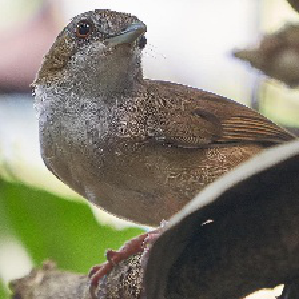

In [31]:
path = "./train/ABBOTTS BABBLER"
name = "001.jpg"
fullname = f"{path}/{name}"
img = load_img(fullname, target_size=(299, 299))
img

In [33]:
# image to numpy arry
x = np.array(img)
x

array([[[238, 238, 230],
        [237, 237, 229],
        [237, 237, 229],
        ...,
        [ 83,  71,  55],
        [ 83,  71,  55],
        [ 81,  68,  49]],

       [[238, 238, 230],
        [237, 237, 227],
        [237, 237, 227],
        ...,
        [ 83,  71,  57],
        [ 83,  71,  57],
        [ 87,  74,  58]],

       [[238, 238, 230],
        [237, 237, 227],
        [237, 237, 227],
        ...,
        [ 83,  71,  57],
        [ 83,  71,  57],
        [ 87,  74,  58]],

       ...,

       [[106, 145,  36],
        [122, 159,  54],
        [122, 159,  54],
        ...,
        [ 46,  46,  46],
        [ 46,  46,  46],
        [ 44,  44,  44]],

       [[106, 145,  36],
        [122, 159,  54],
        [122, 159,  54],
        ...,
        [ 46,  46,  46],
        [ 46,  46,  46],
        [ 44,  44,  44]],

       [[107, 146,  39],
        [112, 149,  44],
        [112, 149,  44],
        ...,
        [ 45,  47,  46],
        [ 45,  47,  46],
        [ 42,  42,  42]]

In [34]:
x.shape

(299, 299, 3)

## Pre-trained convolutional neural networks

In [6]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [27]:
# load the model
model = Xception(weights="imagenet", input_shape=(299, 299, 3))

2023-12-24 04:36:39.653208: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-24 04:36:39.659539: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-24 04:36:39.660113: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-24 04:36:39.660939: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

91884032/91884032 [==============================] - 2s 0us/step


In [35]:
# convert all the images to numpy
X = np.array([x])
# preprocess images
X = preprocess_input(X)
pred = model.predict(X)
pred

2023-12-24 04:45:34.395740: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-12-24 04:45:35.008641: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-24 04:45:35.009144: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-24 04:45:35.009179: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-12-24 04:45:35.009728: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-24 04:45:35.009816: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 3s 3s/step


array([[0.00065604, 0.00048743, 0.00087474, 0.00112952, 0.00055661,
        0.00147967, 0.00043559, 0.00040397, 0.000927  , 0.00030844,
        0.01621088, 0.00038645, 0.00233921, 0.02912294, 0.00245814,
        0.00323901, 0.05419828, 0.00383983, 0.00353232, 0.00495702,
        0.08205769, 0.00096545, 0.00041574, 0.00068785, 0.00152302,
        0.00031577, 0.00084227, 0.0006945 , 0.00059688, 0.0009919 ,
        0.00029052, 0.00034676, 0.00069831, 0.00062028, 0.00047826,
        0.00099741, 0.00081378, 0.00044396, 0.00059219, 0.00060716,
        0.00103576, 0.00128997, 0.00061434, 0.00096598, 0.00109962,
        0.00040167, 0.00062135, 0.00043291, 0.00081909, 0.00056201,
        0.00027762, 0.00022934, 0.0008693 , 0.00085377, 0.00042204,
        0.00080957, 0.00091845, 0.00028401, 0.00036352, 0.00118425,
        0.00094337, 0.00056768, 0.0006115 , 0.00067406, 0.00047783,
        0.00030166, 0.00132041, 0.00056345, 0.00075334, 0.00047965,
        0.00043307, 0.0005535 , 0.0006601 , 0.00

In [36]:
pred.shape

(1, 1000)

In [38]:
decode_predictions(pred)

35363/35363 [==============================] - 0s 1us/step


[[('n01601694', 'water_ouzel', 0.08205769),
  ('n01560419', 'bulbul', 0.054198276),
  ('n01795545', 'black_grouse', 0.030121986),
  ('n01534433', 'junco', 0.029122937),
  ('n01833805', 'hummingbird', 0.023732657)]]

## Transfer learning

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Checking the train and val data

In [9]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [10]:
train_ds = train_gen.flow_from_directory(
    "./train",
    target_size=(150, 150),
    batch_size=32
)

Found 84635 images belonging to 525 classes.


In [50]:
# show the class
train_ds.class_indices

{'ABBOTTS BABBLER': 0,
 'ABBOTTS BOOBY': 1,
 'ABYSSINIAN GROUND HORNBILL': 2,
 'AFRICAN CROWNED CRANE': 3,
 'AFRICAN EMERALD CUCKOO': 4,
 'AFRICAN FIREFINCH': 5,
 'AFRICAN OYSTER CATCHER': 6,
 'AFRICAN PIED HORNBILL': 7,
 'AFRICAN PYGMY GOOSE': 8,
 'ALBATROSS': 9,
 'ALBERTS TOWHEE': 10,
 'ALEXANDRINE PARAKEET': 11,
 'ALPINE CHOUGH': 12,
 'ALTAMIRA YELLOWTHROAT': 13,
 'AMERICAN AVOCET': 14,
 'AMERICAN BITTERN': 15,
 'AMERICAN COOT': 16,
 'AMERICAN DIPPER': 17,
 'AMERICAN FLAMINGO': 18,
 'AMERICAN GOLDFINCH': 19,
 'AMERICAN KESTREL': 20,
 'AMERICAN PIPIT': 21,
 'AMERICAN REDSTART': 22,
 'AMERICAN ROBIN': 23,
 'AMERICAN WIGEON': 24,
 'AMETHYST WOODSTAR': 25,
 'ANDEAN GOOSE': 26,
 'ANDEAN LAPWING': 27,
 'ANDEAN SISKIN': 28,
 'ANHINGA': 29,
 'ANIANIAU': 30,
 'ANNAS HUMMINGBIRD': 31,
 'ANTBIRD': 32,
 'ANTILLEAN EUPHONIA': 33,
 'APAPANE': 34,
 'APOSTLEBIRD': 35,
 'ARARIPE MANAKIN': 36,
 'ASHY STORM PETREL': 37,
 'ASHY THRUSHBIRD': 38,
 'ASIAN CRESTED IBIS': 39,
 'ASIAN DOLLARD BIRD': 40,
 'AS

In [51]:
# X, y
X, y = next(train_ds)

In [52]:
X

array([[[[-0.27058822, -0.10588235, -0.09803921],
         [-0.35686272, -0.1372549 , -0.31764704],
         [-0.38823527, -0.16862744, -0.36470586],
         ...,
         [-0.8745098 , -0.8117647 , -0.7882353 ],
         [-0.8509804 , -0.81960785, -0.92941177],
         [-0.03529412, -0.01960784, -0.41176468]],

        [[-0.12156862,  0.07450986, -0.23137254],
         [-0.42745095, -0.23137254, -0.4588235 ],
         [-0.40392154, -0.20784312, -0.38039213],
         ...,
         [-0.67058825, -0.6313726 , -0.8039216 ],
         [-0.30196077, -0.24705881, -0.5058824 ],
         [-0.14509803, -0.06666666, -0.47450978]],

        [[ 0.0196079 ,  0.22352946, -0.2862745 ],
         [-0.38039213, -0.21568626, -0.4588235 ],
         [-0.3490196 , -0.18431371, -0.3333333 ],
         ...,
         [-0.38823527, -0.3333333 , -0.5921569 ],
         [-0.10588235, -0.02745098, -0.31764704],
         [-0.27058822, -0.1372549 , -0.46666664]],

        ...,

        [[-0.56078434, -0.5921569 , -0

In [53]:
X.shape

(32, 150, 150, 3)

In [54]:
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
# check val data
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds = val_gen.flow_from_directory(
    "./valid",
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 2625 images belonging to 525 classes.


### Load the model

In [56]:
# base model
base_model = Xception(
    weights="imagenet",
    include_top=False,
    input_shape=(150, 150, 3)
)

# freeze
base_model.trainable = False

83683744/83683744 [==============================] - 1s 0us/step


In [60]:
# train the top
inputs = keras.Input(shape=(150, 150, 3))
# 3D
base = base_model(inputs, training=False)
# => 2D
pooling = keras.layers.GlobalAveragePooling2D()
# => vector
vectors = pooling(base)
# add class layer
outputs = keras.layers.Dense(525)(vectors)

model = keras.Model(inputs, outputs)

In [61]:
preds = model.predict(X)

1/1 [==============================] - 1s 597ms/step


In [62]:
preds.shape

(32, 525)

In [63]:
# the output does not make sense without training
preds[0]

array([ 8.05382133e-01,  1.71317565e+00, -2.17890549e+00,  9.80288684e-01,
        1.71227145e+00,  1.54571220e-01,  3.84064674e-01, -1.84722930e-01,
       -6.77210569e-01,  3.47278327e-01, -8.45030725e-01, -3.01734090e-01,
       -1.09151006e-04, -5.62368989e-01, -2.24893868e-01, -2.03949809e-02,
        5.50043643e-01,  5.31071961e-01,  1.16474688e-01,  1.80924058e-01,
        1.04777217e-01, -2.34364390e-01,  3.46410751e-01, -6.80150151e-01,
        4.32940662e-01, -1.06456935e+00,  1.52366376e+00, -7.33755171e-01,
       -6.63245499e-01, -6.67187631e-01, -7.65889347e-01,  6.23829424e-01,
        1.13005781e+00, -1.14514673e+00, -5.76435804e-01,  7.12849140e-01,
        4.53510582e-01, -8.70352864e-01,  6.95799589e-02, -2.18630195e-01,
       -8.08107734e-01, -7.58311749e-02, -6.86174273e-01, -1.21095419e+00,
       -3.21502447e-01, -1.75860512e+00,  1.02945364e+00, -1.63815904e+00,
        5.14448583e-01, -6.17111802e-01,  1.71209574e-01, -7.92338133e-01,
       -5.06744683e-01, -

### train the model

In [65]:
learning_rate = 0.01

optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
2645/2645 [==============================] - 153s 57ms/step - loss: 8.5184 - accuracy: 0.5011 - val_loss: 6.2942 - val_accuracy: 0.6549
Epoch 2/15
2645/2645 [==============================] - 149s 56ms/step - loss: 6.1343 - accuracy: 0.6794 - val_loss: 6.1865 - val_accuracy: 0.7135
Epoch 3/15
2645/2645 [==============================] - 150s 57ms/step - loss: 5.0463 - accuracy: 0.7399 - val_loss: 6.4252 - val_accuracy: 0.7269
Epoch 4/15
2645/2645 [==============================] - 150s 57ms/step - loss: 4.3290 - accuracy: 0.7795 - val_loss: 6.0801 - val_accuracy: 0.7528
Epoch 5/15
2645/2645 [==============================] - 150s 57ms/step - loss: 3.6798 - accuracy: 0.8112 - val_loss: 6.5749 - val_accuracy: 0.7604
Epoch 6/15
2645/2645 [==============================] - 149s 56ms/step - loss: 3.2338 - accuracy: 0.8311 - val_loss: 6.8229 - val_accuracy: 0.7615
Epoch 7/15
2645/2645 [==============================] - 149s 56ms/step - loss: 2.9036 - accuracy: 0.8497 - val_loss: 6

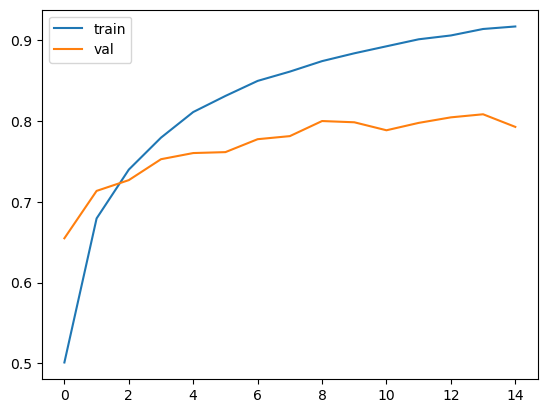

In [66]:
# compare accuracy between train, val
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.legend()

The graph shows overfitting. 

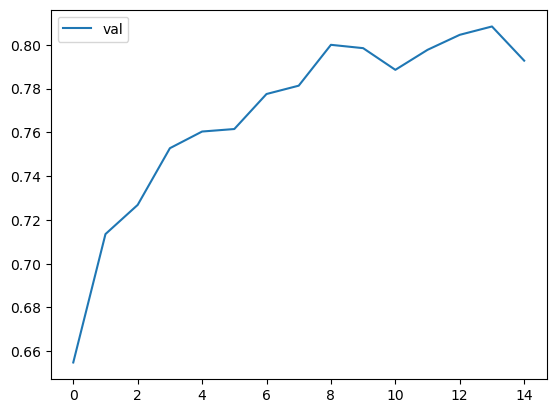

In [67]:
plt.plot(history.history["val_accuracy"], label="val")
plt.legend()

### Adjusting the learning rate

In [68]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(525)(vectors)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [71]:
scores = {}

for lr in [0.001, 0.01, 0.1]:
    print(f"learning rate: {lr}")

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

learning rate: 0.001
Epoch 1/10
2645/2645 [==============================] - 151s 56ms/step - loss: 1.6493 - accuracy: 0.6125 - val_loss: 0.8771 - val_accuracy: 0.7695
Epoch 2/10
2645/2645 [==============================] - 149s 56ms/step - loss: 0.8405 - accuracy: 0.7768 - val_loss: 0.7935 - val_accuracy: 0.7893
Epoch 3/10
2645/2645 [==============================] - 149s 56ms/step - loss: 0.6091 - accuracy: 0.8291 - val_loss: 0.7724 - val_accuracy: 0.8046
Epoch 4/10
2645/2645 [==============================] - 148s 56ms/step - loss: 0.4645 - accuracy: 0.8665 - val_loss: 0.8154 - val_accuracy: 0.8011
Epoch 5/10
2645/2645 [==============================] - 149s 56ms/step - loss: 0.3663 - accuracy: 0.8916 - val_loss: 0.7575 - val_accuracy: 0.8149
Epoch 6/10
2645/2645 [==============================] - 150s 57ms/step - loss: 0.3023 - accuracy: 0.9077 - val_loss: 0.7375 - val_accuracy: 0.8175
Epoch 7/10
2645/2645 [==============================] - 150s 57ms/step - loss: 0.2482 - accuracy:

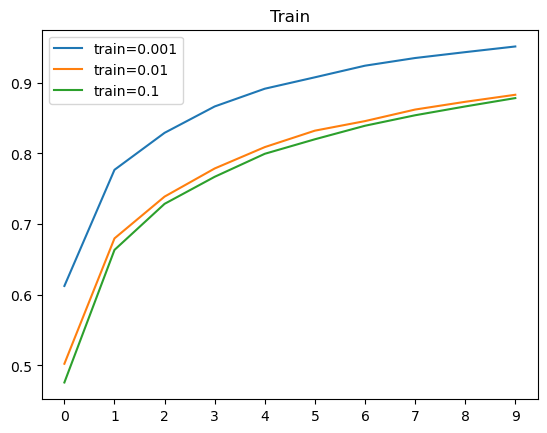

In [74]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))
plt.xticks(np.arange(10))
plt.title("Train")
plt.legend()

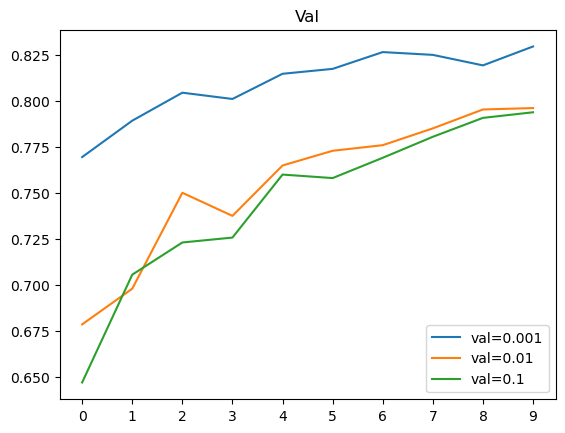

In [75]:
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))
plt.xticks(np.arange(10))
plt.title("Val")
plt.legend()

In [76]:
# best learning_rate = 0.001
learning_rate = 0.001

## Checkpointing
- Save the best model only
- train with callbacks

In [79]:
model.save_weights('model_v1.h5', save_format='h5')

checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [81]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=15,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/15
2645/2645 [==============================] - 152s 56ms/step - loss: 1.6437 - accuracy: 0.6120 - val_loss: 0.8644 - val_accuracy: 0.7653
Epoch 2/15
2645/2645 [==============================] - 150s 57ms/step - loss: 0.8403 - accuracy: 0.7786 - val_loss: 0.8443 - val_accuracy: 0.7798
Epoch 3/15
2645/2645 [==============================] - 149s 56ms/step - loss: 0.6078 - accuracy: 0.8314 - val_loss: 0.7765 - val_accuracy: 0.8053
Epoch 4/15
2645/2645 [==============================] - 149s 56ms/step - loss: 0.4662 - accuracy: 0.8653 - val_loss: 0.7713 - val_accuracy: 0.8198
Epoch 5/15
2645/2645 [==============================] - 149s 56ms/step - loss: 0.3705 - accuracy: 0.8897 - val_loss: 0.8064 - val_accuracy: 0.8126
Epoch 6/15
2645/2645 [==============================] - 150s 57ms/step - loss: 0.2956 - accuracy: 0.9101 - val_loss: 0.7794 - val_accuracy: 0.8149
Epoch 7/15
2645/2645 [==============================] - 151s 57ms/step - loss: 0.2476 - accuracy: 0.9235 - val_loss: 0

**The best one is from epoch#13, val_accuracy = 0.8415**

## Adding more layers

In [1]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights="imagenet",
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    ################################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)

    outputs = keras.layers.Dense(525)(inner)

    model = keras.Model(inputs, outputs)

    #################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=["accuracy"]
    )

    return model

In [13]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(f"size: {size}")

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

size: 10
Epoch 1/10
2645/2645 [==============================] - 153s 57ms/step - loss: 3.5703 - accuracy: 0.2189 - val_loss: 2.4633 - val_accuracy: 0.3665
Epoch 2/10
2645/2645 [==============================] - 151s 57ms/step - loss: 2.5994 - accuracy: 0.3608 - val_loss: 2.1696 - val_accuracy: 0.4488
Epoch 3/10
2645/2645 [==============================] - 153s 58ms/step - loss: 2.4190 - accuracy: 0.3967 - val_loss: 2.0624 - val_accuracy: 0.4655
Epoch 4/10
2645/2645 [==============================] - 154s 58ms/step - loss: 2.3170 - accuracy: 0.4218 - val_loss: 1.9962 - val_accuracy: 0.4804
Epoch 5/10
2645/2645 [==============================] - 154s 58ms/step - loss: 2.2448 - accuracy: 0.4355 - val_loss: 1.9520 - val_accuracy: 0.4865
Epoch 6/10
2645/2645 [==============================] - 154s 58ms/step - loss: 2.1940 - accuracy: 0.4491 - val_loss: 1.9026 - val_accuracy: 0.4987
Epoch 7/10
2645/2645 [==============================] - 154s 58ms/step - loss: 2.1514 - accuracy: 0.4600 - va

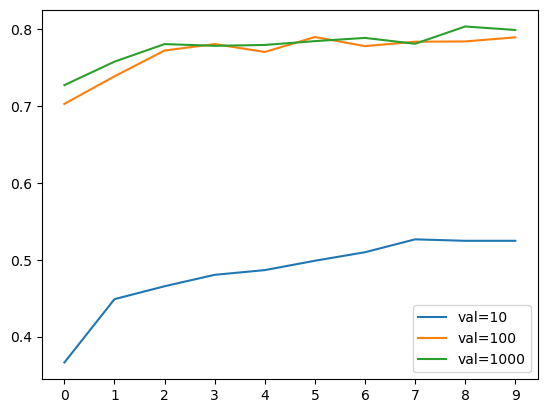

In [14]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))

plt.legend()

**innser_size=1000 is the best**

### Regularization and dropout
- Regularizing by freezing a part of the network
- Adding dropout to our model
- Experimenting with different values

In [15]:
def make_model(learning_rate=0.001, size_inner=1000, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(525)(drop)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [17]:
learning_rate = 0.001
size = 1000

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(f"droprate: {droprate}")

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

droprate: 0.0
Epoch 1/30
2645/2645 [==============================] - 154s 57ms/step - loss: 1.8692 - accuracy: 0.5517 - val_loss: 1.0008 - val_accuracy: 0.7215
Epoch 2/30
2645/2645 [==============================] - 153s 58ms/step - loss: 1.0558 - accuracy: 0.7162 - val_loss: 0.8587 - val_accuracy: 0.7611
Epoch 3/30
2645/2645 [==============================] - 152s 57ms/step - loss: 0.8226 - accuracy: 0.7717 - val_loss: 0.8838 - val_accuracy: 0.7623
Epoch 4/30
2645/2645 [==============================] - 155s 59ms/step - loss: 0.6666 - accuracy: 0.8093 - val_loss: 0.8375 - val_accuracy: 0.7817
Epoch 5/30
2645/2645 [==============================] - 154s 58ms/step - loss: 0.5459 - accuracy: 0.8395 - val_loss: 0.8833 - val_accuracy: 0.7806
Epoch 6/30
2645/2645 [==============================] - 154s 58ms/step - loss: 0.4641 - accuracy: 0.8622 - val_loss: 1.0273 - val_accuracy: 0.7691
Epoch 7/30
2645/2645 [==============================] - 154s 58ms/step - loss: 0.4022 - accuracy: 0.8780

2645/2645 [==============================] - 153s 58ms/step - loss: 0.3801 - accuracy: 0.9015 - val_loss: 1.6516 - val_accuracy: 0.7966
Epoch 27/30
2645/2645 [==============================] - 153s 58ms/step - loss: 0.3766 - accuracy: 0.9037 - val_loss: 1.4535 - val_accuracy: 0.8076
Epoch 28/30
2645/2645 [==============================] - 153s 58ms/step - loss: 0.3630 - accuracy: 0.9068 - val_loss: 1.5117 - val_accuracy: 0.8160
Epoch 29/30
2645/2645 [==============================] - 153s 58ms/step - loss: 0.3640 - accuracy: 0.9082 - val_loss: 1.6574 - val_accuracy: 0.8099
Epoch 30/30
2645/2645 [==============================] - 153s 58ms/step - loss: 0.3631 - accuracy: 0.9100 - val_loss: 1.6458 - val_accuracy: 0.8069


droprate: 0.5
Epoch 1/30
2645/2645 [==============================] - 157s 58ms/step - loss: 2.8552 - accuracy: 0.3603 - val_loss: 1.2283 - val_accuracy: 0.6842
Epoch 2/30
2645/2645 [==============================] - 152s 57ms/step - loss: 1.9643 - accuracy: 0.5151 - va

2645/2645 [==============================] - 152s 58ms/step - loss: 4.3913 - accuracy: 0.1630 - val_loss: 2.4183 - val_accuracy: 0.4598
Epoch 22/30
2645/2645 [==============================] - 152s 57ms/step - loss: 4.4007 - accuracy: 0.1622 - val_loss: 2.4137 - val_accuracy: 0.4625
Epoch 23/30
2645/2645 [==============================] - 152s 57ms/step - loss: 4.4294 - accuracy: 0.1606 - val_loss: 2.4242 - val_accuracy: 0.4568
Epoch 24/30
2645/2645 [==============================] - 152s 57ms/step - loss: 4.4732 - accuracy: 0.1606 - val_loss: 2.5005 - val_accuracy: 0.4469
Epoch 25/30
2645/2645 [==============================] - 152s 57ms/step - loss: 4.4790 - accuracy: 0.1589 - val_loss: 2.5403 - val_accuracy: 0.4328
Epoch 26/30
2645/2645 [==============================] - 152s 57ms/step - loss: 4.4834 - accuracy: 0.1571 - val_loss: 2.5545 - val_accuracy: 0.4518
Epoch 27/30
2645/2645 [==============================] - 152s 57ms/step - loss: 4.5194 - accuracy: 0.1557 - val_loss: 2.4779

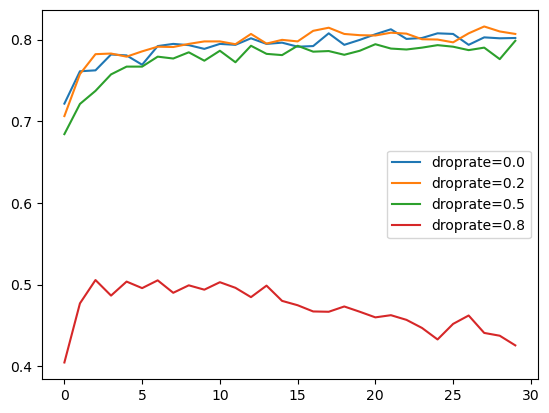

In [18]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=(f"droprate={droprate}"))

plt.legend()

**The best droprate is 0.2.**

## Data augmentation

In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,
    width_shift_range=10,
    height_shift_range=10,
    shear_range=10,
    zoom_range=0.1
    vertical_flip=True
)

train_ds = train_gen.flow_from_directory(
    "./train",
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds = val_gen.flow_from_directory(
    "./valid",
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

In [19]:
learning_rate = 0.001
size = 1000
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
2645/2645 [==============================] - 155s 58ms/step - loss: 2.1364 - accuracy: 0.4936 - val_loss: 1.0472 - val_accuracy: 0.7200
Epoch 2/50
2645/2645 [==============================] - 152s 57ms/step - loss: 1.3122 - accuracy: 0.6575 - val_loss: 0.8990 - val_accuracy: 0.7493
Epoch 3/50
2645/2645 [==============================] - 151s 57ms/step - loss: 1.1005 - accuracy: 0.7040 - val_loss: 0.8455 - val_accuracy: 0.7684
Epoch 4/50
2645/2645 [==============================] - 152s 57ms/step - loss: 0.9698 - accuracy: 0.7365 - val_loss: 0.8432 - val_accuracy: 0.7730
Epoch 5/50
2645/2645 [==============================] - 151s 57ms/step - loss: 0.8671 - accuracy: 0.7578 - val_loss: 0.8696 - val_accuracy: 0.7756
Epoch 6/50
2645/2645 [==============================] - 152s 57ms/step - loss: 0.7802 - accuracy: 0.7807 - val_loss: 0.8539 - val_accuracy: 0.7874
Epoch 7/50
2645/2645 [==============================] - 151s 57ms/step - loss: 0.7223 - accuracy: 0.7960 - val_loss: 0

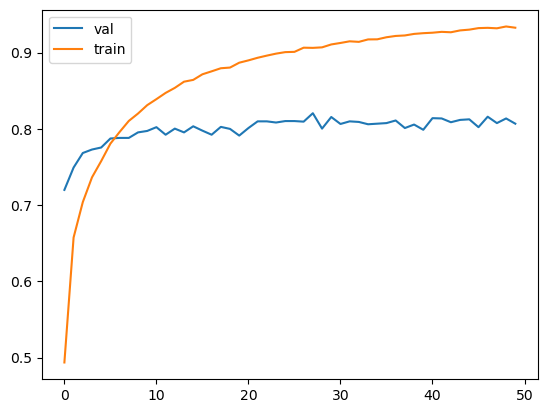

In [20]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

**For the above result, Data augmentation does not help improve the accuracy. We don't need to use it.**

## Train a larger model
- size = 299x299

In [21]:
def make_model(input_size=150, learning_rate=0.001, size_inner=1000, droprate=0.2):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(525)(drop)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [28]:
input_size = 299

train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

train_ds = train_gen.flow_from_directory(
    "./train",
    target_size=(input_size, input_size),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds = val_gen.flow_from_directory(
    "./valid",
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)


Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


In [29]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [30]:
learning_rate = 0.001
size = 1000
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds, callbacks=[checkpoint])

Epoch 1/50
2645/2645 [==============================] - 589s 222ms/step - loss: 1.4647 - accuracy: 0.6415 - val_loss: 0.5406 - val_accuracy: 0.8480
Epoch 2/50
2645/2645 [==============================] - 588s 222ms/step - loss: 0.6603 - accuracy: 0.8168 - val_loss: 0.4048 - val_accuracy: 0.8773
Epoch 3/50
2645/2645 [==============================] - 586s 222ms/step - loss: 0.5078 - accuracy: 0.8540 - val_loss: 0.3810 - val_accuracy: 0.8842
Epoch 4/50
2645/2645 [==============================] - 587s 222ms/step - loss: 0.4206 - accuracy: 0.8780 - val_loss: 0.3172 - val_accuracy: 0.9055
Epoch 5/50
2645/2645 [==============================] - 587s 222ms/step - loss: 0.3584 - accuracy: 0.8937 - val_loss: 0.3325 - val_accuracy: 0.9013
Epoch 6/50
2645/2645 [==============================] - 586s 222ms/step - loss: 0.3094 - accuracy: 0.9060 - val_loss: 0.3437 - val_accuracy: 0.8956
Epoch 7/50
2645/2645 [==============================] - 586s 222ms/step - loss: 0.2755 - accuracy: 0.9159 - val_

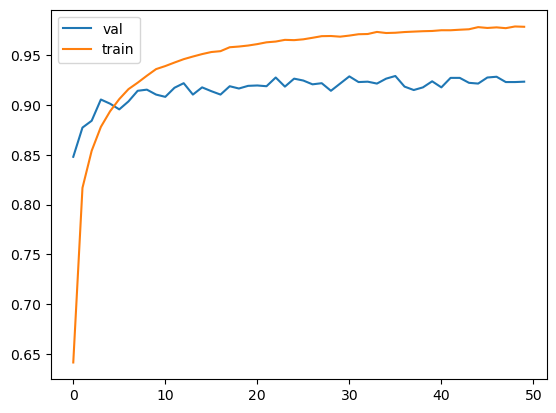

In [31]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## Using the model
- Loading the model (accuracy: 0.9291) - xception_v4_36_0.929.h5
- Evaluating the model
- Getting predictions

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input

2023-12-25 15:28:19.596604: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    "./test",
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 2625 images belonging to 525 classes.


In [3]:
model = keras.models.load_model("xception_v4_36_0.929.h5")

2023-12-25 15:31:21.084696: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-25 15:31:21.101658: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-25 15:31:21.102237: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-25 15:31:21.103104: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [4]:
# evaludate the model - accuracy: 0.9345
model.evaluate(test_ds)

2023-12-25 15:36:25.995994: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-12-25 15:36:26.727126: W tensorflow/core/kernels/gpu_utils.cc:70] Failed to check cudnn convolutions for out-of-bounds reads and writes with an error message: 'Failed to load in-memory CUBIN: CUDA_ERROR_INVALID_IMAGE: device kernel image is invalid'; skipping this check. This only means that we won't check cudnn for out-of-bounds reads and writes. This message will only be printed once.


83/83 [==============================] - 21s 209ms/step - loss: 0.4322 - accuracy: 0.9345


[0.4322431981563568, 0.9344761967658997]

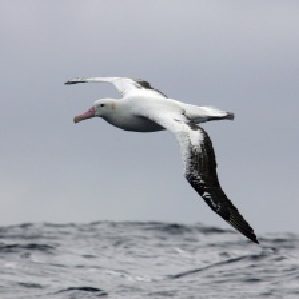

In [6]:
# choose an image for the test
path = "./test/ALBATROSS/1.jpg"
img = load_img(path, target_size=(299, 299))
img

In [7]:
# convert img to numpy array
import numpy as np

x = np.array(img)
X = np.array([x])
X

array([[[[188, 188, 200],
         [188, 188, 200],
         [188, 188, 200],
         ...,
         [182, 186, 198],
         [182, 186, 198],
         [182, 186, 198]],

        [[189, 189, 201],
         [189, 189, 201],
         [189, 189, 201],
         ...,
         [183, 187, 198],
         [183, 187, 198],
         [183, 187, 198]],

        [[189, 189, 201],
         [189, 189, 201],
         [189, 189, 201],
         ...,
         [183, 187, 198],
         [183, 187, 198],
         [183, 187, 198]],

        ...,

        [[175, 174, 179],
         [173, 172, 177],
         [173, 172, 177],
         ...,
         [179, 178, 184],
         [179, 178, 184],
         [176, 175, 181]],

        [[175, 174, 179],
         [173, 172, 177],
         [173, 172, 177],
         ...,
         [179, 178, 184],
         [179, 178, 184],
         [176, 175, 181]],

        [[177, 177, 179],
         [172, 172, 174],
         [172, 172, 174],
         ...,
         [182, 181, 187],
        

In [8]:
X.shape

(1, 299, 299, 3)

In [9]:
X = preprocess_input(X)

In [10]:
pred = model.predict(X)

1/1 [==============================] - 1s 654ms/step


In [14]:
classes = list(test_ds.class_indices.keys())

In [15]:
dict(zip(classes, pred[0]))

{'ABBOTTS BABBLER': -71.17431,
 'ABBOTTS BOOBY': -20.681318,
 'ABYSSINIAN GROUND HORNBILL': -75.94589,
 'AFRICAN CROWNED CRANE': -87.477715,
 'AFRICAN EMERALD CUCKOO': -63.91593,
 'AFRICAN FIREFINCH': -63.44439,
 'AFRICAN OYSTER CATCHER': -44.034267,
 'AFRICAN PIED HORNBILL': -63.349945,
 'AFRICAN PYGMY GOOSE': -96.68853,
 'ALBATROSS': 18.913519,
 'ALBERTS TOWHEE': -76.47897,
 'ALEXANDRINE PARAKEET': -57.37517,
 'ALPINE CHOUGH': -63.048336,
 'ALTAMIRA YELLOWTHROAT': -68.14468,
 'AMERICAN AVOCET': -82.684654,
 'AMERICAN BITTERN': -73.63077,
 'AMERICAN COOT': -79.32714,
 'AMERICAN DIPPER': -52.296528,
 'AMERICAN FLAMINGO': -80.40673,
 'AMERICAN GOLDFINCH': -71.27513,
 'AMERICAN KESTREL': -113.19559,
 'AMERICAN PIPIT': -90.58753,
 'AMERICAN REDSTART': -87.31693,
 'AMERICAN ROBIN': -66.958855,
 'AMERICAN WIGEON': -95.578354,
 'AMETHYST WOODSTAR': -80.13613,
 'ANDEAN GOOSE': -83.27399,
 'ANDEAN LAPWING': -88.789055,
 'ANDEAN SISKIN': -77.48771,
 'ANHINGA': -67.348366,
 'ANIANIAU': -62.45492

In [16]:
class_pred_dict = dict(zip(classes, pred[0]))
max_class = max(class_pred_dict, key=class_pred_dict.get)
max_class

'ALBATROSS'

**The prediction meets our expetation. **